In [7]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from mpl_toolkits.mplot3d import Axes3D
import random
import math
import os

In [3]:
def generate_3d_sample_fast(mean_array, num_samples_per_cluster, cov, output_side_length):
    y = np.zeros((num_samples_per_cluster * len(mean_array), 3))
    for i in range(len(mean_array)):
        generated_data = np.floor(np.random.multivariate_normal(mean_array[i], cov, num_samples_per_cluster))
        y[(num_samples_per_cluster * i):(num_samples_per_cluster * (i + 1)), :] = generated_data
    filtered_y = y[np.all(np.logical_and(y>=0, y<output_side_length), axis=1)]
    filtered_y = filtered_y.astype(int)
    z = np.zeros((output_side_length,output_side_length, output_side_length))
    z[filtered_y[:,0], filtered_y[:,1], filtered_y[:,2]] = 1
    return z

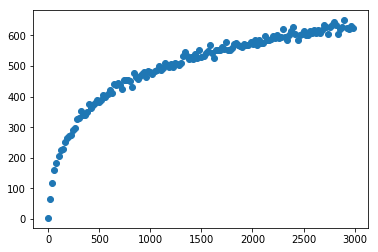

In [3]:
mean_array = [(10, 5, 5), (3, 16, 4), (2, 2, 7), (4,4,9)]
num_samples_per_cluster = 50
cov = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
output_side_length = 20
num_samples_per_cluster_list = []
num_dots_list = []
for num_samples_per_cluster in range(1, 3000, 20):
    z = generate_3d_sample_fast(mean_array, num_samples_per_cluster, cov, output_side_length)
    num_samples_per_cluster_list.append(num_samples_per_cluster)
    num_dots_list.append(np.sum(z))

plt.scatter(num_samples_per_cluster_list, num_dots_list)

In [9]:
mean_array = [(10, 5, 5), (3, 16, 4), (90, 3, 7), (90,90,90)]
num_samples_per_cluster =10000
cov = [[1, 0, 0], [0, 1, 0], [0, 0,1]]
output_side_length = 100

z = generate_3d_sample_fast(mean_array, num_samples_per_cluster, cov, output_side_length)
xx = z.flatten()
P=[]
N=100
for i in range(0,len(xx)):
    if xx[i]==1:
        x=i%N
        y=int(i/N)%N
        z=int(i/(N*N))
        P.append([x,y,z])
P=np.array(P)

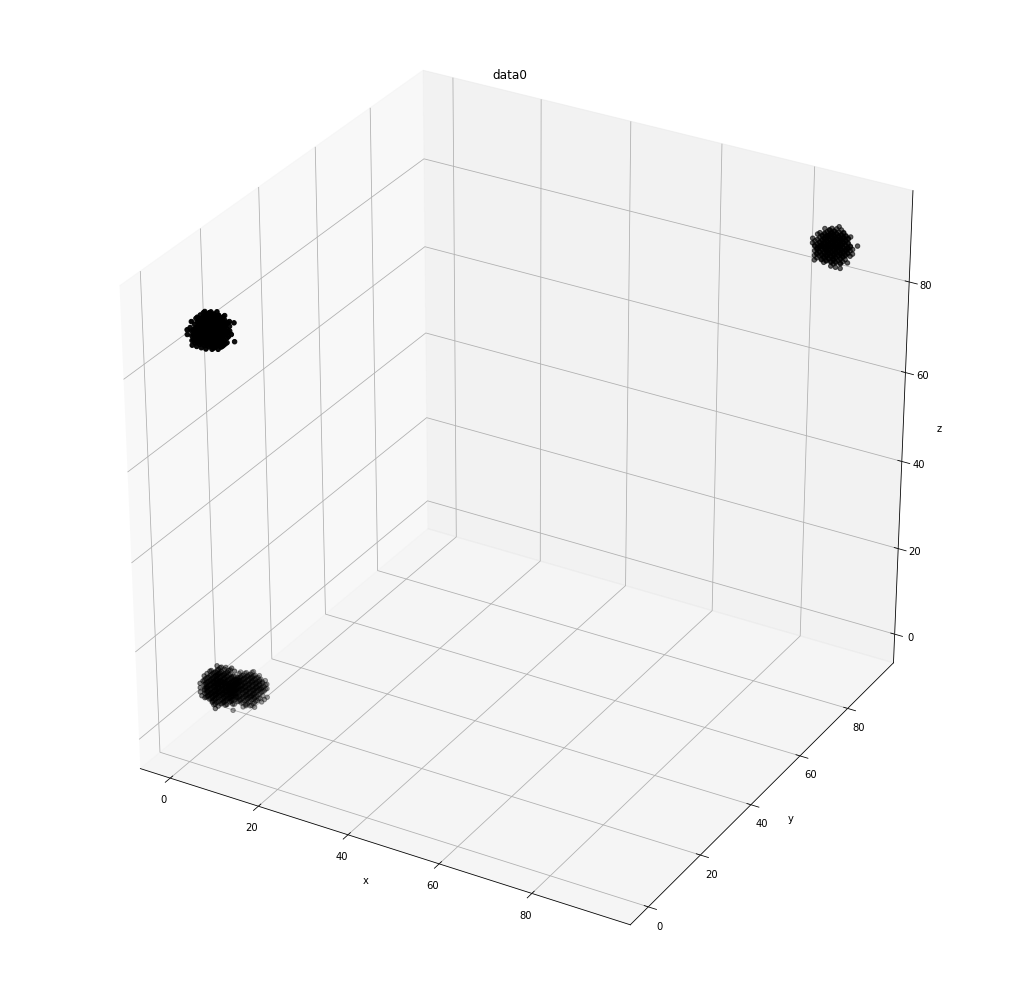

In [10]:
fig = plt.figure(figsize=(18,18))
ax = fig.gca(projection='3d')
ax.scatter3D(P[:,0],P[:,1],P[:,2],c='k')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('data0')
plt.show()

In [9]:
#total_num=6000
#62500
name_num=0
for _ in range(0,10000):
    num_mean=random.randint(1,80)
    #random.randint(1,100)
    output_side_length = 50
    num_samples_per_cluster = 10000
    x=random.randint(1 , 40)
    #y=random.randint(1 , 40)
    #z=random.randint(1 , 40)
    cov = [[ x, 0, 0], [0, x, 0], [0, 0, x]]
    #print(x,y,z)
    sample=random.sample(range(0,output_side_length**3),num_mean)
    #print(sample)
    mean_array=[]
    for i in range(num_mean):
        tuple_z=int(sample[i]/math.pow(output_side_length,2))
        tuple_y=int((sample[i]%math.pow(output_side_length,2))/output_side_length)
        tuple_x=int(sample[i]%output_side_length)
        tuple_sample=(tuple_x,tuple_y,tuple_z)
        mean_array.append(tuple_sample)
    z = generate_3d_sample_fast(mean_array, num_samples_per_cluster, cov, output_side_length)
    xx = z.flatten()
    
    '''
    data=xx
    #print(xx)
    
    P=[]
    N=50
    for i in range(0,len(data)):
        if data[i]==0:
            x=i%N
            y=int(i/N)%N
            z=int(i/(N*N))
            P.append([x,y,z])
    P=np.array(P)
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    ax.scatter3D(P[:,0],P[:,1],P[:,2],c='k')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()'''


    filename='data'+str(name_num)+'.csv'
    with open("F:\chenlong_work\data_5_22/" + filename, "w", newline='') as csvfile:
        writer = csv.writer(csvfile)
        for j in range(len(xx)):
            if xx[j] == 1:
                value=1
            else:
                value=0
            writer.writerow([value])
    name_num=name_num+1
    print(name_num)                                                

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060


3500
3501
3502
3503
3504
3505
3506
3507
3508
3509
3510
3511
3512
3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699


5139
5140
5141
5142
5143
5144
5145
5146
5147
5148
5149
5150
5151
5152
5153
5154
5155
5156
5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338


6779
6780
6781
6782
6783
6784
6785
6786
6787
6788
6789
6790
6791
6792
6793
6794
6795
6796
6797
6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978


8418
8419
8420
8421
8422
8423
8424
8425
8426
8427
8428
8429
8430
8431
8432
8433
8434
8435
8436
8437
8438
8439
8440
8441
8442
8443
8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617


In [10]:
data=[]
for num in range(0,10000):
    print(num)
    f1=open('F:\chenlong_work\data_5_22\ec3d.pam', 'r')
    str1=f1.readline()
    with open("F:\chenlong_work\data_5_22\ec3d.pam", "r", encoding="utf-8") as f_R:
        lines = f_R.readlines()
    with open("F:\chenlong_work\data_5_22\ec3d.pam", "w", encoding="utf-8") as f_w:
        for line in lines:
            if str1 in line:
                line = line.replace(str1,"data"+str(num)+".csv"+"\n")
            f_w.write(line)
    os.system('F:&&cd chenlong_work&&cd data_5_22&& ELEC3D')
    with open("F:\chenlong_work\data_5_22/outputfile.out", "r", encoding="utf-8") as f_O:
        lines = f_O.readlines()
        for line in lines:
            if 'Current in x direction =' in line:
                value1=float(line.split('=')[1].strip())
                print(value1,type(value1))
    data.append([value1])
    
with open("F:\chenlong_work\data_5_22/label.csv","w",newline='') as f3:
    writer = csv.writer(f3)
    for row in data:
        writer.writerow(row)

0
0.139709949 <class 'float'>
0.139706597 <class 'float'>
1
0.106850013 <class 'float'>
0.106817834 <class 'float'>
2
0.0980426744 <class 'float'>
0.0979615152 <class 'float'>
3
0.12762931 <class 'float'>
0.127618775 <class 'float'>
4
0.00166128471 <class 'float'>
0.0011600568 <class 'float'>
0.000694001501 <class 'float'>
0.000683861261 <class 'float'>
5
0.118754469 <class 'float'>
0.118746132 <class 'float'>
6
0.012701367 <class 'float'>
0.011109883 <class 'float'>
0.011054595 <class 'float'>
7
0.00222280063 <class 'float'>
0.000981102232 <class 'float'>
0.000750188017 <class 'float'>
0.000681698555 <class 'float'>
8
0.0295843445 <class 'float'>
0.0286554452 <class 'float'>
9
0.044952061 <class 'float'>
0.0445982441 <class 'float'>
10
0.000304905319 <class 'float'>
1.1002332e-05 <class 'float'>
4.37549988e-06 <class 'float'>
11
0.152396649 <class 'float'>
12
0.0984245911 <class 'float'>
0.0984094515 <class 'float'>
13
0.0762413368 <class 'float'>
0.0760887712 <class 'float'>
14
1.296

0.173900902 <class 'float'>
110
0.138862804 <class 'float'>
0.138856634 <class 'float'>
111
0.155529916 <class 'float'>
112
0.162624359 <class 'float'>
113
0.000173960871 <class 'float'>
2.20432739e-05 <class 'float'>
1.14794739e-05 <class 'float'>
114
0.172462046 <class 'float'>
115
0.0187486652 <class 'float'>
0.0183568522 <class 'float'>
116
0.0440276153 <class 'float'>
0.0438847952 <class 'float'>
117
0.0480913408 <class 'float'>
0.047722619 <class 'float'>
118
0.000233996761 <class 'float'>
0.000160101888 <class 'float'>
7.52318156e-05 <class 'float'>
2.59208809e-05 <class 'float'>
119
1.59941083e-05 <class 'float'>
1.3362981e-05 <class 'float'>
120
0.018583497 <class 'float'>
0.018108651 <class 'float'>
0.0181113333 <class 'float'>
121
0.00387613499 <class 'float'>
0.00152327877 <class 'float'>
0.000509533333 <class 'float'>
0.000363525876 <class 'float'>
122
0.120329522 <class 'float'>
0.12031845 <class 'float'>
123
0.00103896426 <class 'float'>
0.000863911468 <class 'float'>
0.

0.0278009418 <class 'float'>
0.0272004511 <class 'float'>
217
0.0052258363 <class 'float'>
0.00151962659 <class 'float'>
0.00105268427 <class 'float'>
0.00101018453 <class 'float'>
218
0.0551074743 <class 'float'>
0.0548533909 <class 'float'>
219
0.138348535 <class 'float'>
0.138346136 <class 'float'>
220
0.179099724 <class 'float'>
221
0.182549492 <class 'float'>
222
0.0602814183 <class 'float'>
0.0601944178 <class 'float'>
223
0.153575689 <class 'float'>
0.153573111 <class 'float'>
224
0.0985526741 <class 'float'>
0.09851861 <class 'float'>
225
0.0248663742 <class 'float'>
0.023436876 <class 'float'>
0.0234160777 <class 'float'>
226
0.018420767 <class 'float'>
0.0164857302 <class 'float'>
0.0164652634 <class 'float'>
227
0.11932493 <class 'float'>
0.119315751 <class 'float'>
228
0.0103774741 <class 'float'>
0.00879078265 <class 'float'>
0.00862640049 <class 'float'>
0.00862333737 <class 'float'>
229
0.167854503 <class 'float'>
230
0.039375037 <class 'float'>
0.0392267369 <class 'floa

0.0770590603 <class 'float'>
0.0768772587 <class 'float'>
338
0.108782478 <class 'float'>
0.10876891 <class 'float'>
339
0.000245586591 <class 'float'>
0.000175095294 <class 'float'>
3.63355502e-05 <class 'float'>
3.36490739e-05 <class 'float'>
340
0.0279585291 <class 'float'>
0.0275921542 <class 'float'>
0.0275962353 <class 'float'>
341
0.027813375 <class 'float'>
0.0272966176 <class 'float'>
0.02725574 <class 'float'>
342
0.00973546132 <class 'float'>
0.00726064947 <class 'float'>
0.00720001943 <class 'float'>
343
0.183838561 <class 'float'>
344
0.103175446 <class 'float'>
0.10310863 <class 'float'>
345
0.000941721606 <class 'float'>
0.000222281815 <class 'float'>
8.24045783e-05 <class 'float'>
1.63541717e-05 <class 'float'>
1.59801293e-05 <class 'float'>
346
0.0243539233 <class 'float'>
0.0229545608 <class 'float'>
0.0229445975 <class 'float'>
347
0.128461018 <class 'float'>
0.128437772 <class 'float'>
348
0.0294004045 <class 'float'>
0.0284006316 <class 'float'>
0.0283984449 <class

0.0387031548 <class 'float'>
0.0381802842 <class 'float'>
471
4.54966685e-05 <class 'float'>
1.18440894e-05 <class 'float'>
472
0.0370493084 <class 'float'>
0.0369003266 <class 'float'>
473
0.15522705 <class 'float'>
0.155235633 <class 'float'>
474
0.156772703 <class 'float'>
475
0.0425953567 <class 'float'>
0.0424464978 <class 'float'>
0.0424435176 <class 'float'>
476
0.168780744 <class 'float'>
477
0.174004287 <class 'float'>
478
0.118278168 <class 'float'>
0.118251912 <class 'float'>
479
0.11987856 <class 'float'>
0.119861789 <class 'float'>
480
0.14813076 <class 'float'>
481
0.0600777566 <class 'float'>
0.0599078573 <class 'float'>
482
0.167519882 <class 'float'>
483
0.167217538 <class 'float'>
484
0.0569425747 <class 'float'>
0.0567328073 <class 'float'>
485
0.165039912 <class 'float'>
486
0.0184591282 <class 'float'>
0.0172967408 <class 'float'>
0.0171039142 <class 'float'>
487
0.116486676 <class 'float'>
0.116457351 <class 'float'>
488
0.176884294 <class 'float'>
489
0.025718720

0.107314378 <class 'float'>
0.107280828 <class 'float'>
596
0.000443556608 <class 'float'>
0.00013333575 <class 'float'>
7.04076156e-05 <class 'float'>
3.29222676e-05 <class 'float'>
1.90437004e-05 <class 'float'>
597
0.0894686058 <class 'float'>
0.0893429667 <class 'float'>
598
0.0107593117 <class 'float'>
0.00961289182 <class 'float'>
0.00949540362 <class 'float'>
0.00948803034 <class 'float'>
599
0.00528238621 <class 'float'>
0.00412482815 <class 'float'>
0.00391566474 <class 'float'>
0.00386784133 <class 'float'>
600
0.0130984103 <class 'float'>
0.0115700718 <class 'float'>
0.0114534916 <class 'float'>
601
0.00726859504 <class 'float'>
0.00624094997 <class 'float'>
0.00609038956 <class 'float'>
0.00608375063 <class 'float'>
602
0.0390011221 <class 'float'>
0.038892474 <class 'float'>
603
0.151388451 <class 'float'>
604
0.177896842 <class 'float'>
605
0.00919111725 <class 'float'>
0.00587062957 <class 'float'>
0.00552923279 <class 'float'>
606
0.100625888 <class 'float'>
0.100552335

0.0599150807 <class 'float'>
0.0596520342 <class 'float'>
715
0.155664414 <class 'float'>
716
0.00686731748 <class 'float'>
0.00515302969 <class 'float'>
0.0051425714 <class 'float'>
717
0.0651679337 <class 'float'>
0.0650346801 <class 'float'>
718
0.0390725769 <class 'float'>
0.0387621969 <class 'float'>
719
0.00977641717 <class 'float'>
0.0086736083 <class 'float'>
0.00860574748 <class 'float'>
0.00860149972 <class 'float'>
720
0.186198741 <class 'float'>
721
0.0112608904 <class 'float'>
0.00899036974 <class 'float'>
0.0086085787 <class 'float'>
0.00851404108 <class 'float'>
0.00851321314 <class 'float'>
722
0.0488031916 <class 'float'>
0.0483952686 <class 'float'>
723
0.00435222965 <class 'float'>
0.00220000767 <class 'float'>
0.00209879316 <class 'float'>
724
0.0493191965 <class 'float'>
0.0490970314 <class 'float'>
725
0.127648413 <class 'float'>
0.127644703 <class 'float'>
726
0.058280278 <class 'float'>
0.0579687804 <class 'float'>
727
0.0836733654 <class 'float'>
0.0835561678 <

0.000274570775 <class 'float'>
1.33909471e-05 <class 'float'>
1.14838258e-05 <class 'float'>
830
0.00592150399 <class 'float'>
0.00450122915 <class 'float'>
0.00418772548 <class 'float'>
0.00410609925 <class 'float'>
0.00404133089 <class 'float'>
0.00404039538 <class 'float'>
831
0.000342153129 <class 'float'>
0.000102962687 <class 'float'>
8.54696009e-06 <class 'float'>
832
6.28138005e-05 <class 'float'>
1.82921451e-06 <class 'float'>
833
0.0337319188 <class 'float'>
0.0328317173 <class 'float'>
0.0328293256 <class 'float'>
834
0.134319708 <class 'float'>
0.13432081 <class 'float'>
835
0.137576997 <class 'float'>
0.137579918 <class 'float'>
836
0.152229473 <class 'float'>
837
0.0767483041 <class 'float'>
0.0766450539 <class 'float'>
838
0.00236710138 <class 'float'>
0.000814593572 <class 'float'>
0.00045691483 <class 'float'>
0.000456363196 <class 'float'>
839
0.000248232333 <class 'float'>
9.90300614e-05 <class 'float'>
3.34702308e-05 <class 'float'>
3.34553115e-05 <class 'float'>
84

0.0373195745 <class 'float'>
0.0364978984 <class 'float'>
0.0364860035 <class 'float'>
951
0.0434375368 <class 'float'>
0.0432009436 <class 'float'>
952
0.0111091873 <class 'float'>
0.0101325652 <class 'float'>
0.0101042399 <class 'float'>
953
0.154017478 <class 'float'>
0.154015526 <class 'float'>
954
0.00914183445 <class 'float'>
0.00885510724 <class 'float'>
0.00879878085 <class 'float'>
0.00877583865 <class 'float'>
955
0.000273737736 <class 'float'>
1.34388019e-05 <class 'float'>
956
3.46993806e-06 <class 'float'>
957
0.0151923792 <class 'float'>
0.0144860791 <class 'float'>
0.0143967513 <class 'float'>
958
0.0394262001 <class 'float'>
0.038979359 <class 'float'>
959
0.048285462 <class 'float'>
0.0481269024 <class 'float'>
960
0.0978618264 <class 'float'>
0.0978016481 <class 'float'>
961
0.179067224 <class 'float'>
962
0.00687795598 <class 'float'>
0.00532647409 <class 'float'>
0.00531090843 <class 'float'>
963
0.0581757054 <class 'float'>
0.0580805317 <class 'float'>
964
0.156588

2.07345329e-06 <class 'float'>
1069
0.162585244 <class 'float'>
1070
0.0757168606 <class 'float'>
0.0756012425 <class 'float'>
1071
0.0467784889 <class 'float'>
0.0465336815 <class 'float'>
0.0465229265 <class 'float'>
1072
0.131006449 <class 'float'>
0.131005257 <class 'float'>
1073
0.0665627867 <class 'float'>
0.0663802251 <class 'float'>
1074
1.15217972e-06 <class 'float'>
1075
0.171329796 <class 'float'>
1076
0.0973170847 <class 'float'>
0.0972973332 <class 'float'>
1077
0.126083866 <class 'float'>
0.126078308 <class 'float'>
1078
0.182497427 <class 'float'>
1079
9.0643749e-05 <class 'float'>
5.93618206e-05 <class 'float'>
1080
0.0166999027 <class 'float'>
0.0162557047 <class 'float'>
0.01624538 <class 'float'>
1081
0.153770939 <class 'float'>
0.153772339 <class 'float'>
1082
1.1705316e-05 <class 'float'>
2.45090769e-06 <class 'float'>
1083
0.00620291336 <class 'float'>
0.00476559019 <class 'float'>
0.00437337579 <class 'float'>
0.00422788737 <class 'float'>
0.00421667518 <class 'f

0.165397227 <class 'float'>
1193
0.100695819 <class 'float'>
0.100647621 <class 'float'>
1194
0.0820068493 <class 'float'>
0.0819145218 <class 'float'>
1195
0.157245725 <class 'float'>
1196
0.0311555304 <class 'float'>
0.02869289 <class 'float'>
0.0286679585 <class 'float'>
1197
0.174206197 <class 'float'>
1198
0.163793981 <class 'float'>
1199
0.119972222 <class 'float'>
0.119957268 <class 'float'>
1200
0.100609712 <class 'float'>
0.100605182 <class 'float'>
1201
0.00082302466 <class 'float'>
0.000255710998 <class 'float'>
7.69594626e-05 <class 'float'>
1202
0.0150574427 <class 'float'>
0.0141185187 <class 'float'>
0.0141005917 <class 'float'>
1203
0.09562549 <class 'float'>
0.09561304 <class 'float'>
1204
0.000645319524 <class 'float'>
1.05776671e-05 <class 'float'>
7.1851864e-06 <class 'float'>
1205
0.0313954279 <class 'float'>
0.031231055 <class 'float'>
1206
0.0010976058 <class 'float'>
0.000296870741 <class 'float'>
2.07128214e-05 <class 'float'>
8.67481776e-06 <class 'float'>
120

0.156032667 <class 'float'>
0.156038389 <class 'float'>
1314
0.098968327 <class 'float'>
0.0989050716 <class 'float'>
1315
0.181221783 <class 'float'>
1316
0.00216164044 <class 'float'>
0.000732447894 <class 'float'>
0.000466722064 <class 'float'>
0.000415917137 <class 'float'>
0.000366157066 <class 'float'>
0.000344743399 <class 'float'>
1317
0.00667767832 <class 'float'>
0.00439044228 <class 'float'>
0.00366417342 <class 'float'>
0.00358534581 <class 'float'>
0.00358651672 <class 'float'>
1318
0.106209069 <class 'float'>
0.106153496 <class 'float'>
1319
8.90968658e-05 <class 'float'>
2.62328354e-06 <class 'float'>
1320
0.0517575182 <class 'float'>
0.0511257797 <class 'float'>
0.0510903932 <class 'float'>
1321
0.086440593 <class 'float'>
0.086381197 <class 'float'>
1322
0.184939206 <class 'float'>
1323
0.0623459592 <class 'float'>
0.0619504787 <class 'float'>
1324
0.00793149602 <class 'float'>
0.00648795068 <class 'float'>
0.00591359148 <class 'float'>
0.00590703264 <class 'float'>
13

0.123719923 <class 'float'>
0.123699099 <class 'float'>
1428
0.158166111 <class 'float'>
1429
0.127942786 <class 'float'>
0.127938494 <class 'float'>
1430
0.0406657904 <class 'float'>
0.0403887518 <class 'float'>
1431
0.0016637434 <class 'float'>
0.000506498327 <class 'float'>
0.000244004288 <class 'float'>
4.46451631e-05 <class 'float'>
2.22546278e-05 <class 'float'>
1432
0.00125620596 <class 'float'>
0.000446317776 <class 'float'>
0.000107795844 <class 'float'>
1.89642324e-05 <class 'float'>
1433
0.120233066 <class 'float'>
0.120246656 <class 'float'>
1434
0.0537170805 <class 'float'>
0.0533839948 <class 'float'>
1435
0.100910373 <class 'float'>
0.100876726 <class 'float'>
1436
0.118126854 <class 'float'>
0.118114322 <class 'float'>
1437
0.0335412584 <class 'float'>
0.0327865779 <class 'float'>
0.032785181 <class 'float'>
1438
0.000245933537 <class 'float'>
3.99826968e-05 <class 'float'>
2.973966e-05 <class 'float'>
1439
0.00208680099 <class 'float'>
0.000989713822 <class 'float'>
0.

0.179234371 <class 'float'>
1542
0.081038855 <class 'float'>
0.0809780732 <class 'float'>
1543
0.0212419946 <class 'float'>
0.0205253977 <class 'float'>
0.0205153152 <class 'float'>
1544
0.0873607621 <class 'float'>
0.087282598 <class 'float'>
1545
1.87979697e-06 <class 'float'>
1546
0.0238769334 <class 'float'>
0.0234077703 <class 'float'>
0.023354277 <class 'float'>
1547
7.08766356e-06 <class 'float'>
4.92358186e-06 <class 'float'>
1548
3.72657792e-06 <class 'float'>
1549
0.0040170257 <class 'float'>
0.00253716996 <class 'float'>
0.00251058582 <class 'float'>
1550
0.0422912873 <class 'float'>
0.0421984419 <class 'float'>
1551
0.036584869 <class 'float'>
0.0354838073 <class 'float'>
0.0354749821 <class 'float'>
1552
0.17127575 <class 'float'>
1553
0.059898939 <class 'float'>
0.0596425347 <class 'float'>
1554
0.0375078768 <class 'float'>
0.0367916934 <class 'float'>
0.0367835388 <class 'float'>
1555
0.162994117 <class 'float'>
1556
0.000520695408 <class 'float'>
0.000155794085 <class '

0.115699701 <class 'float'>
0.115687102 <class 'float'>
1666
6.63649698e-05 <class 'float'>
8.7577564e-06 <class 'float'>
1667
0.00189960422 <class 'float'>
0.000248406373 <class 'float'>
7.59403774e-05 <class 'float'>
3.1340187e-05 <class 'float'>
1668
0.00819541793 <class 'float'>
0.00786697213 <class 'float'>
0.00784952566 <class 'float'>
1669
0.110269628 <class 'float'>
0.110236399 <class 'float'>
1670
0.118150003 <class 'float'>
0.1181475 <class 'float'>
1671
0.179796129 <class 'float'>
1672
0.177076682 <class 'float'>
1673
0.102895863 <class 'float'>
0.102834933 <class 'float'>
1674
0.151622504 <class 'float'>
1675
0.0575543828 <class 'float'>
0.0572853945 <class 'float'>
1676
3.26588315e-06 <class 'float'>
1677
0.158067867 <class 'float'>
1678
0.0770252421 <class 'float'>
0.0768898949 <class 'float'>
1679
2.38286721e-05 <class 'float'>
6.11599125e-06 <class 'float'>
1680
0.17247133 <class 'float'>
1681
1.11181271e-06 <class 'float'>
1682
0.115317307 <class 'float'>
0.115278058 <

0.181824386 <class 'float'>
1780
0.107544765 <class 'float'>
0.107496984 <class 'float'>
1781
0.0820712149 <class 'float'>
0.081969738 <class 'float'>
1782
0.00726811308 <class 'float'>
0.00453074556 <class 'float'>
0.00424925983 <class 'float'>
0.00418720907 <class 'float'>
1783
0.0153635694 <class 'float'>
0.0140161449 <class 'float'>
0.0139804473 <class 'float'>
1784
1.90377307e-06 <class 'float'>
1785
0.177154899 <class 'float'>
1786
0.04289167 <class 'float'>
0.0427506194 <class 'float'>
1787
0.144811317 <class 'float'>
1788
0.171569169 <class 'float'>
1789
0.117247485 <class 'float'>
0.117203437 <class 'float'>
1790
0.00133150397 <class 'float'>
0.00126574456 <class 'float'>
0.00124766084 <class 'float'>
1791
0.0874616951 <class 'float'>
0.087402001 <class 'float'>
1792
0.00722650345 <class 'float'>
0.00567662623 <class 'float'>
0.0056602573 <class 'float'>
1793
4.40541517e-05 <class 'float'>
4.80817152e-06 <class 'float'>
1794
0.0560152382 <class 'float'>
0.0557708032 <class 'fl

0.152710184 <class 'float'>
0.152712271 <class 'float'>
1901
0.179848939 <class 'float'>
1902
0.0978806913 <class 'float'>
0.0978459045 <class 'float'>
1903
0.160953894 <class 'float'>
1904
0.14554131 <class 'float'>
0.145540908 <class 'float'>
1905
0.172759086 <class 'float'>
1906
0.00308458298 <class 'float'>
0.00180326856 <class 'float'>
0.00162972615 <class 'float'>
0.00162909715 <class 'float'>
1907
0.154430673 <class 'float'>
1908
0.0690601692 <class 'float'>
0.0689179674 <class 'float'>
1909
0.105543531 <class 'float'>
0.105524145 <class 'float'>
1910
0.0137758385 <class 'float'>
0.0129690813 <class 'float'>
0.0129069621 <class 'float'>
1911
0.0873405784 <class 'float'>
0.0873248577 <class 'float'>
1912
0.185689196 <class 'float'>
1913
0.0688414052 <class 'float'>
0.0686797947 <class 'float'>
1914
0.151856139 <class 'float'>
1915
0.156809345 <class 'float'>
1916
0.0960178226 <class 'float'>
0.0958865955 <class 'float'>
1917
0.000229543715 <class 'float'>
1.30194103e-05 <class 'f

0.176859513 <class 'float'>
2022
0.167842925 <class 'float'>
2023
0.00150284381 <class 'float'>
0.000453624438 <class 'float'>
9.64410428e-05 <class 'float'>
6.2593208e-05 <class 'float'>
2024
0.170354366 <class 'float'>
2025
0.0158421136 <class 'float'>
0.0156456456 <class 'float'>
2026
0.159830868 <class 'float'>
0.159836903 <class 'float'>
2027
0.0581365861 <class 'float'>
0.0579972602 <class 'float'>
2028
0.0942824781 <class 'float'>
0.0942469537 <class 'float'>
2029
6.68779976e-05 <class 'float'>
8.979825e-06 <class 'float'>
2030
0.090962477 <class 'float'>
0.090935342 <class 'float'>
2031
1.44406852e-06 <class 'float'>
2032
0.0778279901 <class 'float'>
0.0776861832 <class 'float'>
2033
0.0995619297 <class 'float'>
0.0995293036 <class 'float'>
2034
0.0971049219 <class 'float'>
0.0970685184 <class 'float'>
2035
0.0903723091 <class 'float'>
0.0903444216 <class 'float'>
2036
0.161288336 <class 'float'>
0.161288038 <class 'float'>
2037
0.155371264 <class 'float'>
0.155378893 <class 'f

0.0570215136 <class 'float'>
0.05679873 <class 'float'>
2137
8.7017479e-06 <class 'float'>
2138
0.159852922 <class 'float'>
2139
0.0336530358 <class 'float'>
0.0329540521 <class 'float'>
0.0329491831 <class 'float'>
2140
0.106931143 <class 'float'>
0.106930308 <class 'float'>
2141
0.0846314877 <class 'float'>
0.0841598138 <class 'float'>
0.0841584504 <class 'float'>
2142
-2.10346093e-06 <class 'float'>
2143
0.00017671239 <class 'float'>
3.0031104e-05 <class 'float'>
2.22160561e-05 <class 'float'>
2144
0.0283769816 <class 'float'>
0.0277094003 <class 'float'>
2145
0.0125117181 <class 'float'>
0.0117657464 <class 'float'>
2146
0.167110518 <class 'float'>
2147
0.162042066 <class 'float'>
2148
0.0759360716 <class 'float'>
0.0757999346 <class 'float'>
2149
0.170694992 <class 'float'>
2150
0.0213598963 <class 'float'>
0.0200569592 <class 'float'>
0.0200119093 <class 'float'>
2151
0.0097711049 <class 'float'>
0.00786345825 <class 'float'>
0.00774425454 <class 'float'>
2152
0.00229260977 <clas

0.14269641 <class 'float'>
0.142703801 <class 'float'>
2255
0.01278299 <class 'float'>
0.0121941157 <class 'float'>
0.0121256448 <class 'float'>
2256
0.12551859 <class 'float'>
0.12551704 <class 'float'>
2257
0.000182520103 <class 'float'>
3.40543993e-05 <class 'float'>
1.28687416e-05 <class 'float'>
2258
0.163533568 <class 'float'>
2259
0.169880882 <class 'float'>
2260
0.0214506034 <class 'float'>
0.0205019433 <class 'float'>
0.0204953514 <class 'float'>
2261
0.0515899323 <class 'float'>
0.0512095988 <class 'float'>
2262
0.0280298609 <class 'float'>
0.0271055847 <class 'float'>
2263
0.0721753687 <class 'float'>
0.0720352307 <class 'float'>
2264
0.00202884828 <class 'float'>
0.00126866519 <class 'float'>
0.000981129589 <class 'float'>
0.000934716954 <class 'float'>
2265
0.018635245 <class 'float'>
0.0173585098 <class 'float'>
0.0173525047 <class 'float'>
2266
0.00484957965 <class 'float'>
0.00361080212 <class 'float'>
0.00345372013 <class 'float'>
0.00341768353 <class 'float'>
2267
0.1

0.0650601536 <class 'float'>
0.0649200082 <class 'float'>
2374
0.0920192748 <class 'float'>
0.0919684917 <class 'float'>
2375
0.057767868 <class 'float'>
0.0575522408 <class 'float'>
2376
0.0475345179 <class 'float'>
0.0470428877 <class 'float'>
2377
0.0712901279 <class 'float'>
0.0711554959 <class 'float'>
2378
0.109071627 <class 'float'>
0.109069958 <class 'float'>
2379
0.0334411412 <class 'float'>
0.0329798907 <class 'float'>
0.0329770595 <class 'float'>
2380
6.80927678e-06 <class 'float'>
5.11328199e-06 <class 'float'>
2381
0.00011028647 <class 'float'>
4.38642855e-05 <class 'float'>
2382
0.0176382996 <class 'float'>
0.0163823329 <class 'float'>
0.0163292307 <class 'float'>
2383
0.000931800867 <class 'float'>
0.000586909475 <class 'float'>
0.00043685417 <class 'float'>
0.000363509316 <class 'float'>
0.000354293588 <class 'float'>
2384
0.0577029735 <class 'float'>
0.0575888865 <class 'float'>
2385
0.0869969949 <class 'float'>
0.0869274735 <class 'float'>
2386
0.0655668005 <class 'fl

0.00478485832 <class 'float'>
0.000486556673 <class 'float'>
0.00031591914 <class 'float'>
2491
0.000982472091 <class 'float'>
0.00028709037 <class 'float'>
8.3552397e-05 <class 'float'>
6.22051448e-05 <class 'float'>
2492
0.0142847784 <class 'float'>
0.0136028994 <class 'float'>
0.0135354623 <class 'float'>
2493
0.0857431516 <class 'float'>
0.0854989365 <class 'float'>
2494
0.00280332775 <class 'float'>
0.00230523595 <class 'float'>
0.00219530705 <class 'float'>
0.00213793316 <class 'float'>
0.00211288733 <class 'float'>
2495
0.00067139481 <class 'float'>
3.74262963e-05 <class 'float'>
3.23999375e-05 <class 'float'>
2496
0.112751901 <class 'float'>
0.112732947 <class 'float'>
2497
0.00439044228 <class 'float'>
0.00315895793 <class 'float'>
0.00276521873 <class 'float'>
0.00263724942 <class 'float'>
0.00258171768 <class 'float'>
2498
0.142372578 <class 'float'>
0.142372712 <class 'float'>
2499
0.0594475307 <class 'float'>
0.0592222176 <class 'float'>
2500
0.105354272 <class 'float'>
0.

0.046259027 <class 'float'>
0.0458997339 <class 'float'>
2600
0.00204967777 <class 'float'>
0.00113179267 <class 'float'>
0.00109603687 <class 'float'>
2601
0.0475470088 <class 'float'>
0.0474177934 <class 'float'>
2602
0.0898281261 <class 'float'>
0.0898301974 <class 'float'>
2603
0.000483514887 <class 'float'>
0.00023765667 <class 'float'>
1.6216627e-05 <class 'float'>
1.37952375e-05 <class 'float'>
2604
0.140157372 <class 'float'>
2605
0.0320057012 <class 'float'>
0.0317105353 <class 'float'>
2606
0.17934683 <class 'float'>
2607
0.0627917424 <class 'float'>
0.0624239445 <class 'float'>
2608
0.0123382146 <class 'float'>
0.0107674999 <class 'float'>
0.0106572583 <class 'float'>
2609
0.00223710272 <class 'float'>
7.81427443e-05 <class 'float'>
5.08509083e-06 <class 'float'>
2610
0.147123486 <class 'float'>
0.147126168 <class 'float'>
2611
0.0674358085 <class 'float'>
0.0672569945 <class 'float'>
2612
0.15312627 <class 'float'>
2613
0.00196128455 <class 'float'>
0.000759713235 <class 'f

0.0930480137 <class 'float'>
0.0930033401 <class 'float'>
2718
0.165929779 <class 'float'>
2719
0.0977754444 <class 'float'>
0.0977886692 <class 'float'>
2720
0.0892726928 <class 'float'>
0.0891836584 <class 'float'>
2721
0.127511576 <class 'float'>
0.127497137 <class 'float'>
2722
0.109616667 <class 'float'>
0.109590203 <class 'float'>
2723
0.157710388 <class 'float'>
2724
0.00866406411 <class 'float'>
0.00638812222 <class 'float'>
0.00621770881 <class 'float'>
2725
0.187618241 <class 'float'>
2726
0.121555947 <class 'float'>
0.121526651 <class 'float'>
2727
0.0021447239 <class 'float'>
0.000605208508 <class 'float'>
7.81696217e-05 <class 'float'>
1.40049306e-05 <class 'float'>
1.01901833e-05 <class 'float'>
2728
0.0349681079 <class 'float'>
0.0342104696 <class 'float'>
2729
0.182171598 <class 'float'>
2730
0.116333164 <class 'float'>
0.116306528 <class 'float'>
2731
0.0478831306 <class 'float'>
0.0476255938 <class 'float'>
2732
0.0809592828 <class 'float'>
0.0809160843 <class 'float'

3.18877255e-06 <class 'float'>
2838
0.0489792041 <class 'float'>
0.0487081856 <class 'float'>
2839
0.1689374 <class 'float'>
2840
0.085495472 <class 'float'>
0.0854376778 <class 'float'>
2841
0.141624779 <class 'float'>
0.141644895 <class 'float'>
2842
0.0927690491 <class 'float'>
0.0927573666 <class 'float'>
2843
0.000708902138 <class 'float'>
0.000280560285 <class 'float'>
0.000134654998 <class 'float'>
3.50707742e-05 <class 'float'>
3.0064688e-05 <class 'float'>
2844
0.169340208 <class 'float'>
2845
0.158353925 <class 'float'>
2846
0.0016935704 <class 'float'>
0.000883506611 <class 'float'>
0.000766186102 <class 'float'>
0.00072718336 <class 'float'>
2847
0.000260600878 <class 'float'>
8.43806538e-06 <class 'float'>
2848
0.0260962676 <class 'float'>
0.0257587321 <class 'float'>
2849
9.75074181e-06 <class 'float'>
2850
0.123215906 <class 'float'>
0.123207316 <class 'float'>
2851
0.00632321928 <class 'float'>
0.00590895955 <class 'float'>
0.00582470279 <class 'float'>
2852
0.091770201

2.30482055e-06 <class 'float'>
2955
0.0058668931 <class 'float'>
0.00524052093 <class 'float'>
0.00516379857 <class 'float'>
2956
0.00593341002 <class 'float'>
0.00483555254 <class 'float'>
0.00476093916 <class 'float'>
0.00476044184 <class 'float'>
2957
0.11521931 <class 'float'>
0.115205221 <class 'float'>
2958
0.129474044 <class 'float'>
0.129473925 <class 'float'>
2959
0.0375650823 <class 'float'>
0.0368278846 <class 'float'>
2960
6.14823002e-05 <class 'float'>
1.3091606e-05 <class 'float'>
2961
0.109578878 <class 'float'>
0.109575339 <class 'float'>
2962
0.078740783 <class 'float'>
0.0786867216 <class 'float'>
2963
0.000925671309 <class 'float'>
1.99183814e-05 <class 'float'>
2.97517067e-06 <class 'float'>
2964
0.15745385 <class 'float'>
2965
0.000437742157 <class 'float'>
0.000247773569 <class 'float'>
2.21850896e-05 <class 'float'>
3.81664177e-06 <class 'float'>
2966
0.171170205 <class 'float'>
2967
0.169507205 <class 'float'>
2968
0.0408770777 <class 'float'>
0.0398589782 <clas

0.107072979 <class 'float'>
0.10704761 <class 'float'>
3073
0.000249364093 <class 'float'>
1.79547969e-05 <class 'float'>
3074
0.159488901 <class 'float'>
3075
0.106377192 <class 'float'>
0.106352665 <class 'float'>
3076
0.0185052529 <class 'float'>
0.017191356 <class 'float'>
0.0171708465 <class 'float'>
3077
0.0213111658 <class 'float'>
0.0208516344 <class 'float'>
3078
0.000127689796 <class 'float'>
5.85508133e-06 <class 'float'>
3079
0.00704448251 <class 'float'>
0.00289890519 <class 'float'>
0.0022457717 <class 'float'>
0.00223706244 <class 'float'>
3080
0.0984130353 <class 'float'>
0.0983605534 <class 'float'>
3081
0.00383585878 <class 'float'>
0.00346542546 <class 'float'>
0.00343111251 <class 'float'>
3082
0.0863842815 <class 'float'>
0.0862579867 <class 'float'>
3083
0.00322735286 <class 'float'>
5.48723401e-05 <class 'float'>
1.0215188e-05 <class 'float'>
3084
0.0682834312 <class 'float'>
0.0681262389 <class 'float'>
3085
0.00108879362 <class 'float'>
0.000318907259 <class 'f

0.127433538 <class 'float'>
0.127432048 <class 'float'>
3187
0.0738599226 <class 'float'>
0.0737662166 <class 'float'>
3188
0.105870456 <class 'float'>
0.105836689 <class 'float'>
3189
0.171950996 <class 'float'>
3190
0.0527921617 <class 'float'>
0.0523388945 <class 'float'>
3191
3.41348323e-06 <class 'float'>
3192
0.108465113 <class 'float'>
0.108449176 <class 'float'>
3193
0.0658427775 <class 'float'>
0.0656703711 <class 'float'>
3194
0.0530310795 <class 'float'>
0.052713681 <class 'float'>
0.0527133308 <class 'float'>
3195
0.103377678 <class 'float'>
0.103334717 <class 'float'>
3196
0.0876772702 <class 'float'>
0.0876092464 <class 'float'>
3197
0.0335662104 <class 'float'>
0.0330029875 <class 'float'>
3198
0.0567509942 <class 'float'>
0.056652423 <class 'float'>
3199
0.0391278826 <class 'float'>
0.038656909 <class 'float'>
3200
0.146347746 <class 'float'>
3201
0.0954111218 <class 'float'>
0.0953678265 <class 'float'>
3202
0.06115143 <class 'float'>
0.0609328561 <class 'float'>
3203


0.148599744 <class 'float'>
3312
0.0492738336 <class 'float'>
0.0489992909 <class 'float'>
3313
0.0898607075 <class 'float'>
0.0897333324 <class 'float'>
3314
0.00324667874 <class 'float'>
0.00250772084 <class 'float'>
0.00244918326 <class 'float'>
0.00244876649 <class 'float'>
3315
0.0527651161 <class 'float'>
0.0525112897 <class 'float'>
3316
0.00420232909 <class 'float'>
0.00331145502 <class 'float'>
0.00322583062 <class 'float'>
3317
0.125594571 <class 'float'>
0.125598133 <class 'float'>
3318
0.148125887 <class 'float'>
3319
0.0771937519 <class 'float'>
0.0769733265 <class 'float'>
3320
0.174768046 <class 'float'>
3321
0.178821176 <class 'float'>
3322
0.000155246802 <class 'float'>
1.89960138e-05 <class 'float'>
8.53580696e-06 <class 'float'>
3323
0.0662162676 <class 'float'>
0.0660725683 <class 'float'>
3324
0.114911973 <class 'float'>
0.114870876 <class 'float'>
3325
0.164847836 <class 'float'>
3326
0.164094865 <class 'float'>
3327
0.15270707 <class 'float'>
3328
0.102263153 <cl

0.108845808 <class 'float'>
0.108847514 <class 'float'>
3422
0.000100417354 <class 'float'>
1.55225353e-05 <class 'float'>
1.22445399e-05 <class 'float'>
3423
0.00177001895 <class 'float'>
0.000752851251 <class 'float'>
0.000272684207 <class 'float'>
0.00027229244 <class 'float'>
3424
0.15133141 <class 'float'>
0.15134266 <class 'float'>
3425
0.150244743 <class 'float'>
0.150251195 <class 'float'>
3426
0.110040709 <class 'float'>
0.109994411 <class 'float'>
3427
0.0609040447 <class 'float'>
0.0608528294 <class 'float'>
3428
0.00520808809 <class 'float'>
0.00426398264 <class 'float'>
0.00402386999 <class 'float'>
0.00401415303 <class 'float'>
3429
0.121979535 <class 'float'>
0.121969983 <class 'float'>
3430
0.0798313618 <class 'float'>
0.0797068104 <class 'float'>
3431
0.106618866 <class 'float'>
0.106623448 <class 'float'>
3432
0.118583597 <class 'float'>
0.118584007 <class 'float'>
3433
0.142955244 <class 'float'>
3434
0.11703404 <class 'float'>
0.11701972 <class 'float'>
3435
0.03031

0.141851962 <class 'float'>
0.141853735 <class 'float'>
3532
0.0442941152 <class 'float'>
0.0438452028 <class 'float'>
3533
0.151505351 <class 'float'>
3534
0.011419462 <class 'float'>
0.0105759436 <class 'float'>
0.0103233317 <class 'float'>
0.0102694323 <class 'float'>
0.0102599217 <class 'float'>
3535
0.000795744301 <class 'float'>
0.000231496189 <class 'float'>
5.11953112e-05 <class 'float'>
4.97649235e-05 <class 'float'>
3536
0.0149969347 <class 'float'>
0.0136029823 <class 'float'>
0.013519031 <class 'float'>
3537
0.011687953 <class 'float'>
0.0101370001 <class 'float'>
0.0100454846 <class 'float'>
3538
0.00325193279 <class 'float'>
0.00191426068 <class 'float'>
0.00163934228 <class 'float'>
0.00155029539 <class 'float'>
0.00146755786 <class 'float'>
0.00142245612 <class 'float'>
3539
0.128467187 <class 'float'>
0.12844561 <class 'float'>
3540
0.148335814 <class 'float'>
0.148345172 <class 'float'>
3541
0.165987372 <class 'float'>
3542
9.80898258e-05 <class 'float'>
2.82626406e-0

0.02080613 <class 'float'>
0.0196878668 <class 'float'>
0.0196488257 <class 'float'>
3639
0.108341642 <class 'float'>
0.108291589 <class 'float'>
3640
0.075294368 <class 'float'>
0.0751958042 <class 'float'>
3641
0.00250979327 <class 'float'>
0.00150418293 <class 'float'>
0.00124583219 <class 'float'>
0.00114196283 <class 'float'>
0.00112522219 <class 'float'>
3642
0.0198972616 <class 'float'>
0.0190481935 <class 'float'>
0.0190119017 <class 'float'>
3643
0.118728071 <class 'float'>
0.118707038 <class 'float'>
3644
0.099212788 <class 'float'>
0.0991522819 <class 'float'>
3645
0.167480648 <class 'float'>
3646
0.00841819588 <class 'float'>
0.00789073855 <class 'float'>
0.00780463219 <class 'float'>
0.00777272927 <class 'float'>
0.00773820793 <class 'float'>
3647
0.0198464766 <class 'float'>
0.0184372142 <class 'float'>
0.0183893479 <class 'float'>
3648
0.042692218 <class 'float'>
0.0421813205 <class 'float'>
3649
0.175474048 <class 'float'>
3650
0.00377645344 <class 'float'>
0.0024352786

0.000355417491 <class 'float'>
0.00010672905 <class 'float'>
9.06080822e-06 <class 'float'>
8.59758711e-06 <class 'float'>
3758
0.10997092 <class 'float'>
0.109930009 <class 'float'>
3759
0.122305222 <class 'float'>
0.122284316 <class 'float'>
3760
0.178326294 <class 'float'>
3761
0.0142204538 <class 'float'>
0.0133506125 <class 'float'>
0.0132751456 <class 'float'>
0.0132606579 <class 'float'>
3762
0.111906424 <class 'float'>
0.111874774 <class 'float'>
3763
0.0264089145 <class 'float'>
0.0253239907 <class 'float'>
0.0253160521 <class 'float'>
3764
0.10286063 <class 'float'>
0.102815107 <class 'float'>
3765
0.0362719037 <class 'float'>
0.0356598459 <class 'float'>
0.0356595591 <class 'float'>
3766
0.163296148 <class 'float'>
3767
0.173177436 <class 'float'>
3768
0.144987956 <class 'float'>
3769
0.00410440285 <class 'float'>
0.00230368273 <class 'float'>
0.00196647015 <class 'float'>
0.00193260564 <class 'float'>
3770
0.0304281469 <class 'float'>
0.029860504 <class 'float'>
0.029859872

0.13546446 <class 'float'>
0.135462165 <class 'float'>
3871
0.00770150404 <class 'float'>
0.00453209179 <class 'float'>
0.00436400715 <class 'float'>
0.00436315918 <class 'float'>
3872
0.0126999561 <class 'float'>
0.0103461985 <class 'float'>
0.0101580992 <class 'float'>
0.0101444973 <class 'float'>
3873
0.0865803435 <class 'float'>
0.0865143612 <class 'float'>
3874
0.0312466938 <class 'float'>
0.0282721259 <class 'float'>
0.0280357748 <class 'float'>
3875
0.109951265 <class 'float'>
0.109962709 <class 'float'>
3876
0.171331301 <class 'float'>
3877
0.0325249694 <class 'float'>
0.0321388878 <class 'float'>
0.0321387574 <class 'float'>
3878
0.000897606777 <class 'float'>
0.000293666468 <class 'float'>
0.000167038917 <class 'float'>
7.60269468e-05 <class 'float'>
5.67190727e-05 <class 'float'>
2.31856029e-05 <class 'float'>
3879
0.0297179054 <class 'float'>
0.0292807054 <class 'float'>
0.0292703398 <class 'float'>
3880
0.0256148335 <class 'float'>
0.023691358 <class 'float'>
0.0236717556 

0.000290275377 <class 'float'>
7.26373837e-05 <class 'float'>
6.59678481e-05 <class 'float'>
3987
0.0533107072 <class 'float'>
0.0532268807 <class 'float'>
3988
7.00471574e-05 <class 'float'>
1.69464256e-05 <class 'float'>
1.07893202e-05 <class 'float'>
3989
0.00291534467 <class 'float'>
0.00192860642 <class 'float'>
0.00162128056 <class 'float'>
0.00161564001 <class 'float'>
3990
0.000132720656 <class 'float'>
1.94847471e-05 <class 'float'>
3991
0.0725716725 <class 'float'>
0.0723966658 <class 'float'>
3992
0.0675165281 <class 'float'>
0.0673528612 <class 'float'>
3993
0.0855721608 <class 'float'>
0.0855104849 <class 'float'>
3994
0.0572940074 <class 'float'>
0.0570743382 <class 'float'>
3995
0.0399427898 <class 'float'>
0.0394330323 <class 'float'>
0.0394222699 <class 'float'>
3996
0.168120995 <class 'float'>
3997
0.065121606 <class 'float'>
0.0649434403 <class 'float'>
3998
0.110294335 <class 'float'>
0.110246576 <class 'float'>
3999
0.000243466842 <class 'float'>
2.38758585e-05 <cl

0.000415200368 <class 'float'>
0.000223169438 <class 'float'>
2.50589019e-05 <class 'float'>
4109
0.0758474991 <class 'float'>
0.0758754835 <class 'float'>
4110
0.00364717562 <class 'float'>
0.00278369081 <class 'float'>
0.00234116474 <class 'float'>
0.00229020673 <class 'float'>
0.00228944514 <class 'float'>
4111
3.64990592e-05 <class 'float'>
8.94898494e-06 <class 'float'>
4112
0.00574130472 <class 'float'>
0.0046718535 <class 'float'>
0.00465234416 <class 'float'>
4113
0.00737180794 <class 'float'>
0.00433006603 <class 'float'>
0.0040269983 <class 'float'>
0.00402078172 <class 'float'>
4114
0.0794944614 <class 'float'>
0.0794261396 <class 'float'>
4115
0.177207664 <class 'float'>
4116
0.0310183726 <class 'float'>
0.0289548561 <class 'float'>
0.0288963448 <class 'float'>
4117
0.0238640271 <class 'float'>
0.0228477828 <class 'float'>
0.0228368975 <class 'float'>
4118
0.063135311 <class 'float'>
0.0629977956 <class 'float'>
4119
0.0487949401 <class 'float'>
0.0486038141 <class 'float'>

0.0717190355 <class 'float'>
0.0715367571 <class 'float'>
4218
0.0949827135 <class 'float'>
0.0949324742 <class 'float'>
4219
0.00143022265 <class 'float'>
0.000241842557 <class 'float'>
0.000131625304 <class 'float'>
4.09354288e-05 <class 'float'>
1.84151668e-05 <class 'float'>
4220
0.0182724502 <class 'float'>
0.0175134875 <class 'float'>
0.0174375623 <class 'float'>
4221
0.0902745649 <class 'float'>
0.0901962444 <class 'float'>
4222
0.00476370426 <class 'float'>
0.00383190392 <class 'float'>
0.0035811509 <class 'float'>
0.00353876827 <class 'float'>
4223
0.00213220273 <class 'float'>
0.00161621952 <class 'float'>
0.00118961243 <class 'float'>
0.00115940825 <class 'float'>
4224
0.0687542036 <class 'float'>
0.0686308965 <class 'float'>
4225
0.16796273 <class 'float'>
4226
0.0935382023 <class 'float'>
0.0934801102 <class 'float'>
4227
0.000873124984 <class 'float'>
0.00048291657 <class 'float'>
0.00015272366 <class 'float'>
9.42848274e-05 <class 'float'>
4228
0.0975995213 <class 'float

0.000109731503 <class 'float'>
2.42231386e-06 <class 'float'>
4333
0.01250696 <class 'float'>
0.011527691 <class 'float'>
0.0115085887 <class 'float'>
4334
0.033216875 <class 'float'>
0.0324359126 <class 'float'>
0.0324237011 <class 'float'>
4335
0.121562563 <class 'float'>
0.121545509 <class 'float'>
4336
6.80405792e-05 <class 'float'>
3.64239495e-05 <class 'float'>
3.12081502e-05 <class 'float'>
4337
0.170569807 <class 'float'>
4338
1.2060128e-05 <class 'float'>
5.49244169e-06 <class 'float'>
4339
0.00158526644 <class 'float'>
0.000210620943 <class 'float'>
5.01028953e-05 <class 'float'>
3.48072936e-05 <class 'float'>
4340
0.137529969 <class 'float'>
0.137530103 <class 'float'>
4341
0.18236807 <class 'float'>
4342
0.166423723 <class 'float'>
4343
0.0596854687 <class 'float'>
0.0595986918 <class 'float'>
4344
5.03597621e-05 <class 'float'>
4.97777e-06 <class 'float'>
4345
0.125728026 <class 'float'>
0.125712559 <class 'float'>
4346
0.147942513 <class 'float'>
4347
0.0317991264 <class 

0.0113527337 <class 'float'>
0.0086283125 <class 'float'>
0.00860562827 <class 'float'>
4451
0.119108863 <class 'float'>
0.119094409 <class 'float'>
4452
0.00672538392 <class 'float'>
0.00600222405 <class 'float'>
0.00579136657 <class 'float'>
0.00559066422 <class 'float'>
0.00558613427 <class 'float'>
4453
0.161856383 <class 'float'>
4454
0.0289097391 <class 'float'>
0.0280237719 <class 'float'>
4455
0.0839691237 <class 'float'>
0.0838830099 <class 'float'>
4456
0.0690356568 <class 'float'>
0.0688853785 <class 'float'>
4457
0.110826217 <class 'float'>
0.110799648 <class 'float'>
4458
0.0539501198 <class 'float'>
0.0538251884 <class 'float'>
4459
0.0853900611 <class 'float'>
0.0852807015 <class 'float'>
4460
0.00912552234 <class 'float'>
0.0084071029 <class 'float'>
0.00840133242 <class 'float'>
4461
0.0130402939 <class 'float'>
0.0125815626 <class 'float'>
0.0122460118 <class 'float'>
0.0121984836 <class 'float'>
4462
0.11315462 <class 'float'>
0.11314407 <class 'float'>
4463
0.146958

0.000252029859 <class 'float'>
1.06967618e-05 <class 'float'>
4560
0.025227895 <class 'float'>
0.0248308666 <class 'float'>
0.0248307362 <class 'float'>
4561
0.175088301 <class 'float'>
4562
0.023345314 <class 'float'>
0.0225416087 <class 'float'>
0.0225358568 <class 'float'>
4563
0.127550825 <class 'float'>
0.127541021 <class 'float'>
4564
0.154610351 <class 'float'>
4565
0.0265472699 <class 'float'>
0.0263823997 <class 'float'>
4566
0.146622062 <class 'float'>
0.146638438 <class 'float'>
4567
0.0664404854 <class 'float'>
0.0663107559 <class 'float'>
4568
0.117285378 <class 'float'>
0.117275104 <class 'float'>
4569
0.0989854261 <class 'float'>
0.0988942608 <class 'float'>
4570
4.94765527e-06 <class 'float'>
4571
0.144923508 <class 'float'>
0.144923955 <class 'float'>
4572
0.000111222638 <class 'float'>
6.18946797e-05 <class 'float'>
4573
7.97215125e-06 <class 'float'>
5.70368775e-06 <class 'float'>
4574
0.000607779308 <class 'float'>
0.000177273745 <class 'float'>
6.8502326e-05 <class

0.0444182195 <class 'float'>
0.0437770411 <class 'float'>
0.0437716208 <class 'float'>
4677
0.101848945 <class 'float'>
0.101806581 <class 'float'>
4678
0.141104519 <class 'float'>
0.141115442 <class 'float'>
4679
0.170106575 <class 'float'>
4680
0.00628837617 <class 'float'>
0.00391913997 <class 'float'>
0.00387681741 <class 'float'>
4681
0.00163036503 <class 'float'>
0.000179192255 <class 'float'>
8.52143148e-06 <class 'float'>
4682
0.172354102 <class 'float'>
0.172377408 <class 'float'>
4683
0.00300700078 <class 'float'>
0.000480256422 <class 'float'>
0.000135749506 <class 'float'>
5.17989538e-05 <class 'float'>
7.62840864e-06 <class 'float'>
4684
0.157035142 <class 'float'>
4685
0.0165035836 <class 'float'>
0.0151979933 <class 'float'>
0.0151738664 <class 'float'>
4686
0.121092573 <class 'float'>
0.121078856 <class 'float'>
4687
0.181076154 <class 'float'>
4688
0.00259726541 <class 'float'>
0.00108542386 <class 'float'>
0.000664138119 <class 'float'>
0.000567234878 <class 'float'>


0.0146324001 <class 'float'>
0.0133617995 <class 'float'>
0.0132451728 <class 'float'>
0.0132337073 <class 'float'>
4792
0.00980964955 <class 'float'>
0.00692192558 <class 'float'>
0.00686637452 <class 'float'>
4793
0.000405766419 <class 'float'>
6.20103674e-05 <class 'float'>
1.5300624e-05 <class 'float'>
1.44173837e-05 <class 'float'>
4794
0.0422593914 <class 'float'>
0.0415120795 <class 'float'>
4795
0.115128487 <class 'float'>
0.115136907 <class 'float'>
4796
0.00105411501 <class 'float'>
0.000155399815 <class 'float'>
8.68953248e-06 <class 'float'>
4797
0.0911314413 <class 'float'>
0.0911039859 <class 'float'>
4798
0.101946197 <class 'float'>
0.101936065 <class 'float'>
4799
0.11403998 <class 'float'>
0.114015691 <class 'float'>
4800
0.00967148971 <class 'float'>
0.00700051151 <class 'float'>
0.00681809196 <class 'float'>
4801
0.0573596656 <class 'float'>
0.057247553 <class 'float'>
4802
0.177402467 <class 'float'>
4803
0.0951611474 <class 'float'>
0.0950985849 <class 'float'>
480

0.140356123 <class 'float'>
0.140354976 <class 'float'>
4907
0.00106349005 <class 'float'>
0.000179349183 <class 'float'>
4.50600928e-05 <class 'float'>
4908
3.83937191e-07 <class 'float'>
4909
0.000597842154 <class 'float'>
0.000163038843 <class 'float'>
3.45123008e-05 <class 'float'>
3.20100371e-05 <class 'float'>
4910
0.00978286192 <class 'float'>
0.00890179072 <class 'float'>
0.00864849892 <class 'float'>
0.00862319954 <class 'float'>
4911
0.0329298228 <class 'float'>
0.0319521539 <class 'float'>
4912
0.000485739642 <class 'float'>
0.000184701086 <class 'float'>
4.4272394e-05 <class 'float'>
6.80539461e-06 <class 'float'>
4913
0.0207400322 <class 'float'>
0.0193518288 <class 'float'>
0.0193237178 <class 'float'>
4914
0.117964163 <class 'float'>
0.117948957 <class 'float'>
4915
0.0131182596 <class 'float'>
0.0112571204 <class 'float'>
0.011193526 <class 'float'>
4916
0.00956103578 <class 'float'>
0.00878054183 <class 'float'>
0.0087362472 <class 'float'>
4917
8.74350371e-05 <class '

0.146060675 <class 'float'>
0.146060169 <class 'float'>
5017
0.000215434178 <class 'float'>
8.77646653e-06 <class 'float'>
5018
3.77737888e-05 <class 'float'>
5.20688582e-06 <class 'float'>
5019
0.00368561642 <class 'float'>
0.00327373995 <class 'float'>
0.00313142245 <class 'float'>
0.00313035282 <class 'float'>
5020
0.168308422 <class 'float'>
5021
0.058907032 <class 'float'>
0.058817856 <class 'float'>
5022
0.0141713908 <class 'float'>
0.0136714475 <class 'float'>
0.0136373872 <class 'float'>
0.0135366023 <class 'float'>
0.0134915113 <class 'float'>
5023
0.0834406763 <class 'float'>
0.0834068581 <class 'float'>
5024
0.146083966 <class 'float'>
5025
0.0312763564 <class 'float'>
0.0308207851 <class 'float'>
5026
0.150314346 <class 'float'>
0.150319472 <class 'float'>
5027
0.122386158 <class 'float'>
0.122358114 <class 'float'>
5028
0.00492041744 <class 'float'>
0.00175181136 <class 'float'>
0.00173040724 <class 'float'>
5029
0.138091832 <class 'float'>
0.13809216 <class 'float'>
5030


0.0994615033 <class 'float'>
0.0994316414 <class 'float'>
5128
0.184489504 <class 'float'>
5129
0.0104678059 <class 'float'>
0.0103321681 <class 'float'>
5130
0.0860147923 <class 'float'>
0.0859618559 <class 'float'>
5131
0.0487513468 <class 'float'>
0.0479985885 <class 'float'>
0.0479980931 <class 'float'>
5132
0.0171906631 <class 'float'>
0.0166050401 <class 'float'>
0.0165860094 <class 'float'>
5133
0.158323944 <class 'float'>
5134
0.0656776503 <class 'float'>
0.0655214861 <class 'float'>
5135
0.109484777 <class 'float'>
0.109449387 <class 'float'>
5136
0.0342246629 <class 'float'>
0.0335362032 <class 'float'>
0.0335282832 <class 'float'>
5137
0.0261826348 <class 'float'>
0.0259131342 <class 'float'>
0.025906181 <class 'float'>
5138
0.0193888862 <class 'float'>
0.0178960282 <class 'float'>
0.0178942457 <class 'float'>
5139
0.00402715011 <class 'float'>
0.00275248475 <class 'float'>
0.00207527308 <class 'float'>
0.00186000241 <class 'float'>
0.00184458168 <class 'float'>
5140
0.13579

0.181256473 <class 'float'>
5238
0.131715968 <class 'float'>
0.131682143 <class 'float'>
5239
0.0550796427 <class 'float'>
0.0548058301 <class 'float'>
5240
0.0787355751 <class 'float'>
0.0786798596 <class 'float'>
5241
0.184421554 <class 'float'>
5242
0.0474227592 <class 'float'>
0.0474128239 <class 'float'>
5243
0.129661188 <class 'float'>
0.129647389 <class 'float'>
5244
0.0676476583 <class 'float'>
0.067503199 <class 'float'>
5245
0.102338009 <class 'float'>
0.102306955 <class 'float'>
5246
0.116419218 <class 'float'>
0.116412766 <class 'float'>
5247
0.0959250107 <class 'float'>
0.0958913267 <class 'float'>
5248
0.00516632898 <class 'float'>
0.00400936091 <class 'float'>
0.00365442224 <class 'float'>
0.00363011402 <class 'float'>
5249
1.85592635e-05 <class 'float'>
1.64031553e-05 <class 'float'>
5250
0.00359258242 <class 'float'>
0.0020391671 <class 'float'>
0.00183555123 <class 'float'>
5251
0.173904315 <class 'float'>
5252
0.000569331518 <class 'float'>
0.000279262895 <class 'flo

0.11658746 <class 'float'>
0.11657472 <class 'float'>
5366
0.0547048375 <class 'float'>
0.0542410873 <class 'float'>
5367
0.1637564 <class 'float'>
5368
0.0813072994 <class 'float'>
0.0812013671 <class 'float'>
5369
0.107725188 <class 'float'>
0.107700959 <class 'float'>
5370
1.72346836e-06 <class 'float'>
5371
0.163115412 <class 'float'>
5372
4.02682508e-06 <class 'float'>
5373
0.183154762 <class 'float'>
5374
0.0126533564 <class 'float'>
0.0112384101 <class 'float'>
0.0105453059 <class 'float'>
0.0104758749 <class 'float'>
5375
0.126745194 <class 'float'>
0.126740605 <class 'float'>
5376
0.140869528 <class 'float'>
0.140867636 <class 'float'>
5377
0.171218142 <class 'float'>
5378
0.112797745 <class 'float'>
0.112784386 <class 'float'>
5379
0.0038437217 <class 'float'>
0.00281628571 <class 'float'>
0.00264485134 <class 'float'>
0.00260659936 <class 'float'>
5380
0.0137015507 <class 'float'>
0.0130827557 <class 'float'>
0.0130727505 <class 'float'>
5381
0.130903259 <class 'float'>
0.13

0.0471617728 <class 'float'>
0.0467978045 <class 'float'>
0.0468013249 <class 'float'>
5483
0.138021782 <class 'float'>
0.138022527 <class 'float'>
5484
0.0630136132 <class 'float'>
0.062860705 <class 'float'>
5485
0.0389106981 <class 'float'>
0.038723167 <class 'float'>
5486
0.0863835514 <class 'float'>
0.0863556266 <class 'float'>
5487
0.144977778 <class 'float'>
0.144977987 <class 'float'>
5488
0.184948742 <class 'float'>
5489
0.0969560966 <class 'float'>
0.096883066 <class 'float'>
5490
0.00660875952 <class 'float'>
0.00474374602 <class 'float'>
0.00465341145 <class 'float'>
5491
0.0526866578 <class 'float'>
0.052312877 <class 'float'>
5492
0.0457919091 <class 'float'>
0.0456106402 <class 'float'>
5493
0.171404749 <class 'float'>
5494
0.00302309706 <class 'float'>
0.00201291102 <class 'float'>
0.00156110106 <class 'float'>
0.00139301317 <class 'float'>
0.0013312815 <class 'float'>
5495
0.0101111121 <class 'float'>
0.00789722707 <class 'float'>
0.00755259953 <class 'float'>
0.007439

0.160187304 <class 'float'>
5598
0.091211766 <class 'float'>
0.0910656452 <class 'float'>
5599
1.56251626e-05 <class 'float'>
5.84879212e-09 <class 'float'>
5600
0.0718595609 <class 'float'>
0.0717778578 <class 'float'>
5601
0.159862429 <class 'float'>
5602
0.0293194093 <class 'float'>
0.0287987757 <class 'float'>
0.0287425201 <class 'float'>
5603
0.045320008 <class 'float'>
0.0449892543 <class 'float'>
5604
0.15617463 <class 'float'>
5605
0.163667887 <class 'float'>
5606
0.118998937 <class 'float'>
0.118982859 <class 'float'>
5607
0.0522552021 <class 'float'>
0.0517281815 <class 'float'>
5608
0.010343343 <class 'float'>
0.00860494282 <class 'float'>
0.00854035933 <class 'float'>
5609
0.128407598 <class 'float'>
0.128398851 <class 'float'>
5610
0.0918852389 <class 'float'>
0.0917836502 <class 'float'>
5611
0.172332555 <class 'float'>
5612
0.177902386 <class 'float'>
5613
0.0185669083 <class 'float'>
0.0165651515 <class 'float'>
0.0164597295 <class 'float'>
0.0163434073 <class 'float'>


0.118478328 <class 'float'>
0.118455797 <class 'float'>
5716
0.0630242899 <class 'float'>
0.0627966821 <class 'float'>
5717
0.0977464393 <class 'float'>
0.0976743102 <class 'float'>
5718
0.0947998688 <class 'float'>
0.0947350785 <class 'float'>
5719
0.175447673 <class 'float'>
5720
0.116424993 <class 'float'>
0.116408981 <class 'float'>
5721
0.0162618384 <class 'float'>
0.0154518485 <class 'float'>
0.0154151004 <class 'float'>
5722
0.00257993839 <class 'float'>
0.00241450709 <class 'float'>
5723
0.089194715 <class 'float'>
0.0891534761 <class 'float'>
5724
0.00859409664 <class 'float'>
0.00789819565 <class 'float'>
0.00774354022 <class 'float'>
5725
0.148227245 <class 'float'>
0.148238048 <class 'float'>
5726
0.0606620163 <class 'float'>
0.0604804493 <class 'float'>
5727
0.00413401006 <class 'float'>
0.00239073765 <class 'float'>
0.00215138355 <class 'float'>
5728
0.0378456563 <class 'float'>
0.0375820547 <class 'float'>
5729
0.144889653 <class 'float'>
0.144887611 <class 'float'>
5730

0.0192495789 <class 'float'>
0.0179546792 <class 'float'>
0.0179325361 <class 'float'>
5833
0.0756750032 <class 'float'>
0.0755160302 <class 'float'>
5834
0.00445759855 <class 'float'>
0.00409703283 <class 'float'>
0.00407997426 <class 'float'>
5835
1.84842838e-06 <class 'float'>
5836
0.0104143098 <class 'float'>
0.00696773175 <class 'float'>
0.00679345615 <class 'float'>
5837
0.0106161833 <class 'float'>
0.00916021876 <class 'float'>
0.00905048661 <class 'float'>
5838
0.139025748 <class 'float'>
0.139025435 <class 'float'>
5839
0.116322264 <class 'float'>
0.116292387 <class 'float'>
5840
0.134224206 <class 'float'>
5841
0.166175812 <class 'float'>
5842
0.00953034032 <class 'float'>
0.00889812317 <class 'float'>
0.00879786815 <class 'float'>
0.00879349466 <class 'float'>
5843
0.0158352219 <class 'float'>
0.0150390863 <class 'float'>
0.0150140766 <class 'float'>
5844
0.0542851835 <class 'float'>
0.0537955202 <class 'float'>
5845
0.0506731607 <class 'float'>
0.0502953939 <class 'float'>


0.126928777 <class 'float'>
0.126917854 <class 'float'>
5955
0.00386898662 <class 'float'>
0.0022770036 <class 'float'>
0.00214769598 <class 'float'>
0.00212663691 <class 'float'>
5956
0.157334358 <class 'float'>
5957
0.159418315 <class 'float'>
5958
4.2209781e-06 <class 'float'>
5959
0.0697852075 <class 'float'>
0.069586046 <class 'float'>
5960
0.0585321486 <class 'float'>
0.0583377518 <class 'float'>
5961
0.101134643 <class 'float'>
0.101102918 <class 'float'>
5962
0.04117506 <class 'float'>
0.0403275192 <class 'float'>
0.0402995497 <class 'float'>
5963
1.67728522e-05 <class 'float'>
2.83011263e-06 <class 'float'>
5964
0.145263091 <class 'float'>
5965
0.0250150729 <class 'float'>
0.0247140974 <class 'float'>
5966
0.175006896 <class 'float'>
5967
0.0010957832 <class 'float'>
2.37011718e-05 <class 'float'>
1.17868367e-05 <class 'float'>
5968
0.0741190836 <class 'float'>
0.0739796013 <class 'float'>
5969
0.00411152747 <class 'float'>
0.001997479 <class 'float'>
0.0016061624 <class 'floa

0.000933163508 <class 'float'>
0.000468636659 <class 'float'>
0.000173520937 <class 'float'>
1.95899302e-05 <class 'float'>
1.01214937e-05 <class 'float'>
6071
0.000104955063 <class 'float'>
6.20472638e-05 <class 'float'>
6072
0.17025362 <class 'float'>
6073
0.0936758816 <class 'float'>
0.0936240703 <class 'float'>
6074
0.00648468733 <class 'float'>
0.00584300421 <class 'float'>
0.0058306437 <class 'float'>
6075
0.155718356 <class 'float'>
0.155717969 <class 'float'>
6076
0.129853472 <class 'float'>
0.129841745 <class 'float'>
6077
0.160248414 <class 'float'>
6078
0.0155804511 <class 'float'>
0.0126418471 <class 'float'>
0.0122493925 <class 'float'>
0.0122429626 <class 'float'>
6079
0.129609838 <class 'float'>
0.129585817 <class 'float'>
6080
0.0713245198 <class 'float'>
0.0712642372 <class 'float'>
6081
0.076316826 <class 'float'>
0.0762037709 <class 'float'>
6082
0.125495791 <class 'float'>
0.125490546 <class 'float'>
6083
5.72900171e-06 <class 'float'>
6084
0.158988446 <class 'float

0.138306558 <class 'float'>
0.138298243 <class 'float'>
6188
0.16961199 <class 'float'>
6189
6.515103e-06 <class 'float'>
6190
0.0697592497 <class 'float'>
0.0696004257 <class 'float'>
6191
0.0888200477 <class 'float'>
0.0887179002 <class 'float'>
6192
0.119524471 <class 'float'>
0.119507976 <class 'float'>
6193
0.173562154 <class 'float'>
6194
0.144894183 <class 'float'>
0.144892231 <class 'float'>
6195
0.00253524096 <class 'float'>
0.000795833883 <class 'float'>
0.000306884904 <class 'float'>
0.000239743938 <class 'float'>
6196
0.17825304 <class 'float'>
6197
0.0694313794 <class 'float'>
0.0693252683 <class 'float'>
6198
0.135767162 <class 'float'>
6199
0.00556172431 <class 'float'>
0.0046879272 <class 'float'>
0.00455048028 <class 'float'>
0.00448537245 <class 'float'>
0.00448500365 <class 'float'>
6200
0.000446709135 <class 'float'>
6.20830469e-05 <class 'float'>
1.49063662e-05 <class 'float'>
6201
0.0438687317 <class 'float'>
0.0434794202 <class 'float'>
6202
0.0610680319 <class '

0.127634704 <class 'float'>
0.127630651 <class 'float'>
6306
0.15584676 <class 'float'>
6307
0.0227786992 <class 'float'>
0.0219740644 <class 'float'>
0.021946108 <class 'float'>
6308
0.173027113 <class 'float'>
6309
0.11981643 <class 'float'>
0.119807959 <class 'float'>
6310
0.177176356 <class 'float'>
6311
0.174793899 <class 'float'>
6312
0.0579739548 <class 'float'>
0.0579203665 <class 'float'>
6313
0.111165695 <class 'float'>
0.111127414 <class 'float'>
6314
8.44513052e-05 <class 'float'>
5.75828835e-06 <class 'float'>
6315
0.026214838 <class 'float'>
0.0244723819 <class 'float'>
0.0244715475 <class 'float'>
6316
0.170095995 <class 'float'>
6317
0.163001239 <class 'float'>
6318
0.133911565 <class 'float'>
0.133902013 <class 'float'>
6319
0.120048061 <class 'float'>
0.120045692 <class 'float'>
6320
0.00585128646 <class 'float'>
0.00443278532 <class 'float'>
0.00420762738 <class 'float'>
6321
0.0656841919 <class 'float'>
0.0655049831 <class 'float'>
6322
0.00283900532 <class 'float'>

4.59916509e-06 <class 'float'>
6419
0.105983362 <class 'float'>
0.105957642 <class 'float'>
6420
0.0834359303 <class 'float'>
0.0834475979 <class 'float'>
6421
0.164059222 <class 'float'>
6422
0.169550925 <class 'float'>
6423
0.0305308066 <class 'float'>
0.029904183 <class 'float'>
0.0298892539 <class 'float'>
6424
0.1123593 <class 'float'>
0.112346604 <class 'float'>
6425
0.166002735 <class 'float'>
6426
0.1604442 <class 'float'>
6427
0.15818204 <class 'float'>
6428
0.0782691091 <class 'float'>
0.0781302378 <class 'float'>
6429
0.133267522 <class 'float'>
0.133265942 <class 'float'>
6430
0.000172199027 <class 'float'>
1.91139043e-05 <class 'float'>
1.46438506e-05 <class 'float'>
6431
0.141986087 <class 'float'>
0.141998708 <class 'float'>
6432
0.0137775065 <class 'float'>
0.0113214729 <class 'float'>
0.0112280138 <class 'float'>
6433
0.158726811 <class 'float'>
6434
0.0257551633 <class 'float'>
0.0252996553 <class 'float'>
6435
0.0155329229 <class 'float'>
0.0151689937 <class 'float'>

0.114965692 <class 'float'>
0.114938699 <class 'float'>
6534
2.02691626e-06 <class 'float'>
6535
0.0638757572 <class 'float'>
0.0635418668 <class 'float'>
6536
0.00943940878 <class 'float'>
0.00749721192 <class 'float'>
0.00727644656 <class 'float'>
0.00724167237 <class 'float'>
6537
0.0290789958 <class 'float'>
0.0275833402 <class 'float'>
0.0275059137 <class 'float'>
6538
0.164818496 <class 'float'>
0.164834157 <class 'float'>
6539
0.0364097916 <class 'float'>
0.0356330238 <class 'float'>
0.0356053151 <class 'float'>
6540
0.00552574452 <class 'float'>
0.00254156487 <class 'float'>
0.0019593616 <class 'float'>
0.001737757 <class 'float'>
0.001676096 <class 'float'>
0.00166819349 <class 'float'>
6541
0.0480857454 <class 'float'>
0.0476780795 <class 'float'>
6542
3.3074989e-06 <class 'float'>
6543
0.157589525 <class 'float'>
0.157591984 <class 'float'>
6544
0.175135121 <class 'float'>
6545
0.0202539135 <class 'float'>
0.0190862771 <class 'float'>
0.0190014765 <class 'float'>
6546
0.1712

0.0298672579 <class 'float'>
0.0291791204 <class 'float'>
0.0291590299 <class 'float'>
6648
0.0479465686 <class 'float'>
0.0474639907 <class 'float'>
6649
0.000833962578 <class 'float'>
2.43541272e-05 <class 'float'>
1.28736328e-05 <class 'float'>
6650
0.0659956485 <class 'float'>
0.065964058 <class 'float'>
6651
0.000840043649 <class 'float'>
0.000136958653 <class 'float'>
5.38456952e-05 <class 'float'>
6652
0.0739025399 <class 'float'>
0.0737505108 <class 'float'>
6653
0.0236168671 <class 'float'>
0.0231830217 <class 'float'>
6654
0.0176744964 <class 'float'>
0.0170540102 <class 'float'>
0.016959371 <class 'float'>
0.01684024 <class 'float'>
0.0168046318 <class 'float'>
6655
0.00710918102 <class 'float'>
0.00492498279 <class 'float'>
0.00446394784 <class 'float'>
0.00439755851 <class 'float'>
6656
0.156700075 <class 'float'>
6657
3.89002125e-05 <class 'float'>
1.33587437e-05 <class 'float'>
6658
0.0581621863 <class 'float'>
0.0580339432 <class 'float'>
6659
0.104953207 <class 'float'

0.000950196234 <class 'float'>
0.000269962533 <class 'float'>
0.000231836835 <class 'float'>
6759
8.93195011e-06 <class 'float'>
6.63346191e-06 <class 'float'>
6760
0.128815159 <class 'float'>
0.128819436 <class 'float'>
6761
0.00229627057 <class 'float'>
0.000329292903 <class 'float'>
0.000215342239 <class 'float'>
1.19390643e-05 <class 'float'>
7.94906737e-06 <class 'float'>
6762
0.130266741 <class 'float'>
0.130264506 <class 'float'>
6763
0.0294803549 <class 'float'>
0.0284145717 <class 'float'>
6764
0.00233868812 <class 'float'>
0.000562068017 <class 'float'>
6.48334535e-05 <class 'float'>
5.94766163e-07 <class 'float'>
6765
0.177784637 <class 'float'>
6766
0.0192976967 <class 'float'>
0.0186180193 <class 'float'>
0.0186048821 <class 'float'>
6767
0.132341638 <class 'float'>
0.132337272 <class 'float'>
6768
0.0287491325 <class 'float'>
0.0275769755 <class 'float'>
0.0275536142 <class 'float'>
6769
0.0542510524 <class 'float'>
0.0540531091 <class 'float'>
6770
0.162945464 <class 'fl

0.131193608 <class 'float'>
0.131183416 <class 'float'>
6868
0.0873226002 <class 'float'>
0.0872584805 <class 'float'>
6869
0.0028471332 <class 'float'>
0.0011300511 <class 'float'>
0.000733874447 <class 'float'>
0.000727011706 <class 'float'>
6870
0.0216167253 <class 'float'>
0.0202803742 <class 'float'>
0.0202783495 <class 'float'>
6871
0.17195566 <class 'float'>
6872
0.137258828 <class 'float'>
0.137262166 <class 'float'>
6873
0.0332210846 <class 'float'>
0.0330037884 <class 'float'>
0.0329770595 <class 'float'>
6874
0.092879951 <class 'float'>
0.0928150341 <class 'float'>
6875
2.56905969e-06 <class 'float'>
6876
0.12912181 <class 'float'>
0.129123673 <class 'float'>
6877
0.0598277114 <class 'float'>
0.0593300536 <class 'float'>
6878
0.00233889348 <class 'float'>
0.00148906768 <class 'float'>
0.000863257039 <class 'float'>
0.000507982273 <class 'float'>
0.000503215822 <class 'float'>
6879
0.173450857 <class 'float'>
6880
0.0344603807 <class 'float'>
0.0339252912 <class 'float'>
6881

0.0985045433 <class 'float'>
0.098464869 <class 'float'>
6985
0.00115634513 <class 'float'>
0.000252262747 <class 'float'>
2.115598e-05 <class 'float'>
1.59759238e-05 <class 'float'>
6986
0.105903067 <class 'float'>
0.1058819 <class 'float'>
6987
0.0811166689 <class 'float'>
0.0810153335 <class 'float'>
6988
0.00744643714 <class 'float'>
0.00425807107 <class 'float'>
0.00357917557 <class 'float'>
0.00353104831 <class 'float'>
6989
0.138388291 <class 'float'>
0.138387889 <class 'float'>
6990
0.153020799 <class 'float'>
6991
0.0614320375 <class 'float'>
0.0613240153 <class 'float'>
6992
0.168034062 <class 'float'>
6993
0.0119963447 <class 'float'>
0.00926740188 <class 'float'>
0.0090381382 <class 'float'>
0.00902566127 <class 'float'>
6994
0.00783099048 <class 'float'>
0.0063982401 <class 'float'>
0.00637677126 <class 'float'>
6995
0.0937730297 <class 'float'>
0.0936580747 <class 'float'>
6996
0.168568626 <class 'float'>
6997
0.180567682 <class 'float'>
6998
0.0581166334 <class 'float'>


0.169269979 <class 'float'>
7101
0.160568833 <class 'float'>
7102
0.108698756 <class 'float'>
0.108677588 <class 'float'>
7103
0.000460935174 <class 'float'>
0.000245523581 <class 'float'>
5.27255397e-05 <class 'float'>
3.63710606e-05 <class 'float'>
7104
0.101271063 <class 'float'>
0.101268351 <class 'float'>
7105
0.0269143432 <class 'float'>
0.0265640114 <class 'float'>
0.0265639219 <class 'float'>
7106
0.0176791344 <class 'float'>
0.0162723623 <class 'float'>
0.016211329 <class 'float'>
7107
0.0331921503 <class 'float'>
0.031468492 <class 'float'>
0.0314551257 <class 'float'>
7108
0.0617515892 <class 'float'>
0.0614735298 <class 'float'>
7109
0.160338685 <class 'float'>
7110
0.160272539 <class 'float'>
7111
0.00108433643 <class 'float'>
0.000533306156 <class 'float'>
0.000183742901 <class 'float'>
6.19981711e-06 <class 'float'>
7112
0.106109992 <class 'float'>
0.106129952 <class 'float'>
7113
0.00095819647 <class 'float'>
0.000308776012 <class 'float'>
0.000132047426 <class 'float'>

0.0259186141 <class 'float'>
0.0249383785 <class 'float'>
0.0248011369 <class 'float'>
0.0247747898 <class 'float'>
7212
0.0740458295 <class 'float'>
0.0738760903 <class 'float'>
7213
0.00109714374 <class 'float'>
0.000574406004 <class 'float'>
0.00052238378 <class 'float'>
0.000477803173 <class 'float'>
7214
0.150005803 <class 'float'>
0.150007024 <class 'float'>
7215
0.000979398843 <class 'float'>
0.000329651637 <class 'float'>
0.000158209994 <class 'float'>
8.55803446e-05 <class 'float'>
7216
0.149633393 <class 'float'>
7217
0.126838088 <class 'float'>
0.12683405 <class 'float'>
7218
0.102302998 <class 'float'>
0.102264158 <class 'float'>
7219
0.0282127634 <class 'float'>
0.0271376446 <class 'float'>
0.0271213669 <class 'float'>
7220
0.128713921 <class 'float'>
0.128703043 <class 'float'>
7221
0.152001664 <class 'float'>
7222
4.67028294e-05 <class 'float'>
2.05752003e-05 <class 'float'>
7223
0.034899015 <class 'float'>
0.0337995403 <class 'float'>
0.0337626524 <class 'float'>
7224
0

0.170177907 <class 'float'>
7334
0.138147473 <class 'float'>
0.138147503 <class 'float'>
7335
0.161070555 <class 'float'>
7336
3.29591285e-06 <class 'float'>
7337
0.0688543841 <class 'float'>
0.0687550828 <class 'float'>
7338
0.0384410098 <class 'float'>
0.0378846005 <class 'float'>
7339
0.110415526 <class 'float'>
0.110399455 <class 'float'>
7340
-9.45050715e-07 <class 'float'>
7341
0.141604871 <class 'float'>
7342
0.076977402 <class 'float'>
0.0768695697 <class 'float'>
7343
0.164304197 <class 'float'>
7344
0.0471220426 <class 'float'>
0.0463723242 <class 'float'>
0.0463658795 <class 'float'>
7345
0.139194429 <class 'float'>
7346
0.000815550855 <class 'float'>
1.59649571e-05 <class 'float'>
1.33904123e-05 <class 'float'>
7347
0.106025107 <class 'float'>
0.106013149 <class 'float'>
7348
0.0010062824 <class 'float'>
0.000179245297 <class 'float'>
4.0366107e-05 <class 'float'>
1.89570401e-05 <class 'float'>
7349
0.00618043263 <class 'float'>
0.00451247441 <class 'float'>
0.00433720415 <

0.0384318605 <class 'float'>
0.0377689749 <class 'float'>
0.0377660245 <class 'float'>
7448
0.0873618498 <class 'float'>
0.0873339325 <class 'float'>
7449
0.023335794 <class 'float'>
0.0226280242 <class 'float'>
0.0226173494 <class 'float'>
7450
0.156102926 <class 'float'>
7451
0.156999186 <class 'float'>
7452
0.00063090719 <class 'float'>
0.0002612877 <class 'float'>
4.25282415e-05 <class 'float'>
2.80448712e-05 <class 'float'>
7453
0.000443655328 <class 'float'>
9.22742311e-06 <class 'float'>
7454
0.158496305 <class 'float'>
7455
0.0373346321 <class 'float'>
0.037013635 <class 'float'>
7456
0.168301716 <class 'float'>
7457
0.138378203 <class 'float'>
0.138382271 <class 'float'>
7458
0.133815393 <class 'float'>
0.133807391 <class 'float'>
7459
0.105241098 <class 'float'>
0.105219193 <class 'float'>
7460
0.0365786292 <class 'float'>
0.0364424549 <class 'float'>
7461
0.114211328 <class 'float'>
0.114212424 <class 'float'>
7462
0.180768967 <class 'float'>
7463
0.0880465955 <class 'float'

0.019355841 <class 'float'>
0.0185114071 <class 'float'>
0.018502906 <class 'float'>
7563
0.0286140237 <class 'float'>
0.0281532183 <class 'float'>
0.0281517282 <class 'float'>
7564
0.0401511751 <class 'float'>
0.0396058522 <class 'float'>
0.0396044441 <class 'float'>
7565
0.172230944 <class 'float'>
7566
0.0295316223 <class 'float'>
0.0286120977 <class 'float'>
0.0286006108 <class 'float'>
7567
0.177754939 <class 'float'>
7568
0.0550950207 <class 'float'>
0.0549600869 <class 'float'>
7569
0.159871772 <class 'float'>
7570
0.0562988855 <class 'float'>
0.0558450073 <class 'float'>
7571
0.000197451431 <class 'float'>
2.32582806e-05 <class 'float'>
7572
0.0805293024 <class 'float'>
0.0803882554 <class 'float'>
7573
0.060160961 <class 'float'>
0.0600269251 <class 'float'>
7574
0.0893533081 <class 'float'>
0.089246124 <class 'float'>
7575
0.117302239 <class 'float'>
0.117291123 <class 'float'>
7576
0.0843129158 <class 'float'>
0.0842291713 <class 'float'>
7577
0.15205656 <class 'float'>
0.15

0.00706556998 <class 'float'>
0.00620584609 <class 'float'>
0.00605767872 <class 'float'>
0.00605916372 <class 'float'>
7682
0.146115273 <class 'float'>
7683
0.0344695151 <class 'float'>
0.0333464481 <class 'float'>
0.0333368406 <class 'float'>
7684
0.0364405178 <class 'float'>
0.0360070542 <class 'float'>
7685
0.100086026 <class 'float'>
0.100060828 <class 'float'>
7686
0.118853286 <class 'float'>
0.118856624 <class 'float'>
7687
0.139464125 <class 'float'>
0.139460772 <class 'float'>
7688
0.040786121 <class 'float'>
0.0405328982 <class 'float'>
7689
0.0171168242 <class 'float'>
0.0162656419 <class 'float'>
0.0162301548 <class 'float'>
7690
0.071952574 <class 'float'>
0.0717714429 <class 'float'>
7691
0.0158445965 <class 'float'>
0.0152586643 <class 'float'>
0.0151853785 <class 'float'>
7692
0.0405447483 <class 'float'>
0.039996624 <class 'float'>
0.0399953574 <class 'float'>
7693
0.00963561982 <class 'float'>
0.00904847868 <class 'float'>
0.00904195756 <class 'float'>
7694
0.1212897 

0.179228708 <class 'float'>
7792
0.128117621 <class 'float'>
0.128117502 <class 'float'>
7793
0.00100840279 <class 'float'>
0.000177731854 <class 'float'>
5.06396245e-05 <class 'float'>
1.98764137e-05 <class 'float'>
7794
4.56410135e-06 <class 'float'>
7795
0.16842483 <class 'float'>
7796
0.000294918078 <class 'float'>
4.59681069e-05 <class 'float'>
7.14841281e-06 <class 'float'>
7797
0.00129955623 <class 'float'>
8.92212047e-05 <class 'float'>
8.34118691e-06 <class 'float'>
6.4788278e-06 <class 'float'>
7798
0.155329257 <class 'float'>
7799
0.136119664 <class 'float'>
0.136121422 <class 'float'>
7800
0.125998288 <class 'float'>
0.125966415 <class 'float'>
7801
0.115402713 <class 'float'>
0.115389355 <class 'float'>
7802
0.185033053 <class 'float'>
7803
0.170091733 <class 'float'>
7804
0.00759590277 <class 'float'>
0.00680117495 <class 'float'>
0.00672032032 <class 'float'>
0.00671905512 <class 'float'>
7805
0.175835073 <class 'float'>
7806
0.0107255792 <class 'float'>
0.0101538161 <cl

0.175523624 <class 'float'>
7911
0.167945206 <class 'float'>
7912
0.13041836 <class 'float'>
0.13041012 <class 'float'>
7913
0.184268355 <class 'float'>
7914
0.0729250684 <class 'float'>
0.0728274882 <class 'float'>
7915
0.0112664718 <class 'float'>
0.00989514403 <class 'float'>
0.00973112695 <class 'float'>
0.00971733406 <class 'float'>
7916
7.75682111e-06 <class 'float'>
4.13898988e-06 <class 'float'>
7917
0.00960684381 <class 'float'>
0.00578653626 <class 'float'>
0.00500704348 <class 'float'>
0.00492438022 <class 'float'>
7918
0.0427136496 <class 'float'>
0.042464152 <class 'float'>
0.0424354635 <class 'float'>
7919
0.000847595511 <class 'float'>
1.15896055e-05 <class 'float'>
4.92134768e-06 <class 'float'>
7920
0.0537777878 <class 'float'>
0.0535316952 <class 'float'>
7921
0.00581300026 <class 'float'>
0.00455605099 <class 'float'>
0.00438867882 <class 'float'>
0.00433509424 <class 'float'>
7922
0.00584210828 <class 'float'>
0.00327500049 <class 'float'>
0.00256342231 <class 'floa

0.167309925 <class 'float'>
8028
0.000509054458 <class 'float'>
0.000116977324 <class 'float'>
8029
0.0154494587 <class 'float'>
0.0150495879 <class 'float'>
0.0150133213 <class 'float'>
8030
0.173423663 <class 'float'>
8031
0.0194568615 <class 'float'>
0.0184813906 <class 'float'>
0.0184811726 <class 'float'>
8032
0.0172394719 <class 'float'>
0.0164179616 <class 'float'>
0.0163804442 <class 'float'>
8033
0.0158873927 <class 'float'>
0.0138776908 <class 'float'>
0.0138456207 <class 'float'>
8034
0.159312859 <class 'float'>
8035
0.127045974 <class 'float'>
0.127050757 <class 'float'>
8036
0.0613322593 <class 'float'>
0.0610525385 <class 'float'>
8037
0.0188794304 <class 'float'>
0.0171806663 <class 'float'>
0.0171676185 <class 'float'>
8038
0.0798363686 <class 'float'>
0.0797726512 <class 'float'>
8039
2.63530783e-05 <class 'float'>
8040
0.129978389 <class 'float'>
0.129971623 <class 'float'>
8041
0.0184002854 <class 'float'>
0.0174980834 <class 'float'>
0.0174454674 <class 'float'>
804

0.103298321 <class 'float'>
0.103272691 <class 'float'>
8145
0.00878516398 <class 'float'>
0.0080889063 <class 'float'>
0.00807023514 <class 'float'>
8146
0.146568984 <class 'float'>
8147
0.116657674 <class 'float'>
0.116612539 <class 'float'>
8148
0.185037583 <class 'float'>
8149
0.0842930898 <class 'float'>
0.0842381492 <class 'float'>
8150
0.00710375374 <class 'float'>
0.00643808628 <class 'float'>
0.00633140607 <class 'float'>
0.00631816359 <class 'float'>
8151
0.0790797994 <class 'float'>
0.0790514797 <class 'float'>
8152
0.168741986 <class 'float'>
8153
0.0272531249 <class 'float'>
0.0268703625 <class 'float'>
8154
0.133622468 <class 'float'>
0.133617729 <class 'float'>
8155
0.0181088354 <class 'float'>
0.0165088139 <class 'float'>
0.0165084861 <class 'float'>
8156
0.0163850822 <class 'float'>
0.0151160797 <class 'float'>
0.0150572071 <class 'float'>
8157
0.0112472419 <class 'float'>
0.00865379255 <class 'float'>
0.00843082834 <class 'float'>
0.00839181431 <class 'float'>
0.00839

0.0286537427 <class 'float'>
0.0281638261 <class 'float'>
8258
0.0141538456 <class 'float'>
0.0134746153 <class 'float'>
0.013408971 <class 'float'>
8259
0.168153554 <class 'float'>
8260
0.154543698 <class 'float'>
8261
0.00011575425 <class 'float'>
4.47360799e-05 <class 'float'>
8262
0.0861541554 <class 'float'>
0.0860829055 <class 'float'>
8263
0.18713285 <class 'float'>
8264
0.00500182807 <class 'float'>
0.0028289943 <class 'float'>
0.00274040224 <class 'float'>
0.00273763714 <class 'float'>
8265
0.165299594 <class 'float'>
8266
2.82697306e-06 <class 'float'>
8267
0.0188325215 <class 'float'>
0.0178879034 <class 'float'>
8268
0.14652504 <class 'float'>
8269
0.00622843765 <class 'float'>
0.00557590183 <class 'float'>
0.00552061154 <class 'float'>
8270
0.0859666392 <class 'float'>
0.0859066546 <class 'float'>
8271
0.000195277506 <class 'float'>
5.90838572e-05 <class 'float'>
4.28696876e-06 <class 'float'>
8272
0.163004309 <class 'float'>
8273
0.120821774 <class 'float'>
0.120815001 <c

0.011577691 <class 'float'>
0.0100858221 <class 'float'>
0.00999491196 <class 'float'>
8373
2.82800374e-06 <class 'float'>
8374
0.152644619 <class 'float'>
8375
0.0723189414 <class 'float'>
0.072226949 <class 'float'>
8376
0.131388336 <class 'float'>
0.131372586 <class 'float'>
8377
0.0320521258 <class 'float'>
0.0313690007 <class 'float'>
0.0313687101 <class 'float'>
8378
0.0494478308 <class 'float'>
0.0491587669 <class 'float'>
8379
0.180219337 <class 'float'>
8380
0.172258109 <class 'float'>
8381
0.0903698057 <class 'float'>
0.0902938172 <class 'float'>
8382
0.0147214187 <class 'float'>
0.0137036582 <class 'float'>
0.0133963572 <class 'float'>
0.0133067835 <class 'float'>
0.0132438065 <class 'float'>
0.0132398205 <class 'float'>
8383
0.128524348 <class 'float'>
0.128520176 <class 'float'>
8384
0.126332283 <class 'float'>
0.12631768 <class 'float'>
8385
0.180562273 <class 'float'>
8386
0.0410731994 <class 'float'>
0.0403968953 <class 'float'>
0.0403929725 <class 'float'>
8387
0.18263

0.0911164209 <class 'float'>
0.0910184532 <class 'float'>
8490
0.0600288659 <class 'float'>
0.0596403033 <class 'float'>
8491
0.00528824329 <class 'float'>
0.00503603416 <class 'float'>
0.00500736712 <class 'float'>
8492
0.176525697 <class 'float'>
8493
0.0406855643 <class 'float'>
0.0402867757 <class 'float'>
0.0402729064 <class 'float'>
8494
0.148236364 <class 'float'>
8495
0.0559825376 <class 'float'>
0.0557227172 <class 'float'>
8496
0.162014559 <class 'float'>
8497
0.0357737876 <class 'float'>
0.0353202075 <class 'float'>
8498
0.0892271325 <class 'float'>
0.0892215744 <class 'float'>
8499
0.115665436 <class 'float'>
0.1156452 <class 'float'>
8500
7.58331662e-05 <class 'float'>
3.93968912e-05 <class 'float'>
8501
0.0041660415 <class 'float'>
0.00105195085 <class 'float'>
0.00047047378 <class 'float'>
0.000441681477 <class 'float'>
8502
0.00437401282 <class 'float'>
0.00346528646 <class 'float'>
0.00331978011 <class 'float'>
0.00325357751 <class 'float'>
8503
0.162988409 <class 'flo

0.167860985 <class 'float'>
8606
0.174790651 <class 'float'>
8607
0.0629580542 <class 'float'>
0.0628829449 <class 'float'>
8608
0.149254769 <class 'float'>
8609
0.00503933802 <class 'float'>
0.00405988004 <class 'float'>
0.00391283585 <class 'float'>
8610
0.0413611121 <class 'float'>
0.040634308 <class 'float'>
0.0406246483 <class 'float'>
8611
1.36933386e-05 <class 'float'>
8612
0.00947416294 <class 'float'>
0.00771123776 <class 'float'>
0.00751269236 <class 'float'>
0.00746211363 <class 'float'>
0.00745640136 <class 'float'>
8613
0.116747759 <class 'float'>
0.116729327 <class 'float'>
8614
0.105466254 <class 'float'>
0.105419539 <class 'float'>
8615
0.000447153783 <class 'float'>
0.000119424083 <class 'float'>
5.79704356e-05 <class 'float'>
4.23180927e-06 <class 'float'>
8616
0.0638792887 <class 'float'>
0.0637906119 <class 'float'>
8617
0.118944556 <class 'float'>
0.118937843 <class 'float'>
8618
0.0528784581 <class 'float'>
0.0524352752 <class 'float'>
8619
0.0120517127 <class 'fl

0.0933781788 <class 'float'>
0.093362473 <class 'float'>
8726
0.0851224288 <class 'float'>
0.0850853845 <class 'float'>
8727
0.0535926484 <class 'float'>
0.0534527823 <class 'float'>
8728
0.134086162 <class 'float'>
0.134096816 <class 'float'>
8729
0.07413546 <class 'float'>
0.0739525035 <class 'float'>
8730
0.00354596484 <class 'float'>
0.00313265505 <class 'float'>
0.0030721724 <class 'float'>
0.00298921205 <class 'float'>
0.002941238 <class 'float'>
0.00293369242 <class 'float'>
8731
0.000680351397 <class 'float'>
0.000536475389 <class 'float'>
0.000257317763 <class 'float'>
0.000251040328 <class 'float'>
8732
4.51311598e-06 <class 'float'>
8733
0.167860582 <class 'float'>
8734
0.0168878436 <class 'float'>
0.0156715196 <class 'float'>
0.0155902766 <class 'float'>
8735
0.147291318 <class 'float'>
8736
0.0613557845 <class 'float'>
0.0611113384 <class 'float'>
8737
0.143858656 <class 'float'>
0.143851027 <class 'float'>
8738
0.106224723 <class 'float'>
0.1061735 <class 'float'>
8739
0.

0.0249801446 <class 'float'>
0.024034474 <class 'float'>
0.0240317099 <class 'float'>
8846
0.00224100892 <class 'float'>
0.000833729049 <class 'float'>
3.01504842e-05 <class 'float'>
1.44868454e-05 <class 'float'>
8847
0.137908921 <class 'float'>
0.13790746 <class 'float'>
8848
0.00446445914 <class 'float'>
0.00235202792 <class 'float'>
0.00229917583 <class 'float'>
8849
0.000206165307 <class 'float'>
4.36230948e-05 <class 'float'>
5.68502219e-06 <class 'float'>
8850
0.151915967 <class 'float'>
8851
0.000574221078 <class 'float'>
0.000120071047 <class 'float'>
4.15190589e-05 <class 'float'>
3.82168146e-05 <class 'float'>
8852
0.0780867487 <class 'float'>
0.0780061558 <class 'float'>
8853
0.15086782 <class 'float'>
0.150872037 <class 'float'>
8854
3.75537893e-05 <class 'float'>
1.68977858e-05 <class 'float'>
8855
0.0384089053 <class 'float'>
0.037790481 <class 'float'>
0.0377866104 <class 'float'>
8856
0.172263563 <class 'float'>
8857
0.0235838052 <class 'float'>
0.023090722 <class 'flo

0.0535505787 <class 'float'>
0.0533807799 <class 'float'>
8956
9.74796149e-06 <class 'float'>
7.67187976e-06 <class 'float'>
8957
0.0480371863 <class 'float'>
0.0476890616 <class 'float'>
8958
0.176568732 <class 'float'>
8959
0.101022415 <class 'float'>
0.10094285 <class 'float'>
8960
0.166402951 <class 'float'>
8961
0.140264168 <class 'float'>
0.140265405 <class 'float'>
8962
0.0975269899 <class 'float'>
0.0974842608 <class 'float'>
8963
0.139589489 <class 'float'>
0.139594182 <class 'float'>
8964
0.177839503 <class 'float'>
8965
0.152773038 <class 'float'>
0.152777091 <class 'float'>
8966
0.174515516 <class 'float'>
8967
0.158191845 <class 'float'>
8968
0.0746695623 <class 'float'>
0.0745044798 <class 'float'>
8969
0.125937477 <class 'float'>
0.125920549 <class 'float'>
8970
6.11014184e-05 <class 'float'>
8.53285837e-06 <class 'float'>
8971
0.10370855 <class 'float'>
0.103639796 <class 'float'>
8972
0.0003041655 <class 'float'>
9.55887954e-05 <class 'float'>
3.60098202e-05 <class 'fl

0.14409925 <class 'float'>
9074
0.1504336 <class 'float'>
0.150429502 <class 'float'>
9075
0.0103424191 <class 'float'>
0.00756100379 <class 'float'>
0.0072389273 <class 'float'>
0.00722702034 <class 'float'>
9076
0.000413779897 <class 'float'>
0.000147233164 <class 'float'>
6.59734578e-05 <class 'float'>
2.64824557e-05 <class 'float'>
9077
0.155328333 <class 'float'>
9078
0.175428167 <class 'float'>
9079
0.00193705014 <class 'float'>
0.000659222598 <class 'float'>
0.000208133482 <class 'float'>
9.06066343e-05 <class 'float'>
4.12863592e-05 <class 'float'>
4.10024768e-05 <class 'float'>
9080
0.0983573049 <class 'float'>
0.0983249024 <class 'float'>
9081
0.137397468 <class 'float'>
0.137397245 <class 'float'>
9082
0.0610728413 <class 'float'>
0.0609059781 <class 'float'>
9083
0.152768403 <class 'float'>
9084
0.037215665 <class 'float'>
0.0371316336 <class 'float'>
9085
0.154892713 <class 'float'>
9086
0.000306093512 <class 'float'>
0.000113141461 <class 'float'>
7.2482515e-05 <class 'fl

0.033341866 <class 'float'>
0.0325485878 <class 'float'>
0.0325435288 <class 'float'>
9191
0.176879749 <class 'float'>
9192
0.173714727 <class 'float'>
9193
0.0273755826 <class 'float'>
0.0268833283 <class 'float'>
0.0268796254 <class 'float'>
9194
0.170523956 <class 'float'>
9195
0.127513736 <class 'float'>
0.127512768 <class 'float'>
9196
0.0375994705 <class 'float'>
0.0372039713 <class 'float'>
0.0371976607 <class 'float'>
9197
0.0964928791 <class 'float'>
0.0964559913 <class 'float'>
9198
0.184224948 <class 'float'>
9199
0.177625299 <class 'float'>
9200
0.0825577229 <class 'float'>
0.0825067386 <class 'float'>
9201
0.0125975506 <class 'float'>
0.0112091163 <class 'float'>
0.0109571107 <class 'float'>
0.0109206121 <class 'float'>
9202
0.156572938 <class 'float'>
9203
0.160816774 <class 'float'>
9204
0.0430008732 <class 'float'>
0.0426711626 <class 'float'>
9205
3.2549844e-05 <class 'float'>
2.55965165e-06 <class 'float'>
9206
0.0459060669 <class 'float'>
0.0450503975 <class 'float'>

0.0252325758 <class 'float'>
0.0237531886 <class 'float'>
0.0237539019 <class 'float'>
9317
0.0356267728 <class 'float'>
0.0353220887 <class 'float'>
9318
0.0291710272 <class 'float'>
0.0288844109 <class 'float'>
0.0288843829 <class 'float'>
9319
0.0962960273 <class 'float'>
0.0962670818 <class 'float'>
9320
0.148459598 <class 'float'>
0.148454979 <class 'float'>
9321
8.27738477e-05 <class 'float'>
6.76261625e-05 <class 'float'>
9322
0.180392161 <class 'float'>
9323
0.173934489 <class 'float'>
9324
0.137134567 <class 'float'>
0.137141049 <class 'float'>
9325
0.0535534918 <class 'float'>
0.0532989837 <class 'float'>
9326
0.17952995 <class 'float'>
9327
0.163873121 <class 'float'>
9328
1.47119172e-05 <class 'float'>
4.92225308e-06 <class 'float'>
9329
0.0940902829 <class 'float'>
0.0940597951 <class 'float'>
9330
0.0438045897 <class 'float'>
0.0433421992 <class 'float'>
0.0433318466 <class 'float'>
9331
0.0446537286 <class 'float'>
0.0443889238 <class 'float'>
9332
0.00197066576 <class '

0.0243937206 <class 'float'>
0.0234375857 <class 'float'>
0.02342535 <class 'float'>
9433
0.0638448596 <class 'float'>
0.0638354272 <class 'float'>
9434
0.165712804 <class 'float'>
9435
0.170706153 <class 'float'>
9436
0.0102076121 <class 'float'>
0.00983119663 <class 'float'>
0.00981310848 <class 'float'>
9437
0.105638012 <class 'float'>
0.105639249 <class 'float'>
9438
0.14274852 <class 'float'>
0.142753303 <class 'float'>
9439
0.085687682 <class 'float'>
0.0856615603 <class 'float'>
9440
0.00114841375 <class 'float'>
0.000372340117 <class 'float'>
7.53656859e-05 <class 'float'>
1.20913855e-05 <class 'float'>
6.84376982e-06 <class 'float'>
9441
0.139756009 <class 'float'>
0.139758155 <class 'float'>
9442
0.139317259 <class 'float'>
0.139316157 <class 'float'>
9443
0.00376165356 <class 'float'>
0.00329044485 <class 'float'>
0.00316811143 <class 'float'>
9444
0.142952994 <class 'float'>
9445
0.0572421774 <class 'float'>
0.0569758862 <class 'float'>
9446
0.00545081496 <class 'float'>
0.

0.0106986957 <class 'float'>
0.00948700961 <class 'float'>
0.00939586572 <class 'float'>
9549
0.000316894875 <class 'float'>
0.000157049682 <class 'float'>
0.000131291876 <class 'float'>
9550
0.161097944 <class 'float'>
9551
0.00121975271 <class 'float'>
0.000346566172 <class 'float'>
0.000106953965 <class 'float'>
5.07717959e-05 <class 'float'>
9552
0.115894116 <class 'float'>
0.115881838 <class 'float'>
9553
0.00095077086 <class 'float'>
0.000189191676 <class 'float'>
3.96105424e-05 <class 'float'>
1.77145048e-05 <class 'float'>
9554
0.000195341257 <class 'float'>
8.03453222e-05 <class 'float'>
9555
0.0975374505 <class 'float'>
0.0974590406 <class 'float'>
9556
0.0398332886 <class 'float'>
0.0394444466 <class 'float'>
9557
0.181829512 <class 'float'>
9558
0.117426328 <class 'float'>
0.117395498 <class 'float'>
9559
0.153389081 <class 'float'>
9560
0.0604462288 <class 'float'>
0.0603385828 <class 'float'>
9561
0.128752857 <class 'float'>
0.128739253 <class 'float'>
9562
0.0424395613 <

0.16754815 <class 'float'>
9672
0.0346837752 <class 'float'>
0.0339141712 <class 'float'>
0.0339189954 <class 'float'>
9673
1.71612865e-05 <class 'float'>
5.71333976e-06 <class 'float'>
9674
0.0708860457 <class 'float'>
0.0707480982 <class 'float'>
9675
0.0298222676 <class 'float'>
0.0293194931 <class 'float'>
0.0293122176 <class 'float'>
9676
0.147385672 <class 'float'>
9677
0.176823407 <class 'float'>
9678
0.00163095142 <class 'float'>
0.000106839929 <class 'float'>
9.19266404e-06 <class 'float'>
9679
0.0170966666 <class 'float'>
0.0162906386 <class 'float'>
0.0161643289 <class 'float'>
0.0161615815 <class 'float'>
9680
0.0615194999 <class 'float'>
0.0611800365 <class 'float'>
9681
0.13471809 <class 'float'>
0.13471666 <class 'float'>
9682
0.000115611307 <class 'float'>
6.10916541e-05 <class 'float'>
9683
0.18030113 <class 'float'>
9684
0.0147470934 <class 'float'>
0.0139256911 <class 'float'>
0.0138591891 <class 'float'>
0.013854932 <class 'float'>
9685
0.000575591228 <class 'float'

0.00268118992 <class 'float'>
0.000622756488 <class 'float'>
0.000332811236 <class 'float'>
0.000235691317 <class 'float'>
9.73254137e-05 <class 'float'>
5.71127239e-05 <class 'float'>
1.66132431e-05 <class 'float'>
1.14721561e-05 <class 'float'>
9789
0.0973665416 <class 'float'>
0.0973270386 <class 'float'>
9790
0.0784859732 <class 'float'>
0.0783692375 <class 'float'>
9791
0.181437433 <class 'float'>
9792
0.0845663249 <class 'float'>
0.0844905451 <class 'float'>
9793
0.153448284 <class 'float'>
9794
0.122480832 <class 'float'>
0.122473247 <class 'float'>
9795
0.158500329 <class 'float'>
9796
0.122643679 <class 'float'>
0.122625925 <class 'float'>
9797
0.00608153129 <class 'float'>
0.00331049995 <class 'float'>
0.00303012226 <class 'float'>
0.00300624873 <class 'float'>
9798
0.141270831 <class 'float'>
0.141269654 <class 'float'>
9799
0.0807311088 <class 'float'>
0.0805961043 <class 'float'>
9800
1.3513566e-05 <class 'float'>
3.70398311e-06 <class 'float'>
9801
0.00793495402 <class 'f

0.000295613718 <class 'float'>
0.000196555106 <class 'float'>
0.000188484439 <class 'float'>
9908
3.45326589e-06 <class 'float'>
9909
0.0622063912 <class 'float'>
0.0619231761 <class 'float'>
9910
0.125688776 <class 'float'>
0.12568675 <class 'float'>
9911
0.17753011 <class 'float'>
9912
0.0534209162 <class 'float'>
0.0531149879 <class 'float'>
9913
0.0399446338 <class 'float'>
0.0395634472 <class 'float'>
9914
0.155064166 <class 'float'>
9915
0.112974644 <class 'float'>
0.112952054 <class 'float'>
9916
0.142217025 <class 'float'>
0.142214701 <class 'float'>
9917
0.111994699 <class 'float'>
0.111968987 <class 'float'>
9918
0.107696831 <class 'float'>
0.107678704 <class 'float'>
9919
0.119309321 <class 'float'>
0.119292535 <class 'float'>
9920
0.000130338245 <class 'float'>
5.95766642e-06 <class 'float'>
9921
0.000310838223 <class 'float'>
3.1146079e-05 <class 'float'>
8.43225371e-06 <class 'float'>
9922
0.0441346094 <class 'float'>
0.0436662398 <class 'float'>
9923
0.097859256 <class '

In [11]:
datas=[]
for num1 in range(0,10000):
    print(num1)
    filename = "data" + str(num1) + ".csv"
    with open("F:\chenlong_work\data_5_22/" + filename, "rt", encoding="utf-8") as csvfile:
        reader = csv.reader(csvfile)
        rows = [row[0] for row in reader]
        datas.append(rows)
with open('F:\chenlong_work\data_5_22/data.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for row in datas:
        writer.writerow(row)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064


3513
3514
3515
3516
3517
3518
3519
3520
3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712


5157
5158
5159
5160
5161
5162
5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356


6798
6799
6800
6801
6802
6803
6804
6805
6806
6807
6808
6809
6810
6811
6812
6813
6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997


8444
8445
8446
8447
8448
8449
8450
8451
8452
8453
8454
8455
8456
8457
8458
8459
8460
8461
8462
8463
8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643


In [13]:
import math
import csv
import random
import string
from numpy import array, cov, corrcoef
import numpy as np
import stats as sts
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
from sklearn import preprocessing
import pandas as pd
import numpy as np
import os
import tarfile
from keras.optimizers import adam, rmsprop, adadelta
from keras.models import Sequential
from keras.layers import Dense,Dropout
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.tree import  DecisionTreeRegressor
import tensorflow as tf
from sklearn.metrics import roc_auc_score
from keras import backend as K
from keras import optimizers
import numpy as np
import keras.backend as K
from keras.layers import *
from keras.initializers import *
from keras.models import *

F:\chenlong_work\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [14]:
#计算体积，表面积--------
data = np.loadtxt("F:\chenlong_work\data_5_22/data.csv",delimiter=",",skiprows=0)
#y_label = np.loadtxt("E:/ELEC3D_for_Chen/8000_label.csv",delimiter=",",skiprows=0)
row_num=10000
N=50
new_data=[]
#new_data.append([0,0,0,0,0,0,0,0,0,0,0,0])
for row in range(0,row_num):
    volume = 0
    surface = 0
    width_num=0
    mean_width=0
    x=0
    x_point=[]
    y_point=[]
    z_point=[]
    #计算1-体积
    for i in range(0,N*N*N):
        if data[row][i] == 1:
            volume=volume+1
            x = int(i % N)
            y = int(i / N % N)
            z = int(i / (N * N))
            x_point.append(x)
            y_point.append(y)
            z_point.append(z)
    #计算宽度个数和表面姐
    for y in range(0,N):
        for z in range(0,N):
            if data[row][x+y*N+z*N*N]==1:
                surface=surface+1
                width_num=width_num+1
    #print(width_num)
    x=N-1
    for y in range(0,N):
        for z in range(0,N):
            if data[row][x+y*N+z*N*N]==1:
                surface=surface+1
                if data[row][(x-1)+y*N+z*N*N]==0:
                    width_num=width_num+1
    for x in range(1,N-1):
        for y in range(0, N):
            for z in range(0, N):
                if data[row][x+y*N+z*N*N]==1:
                    if data[row][x-1+y*N+z*N*N]==0:
                        surface=surface+1
                        width_num=width_num+1
                    if data[row][x+1+y*N+z*N*N]==0:
                        surface=surface+1

    y = 0
    for x in range(0, N):
        for z in range(0, N):
            if data[row][x + y * N + z * N * N] == 1:
                width_num = width_num + 1
                surface = surface + 1
    y = N-1
    for x in range(0, N):
        for z in range(0, N):
            if data[row][x + y * N + z * N * N] == 1:
                surface = surface + 1
                if data[row][x+(y-1)*N+z*N*N]==0:
                    width_num=width_num+1
    for y in range(1, N - 1):
        for x in range(0, N):
            for z in range(0, N):
                if data[row][x + y * N + z * N * N] == 1:
                    if data[row][x + (y-1) * N + z * N * N] == 0:
                        width_num = width_num + 1
                        surface = surface + 1
                    if data[row][x + (y+1) * N + z * N * N] == 0:
                        surface = surface + 1

    z = 0
    for x in range(0, N):
        for y in range(0, N):
            if data[row][x + y * N + z * N * N] == 1:
                width_num = width_num + 1
                surface = surface + 1
    z = N-1
    for x in range(0, N):
        for y in range(0, N):
            if data[row][x + y * N + z * N * N] == 1:
                surface = surface + 1
                if data[row][x + y * N + (z-1) * N * N] == 0:
                    width_num = width_num + 1
    for z in range(1, N - 1):
        for x in range(0, N):
            for y in range(0, N):
                if data[row][x + y * N + z * N * N] == 1:
                    if data[row][x + y * N + (z-1) * N * N] == 0:
                        width_num = width_num + 1
                        surface = surface + 1
                    if data[row][x + y * N + (z+1) * N * N] == 0:
                        surface = surface + 1
    #print(volume)
    if width_num==0:
        width_num=1
    mean_width=volume*3/width_num
    Median=(np.median(x_point)+np.median(y_point)+np.median(z_point))/3
    mean_v=(np.mean(x_point)+np.mean(y_point)+np.mean(z_point))/3
    standard_deviation=(np.std(x_point)+np.std(y_point)+np.std(z_point))/3
    Dispersion_coefficient=standard_deviation / mean_v
    Upper_quartile=(sts.quantile(x_point, p=0.25)+sts.quantile(y_point, p=0.25)+sts.quantile(z_point, p=0.25))/3
    Lower_Quantile=(sts.quantile(x_point, p=0.75)+sts.quantile(y_point, p=0.75)+sts.quantile(z_point, p=0.75))/3
    quartile_deviation=Lower_Quantile-Upper_quartile
    skewness=(sts.skewness(x_point)+sts.skewness(y_point)+sts.skewness(z_point))/3
    kurtosis=(sts.kurtosis(x_point)+sts.kurtosis(y_point)+sts.kurtosis(z_point))/3
    print('row',row)
    print('上四分位数', Upper_quartile)
    print('下四分位数', Lower_Quantile)
    print('四分位差', quartile_deviation)
    print('中位数:', Median)
    print('平均值:', mean_v)
    print('标准差:', standard_deviation)
    print('离散系数:',Dispersion_coefficient)
    print('偏度:', skewness)
    print('峰度:', kurtosis)
    print('平均宽度:',mean_width)
    print('表面积:',surface)
    print('体积:',volume)

    new_data.append([Upper_quartile,Lower_Quantile,quartile_deviation,Median,mean_v,standard_deviation,
                     Dispersion_coefficient,skewness,kurtosis,mean_width,surface,volume])

with open("F:\chenlong_work\data_5_22/s_data.csv","w",newline='') as f3:
    writer = csv.writer(f3)
    for row in new_data:
        writer.writerow(row)

row 0
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.38130079659831
标准差: 14.065407958058442
离散系数: 0.5768932541950696
偏度: 0.03172435378005833
峰度: -1.1597623962911696
平均宽度: 8.15337776680655
表面积: 71569
体积: 99088
row 1
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.390833886886416
标准差: 14.14878496450345
离散系数: 0.5800861516305295
偏度: 0.00899446795006049
峰度: -1.196956081160499
平均宽度: 8.071872253149722
表面积: 66831
体积: 91831
row 2
上四分位数 13.333333333333334
下四分位数 36.666666666666664
四分位差 23.33333333333333
中位数: 25.666666666666668
平均值: 25.000768257945563
标准差: 13.792477913741152
离散系数: 0.5516821631814345
偏度: -0.08505520376863267
峰度: -1.1356367285486666
平均宽度: 7.054698574168265
表面积: 71318
体积: 84607
row 3
上四分位数 11.666666666666666
下四分位数 36.333333333333336
四分位差 24.66666666666667
中位数: 23.666666666666668
平均值: 23.950022573059226
标准差: 14.104867156598386
离散系数: 0.5889291800695251
偏度: 0.033662398184196286
峰度: -1.16150078504964

row 33
上四分位数 18.0
下四分位数 35.666666666666664
四分位差 17.666666666666664
中位数: 26.666666666666668
平均值: 26.50564849948258
标准差: 12.014461675119216
离散系数: 0.45327929536807043
偏度: -0.07907363775066618
峰度: -0.8926384643189235
平均宽度: 3.679323109465891
表面积: 36622
体积: 23192
row 34
上四分位数 12.0
下四分位数 20.333333333333332
四分位差 8.333333333333332
中位数: 16.0
平均值: 16.27141791473002
标准差: 5.798462717137755
离散系数: 0.3563587849273162
偏度: 0.018017750826786878
峰度: -0.6241610157678719
平均宽度: 3.400390243902439
表面积: 10049
体积: 5809
row 35
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 23.333333333333332
平均值: 23.664638523329344
标准差: 13.766397563220858
离散系数: 0.5817286222077515
偏度: 0.08347768981162161
峰度: -1.1259387755133021
平均宽度: 7.880488461883811
表面积: 64950
体积: 87765
row 36
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.22748270537268
标准差: 14.056307946183823
离散系数: 0.5801802901737992
偏度: -0.009123479697314535
峰度: -1.1788562262428266
平均宽度: 10.199760247743997
表面积: 60

row 66
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 25.0
平均值: 24.40471337409909
标准差: 14.017262949631657
离散系数: 0.5743670386437846
偏度: -0.012300857714201002
峰度: -1.1973854956107999
平均宽度: 6.613674410408529
表面积: 67031
体积: 75063
row 67
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.384560263543573
标准差: 14.078355644541334
离散系数: 0.5773471201606759
偏度: -0.031006052510749154
峰度: -1.1732608480371305
平均宽度: 7.81521931936244
表面积: 77289
体积: 102804
row 68
上四分位数 11.333333333333334
下四分位数 36.333333333333336
四分位差 25.0
中位数: 24.0
平均值: 24.186900027977675
标准差: 14.125797632325783
离散系数: 0.5840267920232056
偏度: 0.07438437693641943
峰度: -1.225003778206937
平均宽度: 5.761614079594102
表面积: 73913
体积: 72677
row 69
上四分位数 13.333333333333334
下四分位数 35.666666666666664
四分位差 22.33333333333333
中位数: 24.0
平均值: 24.334995105176997
标准差: 13.619648644667391
离散系数: 0.5596733669270376
偏度: 0.022274741899879286
峰度: -1.1042158255310923
平均宽度: 4.560040514686574
表面积: 104605
体积: 810

row 99
上四分位数 11.0
下四分位数 18.666666666666668
四分位差 7.666666666666668
中位数: 14.666666666666666
平均值: 15.05214313050134
标准差: 5.441281150995761
离散系数: 0.36149544312860443
偏度: 0.2833308295903395
峰度: -0.18025114603198356
平均宽度: 1.96799096215402
表面积: 10313
体积: 3484
row 100
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.0
平均值: 24.240837743701093
标准差: 14.130521620584483
离散系数: 0.5829221650665211
偏度: 0.009639194951400571
峰度: -1.1781299032549446
平均宽度: 12.740318118948824
表面积: 50976
体积: 110535
row 101
上四分位数 13.666666666666666
下四分位数 34.666666666666664
四分位差 21.0
中位数: 23.0
平均值: 23.885375366663443
标准差: 13.215291854974035
离散系数: 0.553279638779237
偏度: 0.12373816031276501
峰度: -0.9588553995067972
平均宽度: 4.175932157760129
表面积: 14660
体积: 10341
row 102
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.32290719961127
标准差: 14.073794634640324
离散系数: 0.5786230453103588
偏度: 0.008560636972059086
峰度: -1.1719506447905677
平均宽度: 11.19670204191295
表面积: 58219
体积: 11113

row 132
上四分位数 11.666666666666666
下四分位数 33.0
四分位差 21.333333333333336
中位数: 23.0
平均值: 22.702311128374443
标准差: 12.676477120496045
离散系数: 0.5583782659313647
偏度: 0.027078168145082935
峰度: -0.8868411812461998
平均宽度: 4.180740500162391
表面积: 36586
体积: 25745
row 133
上四分位数 13.333333333333334
下四分位数 36.333333333333336
四分位差 23.0
中位数: 25.0
平均值: 24.92995588825023
标准差: 13.714260616527923
离散系数: 0.5501117080993958
偏度: -0.038610723527286374
峰度: -1.0984130804406746
平均宽度: 4.998301829013669
表面积: 70945
体积: 59848
row 134
上四分位数 13.0
下四分位数 36.0
四分位差 23.0
中位数: 24.333333333333332
平均值: 24.449392801458156
标准差: 13.573568184845385
离散系数: 0.5551699502343412
偏度: -0.014254285311605339
峰度: -1.1199752695311045
平均宽度: 5.7612601214574894
表面积: 62388
体积: 60716
row 135
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.63605753673889
标准差: 13.996352759928952
离散系数: 0.5681246984854083
偏度: -0.013340614138335061
峰度: -1.1591576366052394
平均宽度: 11.825211176088368
表面积: 53863
体积: 109194
row 136
上四分位数 11

row 165
上四分位数 22.0
下四分位数 35.333333333333336
四分位差 13.333333333333336
中位数: 28.333333333333332
平均值: 27.580594148876088
标准差: 9.969058435716848
离散系数: 0.3614519100605774
偏度: -0.30858048845813385
峰度: -0.48601521973351797
平均宽度: 4.367538233843118
表面积: 3971
体积: 2951
row 166
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.724358015457494
标准差: 14.265657293540416
离散系数: 0.5769879761740073
偏度: -0.018934695079037674
峰度: -1.1923818831774817
平均宽度: 12.121702339472375
表面积: 55066
体积: 113645
row 167
上四分位数 12.333333333333334
下四分位数 37.333333333333336
四分位差 25.0
中位数: 24.666666666666668
平均值: 24.867891281543553
标准差: 14.20885184647351
离散系数: 0.5713734102183016
偏度: -0.015585913325088527
峰度: -1.1866344599533736
平均宽度: 12.874506828528073
表面积: 51635
体积: 113124
row 168
上四分位数 10.666666666666666
下四分位数 29.0
四分位差 18.333333333333336
中位数: 17.666666666666668
平均值: 19.34108104423693
标准差: 11.128280781404847
离散系数: 0.5753701541269713
偏度: 0.28109728390405125
峰度: -0.9283340498301637
平均宽度: 3.

row 198
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.589933231842537
标准差: 13.766910710796902
离散系数: 0.5598596214555618
偏度: -0.0018108401632255893
峰度: -1.1327282157030136
平均宽度: 5.3471711819502605
表面积: 91198
体积: 83423
row 199
上四分位数 12.333333333333334
下四分位数 33.0
四分位差 20.666666666666664
中位数: 22.666666666666668
平均值: 22.88399292487747
标准差: 13.251188010942071
离散系数: 0.5790592600881528
偏度: 0.11217382448047471
峰度: -0.9442328743008971
平均宽度: 3.1662349196950634
表面积: 79379
体积: 42779
row 200
上四分位数 12.666666666666666
下四分位数 35.666666666666664
四分位差 23.0
中位数: 24.0
平均值: 24.227858753943753
标准差: 13.716346091170955
离散系数: 0.5661394277749882
偏度: 0.018138221299960434
峰度: -1.1160524974623465
平均宽度: 8.919948942377827
表面积: 64010
体积: 97834
row 201
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 23.666666666666668
平均值: 23.770975004151172
标准差: 13.797610401542087
离散系数: 0.5804393971695558
偏度: 0.021908738580642715
峰度: -1.1532486307603678
平均宽度: 4.9005185073045

row 231
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 24.333333333333332
平均值: 24.14040402091493
标准差: 13.846385557972312
离散系数: 0.5735772088145661
偏度: -0.0025339059213686497
峰度: -1.1436735686966617
平均宽度: 9.146832166598035
表面积: 65691
体积: 103658
row 232
上四分位数 16.0
下四分位数 37.666666666666664
四分位差 21.666666666666664
中位数: 28.333333333333332
平均值: 26.519911386119702
标准差: 13.538079686615996
离散系数: 0.5104873651162241
偏度: -0.26897794455549445
峰度: -0.9043058344403722
平均宽度: 2.9398356090549767
表面积: 86868
体积: 43635
row 233
上四分位数 6.333333333333333
下四分位数 26.333333333333332
四分位差 20.0
中位数: 13.333333333333334
平均值: 16.714325716845877
标准差: 12.424286280142928
离散系数: 0.7433315881609783
偏度: 0.5525382542059797
峰度: -0.6765321656608002
平均宽度: 2.2318140154987085
表面积: 47195
体积: 17856
row 234
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.333333333333332
平均值: 24.363673892371725
标准差: 14.27805895976735
离散系数: 0.5860388307133685
偏度: 0.00686754192366653
峰度: -1.1913414359161452
平均宽度: 14.3

row 264
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.333333333333332
平均值: 24.251405731115415
标准差: 13.973135925313883
离散系数: 0.5761783906565817
偏度: 0.010527311778627787
峰度: -1.1502144771751446
平均宽度: 11.352222715021664
表面积: 56766
体积: 110915
row 265
上四分位数 11.333333333333334
下四分位数 36.0
四分位差 24.666666666666664
中位数: 25.0
平均值: 24.12488605287147
标准差: 14.225804641292887
离散系数: 0.589673443850304
偏度: 0.009104285806354381
峰度: -1.1517303365956952
平均宽度: 3.177663340843257
表面积: 98125
体积: 52656
row 266
上四分位数 13.333333333333334
下四分位数 36.666666666666664
四分位差 23.33333333333333
中位数: 25.333333333333332
平均值: 25.07569154520374
标准差: 13.68855747677531
离散系数: 0.5458895301889904
偏度: -0.05464296673297305
峰度: -1.150743413753586
平均宽度: 5.504502083053353
表面积: 59345
体积: 54612
row 267
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.381676623422532
标准差: 14.10109979176618
离散系数: 0.5783482411631938
偏度: 0.0020061216396675768
峰度: -1.170494441268228
平均宽度: 12.53991

row 297
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 25.0
平均值: 24.765166913878662
标准差: 14.118113317940008
离散系数: 0.5700794736024196
偏度: -0.02100554455177589
峰度: -1.1775609829150133
平均宽度: 10.21906870848018
表面积: 62606
体积: 109218
row 298
上四分位数 11.333333333333334
下四分位数 34.0
四分位差 22.666666666666664
中位数: 22.333333333333332
平均值: 23.04168490352701
标准差: 13.72490281350249
离散系数: 0.5956553468623125
偏度: 0.13605505366158882
峰度: -1.0935469770156308
平均宽度: 4.816654588576323
表面积: 89323
体积: 73112
row 299
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.18554410018514
标准差: 14.0368932051545
离散系数: 0.5803836021637011
偏度: 0.01506164895155726
峰度: -1.1580332767462027
平均宽度: 12.137111119178131
表面积: 53252
体积: 111447
row 300
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 25.0
平均值: 24.740437647495558
标准差: 13.758573551208707
离散系数: 0.5561168216683293
偏度: -0.01668232960250841
峰度: -1.1068555315661344
平均宽度: 9.550314963122409
表面积: 61619
体积: 10

row 330
上四分位数 13.333333333333334
下四分位数 35.666666666666664
四分位差 22.33333333333333
中位数: 25.666666666666668
平均值: 24.69559677114549
标准差: 13.389506311828823
离散系数: 0.5421819296739254
偏度: -0.07972773140989599
峰度: -1.053556301709474
平均宽度: 3.350368132563903
表面积: 109027
体积: 61735
row 331
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 25.333333333333332
平均值: 24.8336719108563
标准差: 14.147706407607918
离散系数: 0.569698531026461
偏度: -0.049690447097756586
峰度: -1.2095264236203234
平均宽度: 7.591763294682127
表面积: 68532
体积: 88606
row 332
上四分位数 18.666666666666668
下四分位数 35.333333333333336
四分位差 16.666666666666668
中位数: 23.666666666666668
平均值: 25.517402399956563
标准差: 9.413453810744189
离散系数: 0.36890329443408443
偏度: 0.09667168284118095
峰度: -0.7585147373238481
平均宽度: 3.937780628608082
表面积: 9077
体积: 6139
row 333
上四分位数 8.0
下四分位数 32.333333333333336
四分位差 24.333333333333336
中位数: 20.0
平均值: 21.17299229922992
标准差: 13.476076034463176
离散系数: 0.63647479978318
偏度: 0.16179419596406588
峰度: -1.1600469986189306
平均宽度: 4

row 362
上四分位数 14.333333333333334
下四分位数 34.666666666666664
四分位差 20.33333333333333
中位数: 25.666666666666668
平均值: 24.729776208901864
标准差: 12.587431259482182
离散系数: 0.5089989959129166
偏度: -0.06817457628813073
峰度: -0.9362391496933883
平均宽度: 4.057567828122848
表面积: 42593
体积: 29462
row 363
上四分位数 13.666666666666666
下四分位数 35.0
四分位差 21.333333333333336
中位数: 25.333333333333332
平均值: 24.530305657386304
标准差: 13.238520840236673
离散系数: 0.5396802235218146
偏度: -0.0647235983147358
峰度: -1.0068314123389417
平均宽度: 7.553462845738876
表面积: 62914
体积: 80744
row 364
上四分位数 7.0
下四分位数 34.666666666666664
四分位差 27.666666666666664
中位数: 15.666666666666666
平均值: 20.5354694092827
标准差: 15.036757750679328
离散系数: 0.7322334567079447
偏度: 0.2618617175772846
峰度: -1.4872154835189422
平均宽度: 4.296883852691218
表面积: 3445
体积: 2528
row 365
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.084000023970898
标准差: 14.028483643547958
离散系数: 0.5824814661013683
偏度: 0.016747960974362753
峰度: -1.1542208798771119
平均宽度

row 395
上四分位数 14.0
下四分位数 35.0
四分位差 21.0
中位数: 24.333333333333332
平均值: 24.33546654970527
标准差: 13.281888835099247
离散系数: 0.545783201155028
偏度: 0.0037310185585388705
峰度: -1.024250781180104
平均宽度: 4.6270717382614315
表面积: 63992
体积: 50159
row 396
上四分位数 13.0
下四分位数 35.666666666666664
四分位差 22.666666666666664
中位数: 24.333333333333332
平均值: 24.332630000618312
标准差: 13.618445140296169
离散系数: 0.5596783060421382
偏度: 0.028022843372107906
峰度: -1.1201707649705606
平均宽度: 7.8660060187859075
表面积: 64413
体积: 86256
row 397
上四分位数 13.333333333333334
下四分位数 37.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.942669633514786
标准差: 13.973759390549773
离散系数: 0.5602351150004253
偏度: 0.03386458878539878
峰度: -1.1534744193678557
平均宽度: 4.9374489095249
表面积: 59550
体积: 50334
row 398
上四分位数 13.666666666666666
下四分位数 36.0
四分位差 22.333333333333336
中位数: 24.666666666666668
平均值: 24.704245451302175
标准差: 13.470180893345676
离散系数: 0.5452577339347823
偏度: -0.012475225431677535
峰度: -1.0997832774701575
平均宽度: 4.661021124591981
表面积: 95366
体积: 

row 428
上四分位数 12.666666666666666
下四分位数 35.0
四分位差 22.333333333333336
中位数: 24.0
平均值: 23.946639830772558
标准差: 13.604148573648883
离散系数: 0.5681026093759891
偏度: 0.03997490089370253
峰度: -1.0757587387875194
平均宽度: 8.66015811029622
表面积: 61528
体积: 90923
row 429
上四分位数 15.666666666666666
下四分位数 35.333333333333336
四分位差 19.66666666666667
中位数: 26.0
平均值: 25.10796922847113
标准差: 12.828357485141568
离散系数: 0.5109277205340398
偏度: -0.2355350176593761
峰度: -0.8732418910761908
平均宽度: 4.2172735290412
表面积: 31194
体积: 22315
row 430
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.0
平均值: 23.978155468318622
标准差: 13.873506127533966
离散系数: 0.5785893808998143
偏度: 0.019152592573006482
峰度: -1.148677990163286
平均宽度: 6.360845822608193
表面积: 81753
体积: 88138
row 431
上四分位数 9.0
下四分位数 37.333333333333336
四分位差 28.333333333333336
中位数: 21.833333333333332
平均值: 23.678078331924485
标准差: 15.19946689326022
离散系数: 0.6419214718437353
偏度: 0.1740171103971925
峰度: -1.2291050469786902
平均宽度: 4.069954128440367
表面积: 3459
体积: 2366
row 43

row 461
上四分位数 12.666666666666666
下四分位数 36.0
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.333412037193195
标准差: 13.79563551650142
离散系数: 0.5669420916152257
偏度: -0.030085310957266364
峰度: -1.1220010741845314
平均宽度: 5.684099527075966
表面积: 91551
体积: 88941
row 462
上四分位数 8.666666666666666
下四分位数 28.666666666666668
四分位差 20.0
中位数: 17.666666666666668
平均值: 19.276735468302434
标准差: 12.466486289047872
离散系数: 0.6467114885477913
偏度: 0.37396735187770463
峰度: -0.8677008892949059
平均宽度: 2.489578317396987
表面积: 85906
体积: 36191
row 463
上四分位数 10.666666666666666
下四分位数 30.666666666666668
四分位差 20.0
中位数: 20.333333333333332
平均值: 21.047820806146373
标准差: 12.339523517675792
离散系数: 0.5862613346685474
偏度: 0.1966610129649765
峰度: -0.8657047482574803
平均宽度: 2.1926793013749535
表面积: 63103
体积: 23602
row 464
上四分位数 13.333333333333334
下四分位数 36.0
四分位差 22.666666666666664
中位数: 25.0
平均值: 24.70776725140111
标准差: 13.570942993143241
离散系数: 0.5492581686989005
偏度: -0.016276251225662435
峰度: -1.092016970463061
平均宽度: 5.346041463754
表面积: 8

row 494
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 23.333333333333332
平均值: 24.07382337991058
标准差: 14.246966329290979
离散系数: 0.5918032256222318
偏度: 0.04518029950809562
峰度: -1.211733417995155
平均宽度: 6.176849389677378
表面积: 61903
体积: 64266
row 495
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.0
平均值: 24.323599076190646
标准差: 14.158712973192692
离散系数: 0.5820977779169229
偏度: 0.0016627702400652626
峰度: -1.177257538532732
平均宽度: 12.560204762964611
表面积: 52482
体积: 112866
row 496
上四分位数 9.333333333333334
下四分位数 31.0
四分位差 21.666666666666664
中位数: 20.666666666666668
平均值: 21.022732654511014
标准差: 13.568532043713617
离散系数: 0.6454218995551042
偏度: 0.4044877983045813
峰度: -0.6200778211642896
平均宽度: 3.088041729634866
表面积: 40292
体积: 21115
row 497
上四分位数 14.333333333333334
下四分位数 36.666666666666664
四分位差 22.33333333333333
中位数: 24.333333333333332
平均值: 24.93273260687343
标准差: 13.485876857265447
离散系数: 0.5408904459011314
偏度: -0.017756447010179737
峰度: -1.0013389197847802
平均宽度: 4.154845

row 527
上四分位数 10.666666666666666
下四分位数 32.0
四分位差 21.333333333333336
中位数: 19.666666666666668
平均值: 21.23240917782027
标准差: 12.584108536581184
离散系数: 0.5926839687003939
偏度: 0.19339599501133678
峰度: -0.9904577416003207
平均宽度: 2.525045262522631
表面积: 48807
体积: 20920
row 528
上四分位数 14.333333333333334
下四分位数 36.666666666666664
四分位差 22.33333333333333
中位数: 25.0
平均值: 25.130285879561157
标准差: 13.229566591225877
离散系数: 0.5264391600887313
偏度: -0.061395889749573274
峰度: -0.9927044317635
平均宽度: 3.7029184820972176
表面积: 80676
体积: 50709
row 529
上四分位数 12.333333333333334
下四分位数 37.666666666666664
四分位差 25.33333333333333
中位数: 23.666666666666668
平均值: 24.542061617762826
标准差: 13.897284027238598
离散系数: 0.5662639204352804
偏度: 0.08608761083513122
峰度: -1.2915469254071075
平均宽度: 2.921920786463749
表面积: 62022
体积: 30911
row 530
上四分位数 12.0
下四分位数 35.333333333333336
四分位差 23.333333333333336
中位数: 23.0
平均值: 23.62154579998383
标准差: 13.66648643183538
离散系数: 0.5785602071751264
偏度: 0.07781900972147089
峰度: -1.0982086541972107
平均宽度: 7.9326599326

row 560
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 23.333333333333332
平均值: 23.859731814114255
标准差: 13.935503558231765
离散系数: 0.5840595219929589
偏度: 0.07018417865352836
峰度: -1.1475069111173777
平均宽度: 9.021445738583841
表面积: 63517
体积: 97594
row 561
上四分位数 10.666666666666666
下四分位数 35.333333333333336
四分位差 24.66666666666667
中位数: 23.333333333333332
平均值: 23.461079237396735
标准差: 14.043606966786049
离散系数: 0.5985916856033066
偏度: 0.053835849396966506
峰度: -1.1948841629876041
平均宽度: 4.749779933699174
表面积: 105062
体积: 84535
row 562
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.55529212478432
标准差: 13.942086145566071
离散系数: 0.5677833549980025
偏度: -0.010244589288749257
峰度: -1.1492048150454044
平均宽度: 9.53937646422779
表面积: 64509
体积: 105868
row 563
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.0
平均值: 24.18590716825052
标准差: 14.046852774528
离散系数: 0.5807866819636055
偏度: 0.013344143494547411
峰度: -1.1575384328115164
平

row 593
上四分位数 12.666666666666666
下四分位数 37.333333333333336
四分位差 24.66666666666667
中位数: 25.0
平均值: 24.79952903818537
标准差: 14.214164958913017
离散系数: 0.5731626974458501
偏度: -0.03216725284872477
峰度: -1.1914277898537737
平均宽度: 10.782668632982816
表面积: 60693
体积: 112111
row 594
上四分位数 13.333333333333334
下四分位数 36.0
四分位差 22.666666666666664
中位数: 23.0
平均值: 24.390185109382816
标准差: 13.464349704625874
离散系数: 0.5520396685897307
偏度: -0.007413154679705269
峰度: -0.8370089612974252
平均宽度: 2.8554545454545455
表面积: 30274
体积: 14658
row 595
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 23.666666666666668
平均值: 23.685944206826623
标准差: 13.913826816681686
离散系数: 0.5874296880540454
偏度: 0.0505750214277017
峰度: -1.1871642711431836
平均宽度: 5.440980648372846
表面积: 94991
体积: 87442
row 596
上四分位数 12.0
下四分位数 35.333333333333336
四分位差 23.333333333333336
中位数: 23.666666666666668
平均值: 24.01578907890789
标准差: 13.722693058385596
离散系数: 0.571402963829229
偏度: 0.10966030474336225
峰度: -1.1140112675103562
平均宽度: 4.53276

row 625
上四分位数 11.333333333333334
下四分位数 36.0
四分位差 24.666666666666664
中位数: 24.333333333333332
平均值: 23.922140129691133
标准差: 13.946004853680888
离散系数: 0.5829747998328839
偏度: -0.01736474748547993
峰度: -1.166714064966078
平均宽度: 6.458527901003969
表面积: 67635
体积: 73765
row 626
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 24.666666666666668
平均值: 24.06663151139072
标准差: 13.826675805216185
离散系数: 0.574516454397535
偏度: -0.015290349849824808
峰度: -1.1643204949035484
平均宽度: 6.67291325695581
表面积: 71749
体积: 81543
row 627
上四分位数 11.333333333333334
下四分位数 35.333333333333336
四分位差 24.0
中位数: 24.0
平均值: 23.70130228451606
标准差: 14.052443456813128
离散系数: 0.5928975247066284
偏度: 0.030212577907022475
峰度: -1.1755310388823397
平均宽度: 6.399915242265857
表面积: 83115
体积: 90610
row 628
上四分位数 14.0
下四分位数 34.0
四分位差 20.0
中位数: 24.0
平均值: 23.888805447081207
标准差: 12.671286579609323
离散系数: 0.5304278025822146
偏度: -0.01923054459497709
峰度: -0.9364896819097547
平均宽度: 4.414701146158946
表面积: 62193
体积: 46606
row 629
上四分

row 658
上四分位数 11.333333333333334
下四分位数 35.666666666666664
四分位差 24.33333333333333
中位数: 23.333333333333332
平均值: 23.41390618666863
标准差: 13.942047082688617
离散系数: 0.5954601069780879
偏度: 0.0808831205259399
峰度: -1.1375316474756116
平均宽度: 5.743703703703703
表面积: 56135
体积: 54278
row 659
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 23.666666666666668
平均值: 24.02147425772506
标准差: 13.9001518079746
离散系数: 0.5786552340143924
偏度: 0.033163882582023775
峰度: -1.132870353057299
平均宽度: 6.370204479065238
表面积: 90235
体积: 98133
row 660
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 25.333333333333332
平均值: 24.8396447289286
标准差: 13.934579506613327
离散系数: 0.560981433457658
偏度: -0.059770013152007494
峰度: -1.1523075358210904
平均宽度: 5.741157126708457
表面积: 95349
体积: 93112
row 661
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.352417790373995
标准差: 14.106118008502511
离散系数: 0.5792491788670925
偏度: 0.006383611273080747
峰度: -1.1688114679189434
平均宽度: 11.477002284428382
表面积: 572

row 691
上四分位数 13.666666666666666
下四分位数 37.666666666666664
四分位差 24.0
中位数: 26.333333333333332
平均值: 25.524213051637744
标准差: 13.890714566885295
离散系数: 0.544217153288258
偏度: -0.12171513770137783
峰度: -1.1863628320844284
平均宽度: 6.767750171855052
表面积: 60376
体积: 68916
row 692
上四分位数 13.333333333333334
下四分位数 37.333333333333336
四分位差 24.0
中位数: 24.666666666666668
平均值: 25.055321749759887
标准差: 14.033050048832962
离散系数: 0.5600826119491937
偏度: -0.01878629818760301
峰度: -1.1262091572328974
平均宽度: 5.379184018536494
表面积: 62754
体积: 57265
row 693
上四分位数 10.0
下四分位数 33.333333333333336
四分位差 23.333333333333336
中位数: 22.333333333333332
平均值: 22.263113517351556
标准差: 13.604332243989575
离散系数: 0.6110705150645955
偏度: 0.10220580825489956
峰度: -1.1004046032890515
平均宽度: 3.7210744559832665
表面积: 107067
体积: 67602
row 694
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.677531487897294
标准差: 13.866755777219426
离散系数: 0.5619182690140688
偏度: -0.021030649318209232
峰度: -1.113676237150356
平均宽度: 5.1

row 724
上四分位数 11.333333333333334
下四分位数 35.666666666666664
四分位差 24.33333333333333
中位数: 22.0
平均值: 23.15326611314886
标准差: 14.079206340620388
离散系数: 0.6080872681986208
偏度: 0.15330083096592154
峰度: -1.1424434632975053
平均宽度: 4.074729535363642
表面积: 94794
体积: 65159
row 725
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 25.333333333333332
平均值: 24.72544973544974
标准差: 14.154630475957942
离散系数: 0.5724721138505301
偏度: -0.06777986826061498
峰度: -1.1860389505088893
平均宽度: 7.85579694081135
表面积: 71201
体积: 94500
row 726
上四分位数 11.0
下四分位数 33.0
四分位差 22.0
中位数: 21.0
平均值: 22.1482676191531
标准差: 13.425642831840518
离散系数: 0.6061712393356878
偏度: 0.22723193773696146
峰度: -1.0362245044339
平均宽度: 4.748356560610045
表面积: 89209
体积: 72232
row 727
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 25.666666666666668
平均值: 24.843436850946222
标准差: 14.158405917620948
离散系数: 0.5699052833377074
偏度: -0.062445983198403554
峰度: -1.2084311139553436
平均宽度: 6.830714447207778
表面积: 69342
体积: 80566
row 728
上四分位数 13

row 757
上四分位数 11.666666666666666
下四分位数 34.333333333333336
四分位差 22.66666666666667
中位数: 22.333333333333332
平均值: 23.018929877914406
标准差: 13.401260727203725
离散系数: 0.582184349936337
偏度: 0.15355597117957617
峰度: -1.0981251192508903
平均宽度: 5.493704600484262
表面积: 48425
体积: 45378
row 758
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 25.0
平均值: 24.83318888032871
标准差: 14.073335868900818
离散系数: 0.5667148080224538
偏度: -0.03151616855431401
峰度: -1.173487207231122
平均宽度: 8.673088702043543
表面积: 69887
体积: 103840
row 759
上四分位数 12.333333333333334
下四分位数 35.0
四分位差 22.666666666666664
中位数: 23.333333333333332
平均值: 23.743528552825865
标准差: 13.247135832025998
离散系数: 0.5579261651255022
偏度: 0.09257940256986669
峰度: -1.0612966057082376
平均宽度: 4.352828175026681
表面积: 82789
体积: 61179
row 760
上四分位数 12.0
下四分位数 35.333333333333336
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 23.798137220049767
标准差: 13.720242601835833
离散系数: 0.5765259051568382
偏度: -0.01520991130389548
峰度: -1.114523839993635
平均宽度: 4.49772954996056
表面积: 91783
体积: 70325

row 789
上四分位数 14.0
下四分位数 38.0
四分位差 24.0
中位数: 26.333333333333332
平均值: 25.661389632042187
标准差: 14.002938499299317
离散系数: 0.5456812238186235
偏度: -0.09391879394262685
峰度: -1.18744743982594
平均宽度: 6.376650348612966
表面积: 78338
体积: 85970
row 790
上四分位数 12.666666666666666
下四分位数 36.0
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.52091695987578
标准差: 13.712786010429115
离散系数: 0.5592281085111012
偏度: -0.037366565965278424
峰度: -1.133876119784768
平均宽度: 5.637248283086952
表面积: 83384
体积: 80716
row 791
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.38239335184655
标准差: 13.927842186801891
离散系数: 0.5712253914461229
偏度: -0.025460760294925583
峰度: -1.1628352217429356
平均宽度: 7.280857108317215
表面积: 65087
体积: 80303
row 792
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.5726448807371
标准差: 13.865435930158144
离散系数: 0.5642630655940292
偏度: 0.006740123226175734
峰度: -1.1518478734742028
平均宽度: 7.509214354995151
表面积: 72556
体积: 929

row 822
上四分位数 16.666666666666668
下四分位数 33.0
四分位差 16.333333333333332
中位数: 24.666666666666668
平均值: 24.629445783132528
标准差: 11.19092268695516
离散系数: 0.4543716811776277
偏度: 0.04170268774193712
峰度: -0.701413401239348
平均宽度: 2.296539511547259
表面积: 53111
体积: 20750
row 823
上四分位数 12.333333333333334
下四分位数 32.0
四分位差 19.666666666666664
中位数: 24.666666666666668
平均值: 22.86435394670689
标准差: 12.07313957890855
离散系数: 0.5280332699121562
偏度: -0.13332478311738039
峰度: -0.9032321807548317
平均宽度: 2.979711509652014
表面积: 46239
体积: 23205
row 824
上四分位数 20.0
下四分位数 26.333333333333332
四分位差 6.333333333333332
中位数: 23.0
平均值: 23.134101087651953
标准差: 4.474606159345544
离散系数: 0.1934203599436119
偏度: 0.17603408498515413
峰度: -0.40948620233269856
平均宽度: 2.624244459368704
表面积: 5775
体积: 2605
row 825
上四分位数 13.666666666666666
下四分位数 37.0
四分位差 23.333333333333336
中位数: 25.0
平均值: 24.968321881718165
标准差: 13.785872475286775
离散系数: 0.5521345223196921
偏度: -0.02500807541652489
峰度: -1.1387351294941708
平均宽度: 6.790287186337181
表面积: 81556
体积: 94892
r

row 855
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 25.0
平均值: 24.685574271670063
标准差: 13.96136372535917
离散系数: 0.5655677105872181
偏度: -0.04305393033400371
峰度: -1.199417136358931
平均宽度: 5.551568263124324
表面积: 70810
体积: 66728
row 856
上四分位数 13.333333333333334
下四分位数 36.0
四分位差 22.666666666666664
中位数: 24.666666666666668
平均值: 24.575899908698627
标准差: 13.594762531719999
离散系数: 0.5531745564648943
偏度: -0.0014579913427336273
峰度: -1.1078000367994132
平均宽度: 7.635908175167002
表面积: 74195
体积: 96019
row 857
上四分位数 12.666666666666666
下四分位数 35.333333333333336
四分位差 22.66666666666667
中位数: 24.0
平均值: 23.946072995117106
标准差: 13.334015718295069
离散系数: 0.5568351738096696
偏度: 0.0030318549530759242
峰度: -1.1069814943415772
平均宽度: 4.087802787676485
表面积: 87020
体积: 60415
row 858
上四分位数 13.0
下四分位数 35.333333333333336
四分位差 22.333333333333336
中位数: 20.666666666666668
平均值: 23.591793474146414
标准差: 13.634044507041382
离散系数: 0.5779147109770417
偏度: 0.18526725378208822
峰度: -1.1252275213049516
平均宽度: 4.475351516178215


row 888
上四分位数 13.333333333333334
下四分位数 36.0
四分位差 22.666666666666664
中位数: 25.0
平均值: 24.65174752217006
标准差: 13.707909031159625
离散系数: 0.5560623651054226
偏度: -0.034274584859133476
峰度: -1.1046933082420334
平均宽度: 9.737451982602622
表面积: 61497
体积: 102240
row 889
上四分位数 13.666666666666666
下四分位数 37.333333333333336
四分位差 23.66666666666667
中位数: 19.666666666666668
平均值: 23.104909560723513
标准差: 13.00744219683339
离散系数: 0.5629730842550016
偏度: 0.30976199725662695
峰度: -1.130648829334368
平均宽度: 3.79784102060844
表面积: 1972
体积: 1290
row 890
上四分位数 12.0
下四分位数 37.0
四分位差 25.0
中位数: 24.666666666666668
平均值: 24.51952177251289
标准差: 14.333435145147178
离散系数: 0.5845723778028731
偏度: -0.0030685267911036936
峰度: -1.2345540866899116
平均宽度: 5.8875571513445095
表面积: 75857
体积: 75975
row 891
上四分位数 12.333333333333334
下四分位数 34.666666666666664
四分位差 22.33333333333333
中位数: 23.333333333333332
平均值: 23.767717141571328
标准差: 13.304467089039717
离散系数: 0.5597705076087982
偏度: 0.07331021723733785
峰度: -1.0702548712869178
平均宽度: 3.38218741863772
表面积: 9

row 921
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 25.0
平均值: 24.62564675690219
标准差: 13.964314446960302
离散系数: 0.5670638657661374
偏度: -0.016571593538456122
峰度: -1.1542090213967464
平均宽度: 9.727050297324084
表面积: 62781
体积: 104689
row 922
上四分位数 16.0
下四分位数 37.0
四分位差 21.0
中位数: 26.333333333333332
平均值: 26.075935502406093
标准差: 13.124287146648834
离散系数: 0.5033103086728307
偏度: -0.19834989114277726
峰度: -0.9031719824870512
平均宽度: 4.656132430398796
表面积: 23757
体积: 18564
row 923
上四分位数 14.333333333333334
下四分位数 31.666666666666668
四分位差 17.333333333333336
中位数: 22.666666666666668
平均值: 22.875073829177293
标准差: 11.24705929955258
离散系数: 0.4916731366001927
偏度: -0.051017503796677764
峰度: -0.7006782276291844
平均宽度: 2.787159720549265
表面积: 48721
体积: 23139
row 924
上四分位数 10.333333333333334
下四分位数 35.666666666666664
四分位差 25.33333333333333
中位数: 21.333333333333332
平均值: 22.944625123410187
标准差: 14.416230518502248
离散系数: 0.6283053412711243
偏度: 0.11233905428150759
峰度: -1.200919561737283
平均宽度: 3.0959

row 953
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.558733644260514
标准差: 14.134174780136648
离散系数: 0.5755253908802366
偏度: -0.0033135860157760947
峰度: -1.1806950566411507
平均宽度: 9.960400049850449
表面积: 62412
体积: 106563
row 954
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 22.0
平均值: 23.46863588327003
标准差: 13.615914841070856
离散系数: 0.5801749581353881
偏度: 0.12984981015133687
峰度: -1.142369984265863
平均宽度: 5.049719961957096
表面积: 37266
体积: 31857
row 955
上四分位数 10.333333333333334
下四分位数 34.666666666666664
四分位差 24.33333333333333
中位数: 21.333333333333332
平均值: 22.796726212000678
标准差: 14.494868450890015
离散系数: 0.6358311415460879
偏度: 0.23607241538794752
峰度: -1.09600089110541
平均宽度: 3.688183515604161
表面积: 22186
体积: 13827
row 956
上四分位数 6.666666666666667
下四分位数 24.666666666666668
四分位差 18.0
中位数: 13.0
平均值: 14.203081232492996
标准差: 9.185172578808073
离散系数: 0.6467028124710545
偏度: 0.2230846292888282
峰度: -0.9941764848427784
平均宽度: 4.362525458248473
表面积: 19

row 986
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.666666666666668
平均值: 24.46706794897662
标准差: 13.896773325029855
离散系数: 0.5679786950365302
偏度: -0.0707327279930557
峰度: -1.2102834711067574
平均宽度: 5.166435024322446
表面积: 68369
体积: 59476
row 987
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 25.0
平均值: 24.758207932366982
标准差: 14.186990619595415
离散系数: 0.5730217089359053
偏度: -0.024268016993654235
峰度: -1.1813784870791697
平均宽度: 14.837477569853883
表面积: 45472
体积: 115762
row 988
上四分位数 12.666666666666666
下四分位数 35.0
四分位差 22.333333333333336
中位数: 25.333333333333332
平均值: 24.194596188864097
标准差: 13.660149113653608
离散系数: 0.5645950445720141
偏度: -0.11218007353695379
峰度: -1.0766558209220596
平均宽度: 5.242839854780153
表面积: 29689
体积: 25994
row 989
上四分位数 14.333333333333334
下四分位数 35.666666666666664
四分位差 21.33333333333333
中位数: 24.666666666666668
平均值: 24.745604680570853
标准差: 13.096173184002103
离散系数: 0.5292322961210414
偏度: 0.020600591221645398
峰度: -0.9886178075657

row 1019
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.0
平均值: 24.32310135712225
标准差: 14.205802462985934
离散系数: 0.5840456878590532
偏度: 0.009593605420318625
峰度: -1.1816686129408696
平均宽度: 14.810009307047974
表面积: 46040
体积: 116693
row 1020
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 23.666666666666668
平均值: 23.99732586594011
标准差: 13.732623643624121
离散系数: 0.5722564139163152
偏度: 0.03888950295524193
峰度: -1.1413683147189295
平均宽度: 4.961593824971315
表面积: 93306
体积: 79278
row 1021
上四分位数 12.666666666666666
下四分位数 36.0
四分位差 23.333333333333336
中位数: 24.0
平均值: 24.196703379434652
标准差: 13.694013213973681
离散系数: 0.5659454099690516
偏度: 0.021438309398073258
峰度: -1.1061027742909382
平均宽度: 5.6191862635311685
表面积: 78574
体积: 75269
row 1022
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 25.0
平均值: 24.603541661150288
标准差: 14.101962910369158
离散系数: 0.5731680058337524
偏度: -0.01510642621860213
峰度: -1.173852411046786
平均宽度: 13.6537719932513

row 1052
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 24.0
平均值: 23.99135508837797
标准差: 14.125516313550468
离散系数: 0.5887752593180213
偏度: 0.026975162405036186
峰度: -1.1787674882796824
平均宽度: 10.785316472284105
表面积: 59240
体积: 109737
row 1053
上四分位数 11.333333333333334
下四分位数 36.0
四分位差 24.666666666666664
中位数: 23.666666666666668
平均值: 23.999204793956434
标准差: 14.239432413655962
离散系数: 0.5933293430306402
偏度: 0.060703550066633055
峰度: -1.1804574857768697
平均宽度: 4.178851174934726
表面积: 16586
体积: 11737
row 1054
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.0
平均值: 24.36468433116813
标准差: 14.13774277810473
离散系数: 0.5802555282860468
偏度: 0.033059570661568415
峰度: -1.1851306445562189
平均宽度: 10.431594634873324
表面积: 58871
体积: 104994
row 1055
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.333333333333332
平均值: 24.539471728213773
标准差: 13.969233120497668
离散系数: 0.5692556577913949
偏度: -0.01458457645586587
峰度: -1.1801302956286908
平均宽度: 

row 1085
上四分位数 13.666666666666666
下四分位数 35.666666666666664
四分位差 22.0
中位数: 25.666666666666668
平均值: 24.829251443410737
标准差: 13.321555763046696
离散系数: 0.5365266767469147
偏度: -0.0844974852996138
峰度: -1.0653874282535163
平均宽度: 3.7396051366182044
表面积: 103865
体积: 66105
row 1086
上四分位数 18.0
下四分位数 29.333333333333332
四分位差 11.333333333333332
中位数: 23.666666666666668
平均值: 23.595629441783288
标准差: 7.440789324523863
离散系数: 0.3153460831753726
偏度: -0.013189637640663034
峰度: -0.6034910944389537
平均宽度: 2.256198347107438
表面积: 27590
体积: 10647
row 1087
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.478247918794295
标准差: 13.785768716346714
离散系数: 0.5631844551162528
偏度: -0.020397135937217273
峰度: -1.138439087105252
平均宽度: 8.017368110907794
表面积: 63029
体积: 86168
row 1088
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.0
平均值: 24.62736095714196
标准差: 14.021916253972284
离散系数: 0.5693633304183132
偏度: -0.00845440008624678
峰度: -1.1713913659839095
平均宽度: 7.68324628364

row 1118
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 24.333333333333332
平均值: 24.119281683906696
标准差: 13.917152685143444
离散系数: 0.5770135639831057
偏度: 0.009209688741929947
峰度: -1.146352596917471
平均宽度: 5.1579119023866165
表面积: 101917
体积: 89617
row 1119
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.0
平均值: 24.351751528240417
标准差: 13.938221761062882
离散系数: 0.5723703999237552
偏度: 0.015457851662965242
峰度: -1.1428047139394613
平均宽度: 9.855042837817527
表面积: 64440
体积: 109276
row 1120
上四分位数 10.333333333333334
下四分位数 34.333333333333336
四分位差 24.0
中位数: 21.0
平均值: 22.45020522320294
标准差: 13.967401700210566
离散系数: 0.6221502904470044
偏度: 0.2058658472500383
峰度: -1.1122046031963684
平均宽度: 2.583905845252844
表面积: 105019
体积: 45885
row 1121
上四分位数 12.666666666666666
下四分位数 36.0
四分位差 23.333333333333336
中位数: 23.333333333333332
平均值: 24.24851751110811
标准差: 13.570578726253041
离散系数: 0.5596457070019408
偏度: 0.08704863357817966
峰度: -1.1403611026032696
平均宽度: 4.98884643479238

row 1151
上四分位数 11.333333333333334
下四分位数 35.333333333333336
四分位差 24.0
中位数: 23.0
平均值: 23.50483992172794
标准差: 13.870154246170792
离散系数: 0.5900977965541975
偏度: 0.08135491716259403
峰度: -1.1406870290998656
平均宽度: 6.055416638507806
表面积: 87278
体积: 89602
row 1152
上四分位数 12.0
下四分位数 37.0
四分位差 25.0
中位数: 24.666666666666668
平均值: 24.487203426754263
标准差: 14.201860895906
离散系数: 0.5799707156591557
偏度: -0.0027574196716826558
峰度: -1.1794740273890905
平均宽度: 16.178605758227675
表面积: 42027
体积: 117818
row 1153
上四分位数 13.333333333333334
下四分位数 37.666666666666664
四分位差 24.33333333333333
中位数: 26.0
平均值: 25.396959498397916
标准差: 14.0913525948886
离散系数: 0.554844078708615
偏度: -0.06799450844913174
峰度: -1.1853419321615808
平均宽度: 5.102546509576366
表面积: 99626
体积: 86762
row 1154
上四分位数 10.666666666666666
下四分位数 33.333333333333336
四分位差 22.66666666666667
中位数: 22.333333333333332
平均值: 22.517310926187275
标准差: 13.583481963639565
离散系数: 0.6032461872630711
偏度: 0.11271709932123213
峰度: -1.070902051058213
平均宽度: 3.9690316765387585
表面积: 91729
体积: 6

row 1184
上四分位数 14.666666666666666
下四分位数 36.333333333333336
四分位差 21.66666666666667
中位数: 25.666666666666668
平均值: 25.332792849798306
标准差: 13.762034035213766
离散系数: 0.5432497757673543
偏度: -0.09895880930495245
峰度: -0.9859006134132476
平均宽度: 3.8614405701196235
表面积: 76966
体积: 50572
row 1185
上四分位数 13.666666666666666
下四分位数 37.333333333333336
四分位差 23.66666666666667
中位数: 26.666666666666668
平均值: 25.66680912188231
标准差: 13.707052762043674
离散系数: 0.5340380526832876
偏度: -0.1067809895784645
峰度: -1.1563165759072327
平均宽度: 4.6235797793512265
表面积: 35992
体积: 28079
row 1186
上四分位数 11.666666666666666
下四分位数 36.333333333333336
四分位差 24.66666666666667
中位数: 23.666666666666668
平均值: 24.074038335302614
标准差: 14.25753904255996
离散系数: 0.5922371163483794
偏度: 0.035408289752597355
峰度: -1.2055450278913689
平均宽度: 8.124583344444147
表面积: 73373
体积: 101560
row 1187
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.666666666666668
平均值: 24.37729420815474
标准差: 14.109692777645899
离散系数: 0.5788047129909067
偏度:

row 1217
上四分位数 13.666666666666666
下四分位数 37.0
四分位差 23.333333333333336
中位数: 25.333333333333332
平均值: 25.110850307811504
标准差: 13.69119088309703
离散系数: 0.5452300784429416
偏度: -0.05648186155969027
峰度: -1.0924685454794887
平均宽度: 7.003956267208426
表面积: 74065
体积: 87337
row 1218
上四分位数 17.0
下四分位数 41.666666666666664
四分位差 24.666666666666664
中位数: 31.666666666666668
平均值: 29.44743063332089
标准差: 12.586716191266715
离散系数: 0.4274300310949494
偏度: -0.10153545575651331
峰度: -1.3056859213548488
平均宽度: 4.024536805207812
表面积: 3866
体积: 2679
row 1219
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 25.0
平均值: 24.85401303475182
标准差: 13.770415307750268
离散系数: 0.5540519870371016
偏度: -0.011834333526788254
峰度: -1.1304777324955249
平均宽度: 5.556766917293233
表面积: 62897
体积: 59124
row 1220
上四分位数 11.333333333333334
下四分位数 35.666666666666664
四分位差 24.33333333333333
中位数: 24.0
平均值: 23.846345837325277
标准差: 13.979644874830877
离散系数: 0.5862384522222841
偏度: 0.04594924748736839
峰度: -1.1862302256716182
平均宽度: 6.478498901868416
表

row 1250
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 23.333333333333332
平均值: 23.609926484377933
标准差: 13.984288906087023
离散系数: 0.5923054828374862
偏度: 0.05831689743190641
峰度: -1.154742221624639
平均宽度: 10.681133776249457
表面积: 58092
体积: 106644
row 1251
上四分位数 10.333333333333334
下四分位数 35.0
四分位差 24.666666666666664
中位数: 20.666666666666668
平均值: 22.49957252778569
标准差: 14.428712734866812
离散系数: 0.6412883052354961
偏度: 0.2589865616476515
峰度: -1.1150457573467032
平均宽度: 4.883219297228343
表面积: 34024
体积: 28072
row 1252
上四分位数 12.333333333333334
下四分位数 39.666666666666664
四分位差 27.33333333333333
中位数: 25.333333333333332
平均值: 25.6465882266494
标准差: 14.801253925899212
离散系数: 0.5771237014098902
偏度: -0.09189151591237744
峰度: -1.275772246270579
平均宽度: 4.221519968980225
表面积: 50926
体积: 36291
row 1253
上四分位数 14.333333333333334
下四分位数 36.333333333333336
四分位差 22.0
中位数: 25.0
平均值: 25.056103880979418
标准差: 13.509733691875283
离散系数: 0.5391793455219025
偏度: -0.030567644240380932
峰度: -0.999358734537497

row 1283
上四分位数 11.0
下四分位数 31.666666666666668
四分位差 20.666666666666668
中位数: 20.333333333333332
平均值: 21.117075738002967
标准差: 12.151952467533633
离散系数: 0.5754562145962563
偏度: 0.12878007205293138
峰度: -1.0999816087161491
平均宽度: 3.753097504040223
表面积: 21765
体积: 13934
row 1284
上四分位数 10.0
下四分位数 35.666666666666664
四分位差 25.666666666666664
中位数: 22.0
平均值: 23.06620548060644
标准差: 14.292570092181341
离散系数: 0.6196324793949409
偏度: 0.10981749816708535
峰度: -1.2379511381006
平均宽度: 5.496589186457807
表面积: 46793
体积: 43511
row 1285
上四分位数 11.666666666666666
下四分位数 36.666666666666664
四分位差 25.0
中位数: 23.333333333333332
平均值: 23.958178663210845
标准差: 14.192269703554715
离散系数: 0.5923768205864396
偏度: 0.05778000398595993
峰度: -1.1829801963820004
平均宽度: 6.598434706990676
表面积: 80933
体积: 91054
row 1286
上四分位数 10.0
下四分位数 35.333333333333336
四分位差 25.333333333333336
中位数: 23.0
平均值: 22.938306596740194
标准差: 14.114451606619602
离散系数: 0.6153223014564394
偏度: 0.046492926810472325
峰度: -1.2316593998174727
平均宽度: 3.9399356815476945
表面积: 77988
体积: 

row 1315
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.333333333333332
平均值: 24.512665126215285
标准差: 14.207094361001955
离散系数: 0.5795817912026242
偏度: 0.0049639656092924835
峰度: -1.1875442232559557
平均宽度: 13.077463985708313
表面积: 51176
体积: 114685
row 1316
上四分位数 17.0
下四分位数 38.666666666666664
四分位差 21.666666666666664
中位数: 26.0
平均值: 26.694261737355408
标准差: 13.561493205557836
离散系数: 0.508030277779893
偏度: -0.14082153930452931
峰度: -0.9772258918683082
平均宽度: 4.7516465094000715
表面积: 32600
体积: 26454
row 1317
上四分位数 13.666666666666666
下四分位数 37.0
四分位差 23.333333333333336
中位数: 24.0
平均值: 24.759785417941913
标准差: 13.642038838988137
离散系数: 0.5509756489691781
偏度: 0.016259852304767487
峰度: -1.163080942187192
平均宽度: 5.2057534852843546
表面积: 44981
体积: 39208
row 1318
上四分位数 12.666666666666666
下四分位数 35.333333333333336
四分位差 22.66666666666667
中位数: 24.333333333333332
平均值: 24.142720205328043
标准差: 13.758443260720483
离散系数: 0.5698795804163004
偏度: 0.0035848116848781566
峰度: -1.0842267695329946
平均宽

row 1348
上四分位数 11.333333333333334
下四分位数 34.0
四分位差 22.666666666666664
中位数: 23.666666666666668
平均值: 22.830176292262834
标准差: 13.455708094625464
离散系数: 0.5893825751659051
偏度: -0.000640415278718993
峰度: -1.0832520264066627
平均宽度: 4.714949016751639
表面积: 43307
体积: 34526
row 1349
上四分位数 13.666666666666666
下四分位数 35.333333333333336
四分位差 21.66666666666667
中位数: 24.333333333333332
平均值: 24.59707195780255
标准差: 13.201996658190657
离散系数: 0.5367304157518956
偏度: 0.006798869966686272
峰度: -1.049315076148102
平均宽度: 3.9701847348746053
表面积: 107089
体积: 72927
row 1350
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.0
平均值: 24.22858917847528
标准差: 14.056521222709009
离散系数: 0.5801625971353234
偏度: 0.02709114295348809
峰度: -1.1759192437643027
平均宽度: 3.622655663915979
表面积: 110099
体积: 67606
row 1351
上四分位数 11.666666666666666
下四分位数 36.0
四分位差 24.333333333333336
中位数: 23.666666666666668
平均值: 23.985209847596717
标准差: 14.051046044002328
离散系数: 0.5858212679098249
偏度: 0.04937012371184429
峰度: -1.1561082184366924
平均宽度: 1

row 1381
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.15110326804429
标准差: 13.92644826315649
离散系数: 0.5766381812289035
偏度: 0.018437460480192843
峰度: -1.1611869726842021
平均宽度: 6.510992866331423
表面积: 67922
体积: 74234
row 1382
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.0
平均值: 24.296666767500565
标准差: 14.062429879747215
离散系数: 0.5787802094136322
偏度: 0.032908470801842615
峰度: -1.1860888399751344
平均宽度: 6.030342339420718
表面积: 96087
体积: 99173
row 1383
上四分位数 11.666666666666666
下四分位数 35.0
四分位差 23.333333333333336
中位数: 23.666666666666668
平均值: 23.585094252557955
标准差: 13.685891951403677
离散系数: 0.5802771786642046
偏度: 0.06116752020924104
峰度: -1.1047291581004586
平均宽度: 5.499716856477694
表面积: 93551
体积: 87407
row 1384
上四分位数 12.666666666666666
下四分位数 34.333333333333336
四分位差 21.66666666666667
中位数: 24.0
平均值: 23.764400241863182
标准差: 13.248040018630903
离散系数: 0.5574742002237977
偏度: 0.018175534948795646
峰度: -1.0442217200457549
平均宽度: 4.6980976823462575
表面积: 100336
体

row 1413
上四分位数 24.0
下四分位数 32.0
四分位差 8.0
中位数: 28.333333333333332
平均值: 27.976000000000003
标准差: 5.178683957028306
离散系数: 0.18511166560724568
偏度: -0.06394491758355371
峰度: -0.5522410795337934
平均宽度: 2.5851881032105575
表面积: 9748
体积: 4375
row 1414
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 26.0
平均值: 24.72786578124216
标准差: 13.775603897610608
离散系数: 0.5570882671184822
偏度: -0.06643454799994379
峰度: -1.1333026410029836
平均宽度: 4.341749782124528
表面积: 80785
体积: 59783
row 1415
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.351335077241995
标准差: 14.00778242091434
离散系数: 0.5752367324617689
偏度: -0.0029873748695622188
峰度: -1.176792698517616
平均宽度: 7.579683758978452
表面积: 78781
体积: 101305
row 1416
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 23.666666666666668
平均值: 23.90319995215025
标准差: 13.690847289415075
离散系数: 0.5727621120528464
偏度: 0.039759541273752634
峰度: -1.1314915001102257
平均宽度: 6.557670684831211
表面积: 74642
体积

row 1445
上四分位数 13.333333333333334
下四分位数 40.666666666666664
四分位差 27.33333333333333
中位数: 23.666666666666668
平均值: 26.209615098825978
标准差: 14.08786714024419
离散系数: 0.5375075935729875
偏度: 0.14069584764761564
峰度: -1.4198363193835395
平均宽度: 3.1748053786270347
表面积: 8290
体积: 4486
row 1446
上四分位数 13.0
下四分位数 35.333333333333336
四分位差 22.333333333333336
中位数: 24.666666666666668
平均值: 24.216153438090675
标准差: 13.312647514181885
离散系数: 0.5497424497336486
偏度: 0.0007939328819892381
峰度: -1.051063811257623
平均宽度: 3.6871759813137355
表面积: 103618
体积: 64721
row 1447
上四分位数 16.0
下四分位数 35.666666666666664
四分位差 19.666666666666664
中位数: 26.333333333333332
平均值: 25.83402802033609
标准差: 12.542289196821864
离散系数: 0.4854949134122173
偏度: -0.08867959788254735
峰度: -0.9122378677311618
平均宽度: 2.7934735472679963
表面积: 90106
体积: 42945
row 1448
上四分位数 13.666666666666666
下四分位数 35.333333333333336
四分位差 21.66666666666667
中位数: 23.666666666666668
平均值: 24.29450379891578
标准差: 13.406461619195404
离散系数: 0.5518310532357409
偏度: 0.061857935863551185
峰度: -

row 1478
上四分位数 12.666666666666666
下四分位数 34.0
四分位差 21.333333333333336
中位数: 24.0
平均值: 23.69872586225291
标准差: 13.033906939796408
离散系数: 0.5499834470239044
偏度: 0.07257382012221601
峰度: -1.0029002318878373
平均宽度: 3.541097738679907
表面积: 73262
体积: 43742
row 1479
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.628398474666426
标准差: 13.923870742233257
离散系数: 0.5653583507086668
偏度: -0.0016687881743473743
峰度: -1.1610530452931533
平均宽度: 5.377447425670776
表面积: 96656
体积: 88986
row 1480
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 27.0
平均值: 25.047942725669504
标准差: 13.717993786796498
离散系数: 0.5476694807649051
偏度: -0.12992298905435595
峰度: -1.1891120713850407
平均宽度: 5.030728554641598
表面积: 33819
体积: 28541
row 1481
上四分位数 11.666666666666666
下四分位数 34.666666666666664
四分位差 23.0
中位数: 23.0
平均值: 23.204505571641658
标准差: 13.559090079581111
离散系数: 0.5843300577001624
偏度: 0.06263034926564641
峰度: -1.1156358431133053
平均宽度: 6.706090026478376
表面积: 65930
体积: 75980
row

row 1511
上四分位数 11.0
下四分位数 36.666666666666664
四分位差 25.666666666666664
中位数: 24.0
平均值: 23.833876085504343
标准差: 14.04674454091659
离散系数: 0.5893604754226174
偏度: 0.05850117137655061
峰度: -1.2910076112483109
平均宽度: 3.24212378599709
表面积: 58639
体积: 31936
row 1512
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.666666666666668
平均值: 24.51459790821646
标准差: 13.972720909571416
离散系数: 0.5699755289434397
偏度: -0.024624068605861225
峰度: -1.1778606790879114
平均宽度: 8.348496032478318
表面积: 63712
体积: 90481
row 1513
上四分位数 11.333333333333334
下四分位数 33.333333333333336
四分位差 22.0
中位数: 21.666666666666668
平均值: 22.561190242305173
标准差: 13.297782372723
离散系数: 0.5894096113682834
偏度: 0.18374124841126258
峰度: -1.0188611939214576
平均宽度: 2.8513187582665527
表面积: 100877
体积: 48864
row 1514
上四分位数 20.666666666666668
下四分位数 34.666666666666664
四分位差 13.999999999999996
中位数: 27.0
平均值: 27.62780011487651
标准差: 9.331366713725052
离散系数: 0.33775279518909174
偏度: -0.01360631348125891
峰度: -0.5826850729578085
平均宽度: 2.5771

row 1544
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 24.0
平均值: 23.89787389383316
标准差: 13.965164657802546
离散系数: 0.584368497375252
偏度: 0.04418313951736084
峰度: -1.117421475798361
平均宽度: 5.1068849508217795
表面积: 90517
体积: 79441
row 1545
上四分位数 13.333333333333334
下四分位数 32.666666666666664
四分位差 19.33333333333333
中位数: 19.0
平均值: 22.395539906103284
标准差: 11.827911269545867
离散系数: 0.5281369111499963
偏度: 0.5860684107622642
峰度: -0.784401702192418
平均宽度: 4.014659685863874
表面积: 7355
体积: 5112
row 1546
上四分位数 11.666666666666666
下四分位数 35.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 23.794010267708973
标准差: 13.80741843631025
离散系数: 0.5802896729454807
偏度: -0.02527638331529528
峰度: -1.2313987820672032
平均宽度: 3.962864498796664
表面积: 70616
体积: 47203
row 1547
上四分位数 15.666666666666666
下四分位数 22.666666666666668
四分位差 7.000000000000002
中位数: 19.0
平均值: 19.085922787193976
标准差: 4.56333647137361
离散系数: 0.23909435882426697
偏度: 0.11443306666390189
峰度: -0.41453120879370164
平均宽度: 2.853879744709439
表面积: 57

row 1577
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 24.333333333333332
平均值: 24.176515612842113
标准差: 13.663278228527291
离散系数: 0.5651467087866712
偏度: 0.015751832842966752
峰度: -1.1364387601402937
平均宽度: 6.501127178754055
表面积: 72071
体积: 78824
row 1578
上四分位数 13.333333333333334
下四分位数 36.333333333333336
四分位差 23.0
中位数: 25.0
平均值: 24.720042579075425
标准差: 13.828313800029848
离散系数: 0.5593968439089578
偏度: -0.024361416619482892
峰度: -1.1275126375227107
平均宽度: 8.198390113017318
表面积: 71555
体积: 100832
row 1579
上四分位数 11.333333333333334
下四分位数 35.0
四分位差 23.666666666666664
中位数: 22.333333333333332
平均值: 23.029442228612066
标准差: 13.878233165430066
离散系数: 0.6026300171607099
偏度: 0.1888761813016918
峰度: -1.124461972993602
平均宽度: 5.53723677452491
表面积: 45980
体积: 43124
row 1580
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.666666666666668
平均值: 24.54306718760095
标准差: 14.074750337802142
离散系数: 0.5734715319083119
偏度: -0.010583383695205617
峰度: -1.172756679616

row 1609
上四分位数 16.333333333333332
下四分位数 35.666666666666664
四分位差 19.333333333333332
中位数: 27.666666666666668
平均值: 26.343152674106065
标准差: 12.043435925619802
离散系数: 0.45717519366836706
偏度: -0.19081567482481473
峰度: -0.856648963433725
平均宽度: 2.9592937352245863
表面积: 80643
体积: 40057
row 1610
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.44872757245257
标准差: 14.152910981360558
离散系数: 0.5788812910372992
偏度: -0.013382704154710288
峰度: -1.200959852234137
平均宽度: 5.539421116999592
表面积: 96419
体积: 90588
row 1611
上四分位数 13.333333333333334
下四分位数 35.666666666666664
四分位差 22.33333333333333
中位数: 23.666666666666668
平均值: 24.354573484069885
标准差: 13.562238910124497
离散系数: 0.5568662049859112
偏度: 0.07449073725412146
峰度: -1.038790581972694
平均宽度: 5.117323408042722
表面积: 72450
体积: 63245
row 1612
上四分位数 14.0
下四分位数 37.0
四分位差 23.0
中位数: 25.666666666666668
平均值: 25.528017854906114
标准差: 13.678466399650617
离散系数: 0.5358217186071819
偏度: -0.06284759350359195
峰度: -1.1205807131011811
平均宽度: 6.

row 1642
上四分位数 19.666666666666668
下四分位数 36.333333333333336
四分位差 16.666666666666668
中位数: 27.333333333333332
平均值: 26.918246584527704
标准差: 11.857104617664165
离散系数: 0.4404857716282119
偏度: -0.432264827550855
峰度: -0.3512733138571431
平均宽度: 2.416943521594684
表面积: 48578
体积: 19885
row 1643
上四分位数 8.333333333333334
下四分位数 31.0
四分位差 22.666666666666664
中位数: 17.666666666666668
平均值: 19.599258279756203
标准差: 12.7612514499747
离散系数: 0.6511088974808612
偏度: 0.286827435745376
峰度: -1.1422968224879202
平均宽度: 2.612180886965498
表面积: 49827
体积: 21931
row 1644
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.535298920911288
标准差: 14.021899480968436
离散系数: 0.5714990278360805
偏度: -0.008651284991648446
峰度: -1.158205969096872
平均宽度: 9.540020483535582
表面积: 62728
体积: 102463
row 1645
上四分位数 12.0
下四分位数 35.333333333333336
四分位差 23.333333333333336
中位数: 23.666666666666668
平均值: 23.586273833146407
标准差: 13.710802827796927
离散系数: 0.5813043181296733
偏度: 0.008674994221336843
峰度: -1.100945258106576

row 1674
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 25.0
平均值: 24.762035204242775
标准差: 13.986759436421933
离散系数: 0.5648469247804564
偏度: -0.019804054784290415
峰度: -1.153811383724652
平均宽度: 9.045909708078751
表面积: 68321
体积: 106597
row 1675
上四分位数 11.0
下四分位数 35.333333333333336
四分位差 24.333333333333336
中位数: 22.666666666666668
平均值: 23.32350620672913
标准差: 14.012870637769739
离散系数: 0.6008046351850326
偏度: 0.075507411256646
峰度: -1.206111386291172
平均宽度: 6.425575953923686
表面积: 65640
体积: 71401
row 1676
上四分位数 11.0
下四分位数 37.333333333333336
四分位差 26.333333333333336
中位数: 23.0
平均值: 23.816356334428622
标准差: 13.30808773724488
离散系数: 0.5587793342681423
偏度: 0.05498258844849004
峰度: -1.267792852895336
平均宽度: 4.12748643761302
表面积: 6532
体积: 4565
row 1677
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.56384192478639
标准差: 14.146982506286834
离散系数: 0.5759271106533086
偏度: -0.0034406820797629662
峰度: -1.1806489083910003
平均宽度: 10.233777064955895
表面积: 60720
体积: 10

row 1707
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.0
平均值: 24.69034239667127
标准差: 13.957653081845843
离散系数: 0.5653082026002038
偏度: -0.0392756674858926
峰度: -1.1702381897757377
平均宽度: 8.260363446353924
表面积: 67189
体积: 94851
row 1708
上四分位数 11.666666666666666
下四分位数 35.666666666666664
四分位差 24.0
中位数: 24.0
平均值: 23.88680457653614
标准差: 13.899198832460348
离散系数: 0.5818776968650484
偏度: 0.026471407936757233
峰度: -1.1812843360005763
平均宽度: 5.794120915759057
表面积: 70919
体积: 69514
row 1709
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.523853176328274
标准差: 13.95391529358512
离散系数: 0.5689935913926519
偏度: 0.0024238189285871645
峰度: -1.1466352786600806
平均宽度: 9.34504989843681
表面积: 65349
体积: 105814
row 1710
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 25.333333333333332
平均值: 24.74410212491857
标准差: 13.927539581467398
离散系数: 0.5628630010963969
偏度: -0.06298707591524806
峰度: -1.2046320054127344
平均宽度: 3.837556179775281
表面积: 70392
体积

row 1740
上四分位数 29.333333333333332
下四分位数 36.0
四分位差 6.666666666666668
中位数: 32.333333333333336
平均值: 32.544305307096
标准差: 4.374610418922339
离散系数: 0.13442015054991796
偏度: -0.13199221557884694
峰度: -0.5489279751951327
平均宽度: 2.9175365344467643
表面积: 5488
体积: 2795
row 1741
上四分位数 13.666666666666666
下四分位数 36.0
四分位差 22.333333333333336
中位数: 25.333333333333332
平均值: 24.93719690547651
标准差: 13.62825582311435
离散系数: 0.5465031163996391
偏度: -0.042871710635787263
峰度: -1.0838511310704455
平均宽度: 5.12108412530799
表面积: 99584
体积: 87294
row 1742
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.61847970911627
标准差: 14.048531573988557
离散系数: 0.5706498427190189
偏度: -0.022046747901067063
峰度: -1.166237846137441
平均宽度: 9.30421433743664
表面积: 67624
体积: 107076
row 1743
上四分位数 14.0
下四分位数 37.0
四分位差 23.0
中位数: 25.333333333333332
平均值: 25.26478637221778
标准差: 13.471022707657648
离散系数: 0.5331936122155756
偏度: -0.04245333974013669
峰度: -1.1042836330188515
平均宽度: 5.118806917871167
表面积: 70442
体积: 612

row 1773
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.333333333333332
平均值: 24.353479290582687
标准差: 13.973565675235923
离散系数: 0.5737810810728551
偏度: 0.015039590160926479
峰度: -1.1488656472616994
平均宽度: 10.84710419662701
表面积: 58636
体积: 110626
row 1774
上四分位数 13.0
下四分位数 34.666666666666664
四分位差 21.666666666666664
中位数: 24.0
平均值: 24.048410714736548
标准差: 13.215749217656166
离散系数: 0.5495477174946005
偏度: -0.002278222312082736
峰度: -1.0311249076426978
平均宽度: 2.9330223258913697
表面积: 105862
体积: 52812
row 1775
上四分位数 15.666666666666666
下四分位数 34.666666666666664
四分位差 19.0
中位数: 25.666666666666668
平均值: 24.915277201714364
标准差: 12.394900418218112
离散系数: 0.49748193920817574
偏度: -0.1291891986762823
峰度: -0.7528608227713084
平均宽度: 3.503511746185517
表面积: 40473
体积: 24110
row 1776
上四分位数 11.666666666666666
下四分位数 35.0
四分位差 23.333333333333336
中位数: 22.333333333333332
平均值: 23.289475291674304
标准差: 13.771249187565175
离散系数: 0.5913078339076289
偏度: 0.12566261754620453
峰度: -1.116648746604101
平均宽度

row 1806
上四分位数 12.666666666666666
下四分位数 37.333333333333336
四分位差 24.66666666666667
中位数: 25.0
平均值: 24.985344284270866
标准差: 14.112743658274852
离散系数: 0.5648408722212128
偏度: -0.04844486806750072
峰度: -1.1826840375545487
平均宽度: 7.536831787680012
表面积: 77386
体积: 99961
row 1807
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 23.333333333333332
平均值: 23.612438671592486
标准差: 13.78960581327748
离散系数: 0.5839975279583214
偏度: 0.06113230605572358
峰度: -1.1819824789624784
平均宽度: 5.117691191917171
表面积: 78221
体积: 68212
row 1808
上四分位数 14.333333333333334
下四分位数 37.0
四分位差 22.666666666666664
中位数: 26.0
平均值: 25.55095015796671
标准差: 13.447748398972472
离散系数: 0.5263110888570812
偏度: -0.07854303742703779
峰度: -1.0902172092505797
平均宽度: 5.537798668233451
表面积: 88817
体积: 84828
row 1809
上四分位数 11.666666666666666
下四分位数 35.0
四分位差 23.333333333333336
中位数: 23.333333333333332
平均值: 23.626944142869345
标准差: 13.908766798464129
离散系数: 0.5886824260623573
偏度: 0.08840459159999985
峰度: -1.106794926589335
平均宽度: 6.0737

row 1839
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 24.333333333333332
平均值: 24.40731745330805
标准差: 13.753130503847673
离散系数: 0.5634839031433027
偏度: -0.004543574552495826
峰度: -1.1345014994127887
平均宽度: 5.939520172799506
表面积: 77079
体积: 76994
row 1840
上四分位数 17.666666666666668
下四分位数 26.0
四分位差 8.333333333333332
中位数: 22.0
平均值: 21.918738629472404
标准差: 6.169901750733225
离散系数: 0.2814898181429584
偏度: 0.18854901989305684
峰度: -0.2553705701901312
平均宽度: 1.8679672750157332
表面积: 15554
体积: 4947
row 1841
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.333333333333332
平均值: 24.52643962643963
标准差: 13.869949533572198
离散系数: 0.5655101084716887
偏度: -0.013387372215493744
峰度: -1.1332867686473647
平均宽度: 7.971536802230757
表面积: 74340
体积: 101010
row 1842
上四分位数 12.666666666666666
下四分位数 36.0
四分位差 23.333333333333336
中位数: 24.333333333333332
平均值: 24.288660319402492
标准差: 13.880732319060442
离散系数: 0.5714902401583717
偏度: 0.013775322401146935
峰度: -1.1302432372662665
平均宽度: 9.

row 1872
上四分位数 17.333333333333332
下四分位数 22.0
四分位差 4.666666666666668
中位数: 19.666666666666668
平均值: 19.876626289816063
标准差: 3.498821324083819
离散系数: 0.1760269209205018
偏度: 0.1704822030630917
峰度: -0.5602134071827943
平均宽度: 3.275532696546657
表面积: 2570
体积: 1486
row 1873
上四分位数 8.666666666666666
下四分位数 34.666666666666664
四分位差 26.0
中位数: 17.0
平均值: 21.52419398684282
标准差: 14.922925160373346
离散系数: 0.6933093601319213
偏度: 0.438121528168832
峰度: -1.0755906684345713
平均宽度: 2.2912488321395204
表面积: 31585
体积: 12262
row 1874
上四分位数 15.0
下四分位数 36.333333333333336
四分位差 21.333333333333336
中位数: 24.666666666666668
平均值: 25.191047467515247
标准差: 13.088858474709772
离散系数: 0.5195837327363351
偏度: -0.003462141848640156
峰度: -1.0618680041514392
平均宽度: 5.1830776843146955
表面积: 35386
体积: 31425
row 1875
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.333333333333332
平均值: 24.51704085388296
标准差: 13.891729528518214
离散系数: 0.5666152620665095
偏度: 0.010703157891124986
峰度: -1.1723625266287694
平均宽度: 3.1091699

row 1904
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 25.0
平均值: 24.64835694983653
标准差: 13.804501675544381
离散系数: 0.5600576826941779
偏度: -0.009381894122416046
峰度: -1.13523582120633
平均宽度: 8.012563010943662
表面积: 73903
体积: 102259
row 1905
上四分位数 11.666666666666666
下四分位数 36.0
四分位差 24.333333333333336
中位数: 23.333333333333332
平均值: 23.70836035451794
标准差: 14.086683377536525
离散系数: 0.5941652297710298
偏度: 0.06338521117122209
峰度: -1.161785061161085
平均宽度: 13.751940545004128
表面积: 47361
体积: 111024
row 1906
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 25.0
平均值: 24.1961117523834
标准差: 14.07860687950649
离散系数: 0.5818541021624972
偏度: -0.04484374928261428
峰度: -1.1767835023471032
平均宽度: 4.635093629247994
表面积: 39873
体积: 31188
row 1907
上四分位数 12.333333333333334
下四分位数 37.333333333333336
四分位差 25.0
中位数: 24.666666666666668
平均值: 24.704894038823074
标准差: 14.204500559404943
离散系数: 0.5749670707788892
偏度: -0.010954531247096779
峰度: -1.193412648055997
平均宽度: 7.4551597344921445
表面积: 81452
体积

row 1937
上四分位数 15.666666666666666
下四分位数 35.666666666666664
四分位差 20.0
中位数: 21.0
平均值: 24.20937272483427
标准差: 11.987733087053853
离散系数: 0.49516909105028933
偏度: 0.14775068866428057
峰度: -0.7078090338082833
平均宽度: 4.355307076101469
表面积: 11825
体积: 8699
row 1938
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.462420471487828
标准差: 14.217306328865833
离散系数: 0.5811896801233064
偏度: 0.003999613637969125
峰度: -1.2221261934147183
平均宽度: 7.070740808391827
表面积: 75630
体积: 90324
row 1939
上四分位数 11.666666666666666
下四分位数 36.0
四分位差 24.333333333333336
中位数: 23.666666666666668
平均值: 24.043887250375764
标准差: 14.119782452315944
离散系数: 0.5872504019538386
偏度: 0.01878977993564043
峰度: -1.178317294245055
平均宽度: 12.202479489516865
表面积: 53720
体积: 111551
row 1940
上四分位数 12.666666666666666
下四分位数 36.0
四分位差 23.333333333333336
中位数: 24.333333333333332
平均值: 24.394981760122878
标准差: 13.745067397408446
离散系数: 0.5634383141813513
偏度: 0.015042906409770575
峰度: -1.139247046600989
平均宽度: 9.78532581825373

row 1969
上四分位数 14.666666666666666
下四分位数 36.333333333333336
四分位差 21.66666666666667
中位数: 26.666666666666668
平均值: 25.790210084387123
标准差: 13.12028270462173
离散系数: 0.5087311294359904
偏度: -0.12797151334845744
峰度: -1.0478973298592285
平均宽度: 3.101372508088926
表面积: 75523
体积: 39619
row 1970
上四分位数 13.0
下四分位数 36.0
四分位差 23.0
中位数: 25.0
平均值: 24.65327245399891
标准差: 13.772584376002674
离散系数: 0.5586513677525468
偏度: -0.02810623860653128
峰度: -1.1148710258820291
平均宽度: 7.144034707158351
表面积: 72064
体积: 87824
row 1971
上四分位数 12.666666666666666
下四分位数 38.0
四分位差 25.333333333333336
中位数: 28.833333333333332
平均值: 26.0707168847993
标准差: 14.439162113950998
离散系数: 0.5538459942530328
偏度: -0.22395795717543332
峰度: -1.1914424109762587
平均宽度: 4.4036073825503355
表面积: 46588
体积: 34994
row 1972
上四分位数 12.333333333333334
下四分位数 31.0
四分位差 18.666666666666664
中位数: 20.0
平均值: 22.312303206997086
标准差: 12.967866435893995
离散系数: 0.5811980195673974
偏度: 0.318011828821315
峰度: -0.8414510058090778
平均宽度: 3.1257594167679223
表面积: 32676
体积: 17150
row 1973

row 2001
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.0
平均值: 24.40276075486131
标准差: 13.90191360051186
离散系数: 0.5696860998705828
偏度: 0.014819210329264481
峰度: -1.1625570217965635
平均宽度: 5.129575957551166
表面积: 44202
体积: 38347
row 2002
上四分位数 12.666666666666666
下四分位数 31.333333333333332
四分位差 18.666666666666664
中位数: 21.333333333333332
平均值: 22.08038772821381
标准差: 12.447402654602406
离散系数: 0.5637311630491616
偏度: 0.152065348443858
峰度: -0.7732669101367833
平均宽度: 3.928861938918879
表面积: 26652
体积: 17710
row 2003
上四分位数 11.666666666666666
下四分位数 35.666666666666664
四分位差 24.0
中位数: 24.0
平均值: 23.827390918315576
标准差: 13.767199406359515
离散系数: 0.5777887916287544
偏度: 0.017880061160109723
峰度: -1.150220566441839
平均宽度: 5.424895066400605
表面积: 56658
体积: 52560
row 2004
上四分位数 16.0
下四分位数 30.0
四分位差 14.0
中位数: 22.0
平均值: 23.828972933893635
标准差: 9.864213789700399
离散系数: 0.4139588314219716
偏度: 0.44713561227871934
峰度: -0.4029987026922557
平均宽度: 4.567330512846971
表面积: 19187
体积: 14754
row 2005
上四分

row 2034
上四分位数 11.333333333333334
下四分位数 34.0
四分位差 22.666666666666664
中位数: 22.333333333333332
平均值: 22.91216472319458
标准差: 13.585014659752792
离散系数: 0.5929171173424888
偏度: 0.12189599422871122
峰度: -1.0749957266380847
平均宽度: 8.20420109143014
表面积: 63876
体积: 89702
row 2035
上四分位数 11.666666666666666
下四分位数 35.666666666666664
四分位差 24.0
中位数: 23.0
平均值: 23.921812125021916
标准差: 14.090583590202462
离散系数: 0.5890265970053283
偏度: 0.08908981254447455
峰度: -1.1405112542273186
平均宽度: 5.812896169430013
表面积: 79153
体积: 77949
row 2036
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.0
平均值: 24.305104355091956
标准差: 14.027410814157287
离散系数: 0.5771384730227881
偏度: 0.01614555461084671
峰度: -1.1426822783053228
平均宽度: 11.937194008037999
表面积: 53729
体积: 108907
row 2037
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 25.333333333333332
平均值: 24.86129068631136
标准差: 14.038952010638502
离散系数: 0.5646911975639445
偏度: -0.04461105502312703
峰度: -1.163522558104854
平均宽度: 9.442285511489663
表面积: 66074
体积:

row 2067
上四分位数 15.666666666666666
下四分位数 38.333333333333336
四分位差 22.66666666666667
中位数: 27.333333333333332
平均值: 26.700130785297393
标准差: 13.433560753146915
离散系数: 0.5031271517420505
偏度: -0.20606982540814298
峰度: -1.027214066272181
平均宽度: 2.9460578526654784
表面积: 102325
体积: 51229
row 2068
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 26.0
平均值: 25.120299556028158
标准差: 13.827469043539901
离散系数: 0.5504500060876742
偏度: -0.0842776482413401
峰度: -1.1734288473262438
平均宽度: 6.193785358439585
表面积: 69256
体积: 73353
row 2069
上四分位数 20.0
下四分位数 37.333333333333336
四分位差 17.333333333333336
中位数: 29.666666666666668
平均值: 27.90186453782117
标准差: 11.94113672638104
离散系数: 0.42796913124550323
偏度: -0.38069134404521493
峰度: -0.5120024295731043
平均宽度: 3.3457859592131385
表面积: 32390
体积: 18539
row 2070
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 23.666666666666668
平均值: 24.035382390593142
标准差: 13.740600676238083
离散系数: 0.5716822163651457
偏度: 0.0595258543531657
峰度: -1.131873352973

row 2100
上四分位数 8.0
下四分位数 30.0
四分位差 22.0
中位数: 19.666666666666668
平均值: 20.187768547694073
标准差: 13.840230844419182
离散系数: 0.685575070455227
偏度: 0.39412786400389416
峰度: -0.7179546870130277
平均宽度: 3.9485366888166267
表面积: 41828
体积: 27928
row 2101
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.204922232690365
标准差: 14.027464104671305
离散系数: 0.579529401905133
偏度: 0.014181548750560052
峰度: -1.151361474057622
平均宽度: 9.208675799086757
表面积: 64440
体积: 100835
row 2102
上四分位数 13.333333333333334
下四分位数 34.333333333333336
四分位差 21.0
中位数: 23.666666666666668
平均值: 23.757782243714544
标准差: 13.088003035468725
离散系数: 0.5508932989286633
偏度: 0.017285983721985036
峰度: -1.0229321794467563
平均宽度: 5.858351729212656
表面积: 64105
体积: 63692
row 2103
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.0
平均值: 24.469835931927037
标准差: 13.602644074209577
离散系数: 0.5558943718319548
偏度: 0.018705778049881352
峰度: -1.1761168623795488
平均宽度: 5.481102215602308
表面积: 63660
体积: 58878
row 2104
上四分位数 10.0


row 2132
上四分位数 13.333333333333334
下四分位数 34.333333333333336
四分位差 21.0
中位数: 23.0
平均值: 23.69580304635278
标准差: 12.970041923565882
离散系数: 0.5473560823490305
偏度: 0.043304629200161204
峰度: -0.9597435003845137
平均宽度: 5.241958131222875
表面积: 30922
体积: 27377
row 2133
上四分位数 13.333333333333334
下四分位数 36.666666666666664
四分位差 23.33333333333333
中位数: 24.666666666666668
平均值: 24.68007424627417
标准差: 13.704169051228552
离散系数: 0.5552726022814701
偏度: 0.025264356342555087
峰度: -1.125004833828737
平均宽度: 6.795038205329154
表面积: 79810
体积: 92485
row 2134
上四分位数 13.666666666666666
下四分位数 36.666666666666664
四分位差 23.0
中位数: 24.666666666666668
平均值: 24.73747167696439
标准差: 13.68933230038534
离散系数: 0.5533844557418084
偏度: -0.02630111658187595
峰度: -1.093458816323958
平均宽度: 8.950055391432791
表面积: 63096
体积: 96947
row 2135
上四分位数 10.666666666666666
下四分位数 33.333333333333336
四分位差 22.66666666666667
中位数: 22.333333333333332
平均值: 22.399187041689647
标准差: 13.207205167145489
离散系数: 0.5896287728016233
偏度: 0.015579451038124493
峰度: -1.1928374874244325

row 2165
上四分位数 11.333333333333334
下四分位数 36.0
四分位差 24.666666666666664
中位数: 24.0
平均值: 23.763563066457483
标准差: 14.116915744638609
离散系数: 0.5940572003095269
偏度: 0.017555607195350608
峰度: -1.1810142436840974
平均宽度: 3.964460624265378
表面积: 120158
体积: 80949
row 2166
上四分位数 10.333333333333334
下四分位数 32.666666666666664
四分位差 22.33333333333333
中位数: 20.333333333333332
平均值: 21.948767959215203
标准差: 13.689573047170521
离散系数: 0.6237057621005532
偏度: 0.2672921543219154
峰度: -0.9998137145342412
平均宽度: 3.2260824421140066
表面积: 95338
体积: 51784
row 2167
上四分位数 10.333333333333334
下四分位数 35.666666666666664
四分位差 25.33333333333333
中位数: 23.0
平均值: 22.603128760529483
标准差: 13.97541824830581
离散系数: 0.6182957411059951
偏度: 0.030161743024722003
峰度: -1.2426529176038297
平均宽度: 4.290139390810531
表面积: 3936
体积: 2770
row 2168
上四分位数 11.0
下四分位数 35.0
四分位差 24.0
中位数: 23.333333333333332
平均值: 23.534097340124504
标准差: 13.86682857942791
离散系数: 0.5892228785756586
偏度: 0.07124541783708298
峰度: -1.2076890995706442
平均宽度: 4.9551852451059695
表面积: 36924
体积: 

row 2197
上四分位数 14.333333333333334
下四分位数 36.333333333333336
四分位差 22.0
中位数: 25.333333333333332
平均值: 25.129309275366314
标准差: 13.436650545767824
离散系数: 0.534700353222182
偏度: -0.04159009654098348
峰度: -1.0286022011577811
平均宽度: 5.37146453428106
表面积: 79983
体积: 72547
row 2198
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.0
平均值: 24.189032515540763
标准差: 13.817041398627998
离散系数: 0.5712109977838487
偏度: 0.041221350193189725
峰度: -1.1318638444708533
平均宽度: 9.73925359860338
表面积: 58895
体积: 98558
row 2199
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 25.333333333333332
平均值: 24.69983927489263
标准差: 14.011442200523414
离散系数: 0.567268557685152
偏度: -0.041056694651158264
峰度: -1.1452556628122768
平均宽度: 4.890670446596222
表面积: 107225
体积: 88557
row 2200
上四分位数 11.666666666666666
下四分位数 34.666666666666664
四分位差 23.0
中位数: 23.666666666666668
平均值: 23.500579510989883
标准差: 13.8371373040732
离散系数: 0.5887998335361202
偏度: 0.03901043918177133
峰度: -1.0394394349557732
平均宽度: 4.534602675059008
表

row 2230
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.422464482829852
标准差: 14.229924779300484
离散系数: 0.5826572002716922
偏度: -0.006217587040954736
峰度: -1.1876946437387021
平均宽度: 13.141158478302428
表面积: 51080
体积: 114569
row 2231
上四分位数 15.333333333333334
下四分位数 37.333333333333336
四分位差 22.0
中位数: 26.666666666666668
平均值: 25.898685198126145
标准差: 13.662351220185093
离散系数: 0.5275306879738284
偏度: -0.20029282758548697
峰度: -1.0109108694435316
平均宽度: 5.235365853658537
表面积: 58249
体积: 51516
row 2232
上四分位数 11.666666666666666
下四分位数 35.666666666666664
四分位差 24.0
中位数: 23.666666666666668
平均值: 23.897007251699133
标准差: 13.845574565356705
离散系数: 0.5793852937117158
偏度: 0.025483718041092656
峰度: -1.1376436150095601
平均宽度: 7.218444306160547
表面积: 78630
体积: 96667
row 2233
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.671716716536285
标准差: 13.907113103028143
离散系数: 0.5636864780352663
偏度: -0.010146642028651589
峰度: -1.1482880795647625
平

row 2263
上四分位数 13.666666666666666
下四分位数 34.666666666666664
四分位差 21.0
中位数: 24.0
平均值: 24.213545383025046
标准差: 13.163373098867872
离散系数: 0.543636749209642
偏度: 0.02625609461705844
峰度: -0.9603436794287639
平均宽度: 4.0966122020686555
表面积: 104681
体积: 72876
row 2264
上四分位数 14.666666666666666
下四分位数 36.0
四分位差 21.333333333333336
中位数: 23.666666666666668
平均值: 24.474222174319177
标准差: 13.024975598294212
离散系数: 0.5321916057443219
偏度: 0.03044296063752323
峰度: -0.9717866597834691
平均宽度: 4.309335810496981
表面积: 25553
体积: 18556
row 2265
上四分位数 16.0
下四分位数 36.333333333333336
四分位差 20.333333333333336
中位数: 25.666666666666668
平均值: 26.081838346597124
标准差: 12.410314710013443
离散系数: 0.47582208527998976
偏度: -0.0025970464142796115
峰度: -0.9874534747976046
平均宽度: 3.030315416581511
表面积: 87077
体积: 44482
row 2266
上四分位数 14.0
下四分位数 37.666666666666664
四分位差 23.666666666666664
中位数: 25.666666666666668
平均值: 25.245468848332283
标准差: 13.726771569237906
离散系数: 0.5437320911607747
偏度: -0.12253780763251414
峰度: -1.1262714484275882
平均宽度: 4.845250800

row 2296
上四分位数 13.0
下四分位数 36.0
四分位差 23.0
中位数: 23.666666666666668
平均值: 24.43947357554521
标准差: 13.998662461342093
离散系数: 0.5727890340219737
偏度: 0.04093913193994181
峰度: -1.1286846267771262
平均宽度: 6.057999499696244
表面积: 55603
体积: 56507
row 2297
上四分位数 15.333333333333334
下四分位数 35.666666666666664
四分位差 20.33333333333333
中位数: 26.333333333333332
平均值: 25.54041509549649
标准差: 12.698313143917654
离散系数: 0.497185073008337
偏度: -0.12706779783782204
峰度: -0.9470353174024435
平均宽度: 3.7301877730256385
表面积: 85856
体积: 54365
row 2298
上四分位数 13.0
下四分位数 38.0
四分位差 25.0
中位数: 25.333333333333332
平均值: 25.32083316495822
标准差: 14.14591417930516
离散系数: 0.5586670109608339
偏度: -0.060632267698707325
峰度: -1.197728973176906
平均宽度: 5.519491462417288
表面积: 79168
体积: 74239
row 2299
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.0
平均值: 24.250950334500022
标准差: 14.149544533775229
离散系数: 0.5834635071453561
偏度: 0.010413886035786362
峰度: -1.174784963272039
平均宽度: 12.148444508234956
表面积: 54002
体积: 112855
row 2300
上四分位数 17.0
下

row 2329
上四分位数 14.0
下四分位数 33.333333333333336
四分位差 19.333333333333336
中位数: 23.333333333333332
平均值: 23.722082420109857
标准差: 12.521095636516241
离散系数: 0.5278244723533111
偏度: 0.08918662617291473
峰度: -0.8288592891490959
平均宽度: 4.524792882504183
表面积: 48506
体积: 36957
row 2330
上四分位数 13.666666666666666
下四分位数 37.666666666666664
四分位差 24.0
中位数: 25.666666666666668
平均值: 25.34010818120352
标准差: 13.941399154568805
离散系数: 0.5501712563685931
偏度: -0.05154297332049049
峰度: -1.152311153289065
平均宽度: 9.231921600449423
表面积: 62398
体积: 98600
row 2331
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.0
平均值: 24.234758775782705
标准差: 14.185147063760617
离散系数: 0.5853223956136729
偏度: 0.014827698939545797
峰度: -1.1826314802245435
平均宽度: 12.815520864605224
表面积: 52116
体积: 113836
row 2332
上四分位数 12.333333333333334
下四分位数 35.333333333333336
四分位差 23.0
中位数: 22.333333333333332
平均值: 23.646999681963212
标准差: 13.456258124435253
离散系数: 0.5690471647741018
偏度: 0.04813358255366177
峰度: -1.0775527076319495
平均宽度: 2.

row 2362
上四分位数 16.0
下四分位数 34.666666666666664
四分位差 18.666666666666664
中位数: 25.333333333333332
平均值: 25.1975860094269
标准差: 12.378306565635
离散系数: 0.49124969991188994
偏度: -0.0986107416968
峰度: -0.8158875698438807
平均宽度: 3.6636971046770603
表面积: 61311
体积: 37835
row 2363
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.15828395283414
标准差: 14.054774456056462
离散系数: 0.5817786761467227
偏度: 0.022933328099574223
峰度: -1.1636758370944518
平均宽度: 12.388402788076524
表面积: 52264
体积: 111380
row 2364
上四分位数 13.333333333333334
下四分位数 36.666666666666664
四分位差 23.33333333333333
中位数: 25.0
平均值: 24.77876937876938
标准差: 13.889400565135704
离散系数: 0.5605363346670573
偏度: -0.04110256751775261
峰度: -1.1500501052652177
平均宽度: 5.613900255488856
表面积: 95025
体积: 90090
row 2365
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.666666666666668
平均值: 24.51947492122792
标准差: 14.063144348590948
离散系数: 0.5735499799147686
偏度: -0.015325452129952434
峰度: -1.1912437726417122


row 2395
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.629193232864804
标准差: 13.966510418859345
离散系数: 0.5670713728544976
偏度: 8.070887352383306e-05
峰度: -1.150837986175761
平均宽度: 13.614236981628375
表面积: 47727
体积: 110416
row 2396
上四分位数 12.333333333333334
下四分位数 33.0
四分位差 20.666666666666664
中位数: 22.666666666666668
平均值: 22.96494955496738
标准差: 13.257345392617838
离散系数: 0.577286066354552
偏度: 0.11349052575851504
峰度: -0.8821035878025937
平均宽度: 4.150276490808549
表面积: 79259
体积: 55539
row 2397
上四分位数 10.0
下四分位数 35.666666666666664
四分位差 25.666666666666664
中位数: 22.333333333333332
平均值: 22.83082400621177
标准差: 14.265990499732709
离散系数: 0.6248565752971178
偏度: 0.11298520049313332
峰度: -1.2508133260276753
平均宽度: 5.341189560995347
表面积: 58320
体积: 52803
row 2398
上四分位数 11.666666666666666
下四分位数 36.0
四分位差 24.333333333333336
中位数: 23.0
平均值: 23.64024616297175
标准差: 14.054864472438913
离散系数: 0.5945312233868937
偏度: 0.08704900559597507
峰度: -1.1874752073338701
平均宽度: 6.610014430800229


row 2428
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.0
平均值: 24.310095342124658
标准差: 14.260692591126784
离散系数: 0.5866160700084044
偏度: 0.013596637048381363
峰度: -1.1925027412256402
平均宽度: 11.738694333379291
表面积: 56565
体积: 113521
row 2429
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.0
平均值: 24.43179200086128
标准差: 14.1120067639022
离散系数: 0.577608337669407
偏度: 0.019804926446950002
峰度: -1.1977911696150767
平均宽度: 5.938305807139051
表面积: 91637
体积: 92885
row 2430
上四分位数 11.333333333333334
下四分位数 36.0
四分位差 24.666666666666664
中位数: 23.333333333333332
平均值: 23.70595844633313
标准差: 13.99095531066397
离散系数: 0.5901872874002321
偏度: 0.07257358281815089
峰度: -1.1630928021205005
平均宽度: 6.965460006323111
表面积: 74768
体积: 88127
row 2431
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.828033485402837
标准差: 13.799431718488364
离散系数: 0.5558004312585398
偏度: 0.0009232588503984224
峰度: -1.150664149414422
平均宽度: 6.772407464056286
表面积: 77004
体积:

row 2461
上四分位数 11.0
下四分位数 37.0
四分位差 26.0
中位数: 24.333333333333332
平均值: 24.175819480869468
标准差: 14.54065108503724
离散系数: 0.6014543207746642
偏度: -0.013149058473167574
峰度: -1.2589925729934106
平均宽度: 5.236962583043613
表面积: 57210
体积: 50713
row 2462
上四分位数 12.0
下四分位数 37.0
四分位差 25.0
中位数: 24.0
平均值: 24.433781371236307
标准差: 14.20821477779441
离散系数: 0.581498809452411
偏度: 0.008318704412339761
峰度: -1.1794436435722806
平均宽度: 14.559253551047611
表面积: 46678
体积: 116508
row 2463
上四分位数 11.666666666666666
下四分位数 34.0
四分位差 22.333333333333336
中位数: 22.0
平均值: 23.15223929122978
标准差: 13.739792082238898
离散系数: 0.5934541324235372
偏度: 0.20126018864876663
峰度: -0.9747330341094992
平均宽度: 3.4257074240367547
表面积: 56586
体积: 32808
row 2464
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 26.0
平均值: 24.550576509412537
标准差: 13.472427654170398
离散系数: 0.548762170574901
偏度: -0.026430518025769373
峰度: -1.2215338678557537
平均宽度: 4.918966876971608
表面积: 29714
体积: 24949
row 2465
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 24.0
平均值: 24.

row 2494
上四分位数 13.0
下四分位数 37.333333333333336
四分位差 24.333333333333336
中位数: 25.666666666666668
平均值: 25.17401796839137
标准差: 13.812903198403745
离散系数: 0.5486968038136502
偏度: -0.11723287703696589
峰度: -1.1702676487075696
平均宽度: 4.690845330380214
表面积: 31714
体积: 25415
row 2495
上四分位数 13.0
下四分位数 33.666666666666664
四分位差 20.666666666666664
中位数: 24.0
平均值: 23.821205980193472
标准差: 12.227411432584999
离散系数: 0.5132994292040327
偏度: 0.07703570443692843
峰度: -0.9744429231424917
平均宽度: 2.7737750123736125
表面积: 55228
体积: 26153
row 2496
上四分位数 13.333333333333334
下四分位数 36.666666666666664
四分位差 23.33333333333333
中位数: 24.0
平均值: 24.65570321526829
标准差: 13.629186979726631
离散系数: 0.5527802983646648
偏度: 0.026168632505228634
峰度: -1.1251246545041986
平均宽度: 8.075036469730124
表面积: 64798
体积: 88567
row 2497
上四分位数 13.666666666666666
下四分位数 33.666666666666664
四分位差 20.0
中位数: 23.0
平均值: 23.553260493088573
标准差: 12.47053528228456
离散系数: 0.5294611031005194
偏度: 0.05693652087492539
峰度: -0.9574604844798139
平均宽度: 3.9001596463219945
表面积: 47805
体积

row 2526
上四分位数 13.666666666666666
下四分位数 34.333333333333336
四分位差 20.66666666666667
中位数: 23.0
平均值: 23.621475638345057
标准差: 12.48217961531254
离散系数: 0.5284250571987997
偏度: 0.08047485317983226
峰度: -0.8913304844940174
平均宽度: 5.004915173616617
表面积: 24886
体积: 21044
row 2527
上四分位数 15.666666666666666
下四分位数 35.666666666666664
四分位差 20.0
中位数: 25.333333333333332
平均值: 25.276913730255163
标准差: 12.49809659000914
离散系数: 0.4944470960095719
偏度: -0.15688125963036484
峰度: -0.8600112902552186
平均宽度: 4.499726626571897
表面积: 53113
体积: 41150
row 2528
上四分位数 14.333333333333334
下四分位数 37.0
四分位差 22.666666666666664
中位数: 25.333333333333332
平均值: 25.349345828240303
标准差: 13.62498530762933
离散系数: 0.5374886357994488
偏度: -0.06574989937631537
峰度: -1.0923280782192757
平均宽度: 6.204600994354091
表面积: 69478
体积: 73630
row 2529
上四分位数 9.333333333333334
下四分位数 30.333333333333332
四分位差 21.0
中位数: 18.333333333333332
平均值: 20.160780570580126
标准差: 13.317923950627987
离散系数: 0.6605857300020583
偏度: 0.3744051736541723
峰度: -0.8198400139515399
平均宽度: 3.91956

row 2559
上四分位数 11.666666666666666
下四分位数 36.0
四分位差 24.333333333333336
中位数: 23.666666666666668
平均值: 23.91783759690772
标准差: 14.145730250552605
离散系数: 0.5914301488685362
偏度: 0.05014652649410609
峰度: -1.1923132842526674
平均宽度: 5.7997626816968255
表面积: 92732
体积: 91238
row 2560
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.153106286976037
标准差: 14.067118319967017
离散系数: 0.5824144585308417
偏度: 0.022733092328624457
峰度: -1.1582537085698874
平均宽度: 13.00370616002809
表面积: 49533
体积: 111108
row 2561
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.333333333333332
平均值: 24.444882858239282
标准差: 13.895259334177316
离散系数: 0.568432232412758
偏度: -0.0052927601022894205
峰度: -1.1401481632668768
平均宽度: 7.676292864696108
表面积: 77119
体积: 101629
row 2562
上四分位数 10.0
下四分位数 38.0
四分位差 28.0
中位数: 21.0
平均值: 23.489412364997026
标准差: 15.32654733191744
离散系数: 0.6524874736652179
偏度: 0.06985030852589431
峰度: -1.2577261050343036
平均宽度: 2.2168667127505812
表面积: 62241
体积: 23518
row 2563
上四分位数 1

row 2592
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 23.666666666666668
平均值: 24.098422521538648
标准差: 14.108571604686638
离散系数: 0.5854562302605784
偏度: 0.03409888832142445
峰度: -1.1667356284734185
平均宽度: 10.737459283387622
表面积: 59848
体积: 109880
row 2593
上四分位数 13.0
下四分位数 35.666666666666664
四分位差 22.666666666666664
中位数: 24.666666666666668
平均值: 24.452323915991737
标准差: 13.732239455420087
离散系数: 0.5615924074373663
偏度: -0.03052240928436974
峰度: -1.1045387480785023
平均宽度: 11.012597271172837
表面积: 55666
体积: 105196
row 2594
上四分位数 14.666666666666666
下四分位数 38.666666666666664
四分位差 24.0
中位数: 28.666666666666668
平均值: 26.657853387055713
标准差: 13.94311280223864
离散系数: 0.5230395936159291
偏度: -0.24677394736837388
峰度: -1.1176704899864223
平均宽度: 4.908186126669539
表面积: 45811
体积: 37973
row 2595
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.333333333333332
平均值: 24.66783589861545
标准差: 14.07632119376828
离散系数: 0.5706346211974903
偏度: -0.006149127835350839
峰度: -1.16504149

row 2625
上四分位数 11.333333333333334
下四分位数 36.666666666666664
四分位差 25.33333333333333
中位数: 24.333333333333332
平均值: 24.1738536421618
标准差: 14.362338141007642
离散系数: 0.5941269585565034
偏度: -0.00677500645310863
峰度: -1.241100528552672
平均宽度: 8.949708586192394
表面积: 65304
体积: 99300
row 2626
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 24.0
平均值: 23.672128614978988
标准差: 13.687807715620957
离散系数: 0.5782246260253815
偏度: 0.013419146629352549
峰度: -1.1263830322683168
平均宽度: 10.009552936325212
表面积: 57166
体积: 97096
row 2627
上四分位数 13.0
下四分位数 37.333333333333336
四分位差 24.333333333333336
中位数: 24.666666666666668
平均值: 24.833875431826907
标准差: 14.199184829200272
离散系数: 0.571766773501759
偏度: -0.02175055538298834
峰度: -1.1601801304040924
平均宽度: 8.607024865240827
表面积: 67767
体积: 98998
row 2628
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 26.0
平均值: 24.90864210606836
标准差: 13.901585656610719
离散系数: 0.5581029105245343
偏度: -0.08437782500884394
峰度: -1.1562628829914643
平均宽度: 3.890

row 2658
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.0
平均值: 24.181258491589137
标准差: 13.907824649104981
离散系数: 0.5751489176604468
偏度: 0.010393234218998171
峰度: -1.1436825798843302
平均宽度: 12.546955624355006
表面积: 50902
体积: 109422
row 2659
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.704895486288134
标准差: 13.861822922464077
离散系数: 0.5610961977215306
偏度: -0.02542136713529738
峰度: -1.1537135817850193
平均宽度: 4.775213255831509
表面积: 103620
体积: 84343
row 2660
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.666666666666668
平均值: 24.634940635959044
标准差: 14.183399149281584
离散系数: 0.5757431835893451
偏度: -0.00217381625740305
峰度: -1.1745002260776116
平均宽度: 15.190359655639558
表面积: 44636
体积: 115867
row 2661
上四分位数 11.333333333333334
下四分位数 35.333333333333336
四分位差 24.0
中位数: 22.666666666666668
平均值: 23.503771242193437
标准差: 13.867529525551229
离散系数: 0.5900129550553382
偏度: 0.09956091663277895
峰度: -1.139437483524053
平均宽度: 7.15853011

row 2691
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.26859243223741
标准差: 14.132586513770159
离散系数: 0.5823405932268658
偏度: 0.011933269493778447
峰度: -1.1824802744305234
平均宽度: 7.716565576215571
表面积: 78676
体积: 103474
row 2692
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.666666666666668
平均值: 24.906833432792197
标准差: 13.895913101461419
离散系数: 0.5579156876347893
偏度: -0.06576279441505169
峰度: -1.1726215794341064
平均宽度: 5.9380242985247325
表面积: 81659
体积: 82111
row 2693
上四分位数 12.666666666666666
下四分位数 35.666666666666664
四分位差 23.0
中位数: 24.333333333333332
平均值: 24.274019229419608
标准差: 13.575121306487787
离散系数: 0.5592448938177911
偏度: 0.010858620105666449
峰度: -1.15305475010661
平均宽度: 7.664644532767534
表面积: 66192
体积: 85494
row 2694
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.666666666666668
平均值: 24.37694199358623
标准差: 13.898396190308205
离散系数: 0.5701451885952301
偏度: -0.021469447815632103
峰度: -1.1724219196

row 2723
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.333333333333332
平均值: 24.386953129460125
标准差: 13.986017686897185
离散系数: 0.5735041033068491
偏度: 0.0066602454577865304
峰度: -1.1535578847919539
平均宽度: 9.004798080767692
表面积: 68806
体积: 105098
row 2724
上四分位数 11.0
下四分位数 33.666666666666664
四分位差 22.666666666666664
中位数: 22.333333333333332
平均值: 22.586208258300953
标准差: 13.547825753416221
离散系数: 0.5998273636052692
偏度: 0.1414720098783365
峰度: -1.0592325830658431
平均宽度: 3.955388940955951
表面积: 62790
体积: 42204
row 2725
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.57302539424337
标准差: 14.202155046870024
离散系数: 0.577957122454979
偏度: -0.010590471252523654
峰度: -1.1761124248674861
平均宽度: 16.840062776430305
表面积: 40661
体积: 118032
row 2726
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 25.0
平均值: 24.67809927075982
标准差: 13.722539509915654
离散系数: 0.5560614437666596
偏度: -0.01126993973690651
峰度: -1.1026586465337427
平均宽度: 

row 2756
上四分位数 12.666666666666666
下四分位数 36.0
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.383069878785577
标准差: 13.784137682742568
离散系数: 0.565315924174725
偏度: 0.0035868473552893125
峰度: -1.12284783830618
平均宽度: 11.160335017846414
表面积: 55364
体积: 105268
row 2757
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.0
平均值: 24.188945634160657
标准差: 13.924024834493517
离散系数: 0.5756358728935013
偏度: 0.01765428913914611
峰度: -1.1520057087766034
平均宽度: 7.882033036848793
表面积: 77044
体积: 103386
row 2758
上四分位数 13.333333333333334
下四分位数 37.333333333333336
四分位差 24.0
中位数: 25.0
平均值: 25.258280899689016
标准差: 13.689096136237103
离散系数: 0.5419646804389464
偏度: -0.0415559573137086
峰度: -1.150286518950882
平均宽度: 4.558351648351648
表面积: 70846
体积: 55308
row 2759
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.333333333333332
平均值: 24.776590420032367
标准差: 14.041634044548081
离散系数: 0.5667298771341491
偏度: -0.05913684381672757
峰度: -1.1764034736051991
平均宽度: 8.528072033898304
表面积: 63387


row 2789
上四分位数 12.666666666666666
下四分位数 36.0
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.52985241023266
标准差: 13.750525207507813
离散系数: 0.5605629001571882
偏度: -0.02602876536517842
峰度: -1.1508147232171102
平均宽度: 6.767083538867771
表面积: 67345
体积: 77738
row 2790
上四分位数 12.333333333333334
下四分位数 35.0
四分位差 22.666666666666664
中位数: 23.666666666666668
平均值: 23.654493695760703
标准差: 13.542295896963665
离散系数: 0.5725041538044283
偏度: 0.02461522329687883
峰度: -1.0949179855070057
平均宽度: 5.2957754401755075
表面积: 35277
体积: 31381
row 2791
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 23.0
平均值: 23.768252132427353
标准差: 13.9864609962773
离散系数: 0.5884513896247078
偏度: 0.0766740475866245
峰度: -1.1653381739480955
平均宽度: 5.804272577881893
表面积: 56990
体积: 55336
row 2792
上四分位数 14.0
下四分位数 37.333333333333336
四分位差 23.333333333333336
中位数: 26.333333333333332
平均值: 25.658885583858027
标准差: 13.536404706877292
离散系数: 0.5275523234490366
偏度: -0.08910700041414633
峰度: -1.1208356091942158
平均宽度: 4.342885245901639
表面积: 89235
体积: 66229
row 279

row 2821
上四分位数 11.666666666666666
下四分位数 37.0
四分位差 25.333333333333336
中位数: 24.666666666666668
平均值: 24.422480858837776
标准差: 14.295939155909423
离散系数: 0.5853598264050289
偏度: -0.0031649562420287525
峰度: -1.2016975230989526
平均宽度: 12.450492880613362
表面积: 53629
体积: 113673
row 2822
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 25.666666666666668
平均值: 25.091933998656078
标准差: 14.02059290047022
离散系数: 0.5587689215674313
偏度: -0.0694197523928159
峰度: -1.1828930740413746
平均宽度: 5.061323032351521
表面积: 94186
体积: 80362
row 2823
上四分位数 13.666666666666666
下四分位数 36.0
四分位差 22.333333333333336
中位数: 25.0
平均值: 24.827024836274518
标准差: 13.600723813235197
离散系数: 0.5478193179781782
偏度: -0.04312252677189707
峰度: -1.0779809137328462
平均宽度: 5.930654146823614
表面积: 87025
体积: 88003
row 2824
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.300557300006236
标准差: 13.94884379310735
离散系数: 0.5740133290319136
偏度: 0.017171355105057257
峰度: -1.1481383298332288
平均宽度: 6.91314660852481
表面积: 81863
体积: 96178
ro

row 2854
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 21.333333333333332
平均值: 23.36787632647714
标准差: 13.721003232586375
离散系数: 0.5871737354686225
偏度: 0.22113636585851673
峰度: -1.1289823598407736
平均宽度: 4.195749099126611
表面积: 64469
体积: 45798
row 2855
上四分位数 14.333333333333334
下四分位数 32.666666666666664
四分位差 18.33333333333333
中位数: 25.0
平均值: 23.495651799552263
标准差: 12.625961658366677
离散系数: 0.5373743944659275
偏度: -0.12405716679219347
峰度: -0.7113874785417967
平均宽度: 4.249283492895908
表面积: 32126
体积: 23228
row 2856
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.718413101055692
标准差: 13.532217835086996
离散系数: 0.5474549591741006
偏度: 0.05164698768008622
峰度: -1.1796169980002498
平均宽度: 3.837154376505952
表面积: 81969
体积: 53614
row 2857
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 25.666666666666668
平均值: 24.943802629895767
标准差: 13.800254823732212
离散系数: 0.5532538494027476
偏度: -0.06344768911933986
峰度: -1.1476835318262

row 2887
上四分位数 12.0
下四分位数 35.333333333333336
四分位差 23.333333333333336
中位数: 26.333333333333332
平均值: 24.470917299856847
标准差: 13.23359326161806
离散系数: 0.5407886063059628
偏度: -0.06164609161172178
峰度: -1.0589399613179638
平均宽度: 2.4477088948787062
表面积: 36782
体积: 15135
row 2888
上四分位数 14.0
下四分位数 34.666666666666664
四分位差 20.666666666666664
中位数: 24.333333333333332
平均值: 24.501774435717035
标准差: 12.874841587441821
离散系数: 0.5254656809130421
偏度: 0.043650675110451544
峰度: -0.9547515599691878
平均宽度: 4.204570355298169
表面积: 75680
体积: 53726
row 2889
上四分位数 15.0
下四分位数 38.333333333333336
四分位差 23.333333333333336
中位数: 28.0
平均值: 26.61692484501206
标准差: 13.79115158021429
离散系数: 0.5181346703467404
偏度: -0.2068190757808346
峰度: -1.1026320156399183
平均宽度: 4.059689396096642
表面积: 89275
体积: 61779
row 2890
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 24.0
平均值: 23.923132720105126
标准差: 13.730029765901413
离散系数: 0.5739227352261698
偏度: 0.027883937961240075
峰度: -1.1116065700937685
平均宽度: 6.740398696206717

row 2919
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.666666666666668
平均值: 24.60520219526286
标准差: 14.22303416733392
离散系数: 0.5780498796336745
偏度: -0.0072594474201510785
峰度: -1.183088600070224
平均宽度: 14.338372333816524
表面积: 47295
体积: 115400
row 2920
上四分位数 12.666666666666666
下四分位数 35.0
四分位差 22.333333333333336
中位数: 23.666666666666668
平均值: 24.01883692495797
标准差: 13.552317819196576
离散系数: 0.5642370553386107
偏度: 0.04987637759631846
峰度: -1.0427654475713852
平均宽度: 3.069000753831979
表面积: 117287
体积: 61068
row 2921
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 22.0
平均值: 23.46246016571064
标准差: 14.038974211409815
离散系数: 0.5983590003885083
偏度: 0.1119578990957929
峰度: -1.1183227435456058
平均宽度: 5.312641083521445
表面积: 43768
体积: 39225
row 2922
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 24.0
平均值: 24.137529166255874
标准差: 13.90988970285583
离散系数: 0.5762764534450269
偏度: 0.03473242861933975
峰度: -1.1379208166467445
平均宽度: 4.2835

row 2952
上四分位数 14.333333333333334
下四分位数 37.666666666666664
四分位差 23.33333333333333
中位数: 26.0
平均值: 25.77559627276095
标准差: 13.603827271666852
离散系数: 0.5277793432093386
偏度: -0.05558704761649159
峰度: -1.1086078676403333
平均宽度: 4.914641831804495
表面积: 83556
体积: 70186
row 2953
上四分位数 13.666666666666666
下四分位数 38.666666666666664
四分位差 25.0
中位数: 28.0
平均值: 26.365844218674408
标准差: 12.367182353978146
离散系数: 0.46906073825691175
偏度: 0.07653334530195693
峰度: -1.2590004847727194
平均宽度: 4.462435233160622
表面积: 4591
体积: 3445
row 2954
上四分位数 10.666666666666666
下四分位数 22.333333333333332
四分位差 11.666666666666666
中位数: 15.0
平均值: 16.438784629133156
标准差: 6.1657651349254765
离散系数: 0.37507426942003846
偏度: 0.14905991935111174
峰度: -1.5291650049319914
平均宽度: 4.449304174950298
表面积: 998
体积: 746
row 2955
上四分位数 12.666666666666666
下四分位数 34.666666666666664
四分位差 22.0
中位数: 22.333333333333332
平均值: 23.72556152033403
标准差: 13.691942796804009
离散系数: 0.5770966805177322
偏度: 0.14499305260412498
峰度: -0.9086000569485414
平均宽度: 4.131666127989657
表面积: 

row 2985
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.33946408336772
标准差: 13.938036358399637
离散系数: 0.5726517359075355
偏度: 0.012047752631953726
峰度: -1.1549529741506739
平均宽度: 10.170402691270027
表面积: 58453
体积: 101782
row 2986
上四分位数 15.666666666666666
下四分位数 36.666666666666664
四分位差 21.0
中位数: 26.666666666666668
平均值: 25.955968294170066
标准差: 13.0772058719618
离散系数: 0.5038226940236729
偏度: -0.12643341883195855
峰度: -0.8578391812612546
平均宽度: 3.793907256485996
表面积: 54916
体积: 35535
row 2987
上四分位数 14.0
下四分位数 36.666666666666664
四分位差 22.666666666666664
中位数: 26.333333333333332
平均值: 24.95433957644754
标准差: 13.083684310987657
离散系数: 0.5243049719230529
偏度: -0.3247100717372376
峰度: -1.084634678450482
平均宽度: 4.228260869565218
表面积: 3849
体积: 2723
row 2988
上四分位数 10.0
下四分位数 36.666666666666664
四分位差 26.666666666666664
中位数: 26.333333333333332
平均值: 24.341756990260762
标准差: 15.166170791015682
离散系数: 0.6230516062206902
偏度: -0.030215662837778292
峰度: -1.3049206728264104
平均宽度: 4.31

row 3018
上四分位数 13.0
下四分位数 33.333333333333336
四分位差 20.333333333333336
中位数: 24.0
平均值: 23.50106520081008
标准差: 13.121781079222588
离散系数: 0.5583483543022671
偏度: -0.01818984776725321
峰度: -0.9756032512510968
平均宽度: 4.268345619878008
表面积: 52787
体积: 38021
row 3019
上四分位数 15.666666666666666
下四分位数 37.333333333333336
四分位差 21.66666666666667
中位数: 27.333333333333332
平均值: 26.363705576157297
标准差: 13.182578067031685
离散系数: 0.5000275105087538
偏度: -0.16364474809262303
峰度: -1.0279175410592671
平均宽度: 6.012111705410409
表面积: 75162
体积: 77933
row 3020
上四分位数 11.666666666666666
下四分位数 36.0
四分位差 24.333333333333336
中位数: 23.333333333333332
平均值: 23.755102364351774
标准差: 14.229511318243212
离散系数: 0.5990086298090135
偏度: 0.06037029259820065
峰度: -1.1933893262001007
平均宽度: 10.281090067477264
表面积: 60583
体积: 105131
row 3021
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.0
平均值: 24.16317068425214
标准差: 13.986385116655535
离散系数: 0.5788307047704994
偏度: 0.024958723916445644
峰度: -1.1925352312018853
平均宽度: 6.2039448339625

row 3051
上四分位数 10.0
下四分位数 36.0
四分位差 26.0
中位数: 19.0
平均值: 22.661189090494123
标准差: 14.872557852762796
离散系数: 0.656300858413538
偏度: 0.24758116900372665
峰度: -1.177348505150488
平均宽度: 4.501926534806062
表面积: 7627
体积: 5842
row 3052
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 25.0
平均值: 24.551470325188706
标准差: 14.205793341875554
离散系数: 0.5786127329124173
偏度: -0.01706116117457432
峰度: -1.1732620839012762
平均宽度: 10.429251002704971
表面积: 63017
体积: 111812
row 3053
上四分位数 13.0
下四分位数 35.666666666666664
四分位差 22.666666666666664
中位数: 23.666666666666668
平均值: 24.269381735414346
标准差: 13.44959418111671
离散系数: 0.5541795142432824
偏度: 0.07713333277901843
峰度: -1.0824030525626749
平均宽度: 6.058891820580475
表面积: 55783
体积: 57408
row 3054
上四分位数 13.333333333333334
下四分位数 35.666666666666664
四分位差 22.33333333333333
中位数: 24.333333333333332
平均值: 24.538192344413886
标准差: 13.624742884044688
离散系数: 0.5552463968335613
偏度: -0.015497532076674021
峰度: -1.1025097110443465
平均宽度: 8.361736641221373
表面积: 62326
体积: 

row 3083
上四分位数 16.333333333333332
下四分位数 35.0
四分位差 18.666666666666668
中位数: 25.666666666666668
平均值: 25.38180969527239
标准差: 12.174450217224297
离散系数: 0.47965256864611616
偏度: -0.14032652098394327
峰度: -0.7895200345364689
平均宽度: 4.581160029019817
表面积: 51728
体积: 39992
row 3084
上四分位数 14.666666666666666
下四分位数 36.0
四分位差 21.333333333333336
中位数: 25.666666666666668
平均值: 25.24052976572649
标准差: 13.30686126453823
离散系数: 0.5272021383088122
偏度: -0.0997496751467765
峰度: -1.0260532718336508
平均宽度: 3.3768466696919277
表面积: 116563
体积: 66973
row 3085
上四分位数 15.333333333333334
下四分位数 35.333333333333336
四分位差 20.0
中位数: 26.666666666666668
平均值: 25.165658333650416
标准差: 11.839560180508483
离散系数: 0.47046494963643143
偏度: -0.21919746268925835
峰度: -0.9018066268996042
平均宽度: 3.422005208333333
表面积: 44618
体积: 26281
row 3086
上四分位数 11.666666666666666
下四分位数 36.666666666666664
四分位差 25.0
中位数: 24.0
平均值: 24.258614822509582
标准差: 14.342992121266574
离散系数: 0.591253549562018
偏度: 0.007424509865973009
峰度: -1.2047102236546883
平均宽度: 10.68150368268

row 3116
上四分位数 13.666666666666666
下四分位数 40.0
四分位差 26.333333333333336
中位数: 27.333333333333332
平均值: 26.561269939921278
标准差: 14.662838573376128
离散系数: 0.552038310161445
偏度: -0.20140721856875854
峰度: -1.2124553582450612
平均宽度: 4.154938670109749
表面积: 9270
体积: 6436
row 3117
上四分位数 13.666666666666666
下四分位数 38.333333333333336
四分位差 24.66666666666667
中位数: 28.0
平均值: 26.226151628868223
标准差: 14.076568298465402
离散系数: 0.536737852265398
偏度: -0.23540902374165287
峰度: -1.1387672728462555
平均宽度: 3.3465134796951426
表面积: 87333
体积: 49032
row 3118
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.208232677174767
标准差: 13.789619979856248
离散系数: 0.5696252247632301
偏度: 1.1035717563694323e-05
峰度: -1.1697011683399736
平均宽度: 5.402610268780152
表面积: 90895
体积: 83618
row 3119
上四分位数 11.333333333333334
下四分位数 31.666666666666668
四分位差 20.333333333333336
中位数: 21.333333333333332
平均值: 22.00146856942183
标准差: 12.522202492602384
离散系数: 0.5691530296303057
偏度: 0.24647369615966178
峰度: -0.8998217948795126
平均宽度: 4.399915718499789

row 3149
上四分位数 13.0
下四分位数 37.666666666666664
四分位差 24.666666666666664
中位数: 25.0
平均值: 24.93183404864092
标准差: 14.097989587976068
离散系数: 0.5654613920689311
偏度: -0.03597847147185754
峰度: -1.2036041711033751
平均宽度: 5.107110500628343
表面积: 67835
体积: 58250
row 3150
上四分位数 19.0
下四分位数 35.333333333333336
四分位差 16.333333333333336
中位数: 29.0
平均值: 26.129585541305072
标准差: 12.25112044245329
离散系数: 0.46886011349422246
偏度: -0.5552677925496794
峰度: -0.711280108192884
平均宽度: 3.379152249134948
表面积: 22687
体积: 13021
row 3151
上四分位数 14.666666666666666
下四分位数 37.666666666666664
四分位差 23.0
中位数: 26.0
平均值: 25.851149108291963
标准差: 13.767592843986739
离散系数: 0.5325717934747695
偏度: -0.13272845186806992
峰度: -1.035167522794443
平均宽度: 4.700138264777048
表面积: 45145
体积: 36260
row 3152
上四分位数 14.666666666666666
下四分位数 36.333333333333336
四分位差 21.66666666666667
中位数: 25.666666666666668
平均值: 25.45107264693088
标准差: 13.319415403257452
离散系数: 0.523334147367012
偏度: -0.0670071382315096
峰度: -1.019159762569563
平均宽度: 5.832413424730704
表面积: 87907
体积: 873

row 3182
上四分位数 11.333333333333334
下四分位数 36.0
四分位差 24.666666666666664
中位数: 23.0
平均值: 23.62292898497167
标准差: 14.185368436057123
离散系数: 0.6004915158946424
偏度: 0.07908428609835547
峰度: -1.1904447663771769
平均宽度: 6.860764842594549
表面积: 74779
体积: 86592
row 3183
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.530610605414562
标准差: 14.14861308546787
离散系数: 0.5767737832968941
偏度: -0.01001486631521111
峰度: -1.184854805983339
平均宽度: 10.607170949134767
表面积: 59645
体积: 107882
row 3184
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.80260656913998
标准差: 14.238605079440505
离散系数: 0.5740769640379868
偏度: -0.015424258675173032
峰度: -1.1876666131428066
平均宽度: 11.949499545040947
表面积: 55137
体积: 113815
row 3185
上四分位数 14.0
下四分位数 36.333333333333336
四分位差 22.333333333333336
中位数: 25.0
平均值: 25.149746042995513
标准差: 13.362029225638347
离散系数: 0.5312987734665345
偏度: -0.01386451322556958
峰度: -1.0638905524985152
平均宽度: 4.157642725598527
表面积: 7962

row 3215
上四分位数 15.0
下四分位数 34.333333333333336
四分位差 19.333333333333336
中位数: 25.333333333333332
平均值: 24.463161915675883
标准差: 12.519795919747866
离散系数: 0.5117815907405345
偏度: -0.13613182077523436
峰度: -0.9118015948682222
平均宽度: 4.304956833264814
表面积: 66920
体积: 48867
row 3216
上四分位数 11.333333333333334
下四分位数 34.333333333333336
四分位差 23.0
中位数: 22.333333333333332
平均值: 23.0436435508429
标准差: 13.787917490106457
离散系数: 0.5983392973287905
偏度: 0.12524835331778908
峰度: -1.1053625383071892
平均宽度: 10.499645114408356
表面积: 57964
体积: 103551
row 3217
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.333333333333332
平均值: 24.434993232837076
标准差: 14.175054227727449
离散系数: 0.5801128771616862
偏度: 0.001323729053526747
峰度: -1.1718381546646393
平均宽度: 10.14760205853566
表面积: 62213
体积: 107135
row 3218
上四分位数 14.0
下四分位数 36.333333333333336
四分位差 22.333333333333336
中位数: 25.333333333333332
平均值: 25.074630341134007
标准差: 13.365012184029654
离散系数: 0.5330093406045091
偏度: -0.09220183082905138
峰度: -1.018326874

row 3248
上四分位数 13.0
下四分位数 37.333333333333336
四分位差 24.333333333333336
中位数: 25.333333333333332
平均值: 25.55285158513368
标准差: 13.985762207798373
离散系数: 0.5473268672657696
偏度: -0.002705726251152262
峰度: -1.0649924906688784
平均宽度: 4.31541346669048
表面积: 10944
体积: 8054
row 3249
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.671033323550603
标准差: 14.18852749346312
离散系数: 0.5751087644926068
偏度: -0.012634460058833799
峰度: -1.1766898264251175
平均宽度: 11.973910265511856
表面积: 55016
体积: 112443
row 3250
上四分位数 10.333333333333334
下四分位数 36.666666666666664
四分位差 26.33333333333333
中位数: 23.333333333333332
平均值: 23.255664962443984
标准差: 14.693875548625266
离散系数: 0.6318406965509129
偏度: 0.062193084376405715
峰度: -1.2918155250499135
平均宽度: 4.434089000839631
表面积: 14376
体积: 10562
row 3251
上四分位数 7.666666666666667
下四分位数 29.333333333333332
四分位差 21.666666666666664
中位数: 18.666666666666668
平均值: 18.67565980251808
标准差: 11.884461790000444
离散系数: 0.6363610129800091
偏度: 0.0995818574386869
峰度: -1

row 3281
上四分位数 10.666666666666666
下四分位数 31.666666666666668
四分位差 21.0
中位数: 18.666666666666668
平均值: 21.415284863945576
标准差: 13.584167910588894
离散系数: 0.6343211401058212
偏度: 0.46389485947998094
峰度: -0.6291193702551556
平均宽度: 3.697749828043628
表面积: 19658
体积: 12544
row 3282
上四分位数 14.666666666666666
下四分位数 32.0
四分位差 17.333333333333336
中位数: 23.0
平均值: 23.258988533988532
标准差: 10.491603321743998
离散系数: 0.45107736763413164
偏度: 0.17514471681454333
峰度: -0.8023149578790579
平均宽度: 2.5601509671331972
表面积: 37198
体积: 16280
row 3283
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.333333333333332
平均值: 24.60631810714808
标准差: 14.209299066247267
离散系数: 0.5774654706312805
偏度: -0.00044570167495769017
峰度: -1.1841230602490525
平均宽度: 14.47331950207469
表面积: 47009
体积: 116269
row 3284
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.723061465409415
标准差: 14.08624461964803
离散系数: 0.5697613396041751
偏度: -0.022790837601395886
峰度: -1.1588190282811717
平均宽度: 14.4719572

row 3314
上四分位数 18.333333333333332
下四分位数 36.666666666666664
四分位差 18.333333333333332
中位数: 27.666666666666668
平均值: 27.385431112978917
标准差: 12.225470807001892
离散系数: 0.44642243375923385
偏度: -0.20243398181657454
峰度: -0.6181869498461713
平均宽度: 4.621884104888314
表面积: 30045
体积: 23795
row 3315
上四分位数 12.666666666666666
下四分位数 37.333333333333336
四分位差 24.66666666666667
中位数: 25.0
平均值: 24.844053030871326
标准差: 14.11599534031536
离散系数: 0.5681840770012351
偏度: -0.019509282059691643
峰度: -1.1835766278487232
平均宽度: 6.174241956400914
表面积: 63820
体积: 66653
row 3316
上四分位数 19.666666666666668
下四分位数 34.0
四分位差 14.333333333333332
中位数: 26.666666666666668
平均值: 25.83340991943142
标准差: 12.133842425066192
离散系数: 0.4696957336607482
偏度: -0.31403664228684014
峰度: -0.3164651985429094
平均宽度: 3.7310549777117386
表面积: 34558
体积: 21762
row 3317
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 25.666666666666668
平均值: 25.068299185489966
标准差: 14.01249748725167
离散系数: 0.5589728040010941
偏度: -0.07817779935436106
峰度: -1.1686706374332019
平均宽度: 6.820895878576

row 3346
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.333333333333332
平均值: 24.418557055046183
标准差: 13.902458017005877
离散系数: 0.5693398666295428
偏度: 0.008052613953761157
峰度: -1.152179309902375
平均宽度: 6.566326185483326
表面积: 87069
体积: 97070
row 3347
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.0
平均值: 24.415877552252624
标准差: 13.954682146218538
离散系数: 0.5715412897346821
偏度: 0.015842971942683002
峰度: -1.1511800436867932
平均宽度: 8.506020314996576
表面积: 69172
体积: 99373
row 3348
上四分位数 20.0
下四分位数 40.0
四分位差 20.0
中位数: 31.333333333333332
平均值: 29.27874339637859
标准差: 13.153560582891004
离散系数: 0.4492529069576781
偏度: -0.4874865266336117
峰度: -0.632930928908123
平均宽度: 3.2499344692005243
表面积: 44900
体积: 24797
row 3349
上四分位数 18.666666666666668
下四分位数 37.333333333333336
四分位差 18.666666666666668
中位数: 29.333333333333332
平均值: 27.68338896986224
标准差: 12.154779919481989
离散系数: 0.4390640153456065
偏度: -0.35652761678292383
峰度: -0.6075001711742383
平均宽度: 2.881327613456762


row 3379
上四分位数 13.666666666666666
下四分位数 37.0
四分位差 23.333333333333336
中位数: 25.666666666666668
平均值: 25.253692785008838
标准差: 13.561511736531585
离散系数: 0.5370110364446187
偏度: -0.04208284815520582
峰度: -1.1468391018459645
平均宽度: 7.65890372053394
表面积: 61651
体积: 80901
row 3380
上四分位数 14.0
下四分位数 36.333333333333336
四分位差 22.333333333333336
中位数: 25.333333333333332
平均值: 25.031838969628676
标准差: 13.51645202069345
离散系数: 0.5399703967851929
偏度: -0.04072514372164658
峰度: -1.0620071326431832
平均宽度: 4.868446354844183
表面积: 103041
体积: 86079
row 3381
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 24.333333333333332
平均值: 24.81327649749123
标准差: 13.457031101137451
离散系数: 0.5423318884347271
偏度: -0.006613829115438354
峰度: -1.1599164969377265
平均宽度: 4.912529447692173
表面积: 45104
体积: 37535
row 3382
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 24.333333333333332
平均值: 24.07918452699887
标准差: 13.853541453755698
离散系数: 0.57533266702709
偏度: -0.011435968593418043
峰度: -1.147290669798

row 3412
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 23.333333333333332
平均值: 23.800019704683994
标准差: 13.991666868885849
离散系数: 0.5878846758321045
偏度: 0.0638188905591802
峰度: -1.1582981773746912
平均宽度: 8.292596789921724
表面积: 74002
体积: 104882
row 3413
上四分位数 11.333333333333334
下四分位数 34.0
四分位差 22.666666666666664
中位数: 22.333333333333332
平均值: 22.81766408077823
标准差: 13.658409509479277
离散系数: 0.5985892973586733
偏度: 0.14148077130468575
峰度: -1.1317047468581711
平均宽度: 5.086354028027872
表面积: 50446
体积: 43312
row 3414
上四分位数 13.666666666666666
下四分位数 37.0
四分位差 23.333333333333336
中位数: 25.333333333333332
平均值: 25.049551207762402
标准差: 13.715510850924815
离散系数: 0.5475351928331006
偏度: -0.08241070720013915
峰度: -1.1209339757176637
平均宽度: 6.327754292123199
表面积: 67937
体积: 73345
row 3415
上四分位数 14.333333333333334
下四分位数 35.0
四分位差 20.666666666666664
中位数: 25.333333333333332
平均值: 24.621689785624213
标准差: 12.863837153261168
离散系数: 0.5224595576202871
偏度: -0.14175401060584128
峰度: -0.8335948776871609
平均宽度: 4.033342752189884
表面积: 48439
体

row 3445
上四分位数 15.0
下四分位数 37.333333333333336
四分位差 22.333333333333336
中位数: 26.666666666666668
平均值: 25.939530471899456
标准差: 13.749247700288684
离散系数: 0.5300499835640193
偏度: -0.15265344618106455
峰度: -0.9824222037324368
平均宽度: 4.117311163052161
表面积: 66769
体积: 46387
row 3446
上四分位数 14.333333333333334
下四分位数 36.333333333333336
四分位差 22.0
中位数: 25.333333333333332
平均值: 25.22069456683123
标准差: 13.441669628291564
离散系数: 0.5329619131889117
偏度: -0.05405019887670215
峰度: -1.046067239110344
平均宽度: 4.996562123039807
表面积: 97568
体积: 82843
row 3447
上四分位数 11.333333333333334
下四分位数 36.333333333333336
四分位差 25.0
中位数: 20.666666666666668
平均值: 23.113626718331954
标准差: 13.923609237116906
离散系数: 0.602398291137659
偏度: 0.21036791731006896
峰度: -1.1662044777432432
平均宽度: 4.455726383293595
表面积: 47666
体积: 36130
row 3448
上四分位数 10.666666666666666
下四分位数 37.0
四分位差 26.333333333333336
中位数: 21.333333333333332
平均值: 23.42634049913516
标准差: 14.153641709673723
离散系数: 0.6041763847066185
偏度: 0.17691359788477165
峰度: -1.2989056200741234
平均宽度: 3.799

row 3477
上四分位数 13.666666666666666
下四分位数 37.0
四分位差 23.333333333333336
中位数: 26.333333333333332
平均值: 25.281961705723532
标准差: 13.700945799417475
离散系数: 0.5419257397386116
偏度: -0.10519747148720371
峰度: -1.1440736064664014
平均宽度: 6.319635297948551
表面积: 60059
体积: 64692
row 3478
上四分位数 13.0
下四分位数 37.333333333333336
四分位差 24.333333333333336
中位数: 25.333333333333332
平均值: 25.044718197365203
标准差: 13.808513131120135
离散系数: 0.551354302424247
偏度: -0.07611850026180897
峰度: -1.1855923041318375
平均宽度: 5.301748617545957
表面积: 39890
体积: 35474
row 3479
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 25.0
平均值: 24.58958628926067
标准差: 14.24701694365011
离散系数: 0.5793922994903088
偏度: -0.02080277769708581
峰度: -1.1916816883520494
平均宽度: 6.9321178385263105
表面积: 82501
体积: 97967
row 3480
上四分位数 11.666666666666666
下四分位数 32.666666666666664
四分位差 21.0
中位数: 21.666666666666668
平均值: 22.16564992961051
标准差: 12.956538507308878
离散系数: 0.5845323078030109
偏度: 0.19551362033745667
峰度: -0.9419973289754142
平均宽度: 4.217018469656992

row 3510
上四分位数 9.666666666666666
下四分位数 39.0
四分位差 29.333333333333336
中位数: 17.666666666666668
平均值: 22.95473569989149
标准差: 14.94762962117467
离散系数: 0.6511784677723529
偏度: 0.22445850171295656
峰度: -1.446709374903162
平均宽度: 4.709905086395716
表面积: 8267
体积: 6451
row 3511
上四分位数 13.666666666666666
下四分位数 40.0
四分位差 26.333333333333336
中位数: 32.0
平均值: 27.841981213822745
标准差: 14.394871585387605
离散系数: 0.5170203756276139
偏度: -0.43198715153108314
峰度: -1.1734263953071769
平均宽度: 3.157600963116997
表面积: 17957
体积: 9617
row 3512
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 25.666666666666668
平均值: 25.14420945659393
标准差: 13.895288624088957
离散系数: 0.5526238018370068
偏度: -0.049079933566187874
峰度: -1.183735525624775
平均宽度: 6.900662617338487
表面积: 71052
体积: 83314
row 3513
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 25.0
平均值: 24.751342754022147
标准差: 13.766190792732099
离散系数: 0.5561795547635516
偏度: -0.013922839616783022
峰度: -1.126509858378106
平均宽度: 6.346870632085728
表面积: 74977
体积: 81735
row 3514
上四分位数 12.6666666

row 3543
上四分位数 11.0
下四分位数 33.666666666666664
四分位差 22.666666666666664
中位数: 22.333333333333332
平均值: 22.62551131991414
标准差: 13.405911912238807
离散系数: 0.592513102695691
偏度: 0.1161760210977003
峰度: -1.0931068779888593
平均宽度: 3.229340599455041
表面积: 90419
体积: 49382
row 3544
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 25.0
平均值: 24.5919221400749
标准差: 13.813746748227269
离散系数: 0.5617188713246795
偏度: -0.07632289181700613
峰度: -1.107056971875534
平均宽度: 8.20481291269259
表面积: 66850
体积: 93193
row 3545
上四分位数 15.333333333333334
下四分位数 34.666666666666664
四分位差 19.33333333333333
中位数: 24.333333333333332
平均值: 24.6414959899251
标准差: 11.581876398256492
离散系数: 0.47001514855233817
偏度: 0.05666106088181044
峰度: -1.0369751382652987
平均宽度: 3.6249399327246516
表面积: 32449
体积: 20116
row 3546
上四分位数 10.0
下四分位数 35.666666666666664
四分位差 25.666666666666664
中位数: 23.0
平均值: 23.25069434148752
标准差: 14.350122013895055
离散系数: 0.6171911170966333
偏度: 0.08211947941042813
峰度: -1.2526832810145787
平均宽度: 5.22166597853014
表面积: 385

row 3576
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 22.666666666666668
平均值: 23.616039148091257
标准差: 13.934471038468887
离散系数: 0.5900426803617966
偏度: 0.08533225188442815
峰度: -1.1718278104541444
平均宽度: 7.622493669000447
表面积: 66030
体积: 85283
row 3577
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.0
平均值: 24.293216237314596
标准差: 13.946278070024242
离散系数: 0.5740811728585626
偏度: 0.021408793499519907
峰度: -1.1494909267834041
平均宽度: 7.051634922382473
表面积: 71284
体积: 85400
row 3578
上四分位数 12.666666666666666
下四分位数 35.666666666666664
四分位差 23.0
中位数: 24.333333333333332
平均值: 24.15829792306506
标准差: 13.770129806990417
离散系数: 0.5699958602565054
偏度: 0.004072650524025158
峰度: -1.126615614440125
平均宽度: 7.061497326203209
表面积: 78626
体积: 95076
row 3579
上四分位数 11.333333333333334
下四分位数 37.0
四分位差 25.666666666666664
中位数: 25.0
平均值: 24.43474460265738
标准差: 14.363562122211453
离散系数: 0.5878335278629987
偏度: -0.03433270554144638
峰度: -1.2527596605062425
平均宽度: 7.140208759395501
表面积: 74344
体积

row 3609
上四分位数 18.666666666666668
下四分位数 32.333333333333336
四分位差 13.666666666666668
中位数: 23.0
平均值: 25.5690562980964
标准差: 7.388116278573673
离散系数: 0.2889475541232123
偏度: 0.016217345553078664
峰度: -1.3003655010394162
平均宽度: 3.975845410628019
表面积: 2382
体积: 1646
row 3610
上四分位数 13.333333333333334
下四分位数 22.0
四分位差 8.666666666666666
中位数: 18.0
平均值: 17.737927716639607
标准差: 5.839694323236597
离散系数: 0.3292207757594193
偏度: 0.13050526614665214
峰度: -0.4435009917350987
平均宽度: 2.1791377276896866
表面积: 14983
体积: 5543
row 3611
上四分位数 13.666666666666666
下四分位数 36.333333333333336
四分位差 22.66666666666667
中位数: 25.0
平均值: 24.985043524677668
标准差: 13.664495132507986
离散系数: 0.5469069973406929
偏度: -0.012912601302143277
峰度: -1.1124647353009072
平均宽度: 8.309109518935516
表面积: 68877
体积: 97416
row 3612
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 23.333333333333332
平均值: 24.408219636728887
标准差: 12.480021628186721
离散系数: 0.5113040530578925
偏度: 0.10193823171314875
峰度: -1.3279939610284244
平均宽度: 3.6181102362204722
表面积

row 3642
上四分位数 16.666666666666668
下四分位数 35.666666666666664
四分位差 18.999999999999996
中位数: 26.333333333333332
平均值: 25.698563396799116
标准差: 12.670657009149863
离散系数: 0.49304923444584675
偏度: -0.21293032494233421
峰度: -0.777143754645743
平均宽度: 2.812027158098933
表面积: 81075
体积: 38656
row 3643
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.657911207840794
标准差: 14.05851204542512
离散系数: 0.5701420500271229
偏度: 0.010288250906915186
峰度: -1.1854294864751302
平均宽度: 6.604410832139418
表面积: 83375
体积: 93732
row 3644
上四分位数 14.0
下四分位数 37.0
四分位差 23.0
中位数: 25.333333333333332
平均值: 25.323027609162285
标准差: 13.49864595831285
离散系数: 0.5330581384916556
偏度: -0.029229307183773468
峰度: -1.1077739754679812
平均宽度: 4.235419889790881
表面积: 112285
体积: 81217
row 3645
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.666666666666668
平均值: 24.524552124417625
标准差: 14.16565909424241
离散系数: 0.577611326901196
偏度: 7.38616118705233e-05
峰度: -1.183081555412146
平均宽度: 10.8740364977930

row 3675
上四分位数 15.666666666666666
下四分位数 36.333333333333336
四分位差 20.66666666666667
中位数: 26.333333333333332
平均值: 25.878541267554738
标准差: 12.909064646651691
离散系数: 0.498832778601646
偏度: -0.11298036956510676
峰度: -0.9674380113224551
平均宽度: 5.55708076584507
表面积: 70467
体积: 67337
row 3676
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.70857489340062
标准差: 13.895918333887941
离散系数: 0.5623925456582841
偏度: 0.05090777650734354
峰度: -1.1552552585014566
平均宽度: 7.099847243438411
表面积: 70005
体积: 85210
row 3677
上四分位数 14.666666666666666
下四分位数 37.333333333333336
四分位差 22.66666666666667
中位数: 26.666666666666668
平均值: 25.963347409148582
标准差: 13.522524679977385
离散系数: 0.5208313268270068
偏度: -0.12886230603774293
峰度: -1.0494459681491175
平均宽度: 4.819992647304569
表面积: 58989
体积: 48073
row 3678
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 24.0
平均值: 24.833134436776835
标准差: 13.924001073875163
离散系数: 0.5607025206312377
偏度: -0.0033295435397865895
峰度: -1.1552336066308408
平均宽度: 6.665782799169933
表面积: 67764
体积: 77092
row 36

row 3708
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 25.333333333333332
平均值: 24.82652317744599
标准差: 14.041322078942356
离散系数: 0.5655774664290647
偏度: -0.0334320008564408
峰度: -1.1546721216318347
平均宽度: 13.636778846153845
表面积: 48571
体积: 113458
row 3709
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.40561017598128
标准差: 14.07824239122075
离散系数: 0.5768445160644177
偏度: 0.017742256867233557
峰度: -1.1696313124872482
平均宽度: 10.687729586904686
表面积: 60438
体积: 110561
row 3710
上四分位数 13.333333333333334
下四分位数 36.666666666666664
四分位差 23.33333333333333
中位数: 25.333333333333332
平均值: 25.060029648454044
标准差: 13.725142766695912
离散系数: 0.5476906036917885
偏度: -0.04929798113685752
峰度: -1.1308651313796787
平均宽度: 5.604747774480712
表面积: 83613
体积: 78700
row 3711
上四分位数 12.666666666666666
下四分位数 32.333333333333336
四分位差 19.66666666666667
中位数: 21.333333333333332
平均值: 22.12308478038815
标准差: 11.65339428717966
离散系数: 0.5267526840339307
偏度: -0.002517522222808295
峰度: 

row 3740
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.666666666666668
平均值: 24.56016796640672
标准差: 14.116317125332232
离散系数: 0.5747646817660393
偏度: 0.0011937244327576955
峰度: -1.1653119493840824
平均宽度: 9.477390011370593
表面积: 66988
体积: 108355
row 3741
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 26.0
平均值: 25.055651050903567
标准差: 14.07394498670621
离散系数: 0.5617074151501111
偏度: -0.059684007672184014
峰度: -1.165996798541824
平均宽度: 4.6536027933552
表面积: 92527
体积: 73302
row 3742
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.50131936089461
标准差: 14.218531766343864
离散系数: 0.5803169844411475
偏度: 0.00035439905669009276
峰度: -1.1823185739009399
平均宽度: 12.776370994690529
表面积: 52541
体积: 114702
row 3743
上四分位数 11.666666666666666
下四分位数 38.0
四分位差 26.333333333333336
中位数: 25.333333333333332
平均值: 24.86410500017594
标准差: 15.04762405088961
离散系数: 0.6051946792688951
偏度: 0.02342072946459532
峰度: -1.3542951035128128
平均宽度: 4.

row 3773
上四分位数 10.0
下四分位数 36.333333333333336
四分位差 26.333333333333336
中位数: 22.0
平均值: 23.594019771651347
标准差: 14.520738692227381
离散系数: 0.6154414903760621
偏度: 0.13313800601534584
峰度: -1.300395487086864
平均宽度: 4.995088024342534
表面积: 45404
体积: 38304
row 3774
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.333333333333332
平均值: 24.506530164348288
标准差: 14.091754574606469
离散系数: 0.5750203917120397
偏度: -0.007459647738383281
峰度: -1.1852338808781993
平均宽度: 9.070943613348676
表面积: 68120
体积: 105102
row 3775
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 23.333333333333332
平均值: 23.427883668903803
标准差: 13.550177374042788
离散系数: 0.5783782080166358
偏度: -0.05700281995608325
峰度: -1.1139637680954895
平均宽度: 4.591585175445805
表面积: 48026
体积: 37250
row 3776
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.35390241902419
标准差: 14.044547316472531
离散系数: 0.576685702144456
偏度: -0.0013755326696047177
峰度: -1.1589269135148026
平均宽度: 7.341078738261498
表面积: 81365

row 3806
上四分位数 8.333333333333334
下四分位数 31.0
四分位差 22.666666666666664
中位数: 18.666666666666668
平均值: 20.445743670367822
标准差: 13.744410806139035
离散系数: 0.6722382432123962
偏度: 0.4008947546024874
峰度: -0.8660733450842327
平均宽度: 3.0179409874956753
表面积: 40250
体积: 20354
row 3807
上四分位数 14.0
下四分位数 37.666666666666664
四分位差 23.666666666666664
中位数: 27.0
平均值: 25.77769012643115
标准差: 13.730557474362167
离散系数: 0.5326527476673925
偏度: -0.2139359743099557
峰度: -1.1082682466514875
平均宽度: 4.317683881064163
表面积: 64761
体积: 46903
row 3808
上四分位数 13.0
下四分位数 36.0
四分位差 23.0
中位数: 24.666666666666668
平均值: 24.403144709208533
标准差: 13.7313876854862
离散系数: 0.562689270137576
偏度: -0.005224274026429024
峰度: -1.116550077832498
平均宽度: 8.56567313573931
表面积: 69502
体积: 102691
row 3809
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 22.333333333333332
平均值: 23.365293065283968
标准差: 13.678878278293562
离散系数: 0.5854357674895835
偏度: 0.1300603968959605
峰度: -1.106798210339572
平均宽度: 5.613924589326751
表面积: 69461
体积: 65958
row 3810
上四分位数 12.333333333333334
下四分位数 

row 3839
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 23.0
平均值: 23.704991996966097
标准差: 13.83034046048921
离散系数: 0.5834357785170018
偏度: 0.08038956034133148
峰度: -1.1445829257068252
平均宽度: 5.5675029497609145
表面积: 63076
体积: 59769
row 3840
上四分位数 12.0
下四分位数 35.333333333333336
四分位差 23.333333333333336
中位数: 23.0
平均值: 23.807524162865985
标准差: 13.837681843181036
离散系数: 0.5812314522299002
偏度: 0.09079613533499503
峰度: -1.1029352059827922
平均宽度: 4.9827694481513465
表面积: 49878
体积: 42317
row 3841
上四分位数 12.0
下四分位数 35.333333333333336
四分位差 23.333333333333336
中位数: 25.333333333333332
平均值: 23.942786652823827
标准差: 13.533010953001606
离散系数: 0.5652228852569888
偏度: -0.027751091702571968
峰度: -1.101792486382408
平均宽度: 3.681297004068549
表面积: 48241
体积: 29859
row 3842
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.333333333333332
平均值: 24.104426341700332
标准差: 13.788660122009759
离散系数: 0.5720385097136936
偏度: -0.0050092730719971945
峰度: -1.144836499328388
平均宽度: 3.977398451082

row 3872
上四分位数 13.333333333333334
下四分位数 34.333333333333336
四分位差 21.0
中位数: 24.0
平均值: 24.070073757909324
标准差: 13.22940259046869
离散系数: 0.5496203594358146
偏度: 0.10013188048426092
峰度: -1.0097721530642099
平均宽度: 4.9567589636998
表面积: 53362
体积: 44515
row 3873
上四分位数 15.0
下四分位数 38.0
四分位差 23.0
中位数: 27.333333333333332
平均值: 26.249349321435208
标准差: 13.707117218269673
离散系数: 0.5221888379182202
偏度: -0.19138207032617713
峰度: -1.077935843593435
平均宽度: 5.645762267121491
表面积: 82043
体积: 78892
row 3874
上四分位数 12.0
下四分位数 34.666666666666664
四分位差 22.666666666666664
中位数: 21.666666666666668
平均值: 22.939970124160123
标准差: 13.69788387390544
离散系数: 0.5971186448703776
偏度: 0.14951527581125154
峰度: -1.1128870637155526
平均宽度: 5.523114436502104
表面积: 59148
体积: 55117
row 3875
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 24.0
平均值: 24.05752879761179
标准差: 13.851728184604397
离散系数: 0.5757751887625079
偏度: 0.04392590669647526
峰度: -1.1383710152917763
平均宽度: 5.038965130244738
表面积: 99670
体积: 85308
row 3876
上四分位数 12.3333333

row 3905
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.344126984126984
标准差: 13.949224483184436
离散系数: 0.5730016316575944
偏度: -0.002033906506473393
峰度: -1.1682307183502347
平均宽度: 5.460987131454634
表面积: 84318
体积: 78225
row 3906
上四分位数 13.0
下四分位数 36.0
四分位差 23.0
中位数: 24.666666666666668
平均值: 24.38658649598069
标准差: 13.718554648754541
离散系数: 0.5625450962977366
偏度: -0.009111960034755803
峰度: -1.1045491038055424
平均宽度: 7.748135366803963
表面积: 69906
体积: 92802
row 3907
上四分位数 13.0
下四分位数 35.0
四分位差 22.0
中位数: 23.333333333333332
平均值: 23.80405526807532
标准差: 13.381672415639398
离散系数: 0.5621593575102372
偏度: 0.0590650970287934
峰度: -1.0695964737485097
平均宽度: 4.5352020860495434
表面积: 95767
体积: 74208
row 3908
上四分位数 11.666666666666666
下四分位数 33.333333333333336
四分位差 21.66666666666667
中位数: 21.666666666666668
平均值: 22.828622390095475
标准差: 13.231866189535198
离散系数: 0.5796173752155992
偏度: 0.20965841506119778
峰度: -0.9452338544813722
平均宽度: 3.919802590993214
表面积: 47602
体积: 31770
row 3

row 3938
上四分位数 12.666666666666666
下四分位数 34.0
四分位差 21.333333333333336
中位数: 22.333333333333332
平均值: 23.407621804148576
标准差: 13.015309922250571
离散系数: 0.556028717105462
偏度: 0.19204859330621624
峰度: -0.922400915762307
平均宽度: 3.0647210206428297
表面积: 71643
体积: 37314
row 3939
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.0
平均值: 24.806140724102786
标准差: 13.99082210157787
离散系数: 0.5640063989471665
偏度: -0.031329072087120824
峰度: -1.1641852834909683
平均宽度: 9.055553896239658
表面积: 65257
体积: 101063
row 3940
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.55145449586568
标准差: 14.047236475375286
离散系数: 0.5721549604216222
偏度: -0.016825093128745625
峰度: -1.1721688721973154
平均宽度: 7.074045316580786
表面积: 83138
体积: 100218
row 3941
上四分位数 16.0
下四分位数 35.0
四分位差 19.0
中位数: 25.0
平均值: 25.19711439083881
标准差: 12.01614417527451
离散系数: 0.47688572544018576
偏度: 0.02949397895994658
峰度: -0.7926331396554053
平均宽度: 2.560292133047551
表面积: 74940
体积: 32252
row 3942
上四分位数 12.

row 3971
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 23.666666666666668
平均值: 24.10141829804235
标准差: 13.727164121044092
离散系数: 0.5695583534251628
偏度: 0.06403140120965596
峰度: -1.127642754648608
平均宽度: 5.049764626765299
表面积: 58612
体积: 50060
row 3972
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.0
平均值: 24.357378076827572
标准差: 13.780112511561315
离散系数: 0.565746956347122
偏度: 0.036635218996215226
峰度: -1.1631905015981117
平均宽度: 5.25401000898242
表面积: 91451
体积: 81889
row 3973
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 24.0
平均值: 24.06480378751121
标准差: 13.948331730910708
离散系数: 0.5796154356408841
偏度: 0.018190680676128054
峰度: -1.1500547811362931
平均宽度: 6.8416658283874865
表面积: 78412
体积: 90684
row 3974
上四分位数 13.0
下四分位数 34.666666666666664
四分位差 21.666666666666664
中位数: 25.0
平均值: 24.26494995669857
标准差: 13.24761388984888
离散系数: 0.5459567777180497
偏度: -0.05622918109554201
峰度: -0.9474372868609459
平均宽度: 4.925274013282221
表面积:

row 4004
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.0
平均值: 24.16464756588606
标准差: 14.100037388130929
离散系数: 0.583498573678201
偏度: 0.012775192438119675
峰度: -1.1675964519987359
平均宽度: 13.563823494617296
表面积: 49039
体积: 114655
row 4005
上四分位数 12.666666666666666
下四分位数 33.333333333333336
四分位差 20.66666666666667
中位数: 22.666666666666668
平均值: 23.14748497792583
标准差: 13.124902037697382
离散系数: 0.567012012329361
偏度: 0.1433724016367316
峰度: -0.9072249800934425
平均宽度: 4.769835337334216
表面积: 91306
体积: 74446
row 4006
上四分位数 11.0
下四分位数 34.666666666666664
四分位差 23.666666666666664
中位数: 22.333333333333332
平均值: 23.085337895766532
标准差: 13.98328644216317
离散系数: 0.6057215408888371
偏度: 0.10826719964861779
峰度: -1.14293595690882
平均宽度: 6.807327419976861
表面积: 77505
体积: 88257
row 4007
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.24432526886356
标准差: 14.173636262512721
离散系数: 0.5846166517455367
偏度: 0.016483929444412307
峰度: -1.1747891276858093
平均宽度: 15.181552

row 4036
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.718047082746754
标准差: 13.877186656577146
离散系数: 0.5614192177125292
偏度: -0.03244430314417069
峰度: -1.1529620233285287
平均宽度: 6.90481976508708
表面积: 72163
体积: 85240
row 4037
上四分位数 13.333333333333334
下四分位数 36.333333333333336
四分位差 23.0
中位数: 24.333333333333332
平均值: 24.596031936401328
标准差: 13.688174106442707
离散系数: 0.5565196102296751
偏度: 0.010032645188999998
峰度: -1.1067407578532296
平均宽度: 6.028161579068166
表面积: 85104
体积: 87549
row 4038
上四分位数 10.333333333333334
下四分位数 34.666666666666664
四分位差 24.33333333333333
中位数: 22.333333333333332
平均值: 22.749495871296308
标准差: 13.983975590113822
离散系数: 0.6146938670301616
偏度: 0.11725326044334161
峰度: -1.1612005916752126
平均宽度: 5.410161123350941
表面积: 74326
体积: 67939
row 4039
上四分位数 11.0
下四分位数 37.333333333333336
四分位差 26.333333333333336
中位数: 23.666666666666668
平均值: 24.049825969583726
标准差: 14.533525844681018
离散系数: 0.6043089818222321
偏度: 0.05140711366658759
峰度: -1.267819722660

row 4068
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.646683514466066
标准差: 13.910197328617178
离散系数: 0.5643841420064797
偏度: -0.008056643848540318
峰度: -1.1450481077233565
平均宽度: 7.027608909182617
表面积: 74322
体积: 88241
row 4069
上四分位数 13.333333333333334
下四分位数 36.0
四分位差 22.666666666666664
中位数: 25.333333333333332
平均值: 24.649890537700173
标准差: 13.467003436906255
离散系数: 0.5463311659055636
偏度: -0.046705322596183076
峰度: -1.117843340233014
平均宽度: 3.675939473965954
表面积: 109553
体积: 68669
row 4070
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.48636745105036
标准差: 14.072480165490042
离散系数: 0.5747067299231595
偏度: -0.0013781507820658466
峰度: -1.1677019772859532
平均宽度: 7.428283919104653
表面积: 79260
体积: 100886
row 4071
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.333333333333332
平均值: 24.43956583492609
标准差: 14.082043873614731
离散系数: 0.576198610430729
偏度: -0.0034785712297160723
峰度: -1.16194

row 4101
上四分位数 10.333333333333334
下四分位数 33.666666666666664
四分位差 23.33333333333333
中位数: 21.333333333333332
平均值: 22.43744068455854
标准差: 13.966181927850831
离散系数: 0.6224498651248744
偏度: 0.20200382797707048
峰度: -1.071356352354509
平均宽度: 5.694856687192663
表面积: 45005
体积: 42850
row 4102
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.666666666666668
平均值: 24.484860673295483
标准差: 13.946193535655533
离散系数: 0.5695843534395116
偏度: -0.012094035578752113
峰度: -1.1526453011063273
平均宽度: 10.686425429828068
表面积: 58150
体积: 106907
row 4103
上四分位数 13.0
下四分位数 40.666666666666664
四分位差 27.666666666666664
中位数: 28.333333333333332
平均值: 26.592136345181416
标准差: 15.04540483688799
离散系数: 0.5657839837157073
偏度: -0.2103017301049321
峰度: -1.3097792221846898
平均宽度: 3.4963221060782037
表面积: 60936
体积: 36124
row 4104
上四分位数 17.0
下四分位数 24.666666666666668
四分位差 7.666666666666668
中位数: 21.0
平均值: 20.59254717623816
标准差: 5.418252616800867
离散系数: 0.2631171642065249
偏度: 0.054466762243393925
峰度: -0.47114749532936

row 4133
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.0
平均值: 24.244939725959018
标准差: 13.934466826150517
离散系数: 0.5747371197310467
偏度: 0.02583621261244483
峰度: -1.157263735270708
平均宽度: 4.6437443257547955
表面积: 101442
体积: 80134
row 4134
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.19513290229885
标准差: 14.032283246111527
离散系数: 0.5799630571476745
偏度: 0.0045646657098678085
峰度: -1.189778496378474
平均宽度: 9.141745211310429
表面积: 64394
体积: 100224
row 4135
上四分位数 12.333333333333334
下四分位数 35.333333333333336
四分位差 23.0
中位数: 23.333333333333332
平均值: 23.869510978043916
标准差: 13.617725748567716
离散系数: 0.5705071109790988
偏度: 0.06888228613223703
峰度: -1.0569328389616859
平均宽度: 6.036326395373354
表面积: 65404
体积: 66800
row 4136
上四分位数 15.333333333333334
下四分位数 37.0
四分位差 21.666666666666664
中位数: 28.333333333333332
平均值: 26.03268404378784
标准差: 13.54229024778589
离散系数: 0.5202033806812739
偏度: -0.19234954048655672
峰度: -0.9961594573066704
平均宽度: 4.42054908485856

row 4166
上四分位数 14.666666666666666
下四分位数 35.0
四分位差 20.333333333333336
中位数: 25.333333333333332
平均值: 24.683005552210847
标准差: 12.791544994522644
离散系数: 0.5182328775750289
偏度: -0.08716429256530138
峰度: -0.9489992359592919
平均宽度: 4.72602252519265
表面积: 49586
体积: 39864
row 4167
上四分位数 13.333333333333334
下四分位数 37.333333333333336
四分位差 24.0
中位数: 25.333333333333332
平均值: 25.27309397396135
标准差: 13.907070272808001
离散系数: 0.550271774684031
偏度: -0.039223993594711216
峰度: -1.155799679441742
平均宽度: 7.084036742800397
表面积: 78550
体积: 95115
row 4168
上四分位数 11.333333333333334
下四分位数 33.333333333333336
四分位差 22.0
中位数: 22.333333333333332
平均值: 22.674055793681717
标准差: 13.924301721828023
离散系数: 0.6141072355351673
偏度: 0.1500447883789161
峰度: -0.9253587045044974
平均宽度: 4.703753988188175
表面积: 29054
体积: 23097
row 4169
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.0
平均值: 24.088964863152608
标准差: 13.866230244301299
离散系数: 0.5756258238190886
偏度: 0.04416278150252392
峰度: -1.1443362447117114
平均宽度: 4.7503695129552135


row 4199
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.398875909579434
标准差: 14.087641880195074
离散系数: 0.5773889720330933
偏度: -0.0036232170683231668
峰度: -1.151399466893521
平均宽度: 8.379643300064961
表面积: 66194
体积: 94595
row 4200
上四分位数 11.666666666666666
下四分位数 38.0
四分位差 26.333333333333336
中位数: 15.666666666666666
平均值: 21.443787629994528
标准差: 13.422858657828117
离散系数: 0.6259555862721227
偏度: 0.7644829710409846
峰度: -1.0511985439647393
平均宽度: 3.5823529411764707
表面积: 5017
体积: 3045
row 4201
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 24.666666666666668
平均值: 23.740040985655018
标准差: 13.6840646110018
离散系数: 0.576412846939499
偏度: 0.0480833197304498
峰度: -1.1197198382110194
平均宽度: 4.93756169792695
表面积: 16012
体积: 13338
row 4202
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.62686663870332
标准差: 14.10268880425248
离散系数: 0.5726546138065671
偏度: 0.00602537917863973
峰度: -1.1930470416034487
平均宽

row 4232
上四分位数 12.333333333333334
下四分位数 37.333333333333336
四分位差 25.0
中位数: 24.333333333333332
平均值: 24.50332003225773
标准差: 14.026495964706443
离散系数: 0.5724324681814983
偏度: 0.01624588207934433
峰度: -1.2368989431406607
平均宽度: 5.222392386369852
表面积: 71569
体积: 63654
row 4233
上四分位数 13.333333333333334
下四分位数 35.333333333333336
四分位差 22.0
中位数: 24.666666666666668
平均值: 24.44243042115934
标准差: 13.54919868353104
离散系数: 0.5543310730589933
偏度: -0.019318229021366623
峰度: -1.0280231339726618
平均宽度: 3.134768164090712
表面积: 108317
体积: 57872
row 4234
上四分位数 12.666666666666666
下四分位数 34.333333333333336
四分位差 21.66666666666667
中位数: 23.333333333333332
平均值: 23.557379021807545
标准差: 13.245713445527391
离散系数: 0.562274497229321
偏度: 0.08502471003994788
峰度: -1.0177734803852732
平均宽度: 4.723504721930745
表面积: 89600
体积: 72024
row 4235
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 24.333333333333332
平均值: 24.18909522355396
标准差: 13.846761147940382
离散系数: 0.5724381594255413
偏度: 0.014149720424535855
峰度: -1.1

row 4264
上四分位数 11.666666666666666
下四分位数 36.333333333333336
四分位差 24.66666666666667
中位数: 23.666666666666668
平均值: 24.00997334499996
标准差: 13.933857423080617
离散系数: 0.5803362304016185
偏度: 0.03494745271274551
峰度: -1.2092318376859836
平均宽度: 5.569398068766357
表面积: 44485
体积: 41143
row 4265
上四分位数 11.333333333333334
下四分位数 30.666666666666668
四分位差 19.333333333333336
中位数: 21.0
平均值: 21.547771664114055
标准差: 12.736311696619623
离散系数: 0.5910732624771055
偏度: 0.19257058372707647
峰度: -0.8441569881655072
平均宽度: 4.012670713201821
表面积: 25818
体积: 17629
row 4266
上四分位数 11.666666666666666
下四分位数 35.666666666666664
四分位差 24.0
中位数: 23.0
平均值: 23.752239643621312
标准差: 13.897605665783638
离散系数: 0.585107167757793
偏度: 0.02489316381470504
峰度: -1.1728264784394662
平均宽度: 5.572517591868648
表面积: 50265
体积: 47515
row 4267
上四分位数 26.333333333333332
下四分位数 35.333333333333336
四分位差 9.000000000000004
中位数: 30.666666666666668
平均值: 30.78631178707224
标准差: 5.62326273982876
离散系数: 0.18265464141079982
偏度: -0.029672470747663323
峰度: -0.4314403937877522

row 4297
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.333333333333332
平均值: 24.643053387734238
标准差: 13.949962268452438
离散系数: 0.5660809173669953
偏度: -0.04935237827236897
峰度: -1.1641427712631087
平均宽度: 6.640019394527107
表面积: 65088
体积: 73038
row 4298
上四分位数 10.666666666666666
下四分位数 33.666666666666664
四分位差 23.0
中位数: 21.666666666666668
平均值: 22.43778084758412
标准差: 13.734010235073178
离散系数: 0.6120930732128049
偏度: 0.24292349478587275
峰度: -0.987318688819093
平均宽度: 3.1033310338030944
表面积: 79178
体积: 41986
row 4299
上四分位数 15.0
下四分位数 35.666666666666664
四分位差 20.666666666666664
中位数: 26.333333333333332
平均值: 25.470183019429175
标准差: 13.245734708348047
离散系数: 0.5200486662480568
偏度: -0.0993023323350446
峰度: -0.8147090195464973
平均宽度: 3.5110488126649075
表面积: 71274
体积: 42582
row 4300
上四分位数 13.666666666666666
下四分位数 38.0
四分位差 24.333333333333336
中位数: 27.333333333333332
平均值: 25.890602158928342
标准差: 13.980227305470535
离散系数: 0.5399730458045554
偏度: -0.18543064073557558
峰度: -1.1628647615483303
平均宽度: 5

row 4330
上四分位数 14.666666666666666
下四分位数 35.0
四分位差 20.333333333333336
中位数: 24.666666666666668
平均值: 24.722015821669924
标准差: 12.746542584504821
离散系数: 0.5155947911550126
偏度: 0.027414874732657617
峰度: -0.9652582274613996
平均宽度: 4.461809607735728
表面积: 82749
体积: 62446
row 4331
上四分位数 12.666666666666666
下四分位数 37.333333333333336
四分位差 24.66666666666667
中位数: 25.333333333333332
平均值: 24.876371118661865
标准差: 14.292540532103297
离散系数: 0.5745428247523312
偏度: -0.03246503395027134
峰度: -1.2055836293039015
平均宽度: 9.276195061169007
表面积: 68833
体积: 109187
row 4332
上四分位数 15.333333333333334
下四分位数 37.666666666666664
四分位差 22.33333333333333
中位数: 31.0
平均值: 26.93376483279396
标准差: 13.343247287615837
离散系数: 0.4954096603446018
偏度: -0.35801411331747995
峰度: -1.0937417755251981
平均宽度: 4.346670834635824
表面积: 12596
体积: 9270
row 4333
上四分位数 15.0
下四分位数 34.666666666666664
四分位差 19.666666666666664
中位数: 26.666666666666668
平均值: 25.26707570788815
标准差: 12.301572237954552
离散系数: 0.48686173185107107
偏度: -0.07901651208744072
峰度: -0.74002109827

row 4363
上四分位数 14.666666666666666
下四分位数 36.0
四分位差 21.333333333333336
中位数: 25.666666666666668
平均值: 25.367144496245626
标准差: 12.951714847125984
离散系数: 0.5105704683884643
偏度: -0.0775575205441404
峰度: -1.0192817241301575
平均宽度: 5.007369518314707
表面积: 80231
体积: 68853
row 4364
上四分位数 13.333333333333334
下四分位数 37.333333333333336
四分位差 24.0
中位数: 26.666666666666668
平均值: 25.46612141963587
标准差: 13.793235574498445
离散系数: 0.5416307943879924
偏度: -0.10161776778694591
峰度: -1.1555925063033157
平均宽度: 4.302781411507366
表面积: 92701
体积: 66881
row 4365
上四分位数 11.333333333333334
下四分位数 35.666666666666664
四分位差 24.33333333333333
中位数: 22.666666666666668
平均值: 23.29353641227208
标准差: 14.272001970616678
离散系数: 0.6127022414294099
偏度: 0.05979609723589426
峰度: -1.1604866108899599
平均宽度: 4.1191814706543735
表面积: 8841
体积: 6106
row 4366
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.0
平均值: 24.28868146353628
标准差: 14.058742745745086
离散系数: 0.5788186883199472
偏度: 0.03504703373026484
峰度: -1.1714999836968172
平均宽度: 6.00049

row 4396
上四分位数 14.0
下四分位数 36.0
四分位差 22.0
中位数: 25.333333333333332
平均值: 24.916133537385956
标准差: 13.374823741409967
离散系数: 0.5367937092382902
偏度: -0.06367857689590369
峰度: -1.0161725282103877
平均宽度: 5.108709119261744
表面积: 92430
体积: 79718
row 4397
上四分位数 14.0
下四分位数 37.0
四分位差 23.0
中位数: 25.0
平均值: 25.14753672502424
标准差: 13.518947086558489
离散系数: 0.5375853402415285
偏度: -0.03512300554570873
峰度: -1.090820764760316
平均宽度: 6.6616700789704595
表面积: 79212
体积: 91105
row 4398
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 24.333333333333332
平均值: 24.07922467472301
标准差: 13.984901657939753
离散系数: 0.5807870413959092
偏度: 0.006439848924744464
峰度: -1.1242565057075025
平均宽度: 5.744772988700182
表面积: 87097
体积: 84902
row 4399
上四分位数 13.666666666666666
下四分位数 37.333333333333336
四分位差 23.66666666666667
中位数: 25.333333333333332
平均值: 25.53754720731465
标准差: 13.694071487469225
离散系数: 0.5362328408558701
偏度: -0.02133904370593998
峰度: -1.159750088711786
平均宽度: 4.99470514263022
表面积: 29858
体积: 25155
row 4400


row 4429
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.774956219966256
标准差: 14.100355171968717
离散系数: 0.5691374405176617
偏度: -0.0070633999301302096
峰度: -1.1799453416321783
平均宽度: 9.62816719067875
表面积: 63033
体积: 104119
row 4430
上四分位数 10.333333333333334
下四分位数 34.0
四分位差 23.666666666666664
中位数: 20.0
平均值: 22.069323266219243
标准差: 14.09679551860278
离散系数: 0.6387506924682309
偏度: 0.26874005226374126
峰度: -1.1093560314700863
平均宽度: 4.273805611162568
表面积: 66126
体积: 47680
row 4431
上四分位数 14.666666666666666
下四分位数 37.0
四分位差 22.333333333333336
中位数: 26.0
平均值: 25.327753042445824
标准差: 13.35853610173153
离散系数: 0.5274268143464785
偏度: -0.062259242436776545
峰度: -1.0668723848346193
平均宽度: 4.403921568627451
表面积: 15040
体积: 11230
row 4432
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 25.0
平均值: 24.781700882922976
标准差: 14.1368015520299
离散系数: 0.5704532396229325
偏度: -0.031008917884634363
峰度: -1.177398954703599
平均宽度: 12.560823502892779
表面积: 52327
体积: 111448
row 4433
上四分位数 12.333333333333

row 4462
上四分位数 13.333333333333334
下四分位数 37.333333333333336
四分位差 24.0
中位数: 25.333333333333332
平均值: 25.05436339221616
标准差: 14.022961312314472
离散系数: 0.55970136190613
偏度: -0.06169452091008637
峰度: -1.1687315900332704
平均宽度: 7.101434345035265
表面积: 74045
体积: 89613
row 4463
上四分位数 11.333333333333334
下四分位数 35.666666666666664
四分位差 24.33333333333333
中位数: 23.0
平均值: 23.527895758942552
标准差: 14.177763995646579
离散系数: 0.6025937950807969
偏度: 0.07234941984787611
峰度: -1.1783562590534145
平均宽度: 9.308957312806157
表面积: 67931
体积: 106420
row 4464
上四分位数 16.0
下四分位数 24.0
四分位差 8.0
中位数: 20.333333333333332
平均值: 20.1130473637176
标准差: 5.404587956957722
离散系数: 0.26871054690137036
偏度: 0.0898100192454349
峰度: -0.3232645978508885
平均宽度: 2.1338672768878717
表面积: 10198
体积: 3730
row 4465
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 25.0
平均值: 24.609712988142988
标准差: 14.108109502762927
离散系数: 0.5732740365383474
偏度: -0.023077902739861992
峰度: -1.166120633739111
平均宽度: 10.618645977529537
表面积: 60855
体积: 109

row 4495
上四分位数 11.666666666666666
下四分位数 35.666666666666664
四分位差 24.0
中位数: 23.0
平均值: 23.732883824960425
标准差: 14.088744113773808
离散系数: 0.5936381022080573
偏度: 0.0447849218222664
峰度: -1.1522251785367918
平均宽度: 6.774369696224326
表面积: 79640
体积: 91804
row 4496
上四分位数 13.666666666666666
下四分位数 36.666666666666664
四分位差 23.0
中位数: 25.666666666666668
平均值: 25.130721957997114
标准差: 13.7727194207992
离散系数: 0.5480431260120021
偏度: -0.07467999353624448
峰度: -1.1118506774761814
平均宽度: 7.234034328127416
表面积: 76213
体积: 93565
row 4497
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.0
平均值: 24.674010077912524
标准差: 14.13584754437408
离散系数: 0.572904343466573
偏度: -0.023391367895795812
峰度: -1.1799370825779818
平均宽度: 12.318171854449803
表面积: 52836
体积: 112391
row 4498
上四分位数 10.666666666666666
下四分位数 36.666666666666664
四分位差 26.0
中位数: 24.666666666666668
平均值: 24.072845859690506
标准差: 14.613498955496945
离散系数: 0.607053235029721
偏度: 0.0017999559940220788
峰度: -1.269229891554498
平均宽度: 8.295336633956895
表面积: 66582
体积

row 4528
上四分位数 19.333333333333332
下四分位数 41.0
四分位差 21.666666666666668
中位数: 30.0
平均值: 29.916963638997533
标准差: 12.06636320525773
离散系数: 0.4033284711262915
偏度: -0.20243099657167507
峰度: -1.1150181866731128
平均宽度: 3.9337816275359017
表面积: 16777
体积: 11505
row 4529
上四分位数 12.0
下四分位数 37.333333333333336
四分位差 25.333333333333336
中位数: 24.666666666666668
平均值: 24.654849926343143
标准差: 14.255615535767525
离散系数: 0.5782073538616728
偏度: -0.0039170319188457465
峰度: -1.2063935728904183
平均宽度: 7.7754784034991795
表面积: 71919
体积: 94809
row 4530
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.411675752256
标准差: 14.101121718419053
离散系数: 0.5776384162040126
偏度: 0.01089133658767825
峰度: -1.168634430781485
平均宽度: 9.327492099971273
表面积: 67900
体积: 108230
row 4531
上四分位数 11.666666666666666
下四分位数 33.666666666666664
四分位差 22.0
中位数: 22.666666666666668
平均值: 22.888594520916126
标准差: 12.983367043221987
离散系数: 0.567241777617996
偏度: 0.09080922920371641
峰度: -0.9910740425655575
平均宽度: 3.79823537990374

row 4561
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.666666666666668
平均值: 24.671321215903475
标准差: 14.095667910899968
离散系数: 0.5713381860479245
偏度: -0.008976192743132584
峰度: -1.167941864018372
平均宽度: 14.453292688019376
表面积: 45783
体积: 115371
row 4562
上四分位数 10.333333333333334
下四分位数 31.666666666666668
四分位差 21.333333333333336
中位数: 20.0
平均值: 21.296848705755846
标准差: 13.060334689735683
离散系数: 0.6132519824966357
偏度: 0.2657327578048882
峰度: -0.9232573608465139
平均宽度: 2.8200023629489603
表面积: 100600
体积: 47737
row 4563
上四分位数 13.333333333333334
下四分位数 36.666666666666664
四分位差 23.33333333333333
中位数: 25.0
平均值: 24.860142046564842
标准差: 13.88982728717665
离散系数: 0.5587187418784656
偏度: -0.026656066006689755
峰度: -1.1431037045528096
平均宽度: 5.864054003375211
表面积: 93716
体积: 93819
row 4564
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 24.0
平均值: 24.041176302150443
标准差: 13.93934296463262
离散系数: 0.5798111868338892
偏度: 0.019033574657010482
峰度: -1.1443106240166492
平均宽度: 

row 4594
上四分位数 12.333333333333334
下四分位数 38.0
四分位差 25.666666666666664
中位数: 26.333333333333332
平均值: 25.307195278615126
标准差: 14.311766342761574
离散系数: 0.5655216307140596
偏度: -0.07446955226603928
峰度: -1.2700941325864505
平均宽度: 4.94845166163142
表面积: 31128
体积: 26207
row 4595
上四分位数 12.333333333333334
下四分位数 37.666666666666664
四分位差 25.33333333333333
中位数: 25.0
平均值: 24.95596160518099
标准差: 14.242234576213912
离散系数: 0.5706946821579157
偏度: -0.028938187663321315
峰度: -1.2397507449483134
平均宽度: 6.849289750224428
表面积: 73855
体积: 86470
row 4596
上四分位数 23.333333333333332
下四分位数 29.666666666666668
四分位差 6.333333333333336
中位数: 26.666666666666668
平均值: 26.419166342033503
标准差: 4.256249883711592
离散系数: 0.1611046249002869
偏度: -0.1461708587880822
峰度: -0.5831198968081358
平均宽度: 3.042670881074674
表面积: 4851
体积: 2567
row 4597
上四分位数 11.333333333333334
下四分位数 33.666666666666664
四分位差 22.33333333333333
中位数: 22.333333333333332
平均值: 22.69344799857974
标准差: 13.335477136499224
离散系数: 0.5876355650024544
偏度: 0.0951374545560314
峰度: -1.08674

row 4627
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 23.0
平均值: 23.672545217650015
标准差: 13.740861794330934
离散系数: 0.580455615059334
偏度: 0.07147058016659497
峰度: -1.1113669060533062
平均宽度: 9.475971353575941
表面积: 60738
体积: 97473
row 4628
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.333333333333332
平均值: 24.50075475436971
标准差: 14.027896346719954
离散系数: 0.5725495596913429
偏度: -0.0017631919091091492
峰度: -1.1521693121937142
平均宽度: 15.458960266690692
表面积: 43137
体积: 114386
row 4629
上四分位数 12.0
下四分位数 35.333333333333336
四分位差 23.333333333333336
中位数: 23.666666666666668
平均值: 23.789247599693343
标准差: 13.903885530818966
离散系数: 0.5844609196886998
偏度: 0.04046068045819306
峰度: -1.1471887151004292
平均宽度: 4.867344521224087
表面积: 99443
体积: 82177
row 4630
上四分位数 13.333333333333334
下四分位数 37.0
四分位差 23.666666666666664
中位数: 25.333333333333332
平均值: 24.992521560097895
标准差: 13.84508878976635
离散系数: 0.5539692646247784
偏度: -0.06927875194614325
峰度: -1.130192188509539
平均宽度: 5.361574640809226
表面积: 91189
体

row 4659
上四分位数 15.666666666666666
下四分位数 34.0
四分位差 18.333333333333336
中位数: 26.0
平均值: 24.541880341880344
标准差: 12.701489955767173
离散系数: 0.5175434717645605
偏度: -0.26119099271637086
峰度: -0.7652627500368475
平均宽度: 3.826686142512384
表面积: 31168
体积: 20085
row 4660
上四分位数 11.666666666666666
下四分位数 37.333333333333336
四分位差 25.66666666666667
中位数: 26.666666666666668
平均值: 25.399835153513294
标准差: 14.09556740255105
离散系数: 0.5549472001435946
偏度: -0.13730935181057277
峰度: -1.1693373869009556
平均宽度: 4.3519459556405815
表面积: 33055
体积: 24265
row 4661
上四分位数 12.666666666666666
下四分位数 35.666666666666664
四分位差 23.0
中位数: 24.666666666666668
平均值: 24.39948717948718
标准差: 13.682086788594274
离散系数: 0.5607530473057196
偏度: -0.0058107282132170285
峰度: -1.100493019923026
平均宽度: 5.647908295429049
表面积: 95343
体积: 92300
row 4662
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 25.666666666666668
平均值: 24.733201590461054
标准差: 13.9852813455837
离散系数: 0.5654456538686627
偏度: -0.06518726671246841
峰度: -1.1673418533702395
平均宽度: 5.

row 4691
上四分位数 13.666666666666666
下四分位数 36.0
四分位差 22.333333333333336
中位数: 25.333333333333332
平均值: 24.746204452212755
标准差: 13.469581749096136
离散系数: 0.5443089979761205
偏度: -0.07200714494317643
峰度: -1.0842105454625521
平均宽度: 3.5439106645101344
表面积: 114171
体积: 68655
row 4692
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.666666666666668
平均值: 24.95369682130209
标准差: 13.99966852424207
离散系数: 0.5610258321440793
偏度: 0.013036940776857284
峰度: -1.1905583579154937
平均宽度: 7.764066876007808
表面积: 68665
体积: 91484
row 4693
上四分位数 11.666666666666666
下四分位数 33.0
四分位差 21.333333333333336
中位数: 21.666666666666668
平均值: 22.659316588785046
标准差: 12.795807430681025
离散系数: 0.564704031586467
偏度: 0.22401306083626482
峰度: -1.0366895923824146
平均宽度: 4.487549148099607
表面积: 18043
体积: 13696
row 4694
上四分位数 14.0
下四分位数 34.333333333333336
四分位差 20.333333333333336
中位数: 25.666666666666668
平均值: 24.510112921669528
标准差: 13.323768025618158
离散系数: 0.5436028821327273
偏度: -0.01599936977882066
峰度: -0.8956291134146671
平均宽度: 4

row 4724
上四分位数 16.333333333333332
下四分位数 36.333333333333336
四分位差 20.000000000000004
中位数: 26.0
平均值: 25.845588660210847
标准差: 12.763661590715243
离散系数: 0.49384294389722433
偏度: -0.06347271619711119
峰度: -0.9205097843030706
平均宽度: 3.2744302976238746
表面积: 72796
体积: 40377
row 4725
上四分位数 11.333333333333334
下四分位数 35.666666666666664
四分位差 24.33333333333333
中位数: 23.666666666666668
平均值: 23.703604961564622
标准差: 14.049002020663707
离散系数: 0.5926947417257482
偏度: 0.029074203950813577
峰度: -1.177857612591448
平均宽度: 7.4758911460329625
表面积: 76553
体积: 97523
row 4726
上四分位数 16.333333333333332
下四分位数 37.666666666666664
四分位差 21.333333333333332
中位数: 25.666666666666668
平均值: 26.011537066488103
标准差: 13.335409474400054
离散系数: 0.5126728743600737
偏度: -0.1398093568722167
峰度: -0.9691755068465122
平均宽度: 4.907373177243787
表面积: 28801
体积: 23894
row 4727
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 23.666666666666668
平均值: 24.01427015964234
标准差: 14.03130533519854
离散系数: 0.5842903091337387
偏度: 0.028610439319519555
峰度: -1.177748125243608
平均宽度: 11

row 4757
上四分位数 13.666666666666666
下四分位数 33.333333333333336
四分位差 19.66666666666667
中位数: 23.666666666666668
平均值: 23.578983216111386
标准差: 12.467609954164564
离散系数: 0.5287594397049962
偏度: -0.008308418331676401
峰度: -0.848373331756079
平均宽度: 3.6764015920293103
表面积: 74389
体积: 46493
row 4758
上四分位数 11.666666666666666
下四分位数 32.666666666666664
四分位差 21.0
中位数: 22.333333333333332
平均值: 22.706277928814725
标准差: 13.294524776479818
离散系数: 0.5854999581243036
偏度: 0.2006823841452526
峰度: -0.9105087515866885
平均宽度: 3.010385505446746
表面积: 104144
体积: 53335
row 4759
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 25.0
平均值: 24.89438454092118
标准差: 13.971944322370815
离散系数: 0.5612488350295968
偏度: -0.03787914284651412
峰度: -1.138715383897732
平均宽度: 11.554673441304118
表面积: 55185
体积: 109157
row 4760
上四分位数 14.666666666666666
下四分位数 35.333333333333336
四分位差 20.66666666666667
中位数: 25.666666666666668
平均值: 25.068964222697748
标准差: 12.916864367573488
离散系数: 0.5152532132092797
偏度: -0.18306758674170379
峰度: -0.8961325277

row 4789
上四分位数 13.666666666666666
下四分位数 37.333333333333336
四分位差 23.66666666666667
中位数: 25.666666666666668
平均值: 25.26277323395186
标准差: 13.988045210688307
离散系数: 0.5537018870077612
偏度: -0.06698947971198742
峰度: -1.1656780835857183
平均宽度: 6.77526900687952
表面积: 77835
体积: 89621
row 4790
上四分位数 11.0
下四分位数 33.333333333333336
四分位差 22.333333333333336
中位数: 21.333333333333332
平均值: 22.274782557518737
标准差: 13.578722362829714
离散系数: 0.6096006696256744
偏度: 0.17541610997469878
峰度: -1.074964139094379
平均宽度: 4.365072665883734
表面积: 106962
体积: 79293
row 4791
上四分位数 11.0
下四分位数 33.333333333333336
四分位差 22.333333333333336
中位数: 20.666666666666668
平均值: 22.441464834474626
标准差: 13.692138264758215
离散系数: 0.6101267615884113
偏度: 0.26898764004489667
峰度: -1.0246665195288653
平均宽度: 3.628717549613653
表面积: 70760
体积: 43518
row 4792
上四分位数 15.333333333333334
下四分位数 36.333333333333336
四分位差 21.0
中位数: 26.333333333333332
平均值: 25.783004122057154
标准差: 12.816645775450707
离散系数: 0.4970966810064685
偏度: -0.09186222113788554
峰度: -1.0259911707956

row 4821
上四分位数 18.0
下四分位数 37.666666666666664
四分位差 19.666666666666664
中位数: 27.333333333333332
平均值: 26.814512547190763
标准差: 13.26024849917802
离散系数: 0.4945176040713534
偏度: -0.3385402420045957
峰度: -0.6441642991619732
平均宽度: 3.6972340534715453
表面积: 38262
体积: 24016
row 4822
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 24.0
平均值: 24.425319874391764
标准差: 13.838673622560215
离散系数: 0.5665708246084873
偏度: 0.018198865307986412
峰度: -1.1309884559211862
平均宽度: 8.854387957966487
表面积: 68498
体积: 103921
row 4823
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.0
平均值: 24.19512229006467
标准差: 14.136856563518789
离散系数: 0.5842853941401179
偏度: 0.02207127540354154
峰度: -1.1867772817655526
平均宽度: 6.191604662165068
表面积: 90778
体积: 95974
row 4824
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 25.0
平均值: 24.575457447185425
标准差: 13.958018582673096
离散系数: 0.5679657688028785
偏度: -0.014675416405390473
峰度: -1.1435711168863427
平均宽度: 7.8163439993957855
表面积: 77589

row 4854
上四分位数 12.666666666666666
下四分位数 34.333333333333336
四分位差 21.66666666666667
中位数: 21.666666666666668
平均值: 23.26891306779147
标准差: 13.355676581512371
离散系数: 0.573970797114676
偏度: 0.1758003871594255
峰度: -0.9456606469379057
平均宽度: 3.464463633344404
表面积: 72033
体积: 41726
row 4855
上四分位数 12.333333333333334
下四分位数 35.333333333333336
四分位差 23.0
中位数: 25.333333333333332
平均值: 24.195606467048503
标准差: 13.47744446292924
离散系数: 0.557020320250451
偏度: -0.08301504556163826
峰度: -1.1602556834419024
平均宽度: 3.8191005791550334
表面积: 85848
体积: 55172
row 4856
上四分位数 15.0
下四分位数 37.333333333333336
四分位差 22.333333333333336
中位数: 25.333333333333332
平均值: 25.424904321851955
标准差: 13.133965493412878
离散系数: 0.5165787578647689
偏度: -0.22214831991356468
峰度: -0.8987657424257284
平均宽度: 4.128323699421966
表面积: 5123
体积: 3571
row 4857
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.0
平均值: 24.635681332323134
标准差: 14.098458667610728
离散系数: 0.5722780091782121
偏度: -0.01068977372104172
峰度: -1.1788657211829612
平均宽度: 5.46536

row 4887
上四分位数 13.333333333333334
下四分位数 37.666666666666664
四分位差 24.33333333333333
中位数: 23.833333333333332
平均值: 24.87140475197999
标准差: 13.985206359930372
离散系数: 0.5623006219146919
偏度: -0.09055772798182038
峰度: -1.257339535387235
平均宽度: 4.73798551678736
表面积: 17957
体积: 14394
row 4888
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 23.333333333333332
平均值: 23.742020409299514
标准差: 13.575412390495815
离散系数: 0.5717884222346327
偏度: 0.05288595745046132
峰度: -1.099848949954162
平均宽度: 6.0508217628799
表面积: 80922
体积: 83818
row 4889
上四分位数 11.666666666666666
下四分位数 35.666666666666664
四分位差 24.0
中位数: 23.666666666666668
平均值: 23.77754514953736
标准差: 14.224931062277614
离散系数: 0.5982506172448331
偏度: 0.05597158721285617
峰度: -1.1831724275027653
平均宽度: 7.532652154597956
表面积: 79272
体积: 101736
row 4890
上四分位数 11.666666666666666
下四分位数 33.666666666666664
四分位差 22.0
中位数: 22.666666666666668
平均值: 23.00930332607351
标准差: 13.385705917943524
离散系数: 0.5817518995794718
偏度: 0.1178335060485225
峰度: -1.047890086137891
平均宽度: 3.320106233401031
表面积: 879

row 4920
上四分位数 12.333333333333334
下四分位数 38.333333333333336
四分位差 26.0
中位数: 25.666666666666668
平均值: 25.38090876877368
标准差: 14.356214140463457
离散系数: 0.565630422111836
偏度: -0.10320326300942641
峰度: -1.2370250754417007
平均宽度: 5.13478333893181
表面积: 69609
体积: 61145
row 4921
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.457056129757657
标准差: 14.042942461577908
离散系数: 0.5741877676149022
偏度: -0.019221853070771903
峰度: -1.1613436384689528
平均宽度: 8.423609001794837
表面积: 70639
体积: 101687
row 4922
上四分位数 11.0
下四分位数 37.0
四分位差 26.0
中位数: 28.0
平均值: 25.21298259974451
标准差: 14.657346876663814
离散系数: 0.5813412522171153
偏度: -0.09780444622393482
峰度: -1.162418784513476
平均宽度: 3.028735632183908
表面积: 52106
体积: 26877
row 4923
上四分位数 10.666666666666666
下四分位数 36.666666666666664
四分位差 26.0
中位数: 22.666666666666668
平均值: 23.482883187458526
标准差: 14.404092425939348
离散系数: 0.6133868789004633
偏度: 0.1002406093814815
峰度: -1.2641167215535012
平均宽度: 4.634844176194068
表面积: 67981
体积: 53242
row 492

row 4952
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.333333333333332
平均值: 24.483303884387748
标准差: 13.961455538514917
离散系数: 0.5702439345785235
偏度: 0.004452480059930036
峰度: -1.1710922312320928
平均宽度: 5.806201388744083
表面积: 94058
体积: 92816
row 4953
上四分位数 14.0
下四分位数 37.0
四分位差 23.0
中位数: 25.333333333333332
平均值: 25.278076277284722
标准差: 13.943876678262855
离散系数: 0.5516193766213547
偏度: -0.053672256748640346
峰度: -0.9781321745170336
平均宽度: 4.580815295022525
表面积: 53327
体积: 41690
row 4954
上四分位数 13.333333333333334
下四分位数 37.0
四分位差 23.666666666666664
中位数: 25.333333333333332
平均值: 24.945138024573158
标准差: 13.897554875528217
离散系数: 0.5571247936907746
偏度: -0.03626102019226235
峰度: -1.1252054318815825
平均宽度: 10.030409731113956
表面积: 60186
体积: 104450
row 4955
上四分位数 12.333333333333334
下四分位数 35.0
四分位差 22.666666666666664
中位数: 24.333333333333332
平均值: 24.02741259821239
标准差: 13.573257385479687
离散系数: 0.5649071588544462
偏度: -0.0037528579451091004
峰度: -1.0865697199869353
平均宽度: 5.00986479

row 4984
上四分位数 6.666666666666667
下四分位数 34.0
四分位差 27.333333333333332
中位数: 20.666666666666668
平均值: 20.668446504130568
标准差: 14.340289175446529
离散系数: 0.6938252070653029
偏度: 0.15615855142243404
峰度: -1.3032191578559953
平均宽度: 4.557392102846649
表面积: 12839
体积: 9926
row 4985
上四分位数 12.0
下四分位数 37.0
四分位差 25.0
中位数: 24.0
平均值: 24.33272895971126
标准差: 14.34462588195151
离散系数: 0.5895198152949683
偏度: 0.008407328976982624
峰度: -1.2052756590528133
平均宽度: 15.257413740854583
表面积: 45142
体积: 117477
row 4986
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.156782555494175
标准差: 14.113315350453098
离散系数: 0.5842382079662836
偏度: 0.02043246041301181
峰度: -1.1739657657068197
平均宽度: 12.33566587287049
表面积: 52753
体积: 112234
row 4987
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.0
平均值: 24.086593992846662
标准差: 13.851377136885977
离散系数: 0.5750658287759414
偏度: 0.026516853265294463
峰度: -1.1468600057069112
平均宽度: 11.201852443308846
表面积: 54400
体积: 105219
row 4988
上四分位数 12

row 5017
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.0
平均值: 24.480621771260456
标准差: 14.151225475062738
离散系数: 0.5780582538829087
偏度: 0.031783232164756356
峰度: -1.1571190145359627
平均宽度: 4.663173814410716
表面积: 18352
体积: 14389
row 5018
上四分位数 17.0
下四分位数 28.0
四分位差 11.0
中位数: 22.666666666666668
平均值: 22.427902967614827
标准差: 7.003322343813408
离散系数: 0.3122593473819635
偏度: -0.05587908334178061
峰度: -0.7476588518901747
平均宽度: 2.7783099555251454
表面积: 16991
体积: 8121
row 5019
上四分位数 9.666666666666666
下四分位数 33.333333333333336
四分位差 23.66666666666667
中位数: 20.666666666666668
平均值: 21.914451082897685
标准差: 13.876559226726242
离散系数: 0.6332150038453705
偏度: 0.19788932191717068
峰度: -1.0729934183181682
平均宽度: 4.788698813852298
表面积: 33662
体积: 26780
row 5020
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.374538370632987
标准差: 14.098248264071836
离散系数: 0.5784006264938225
偏度: 0.0011028338038872633
峰度: -1.1720081211710598
平均宽度: 8.795604038654142
表面积: 71719
体

row 5050
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.0
平均值: 24.076816064286433
标准差: 14.223430514544518
离散系数: 0.5907521358541415
偏度: 0.012322287529180234
峰度: -1.1973797286921064
平均宽度: 10.193525314093792
表面积: 63232
体积: 109261
row 5051
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.566607957847662
标准差: 14.171499184371342
离散系数: 0.5768602327471236
偏度: -0.0013121183359868724
峰度: -1.183553959483054
平均宽度: 12.629419874063862
表面积: 51760
体积: 112987
row 5052
上四分位数 14.0
下四分位数 37.333333333333336
四分位差 23.333333333333336
中位数: 25.333333333333332
平均值: 25.37633939279549
标准差: 13.730119503465927
离散系数: 0.541059894058794
偏度: -0.050382130873383196
峰度: -1.1157664299754353
平均宽度: 5.184876348141654
表面积: 95954
体积: 84771
row 5053
上四分位数 11.666666666666666
下四分位数 37.666666666666664
四分位差 26.0
中位数: 26.333333333333332
平均值: 24.92616720955483
标准差: 14.527300035112125
离散系数: 0.5828132304890999
偏度: -0.05579614838113644
峰度: -1.298675467311179
平均宽度: 4.908295625

row 5083
上四分位数 10.666666666666666
下四分位数 31.666666666666668
四分位差 21.0
中位数: 20.666666666666668
平均值: 21.542748312838985
标准差: 12.809875109014913
离散系数: 0.5946258538136715
偏度: 0.20305318930318064
峰度: -0.9864958203521285
平均宽度: 3.776941292109731
表面积: 88500
体积: 56357
row 5084
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.0
平均值: 24.22774740554037
标准差: 14.10357449387675
离散系数: 0.5821248776372648
偏度: 0.009374580780549835
峰度: -1.1781931733459503
平均宽度: 13.33548997948556
表面积: 49725
体积: 112676
row 5085
上四分位数 10.333333333333334
下四分位数 35.666666666666664
四分位差 25.33333333333333
中位数: 23.666666666666668
平均值: 23.3910653512294
标准差: 14.075892276749316
离散系数: 0.6017636249308118
偏度: 0.0500398030139886
峰度: -1.1781790537249697
平均宽度: 4.238755166545101
表面积: 48418
体积: 34868
row 5086
上四分位数 17.666666666666668
下四分位数 37.666666666666664
四分位差 19.999999999999996
中位数: 26.333333333333332
平均值: 27.457999745838098
标准差: 11.084512550311372
离散系数: 0.4036897316961877
偏度: -0.0527162619216817
峰度: -1.0931197793609368

row 5116
上四分位数 12.666666666666666
下四分位数 35.666666666666664
四分位差 23.0
中位数: 24.666666666666668
平均值: 24.21235453706076
标准差: 13.718500751024559
离散系数: 0.5665909414148991
偏度: 0.004515573027993237
峰度: -1.1414484258633415
平均宽度: 5.4442845121573145
表面积: 88276
体积: 81951
row 5117
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 23.333333333333332
平均值: 23.659523331708765
标准差: 13.583596243931163
离散系数: 0.5741280605482981
偏度: 0.02720727753266103
峰度: -1.1339374437402678
平均宽度: 4.698938009385033
表面积: 87363
体积: 69762
row 5118
上四分位数 12.666666666666666
下四分位数 35.666666666666664
四分位差 23.0
中位数: 24.666666666666668
平均值: 24.36391861734187
标准差: 13.913244600014982
离散系数: 0.5710593939560997
偏度: -0.005987677665789763
峰度: -1.1215634522386682
平均宽度: 8.719780688048635
表面积: 68116
体积: 102315
row 5119
上四分位数 11.666666666666666
下四分位数 35.0
四分位差 23.333333333333336
中位数: 23.0
平均值: 23.478769937847886
标准差: 13.859022397765102
离散系数: 0.5902788959750525
偏度: 0.07316417321436271
峰度: -1.1237803052155098
平均宽度: 8.737696380522523
表面积: 67355
体积: 100667
ro

row 5148
上四分位数 12.333333333333334
下四分位数 32.666666666666664
四分位差 20.33333333333333
中位数: 20.0
平均值: 22.178446818459765
标准差: 12.228132212380936
离散系数: 0.5513520542026012
偏度: -0.047162026710359774
峰度: -0.8249669531062365
平均宽度: 2.8353901070882204
表面积: 38161
体积: 18534
row 5149
上四分位数 14.666666666666666
下四分位数 37.0
四分位差 22.333333333333336
中位数: 26.0
平均值: 25.58725182863114
标准差: 13.575575290218515
离散系数: 0.5305601156833879
偏度: -0.0841281568504577
峰度: -1.0866564828297662
平均宽度: 6.817226890756302
表面积: 80280
体积: 94105
row 5150
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 25.0
平均值: 24.505048385216273
标准差: 14.09010069546269
离散系数: 0.5749876708655327
偏度: -0.0073887536789459035
峰度: -1.1857540133108844
平均宽度: 7.9171611678139096
表面积: 74505
体积: 100065
row 5151
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.0
平均值: 24.245043848573555
标准差: 14.077962561284314
离散系数: 0.5806532109906901
偏度: 0.017533314517314103
峰度: -1.1755596962300332
平均宽度: 10.964007383100903
表面积: 57252
体积: 10692

row 5181
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 25.0
平均值: 24.89291213867746
标准差: 14.028896530960091
离散系数: 0.563569921140831
偏度: -0.017695246483700796
峰度: -1.1546341097182735
平均宽度: 12.937727686703097
表面积: 50839
体积: 113645
row 5182
上四分位数 14.333333333333334
下四分位数 37.666666666666664
四分位差 23.33333333333333
中位数: 27.666666666666668
平均值: 26.025046691416545
标准差: 13.650844247407932
离散系数: 0.5245271760419238
偏度: -0.18173534056086438
峰度: -1.1148991716710064
平均宽度: 4.460828648252261
表面积: 96035
体积: 72997
row 5183
上四分位数 13.0
下四分位数 37.666666666666664
四分位差 24.666666666666664
中位数: 26.333333333333332
平均值: 25.326400593271757
标准差: 14.229190071929212
离散系数: 0.5618323069449259
偏度: -0.08192736768693692
峰度: -1.1224498439059338
平均宽度: 4.963082757082311
表面积: 35323
体积: 29666
row 5184
上四分位数 11.666666666666666
下四分位数 33.666666666666664
四分位差 22.0
中位数: 24.0
平均值: 23.14544138929088
标准差: 13.231154987504581
离散系数: 0.5716527399484582
偏度: 0.02739028532036114
峰度: -1.0010775437573216
平均宽度: 3.69786498690005
表面积: 70940
体积: 44224
row 5

row 5213
上四分位数 23.333333333333332
下四分位数 39.0
四分位差 15.666666666666668
中位数: 33.333333333333336
平均值: 31.605403874074863
标准差: 9.087761084827315
离散系数: 0.28753820457525564
偏度: -0.18608531210654902
峰度: -0.8860177389952618
平均宽度: 2.4356563739865447
表面积: 22509
体积: 9413
row 5214
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.0
平均值: 24.13524964608789
标准差: 13.86362953464387
离散系数: 0.5744141758604532
偏度: 0.010648725955868086
峰度: -1.132906429636657
平均宽度: 7.999651959734418
表面积: 73253
体积: 99601
row 5215
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.333333333333332
平均值: 24.481789770838247
标准差: 14.129883477706018
离散系数: 0.5771589254694518
偏度: 0.0013029198316681495
峰度: -1.183062086113009
平均宽度: 11.55835807860262
表面积: 55806
体积: 110286
row 5216
上四分位数 12.666666666666666
下四分位数 36.0
四分位差 23.333333333333336
中位数: 24.333333333333332
平均值: 24.305338431039363
标准差: 13.730927084848693
离散系数: 0.5649346181213211
偏度: 0.011180386001394585
峰度: -1.139938743565572
平均宽度: 7.9

row 5246
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.43241644145176
标准差: 13.860146494113124
离散系数: 0.5672851282363605
偏度: -0.02058594062719374
峰度: -1.1310254453345863
平均宽度: 4.943707422015059
表面积: 104170
体积: 87324
row 5247
上四分位数 12.666666666666666
下四分位数 35.666666666666664
四分位差 23.0
中位数: 23.666666666666668
平均值: 24.245912008621094
标准差: 13.680692794314302
离散系数: 0.5642473992914712
偏度: 0.04594846114096588
峰度: -1.1030371094883717
平均宽度: 5.56048632218845
表面积: 89938
体积: 85372
row 5248
上四分位数 11.333333333333334
下四分位数 34.666666666666664
四分位差 23.33333333333333
中位数: 21.666666666666668
平均值: 22.868941548183255
标准差: 13.779331524610475
离散系数: 0.6025347301526129
偏度: 0.10773894354908693
峰度: -1.114317933546904
平均宽度: 3.028418333173859
表面积: 61648
体积: 31650
row 5249
上四分位数 10.666666666666666
下四分位数 39.0
四分位差 28.333333333333336
中位数: 25.0
平均值: 24.787618441521705
标准差: 14.822752758336762
离散系数: 0.5979901939069382
偏度: -0.07081328780945985
峰度: -1.3489080470268988
平均宽度: 4.22

row 5279
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.52147435045076
标准差: 14.028426022958579
离散系数: 0.5720873803291809
偏度: -0.002217215243581705
峰度: -1.1585029184037612
平均宽度: 13.165292149692679
表面积: 49653
体积: 112809
row 5280
上四分位数 11.666666666666666
下四分位数 35.0
四分位差 23.333333333333336
中位数: 24.0
平均值: 23.18347714924896
标准差: 13.395303459998457
离散系数: 0.5777952709062196
偏度: 0.024223129637589325
峰度: -1.1994953115450393
平均宽度: 4.449658703071672
表面积: 14087
体积: 10430
row 5281
上四分位数 10.666666666666666
下四分位数 31.0
四分位差 20.333333333333336
中位数: 20.333333333333332
平均值: 21.62481861161822
标准差: 13.369391980016042
离散系数: 0.6182429651841407
偏度: 0.32897302993955657
峰度: -0.764148074377402
平均宽度: 2.191676355926407
表面积: 57239
体积: 21363
row 5282
上四分位数 19.666666666666668
下四分位数 28.333333333333332
四分位差 8.666666666666664
中位数: 24.0
平均值: 24.14943569316193
标准差: 5.793355747280681
离散系数: 0.2398961127245349
偏度: 0.023562454455226967
峰度: -0.3811868444239212
平均宽度: 2.149584846912299


row 5311
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.6222186450966
标准差: 13.87386711858007
离散系数: 0.5634694142943527
偏度: -0.008142129407779641
峰度: -1.1398387017276768
平均宽度: 6.93548086986859
表面积: 83844
体积: 99397
row 5312
上四分位数 10.0
下四分位数 35.0
四分位差 25.0
中位数: 20.0
平均值: 22.06213298791019
标准差: 14.637376036397063
离散系数: 0.6634615086591213
偏度: 0.18079008241283565
峰度: -1.1569300998398948
平均宽度: 4.193373166757197
表面积: 10989
体积: 7720
row 5313
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.333333333333332
平均值: 24.51305677159336
标准差: 14.108657423359261
离散系数: 0.5755568371101273
偏度: 0.0072164518803676395
峰度: -1.185121680922272
平均宽度: 7.2169704871994185
表面积: 78305
体积: 95940
row 5314
上四分位数 11.333333333333334
下四分位数 36.333333333333336
四分位差 25.0
中位数: 24.0
平均值: 23.98971045704714
标准差: 14.310182310559453
离散系数: 0.5965133400080592
偏度: 0.04008763202713688
峰度: -1.2095166942657898
平均宽度: 4.653811212378748
表面积: 67638
体积: 52934
row 5315
上四分位数 13.0
下四分位

row 5344
上四分位数 16.333333333333332
下四分位数 37.0
四分位差 20.666666666666668
中位数: 27.666666666666668
平均值: 26.491118272124424
标准差: 12.945346951710313
离散系数: 0.48866744011075586
偏度: -0.2279417199697116
峰度: -0.8945032850757384
平均宽度: 2.828691961931547
表面积: 78613
体积: 37549
row 5345
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 25.333333333333332
平均值: 24.876971664181067
标准差: 14.234642739189795
离散系数: 0.5722015899421329
偏度: -0.03497023925890028
峰度: -1.1849590687095153
平均宽度: 12.619750535094841
表面积: 52794
体积: 113990
row 5346
上四分位数 11.666666666666666
下四分位数 35.0
四分位差 23.333333333333336
中位数: 23.666666666666668
平均值: 23.59640107001798
标准差: 13.790325285671797
离散系数: 0.5844249402589634
偏度: 0.016485077181116557
峰度: -1.1328626693954182
平均宽度: 4.872063127917095
表面积: 99141
体积: 82117
row 5347
上四分位数 29.333333333333332
下四分位数 41.0
四分位差 11.666666666666668
中位数: 35.0
平均值: 34.70635621025954
标准差: 7.947723583477785
离散系数: 0.22899907830509614
偏度: -0.27876456849195463
峰度: -0.5555501565858768
平均宽度: 2.52632481564

row 5377
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.0
平均值: 24.340788243630275
标准差: 14.067948975962253
离散系数: 0.5779578226947389
偏度: 0.015206423537947475
峰度: -1.164884407058339
平均宽度: 12.160089783505901
表面积: 54017
体积: 111962
row 5378
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.838240980967043
标准差: 14.021512943883591
离散系数: 0.5645131213046828
偏度: -0.0204057745539394
峰度: -1.1610997556832434
平均宽度: 7.0647228293264455
表面积: 78984
体积: 94818
row 5379
上四分位数 11.333333333333334
下四分位数 35.666666666666664
四分位差 24.33333333333333
中位数: 24.333333333333332
平均值: 23.76798284650862
标准差: 14.099814732902338
离散系数: 0.5932272344673759
偏度: 0.005198075074431698
峰度: -1.08533461634889
平均宽度: 4.913464086933475
表面积: 29923
体积: 24718
row 5380
上四分位数 13.0
下四分位数 35.333333333333336
四分位差 22.333333333333336
中位数: 22.666666666666668
平均值: 23.709617858180156
标准差: 12.997264840277657
离散系数: 0.5481853363483636
偏度: 0.0755417114620112
峰度: -0.980917877608703
平均宽度: 3.530

row 5409
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.0
平均值: 24.22726888785975
标准差: 14.223126168002908
离散系数: 0.5870709667621717
偏度: 0.024029801199648804
峰度: -1.1914690274484252
平均宽度: 13.015239394973275
表面积: 51183
体积: 114443
row 5410
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.666666666666668
平均值: 24.51317801505105
标准差: 14.071518126351597
离散系数: 0.574038915627819
偏度: -0.00040862701670175045
峰度: -1.1700953197815076
平均宽度: 6.778328467648856
表面积: 86405
体积: 99838
row 5411
上四分位数 14.0
下四分位数 35.666666666666664
四分位差 21.666666666666664
中位数: 25.333333333333332
平均值: 24.83151020242339
标准差: 13.334951774480848
离散系数: 0.5370173487547062
偏度: -0.12338785352852226
峰度: -1.0105197899646032
平均宽度: 4.444208720772773
表面积: 43214
体积: 32819
row 5412
上四分位数 19.666666666666668
下四分位数 36.333333333333336
四分位差 16.666666666666668
中位数: 29.0
平均值: 27.91595535128037
标准差: 11.700273972304709
离散系数: 0.41912497083027733
偏度: -0.38781425933624436
峰度: -0.26403679299856114
平均宽度

row 5442
上四分位数 11.0
下四分位数 35.666666666666664
四分位差 24.666666666666664
中位数: 22.333333333333332
平均值: 23.273463007551026
标准差: 14.291315401509861
离散系数: 0.614060545990645
偏度: 0.08131862402840404
峰度: -1.2135741834089326
平均宽度: 6.477259737078469
表面积: 72871
体积: 79327
row 5443
上四分位数 13.666666666666666
下四分位数 37.666666666666664
四分位差 24.0
中位数: 26.0
平均值: 25.504332655402084
标准差: 14.09743809387025
离散系数: 0.5527467934309689
偏度: -0.08540049759886915
峰度: -1.1540084549797947
平均宽度: 8.44386869234943
表面积: 71869
体积: 103747
row 5444
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 21.666666666666668
平均值: 23.391789323604645
标准差: 13.41630885315793
离散系数: 0.5735477807001083
偏度: 0.07697003849906003
峰度: -1.0917260497663033
平均宽度: 3.1656710473914775
表面积: 44430
体积: 23847
row 5445
上四分位数 12.333333333333334
下四分位数 37.333333333333336
四分位差 25.0
中位数: 27.666666666666668
平均值: 25.46687328932539
标准差: 14.24887531204665
离散系数: 0.559506271153403
偏度: -0.13940748531034255
峰度: -1.2283883278474137
平均宽度: 2.9485510829789336
表面积: 99244
体积: 49688
row 5446

row 5474
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 23.666666666666668
平均值: 23.855560137457044
标准差: 13.818101413125618
离散系数: 0.5792402833345753
偏度: 0.043227244208120165
峰度: -1.1518915103117255
平均宽度: 9.099721692360612
表面积: 62310
体积: 97000
row 5475
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.333333333333332
平均值: 24.406593970571365
标准差: 14.152299642861708
离散系数: 0.579855577551135
偏度: -0.0019251379332306188
峰度: -1.1915715790521126
平均宽度: 10.743099925404598
表面积: 59990
体积: 110414
row 5476
上四分位数 13.666666666666666
下四分位数 36.333333333333336
四分位差 22.66666666666667
中位数: 25.333333333333332
平均值: 24.89677476519582
标准差: 13.591084451984186
离散系数: 0.5458973935444722
偏度: -0.05873709339614184
峰度: -1.1007640967875438
平均宽度: 6.285029418173894
表面积: 79698
体积: 86526
row 5477
上四分位数 12.0
下四分位数 34.333333333333336
四分位差 22.333333333333336
中位数: 23.333333333333332
平均值: 23.316076567497916
标准差: 13.440905457439674
离散系数: 0.5764651449196214
偏度: 0.07564857158021152
峰度: -1.09091112

row 5506
上四分位数 7.333333333333333
下四分位数 31.333333333333332
四分位差 24.0
中位数: 18.333333333333332
平均值: 19.69554168167447
标准差: 13.551381984791702
离散系数: 0.6880431218299752
偏度: 0.2628041423147581
峰度: -1.0599860944451096
平均宽度: 2.368548272429973
表面积: 41702
体积: 16658
row 5507
上四分位数 12.666666666666666
下四分位数 37.333333333333336
四分位差 24.66666666666667
中位数: 25.0
平均值: 24.808467594665753
标准差: 14.174006477741065
离散系数: 0.5713374445098222
偏度: -0.01176612717833929
峰度: -1.185628567856021
平均宽度: 8.597629904704693
表面积: 71336
体积: 104957
row 5508
上四分位数 15.333333333333334
下四分位数 37.0
四分位差 21.666666666666664
中位数: 27.0
平均值: 25.875377359092678
标准差: 13.38123086285158
离散系数: 0.5171414769009882
偏度: -0.15986022579904563
峰度: -0.9935110434541302
平均宽度: 5.135398230088495
表面积: 59548
体积: 52227
row 5509
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 24.0
平均值: 24.005634014679888
标准差: 13.768300591730783
离散系数: 0.5735445513878623
偏度: 0.016985697136607067
峰度: -1.1199856318904884
平均宽度: 8.797527745195344
表面

row 5538
上四分位数 13.0
下四分位数 35.666666666666664
四分位差 22.666666666666664
中位数: 23.666666666666668
平均值: 24.151220727453914
标准差: 13.519860037935226
离散系数: 0.5598002763713934
偏度: 0.0189919519415995
峰度: -1.1204676148610708
平均宽度: 5.663714039350944
表面积: 50210
体积: 48168
row 5539
上四分位数 12.0
下四分位数 33.333333333333336
四分位差 21.333333333333336
中位数: 22.666666666666668
平均值: 23.297415843153832
标准差: 13.357985960319873
离散系数: 0.5733677095455737
偏度: 0.2143774590865738
峰度: -0.8856566897105472
平均宽度: 4.222627194287415
表面积: 26591
体积: 18923
row 5540
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.310069273713115
标准差: 14.001166069295435
离散系数: 0.5759410189931105
偏度: -0.006716422243685139
峰度: -1.161745021103069
平均宽度: 7.047927766514215
表面积: 82598
体积: 99653
row 5541
上四分位数 15.333333333333334
下四分位数 36.333333333333336
四分位差 21.0
中位数: 26.333333333333332
平均值: 25.69458403126745
标准差: 13.292446922737325
离散系数: 0.5173248536174743
偏度: -0.1319557287837465
峰度: -0.9393079124362776
平均宽度: 3.680

row 5571
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 23.666666666666668
平均值: 24.364378442171517
标准差: 13.997893297466382
离散系数: 0.5745228974623822
偏度: 0.06251129078877236
峰度: -1.1828239415845168
平均宽度: 4.830881916262496
表面积: 98201
体积: 81344
row 5572
上四分位数 17.0
下四分位数 24.333333333333332
四分位差 7.333333333333332
中位数: 20.666666666666668
平均值: 20.84177703034125
标准差: 5.330740597577717
离散系数: 0.2557718849893307
偏度: 0.011027693608806996
峰度: -0.528277386888787
平均宽度: 2.3888516906595245
表面积: 11638
体积: 4757
row 5573
上四分位数 6.666666666666667
下四分位数 22.333333333333332
四分位差 15.666666666666664
中位数: 12.666666666666666
平均值: 16.613545225011137
标准差: 13.481927324681648
离散系数: 0.8115021292616735
偏度: 1.0842585955721693
峰度: 0.4605377819721757
平均宽度: 3.5864701704545454
表面积: 10955
体积: 6733
row 5574
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.575526959520886
标准差: 14.010661600081766
离散系数: 0.5701062533942471
偏度: -0.009059108298523933
峰度: -1.167

row 5603
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 25.0
平均值: 24.444454892618882
标准差: 13.906937006519351
离散系数: 0.5689199070959285
偏度: -0.04160842647710043
峰度: -1.1684437834786474
平均宽度: 3.7605052747382275
表面积: 99745
体积: 63807
row 5604
上四分位数 12.0
下四分位数 37.0
四分位差 25.0
中位数: 24.333333333333332
平均值: 24.500527804619804
标准差: 14.32607330050334
离散系数: 0.5847250889755128
偏度: 0.01398304079256177
峰度: -1.205146009740899
平均宽度: 7.514630814580488
表面积: 81893
体积: 104521
row 5605
上四分位数 12.333333333333334
下四分位数 37.333333333333336
四分位差 25.0
中位数: 24.666666666666668
平均值: 24.65560807289327
标准差: 14.26946109036683
离散系数: 0.5787511323257479
偏度: -0.022221418224975555
峰度: -1.1921108303252648
平均宽度: 11.27631978923903
表面积: 57248
体积: 111286
row 5606
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.244731065388248
标准差: 14.019318311766677
离散系数: 0.5782418569196109
偏度: 0.01832003479964397
峰度: -1.1943568491959813
平均宽度: 4.917281879194631
表面积: 105181
体积: 87921
row

row 5636
上四分位数 14.333333333333334
下四分位数 37.0
四分位差 22.666666666666664
中位数: 26.666666666666668
平均值: 25.69670302274852
标准差: 13.56329069367498
离散系数: 0.527822214455598
偏度: -0.12828451739511046
峰度: -1.067480673197206
平均宽度: 4.368760210564531
表面积: 107805
体积: 80225
row 5637
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.0
平均值: 24.288575437460366
标准差: 14.214770838326308
离散系数: 0.5852451443653962
偏度: 0.02413242263130815
峰度: -1.2014624253475141
平均宽度: 7.479980825995913
表面积: 77925
体积: 98828
row 5638
上四分位数 13.666666666666666
下四分位数 32.666666666666664
四分位差 19.0
中位数: 22.0
平均值: 23.28218136649681
标准差: 12.035329401208914
离散系数: 0.5169330661828715
偏度: 0.23304293628139794
峰度: -0.8520606173412678
平均宽度: 2.9957632817753868
表面积: 87099
体积: 44547
row 5639
上四分位数 13.333333333333334
下四分位数 37.333333333333336
四分位差 24.0
中位数: 25.0
平均值: 25.13527210478124
标准差: 13.959635100942757
离散系数: 0.5553803055224276
偏度: -0.004833708274279314
峰度: -1.1448559714723843
平均宽度: 4.657013608216841
表面积: 105576
体积: 83730
row 56

row 5669
上四分位数 13.0
下四分位数 35.666666666666664
四分位差 22.666666666666664
中位数: 25.0
平均值: 24.477478751113853
标准差: 13.671189274573948
离散系数: 0.5585211374742522
偏度: -0.01888649220406703
峰度: -1.0747193673482718
平均宽度: 5.5772346068382195
表面积: 81193
体积: 77808
row 5670
上四分位数 11.0
下四分位数 34.333333333333336
四分位差 23.333333333333336
中位数: 22.333333333333332
平均值: 23.091979152091785
标准差: 13.82941681299718
离散系数: 0.598883998721454
偏度: 0.11946029222197131
峰度: -1.0875371112105474
平均宽度: 2.7533026212298752
表面积: 122218
体积: 57176
row 5671
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.43587408738446
标准差: 13.991170164687503
离散系数: 0.5725667972692142
偏度: 0.002495032170907801
峰度: -1.1649217092540078
平均宽度: 6.556425292541195
表面积: 74180
体积: 82364
row 5672
上四分位数 11.333333333333334
下四分位数 35.0
四分位差 23.666666666666664
中位数: 22.666666666666668
平均值: 23.35286137198443
标准差: 13.99364883741862
离散系数: 0.5992263052700808
偏度: 0.10801417610300212
峰度: -1.1574351522902218
平均宽度: 6.968645933284416

row 5702
上四分位数 13.333333333333334
下四分位数 35.333333333333336
四分位差 22.0
中位数: 24.333333333333332
平均值: 24.351376252447313
标准差: 13.18209333791534
离散系数: 0.5413284736459418
偏度: 0.011788208260292268
峰度: -1.1109495330329846
平均宽度: 4.261246523801734
表面积: 12034
体积: 8683
row 5703
上四分位数 14.666666666666666
下四分位数 35.666666666666664
四分位差 21.0
中位数: 25.666666666666668
平均值: 25.126103021082372
标准差: 12.844247395176119
离散系数: 0.5111913846886241
偏度: -0.05003445631489615
峰度: -0.9602280017494245
平均宽度: 5.8253615440886835
表面积: 69655
体积: 69015
row 5704
上四分位数 10.333333333333334
下四分位数 35.333333333333336
四分位差 25.0
中位数: 23.666666666666668
平均值: 23.49370271911256
标准差: 14.305398533126498
离散系数: 0.6089035306252
偏度: 0.0447745932084793
峰度: -1.1890442978023146
平均宽度: 4.824654117926489
表面积: 100144
体积: 81252
row 5705
上四分位数 12.666666666666666
下四分位数 36.0
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.32851213722337
标准差: 13.932585417464589
离散系数: 0.5726854704010981
偏度: -0.003435233965713779
峰度: -1.1421696170225977
平均宽度: 12.92

row 5735
上四分位数 14.0
下四分位数 39.0
四分位差 25.0
中位数: 26.666666666666668
平均值: 26.30497239466612
标准差: 14.143420557684564
离散系数: 0.5376709903163569
偏度: -0.12209989332230782
峰度: -1.2268638304640422
平均宽度: 4.595288825757576
表面积: 50116
体积: 38821
row 5736
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 23.333333333333332
平均值: 23.39655452624736
标准差: 13.513770420205516
离散系数: 0.5775966031684336
偏度: 0.0625634701612649
峰度: -1.1092369107416686
平均宽度: 3.6056557335878248
表面积: 117533
体积: 71785
row 5737
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 25.0
平均值: 24.585667704870673
标准差: 13.788762204474379
离散系数: 0.5608455450547997
偏度: -0.021134284512339247
峰度: -1.1245304167281622
平均宽度: 10.32915751156003
表面积: 58855
体积: 104989
row 5738
上四分位数 16.666666666666668
下四分位数 26.0
四分位差 9.333333333333332
中位数: 22.0
平均值: 21.215033301617506
标准差: 5.14159784881148
离散系数: 0.24235634117149685
偏度: -0.009829595187853793
峰度: -1.180134536043556
平均宽度: 4.057915057915058
表面积: 1487
体积: 1051
row 5739
上四分位数 13.666666666666666
下四分位数 34.66666

row 5768
上四分位数 12.0
下四分位数 35.333333333333336
四分位差 23.333333333333336
中位数: 24.0
平均值: 23.801557519267238
标准差: 13.672033492954249
离散系数: 0.5744175977511895
偏度: 0.02524392291448239
峰度: -1.085418410050447
平均宽度: 3.3027853049620184
表面积: 88508
体积: 49566
row 5769
上四分位数 13.666666666666666
下四分位数 38.666666666666664
四分位差 25.0
中位数: 27.333333333333332
平均值: 25.958601922690875
标准差: 14.388063543962803
离散系数: 0.5542695861207356
偏度: -0.183484549419185
峰度: -1.1404584580558097
平均宽度: 5.038736747461882
表面积: 52419
体积: 44833
row 5770
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 23.666666666666668
平均值: 23.771766223297053
标准差: 13.96542366413379
离散系数: 0.5874794297130203
偏度: 0.03385509421708748
峰度: -1.158516863513979
平均宽度: 9.050780679994164
表面积: 67234
体积: 103375
row 5771
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.366282765427144
标准差: 14.011976715738868
离散系数: 0.5750559841495476
偏度: 0.020955363952149853
峰度: -1.1704963078685324
平均宽度: 6.205854873871068


row 5801
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 23.666666666666668
平均值: 24.36628794127351
标准差: 14.127670806830716
离散系数: 0.5798039833100787
偏度: 0.030466336543947203
峰度: -1.1870593979907509
平均宽度: 8.730938878386894
表面积: 65241
体积: 96992
row 5802
上四分位数 13.333333333333334
下四分位数 38.0
四分位差 24.666666666666664
中位数: 25.333333333333332
平均值: 25.380840687513228
标准差: 14.173666651754374
离散系数: 0.5584396051438707
偏度: -0.05066854414887362
峰度: -1.2169472466776348
平均宽度: 4.7224862813896085
表面积: 95587
体积: 77167
row 5803
上四分位数 15.0
下四分位数 37.333333333333336
四分位差 22.333333333333336
中位数: 26.333333333333332
平均值: 25.88239053006495
标准差: 13.613358977397938
离散系数: 0.5259699238980526
偏度: -0.1099405162095725
峰度: -1.0899303219471754
平均宽度: 6.738828623196931
表面积: 81713
体积: 95460
row 5804
上四分位数 12.666666666666666
下四分位数 35.666666666666664
四分位差 23.0
中位数: 24.0
平均值: 24.144010607286408
标准差: 13.815716802891663
离散系数: 0.5722212861653658
偏度: 0.024252445496588237
峰度: -1.1265747960366195
平均宽度: 9.1999881856041

row 5834
上四分位数 10.0
下四分位数 31.333333333333332
四分位差 21.333333333333332
中位数: 19.333333333333332
平均值: 21.012512945346614
标准差: 13.656909896675069
离散系数: 0.6499417719430601
偏度: 0.4058189750002818
峰度: -0.8354011363700516
平均宽度: 4.86738034609988
表面积: 38454
体积: 31221
row 5835
上四分位数 14.333333333333334
下四分位数 26.333333333333332
四分位差 11.999999999999998
中位数: 20.0
平均值: 21.11219853198183
标准差: 9.885841363581685
离散系数: 0.4682525767558557
偏度: 0.4913151926346892
峰度: -0.15688520381124338
平均宽度: 4.3768485466598674
表面积: 3905
体积: 2861
row 5836
上四分位数 11.0
下四分位数 34.0
四分位差 23.0
中位数: 22.0
平均值: 22.636023313781635
标准差: 13.448853942792793
离散系数: 0.5941350102164209
偏度: 0.13767583975453776
峰度: -1.0922531976273606
平均宽度: 3.7432882414151925
表面积: 56698
体积: 35973
row 5837
上四分位数 13.666666666666666
下四分位数 37.0
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.99966078075435
标准差: 13.66313805800315
离散系数: 0.5465329380997654
偏度: -0.041605017209729506
峰度: -1.1029502740432997
平均宽度: 4.469879518072289
表面积: 47638
体积: 36358
row 5838
上

row 5867
上四分位数 11.666666666666666
下四分位数 37.0
四分位差 25.333333333333336
中位数: 22.666666666666668
平均值: 23.85828324857451
标准差: 14.693460335794176
离散系数: 0.6158641081885925
偏度: 0.11033123243582209
峰度: -1.2140427739059747
平均宽度: 4.728213348877878
表面积: 27084
体积: 21630
row 5868
上四分位数 11.333333333333334
下四分位数 36.666666666666664
四分位差 25.33333333333333
中位数: 23.0
平均值: 23.877687379632903
标准差: 14.307255317493793
离散系数: 0.599189322233004
偏度: 0.06941080404998613
峰度: -1.2033115526193776
平均宽度: 7.810263995088463
表面积: 71352
体积: 93291
row 5869
上四分位数 10.0
下四分位数 36.0
四分位差 26.0
中位数: 22.666666666666668
平均值: 23.148725107016563
标准差: 14.545741706451759
离散系数: 0.6283603800730619
偏度: 0.08496616729393573
峰度: -1.2423568236805822
平均宽度: 4.799464046449308
表面积: 22335
体积: 17910
row 5870
上四分位数 13.333333333333334
下四分位数 35.333333333333336
四分位差 22.0
中位数: 24.333333333333332
平均值: 24.241266551525616
标准差: 13.221741503491268
离散系数: 0.5454228835522277
偏度: -0.03183189730928726
峰度: -1.042227090128608
平均宽度: 4.3850348379279005
表面积: 19520
体积: 

row 5900
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.333333333333332
平均值: 24.5360548735563
标准差: 13.87834276235945
离散系数: 0.5656305723915223
偏度: 0.01634390555006227
峰度: -1.1473282398477593
平均宽度: 6.217760667584308
表面积: 91156
体积: 96367
row 5901
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.0
平均值: 24.19469417833456
标准差: 13.983855053916301
离散系数: 0.5779719698394996
偏度: 0.011358290326631404
峰度: -1.1585356648784455
平均宽度: 5.629815480659054
表面积: 98636
体积: 94990
row 5902
上四分位数 12.0
下四分位数 37.0
四分位差 25.0
中位数: 25.0
平均值: 24.44253893159866
标准差: 14.280690983283634
离散系数: 0.5842556300410323
偏度: -0.019157464634878565
峰度: -1.2040514922329757
平均宽度: 11.109392643284858
表面积: 57195
体积: 108224
row 5903
上四分位数 11.666666666666666
下四分位数 35.0
四分位差 23.333333333333336
中位数: 21.666666666666668
平均值: 23.084266015736585
标准差: 13.602639718162372
离散系数: 0.5892602220442889
偏度: 0.1897085345474534
峰度: -1.0906904904007082
平均宽度: 5.291636130450715
表面积: 43033
体积: 38509
row 5904

row 5933
上四分位数 14.333333333333334
下四分位数 38.0
四分位差 23.666666666666664
中位数: 25.666666666666668
平均值: 25.712402396556573
标准差: 13.821680170115478
离散系数: 0.5375491545654438
偏度: -0.07082048578870583
峰度: -1.1429546398958383
平均宽度: 4.635119554864906
表面积: 78029
体积: 61644
row 5934
上四分位数 11.333333333333334
下四分位数 36.333333333333336
四分位差 25.0
中位数: 24.333333333333332
平均值: 24.26270673188912
标准差: 14.262917070488745
离散系数: 0.587853499945355
偏度: 0.018724269225162137
峰度: -1.2404140551094316
平均宽度: 4.25260029717682
表面积: 19878
体积: 14310
row 5935
上四分位数 20.666666666666668
下四分位数 37.0
四分位差 16.333333333333332
中位数: 29.0
平均值: 27.652251324624064
标准差: 12.44963814339647
离散系数: 0.450221502663336
偏度: -0.5325380944780603
峰度: -0.138265701423673
平均宽度: 3.0689269256089533
表面积: 29440
体积: 15539
row 5936
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.333333333333332
平均值: 24.49037470712513
标准差: 14.173001723503546
离散系数: 0.5787172263795585
偏度: 0.0004486726731756224
峰度: -1.1719884582065496
平均宽度: 16.138

row 5966
上四分位数 11.666666666666666
下四分位数 36.333333333333336
四分位差 24.66666666666667
中位数: 24.0
平均值: 24.19504568431262
标准差: 14.249742243797742
离散系数: 0.5889528967922912
偏度: 0.01402505720279878
峰度: -1.1919708858580231
平均宽度: 10.97290326793118
表面积: 60009
体积: 112037
row 5967
上四分位数 17.666666666666668
下四分位数 31.0
四分位差 13.333333333333332
中位数: 24.666666666666668
平均值: 24.2720495532533
标准差: 8.543554003779885
离散系数: 0.35199145358677597
偏度: -0.009824334997171377
峰度: -0.6546974755363744
平均宽度: 2.068132864754563
表面积: 34762
体积: 12162
row 5968
上四分位数 12.666666666666666
下四分位数 37.333333333333336
四分位差 24.66666666666667
中位数: 25.666666666666668
平均值: 25.22749960070276
标准差: 14.021191900668006
离散系数: 0.5557899959406766
偏度: -0.051743096483054564
峰度: -1.18210099202615
平均宽度: 7.2056623316837385
表面积: 67190
体积: 83480
row 5969
上四分位数 14.666666666666666
下四分位数 36.0
四分位差 21.333333333333336
中位数: 27.0
平均值: 25.88375354231792
标准差: 13.273834548678467
离散系数: 0.512824947393228
偏度: -0.059482881938481114
峰度: -0.9612601237602508
平均宽度: 3.872

row 5999
上四分位数 12.666666666666666
下四分位数 34.0
四分位差 21.333333333333336
中位数: 23.666666666666668
平均值: 23.312946870531295
标准差: 12.864541215618855
离散系数: 0.551819608523205
偏度: 0.160718652592912
峰度: -0.6635566217289097
平均宽度: 2.530902004454343
表面积: 42412
体积: 18182
row 6000
上四分位数 14.333333333333334
下四分位数 35.0
四分位差 20.666666666666664
中位数: 25.0
平均值: 24.799894370083084
标准差: 12.794937624983762
离散系数: 0.5159271017064778
偏度: 0.04863363123627512
峰度: -0.7692251780750685
平均宽度: 3.271306635034426
表面积: 76901
体积: 42286
row 6001
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.0
平均值: 24.224851290076263
标准差: 14.136173640178638
离散系数: 0.5835401617499109
偏度: 0.010712270160711196
峰度: -1.1835032127989178
平均宽度: 10.109180432020331
表面积: 61394
体积: 106079
row 6002
上四分位数 11.0
下四分位数 36.0
四分位差 25.0
中位数: 24.333333333333332
平均值: 23.216407832545574
标准差: 13.808515467094175
离散系数: 0.5947739877198794
偏度: -0.16558278654329256
峰度: -1.3920048030835066
平均宽度: 3.916262670780079
表面积: 8863
体积: 5924
row 6003
上四分位数 13.0
下

row 6032
上四分位数 14.333333333333334
下四分位数 38.0
四分位差 23.666666666666664
中位数: 27.333333333333332
平均值: 26.087403527034812
标准差: 13.798100969907091
离散系数: 0.5289181407267262
偏度: -0.1772796411093811
峰度: -1.1075719069526222
平均宽度: 4.770444533440128
表面积: 73664
体积: 59559
row 6033
上四分位数 12.333333333333334
下四分位数 37.333333333333336
四分位差 25.0
中位数: 24.333333333333332
平均值: 24.625751441540913
标准差: 14.155823961158978
离散系数: 0.5748382539620567
偏度: 0.011158680095559453
峰度: -1.2092738169336104
平均宽度: 8.362522631261315
表面积: 65168
体积: 92378
row 6034
上四分位数 13.666666666666666
下四分位数 37.333333333333336
四分位差 23.66666666666667
中位数: 25.333333333333332
平均值: 25.312393065334238
标准差: 13.928991370180336
离散系数: 0.5502834652665193
偏度: -0.06934692202421129
峰度: -1.146234352694791
平均宽度: 3.4188911704312117
表面积: 113758
体积: 66045
row 6035
上四分位数 15.666666666666666
下四分位数 37.333333333333336
四分位差 21.66666666666667
中位数: 27.0
平均值: 26.32063267900014
标准差: 13.442036062254529
离散系数: 0.5107033795954011
偏度: -0.1871654769213084
峰度: -0.976632063167

row 6066
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 25.0
平均值: 24.86850326827123
标准差: 13.746888172635328
离散系数: 0.5527830937125379
偏度: -0.004523064230037667
峰度: -1.1901537965888203
平均宽度: 2.5924236765023885
表面积: 101089
体积: 43958
row 6067
上四分位数 15.666666666666666
下四分位数 34.0
四分位差 18.333333333333336
中位数: 24.0
平均值: 24.893328680276856
标准差: 12.209791273367344
离散系数: 0.4904844759889922
偏度: 0.094644981795772
峰度: -0.7856842360542191
平均宽度: 2.6633987651315643
表面积: 88972
体积: 40117
row 6068
上四分位数 15.0
下四分位数 39.0
四分位差 24.0
中位数: 26.0
平均值: 26.210163919350762
标准差: 14.02880240135858
离散系数: 0.5352428334490966
偏度: -0.0918451524964826
峰度: -1.138569259114801
平均宽度: 4.146718146718147
表面积: 82563
体积: 57996
row 6069
上四分位数 10.0
下四分位数 25.666666666666668
四分位差 15.666666666666668
中位数: 17.0
平均值: 18.192870807053428
标准差: 10.796525712370979
离散系数: 0.5934481603741799
偏度: 0.30825735795593273
峰度: -0.6773939283649822
平均宽度: 2.681275709715098
表面积: 38944
体积: 17599
row 6070
上四分位数 11.666666666666666
下四分位数 31.33333

row 6098
上四分位数 12.666666666666666
下四分位数 36.0
四分位差 23.333333333333336
中位数: 24.0
平均值: 24.200068863812064
标准差: 13.882905616683201
离散系数: 0.5736721533649524
偏度: 0.017536972700614138
峰度: -1.14911480788982
平均宽度: 7.483627877579794
表面积: 80052
体积: 102618
row 6099
上四分位数 11.333333333333334
下四分位数 34.0
四分位差 22.666666666666664
中位数: 22.0
平均值: 22.783492742960338
标准差: 13.588100686743246
离散系数: 0.596401124271945
偏度: 0.13390143135394642
峰度: -1.094419160339502
平均宽度: 6.761283125810245
表面积: 65116
体积: 74755
row 6100
上四分位数 11.333333333333334
下四分位数 37.333333333333336
四分位差 26.0
中位数: 24.666666666666668
平均值: 24.39409537198703
标准差: 14.535072282030852
离散系数: 0.5958438737073319
偏度: -0.006976319385003603
峰度: -1.2114908616474058
平均宽度: 8.148743532889874
表面积: 63770
体积: 88202
row 6101
上四分位数 22.666666666666668
下四分位数 35.0
四分位差 12.333333333333332
中位数: 27.0
平均值: 27.641161884520017
标准差: 7.2885018335282235
离散系数: 0.2636829039234429
偏度: 0.35236175883148785
峰度: -0.9204042258893078
平均宽度: 4.139296187683285
表面积: 1392
体积: 941
row 6102
上

row 6131
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.759296255719534
标准差: 13.963399608745698
离散系数: 0.5639659328168536
偏度: -0.010146026561635229
峰度: -1.154805680662305
平均宽度: 6.230336828016953
表面积: 87513
体积: 93102
row 6132
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 24.333333333333332
平均值: 24.074970325077555
标准差: 13.825915011493557
离散系数: 0.5742858589151353
偏度: -0.0019171417869492946
峰度: -1.1411244090847095
平均宽度: 8.563021382000398
表面积: 68702
体积: 100253
row 6133
上四分位数 12.0
下四分位数 34.333333333333336
四分位差 22.333333333333336
中位数: 24.333333333333332
平均值: 23.58372775954396
标准差: 13.000764459398837
离散系数: 0.5512599446513554
偏度: -0.07202206999249262
峰度: -1.0835751805795921
平均宽度: 5.317188169738534
表面积: 32314
体积: 28945
row 6134
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 23.666666666666668
平均值: 23.891415078977364
标准差: 13.785490465067525
离散系数: 0.5770060257836177
偏度: 0.03494221547888698
峰度: -1.1181657550411475
平均宽度: 7.84291187739

row 6163
上四分位数 13.0
下四分位数 37.333333333333336
四分位差 24.333333333333336
中位数: 25.333333333333332
平均值: 24.98405557995355
标准差: 14.071883703724732
离散系数: 0.5632345660892455
偏度: -0.04430632622368863
峰度: -1.1584049987590188
平均宽度: 7.793561715642441
表面积: 63843
体积: 84251
row 6164
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.36287737450392
标准差: 14.083232329445678
离散系数: 0.5780611260714209
偏度: 0.005079537853486305
峰度: -1.1692511679076583
平均宽度: 10.846198963798104
表面积: 59727
体积: 110953
row 6165
上四分位数 14.333333333333334
下四分位数 36.666666666666664
四分位差 22.33333333333333
中位数: 25.333333333333332
平均值: 25.129143921721866
标准差: 13.368929050589285
离散系数: 0.5320089332224748
偏度: -0.017575158952027048
峰度: -1.0504735448169489
平均宽度: 5.252472271172385
表面积: 93570
体积: 84451
row 6166
上四分位数 13.666666666666666
下四分位数 39.333333333333336
四分位差 25.66666666666667
中位数: 29.333333333333332
平均值: 26.58192405871091
标准差: 14.839808850000018
离散系数: 0.5582669191749875
偏度: -0.22234226929946097
峰度:

row 6196
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.205981268066164
标准差: 14.078829171788906
离散系数: 0.5816260458881894
偏度: 0.01576481794234216
峰度: -1.1649410208643094
平均宽度: 14.317686364585509
表面积: 46639
体积: 114279
row 6197
上四分位数 12.333333333333334
下四分位数 34.333333333333336
四分位差 22.0
中位数: 23.0
平均值: 23.457675773718563
标准差: 13.42801360351301
离散系数: 0.5724358087751151
偏度: 0.10086279250090348
峰度: -1.0264209792919792
平均宽度: 4.00895089413516
表面积: 103174
体积: 70019
row 6198
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 25.0
平均值: 24.29850819735533
标准差: 14.07115748425773
离散系数: 0.5790955300617693
偏度: -0.036085524127985165
峰度: -1.1774394817659277
平均宽度: 5.3692705580306574
表面积: 104387
体积: 94807
row 6199
上四分位数 10.666666666666666
下四分位数 38.666666666666664
四分位差 28.0
中位数: 26.666666666666668
平均值: 25.248186605439614
标准差: 15.061034428338933
离散系数: 0.596519451622482
偏度: -0.10976557439544103
峰度: -1.338153490233461
平均宽度: 3.33815061963775
表面积: 51269
体

row 6229
上四分位数 11.666666666666666
下四分位数 35.0
四分位差 23.333333333333336
中位数: 22.0
平均值: 23.092409521783324
标准差: 13.807733053417664
离散系数: 0.5979338379735851
偏度: 0.1414858848318947
峰度: -1.119955535357202
平均宽度: 6.922434953362789
表面积: 60207
体积: 70505
row 6230
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.666666666666668
平均值: 24.630271767144887
标准差: 14.123343408875627
离散系数: 0.5734140306042099
偏度: -0.026565528279922476
峰度: -1.1892068684103323
平均宽度: 4.689279791100604
表面积: 111037
体积: 88593
row 6231
上四分位数 12.333333333333334
下四分位数 37.333333333333336
四分位差 25.0
中位数: 24.666666666666668
平均值: 24.70238734650788
标准差: 14.146260674262669
离散系数: 0.572667753761156
偏度: -0.024436773739878664
峰度: -1.1856634881091785
平均宽度: 5.454573006465517
表面积: 59104
体积: 53993
row 6232
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 25.333333333333332
平均值: 24.802095179020643
标准差: 13.901461849570417
离散系数: 0.5604954641626104
偏度: -0.056024839346994516
峰度: -1.1409989270591214
平均宽度: 5

row 6261
上四分位数 13.666666666666666
下四分位数 35.666666666666664
四分位差 22.0
中位数: 24.666666666666668
平均值: 24.55170809907652
标准差: 13.429650968093801
离散系数: 0.546994568113122
偏度: -0.02687862964165325
峰度: -1.0566758747025218
平均宽度: 5.9545833445373635
表面积: 73650
体积: 73815
row 6262
上四分位数 11.666666666666666
下四分位数 36.666666666666664
四分位差 25.0
中位数: 23.666666666666668
平均值: 24.106220942715794
标准差: 14.27359486397487
离散系数: 0.5921125048133246
偏度: 0.06333201847168111
峰度: -1.2210981163341994
平均宽度: 4.4533710605912775
表面积: 100748
体积: 76071
row 6263
上四分位数 11.333333333333334
下四分位数 40.0
四分位差 28.666666666666664
中位数: 29.666666666666668
平均值: 26.605981070547998
标准差: 15.559073774237
离散系数: 0.5847960927650367
偏度: -0.277165571858732
峰度: -1.3255712606204308
平均宽度: 2.658795333591795
表面积: 55479
体积: 25146
row 6264
上四分位数 19.0
下四分位数 33.0
四分位差 14.0
中位数: 26.0
平均值: 26.330781879004366
标准差: 9.226699772342785
离散系数: 0.3504149559531299
偏度: 0.10061165528347323
峰度: -0.7765355285479703
平均宽度: 3.848352607462361
表面积: 8974
体积: 5879
row 6265
上四分

row 6294
上四分位数 8.0
下四分位数 32.0
四分位差 24.0
中位数: 14.0
平均值: 19.54053696600979
标准差: 13.807240040108255
离散系数: 0.7065947094558127
偏度: 0.430931071030572
峰度: -1.1324403382985475
平均宽度: 4.49880999603332
表面积: 9812
体积: 7561
row 6295
上四分位数 13.333333333333334
下四分位数 36.666666666666664
四分位差 23.33333333333333
中位数: 25.333333333333332
平均值: 24.900042689771848
标准差: 13.703988386058398
离散系数: 0.5503600357957444
偏度: -0.04385771457013963
峰度: -1.1484056099882114
平均宽度: 5.549767469068999
表面积: 67826
体积: 63247
row 6296
上四分位数 15.333333333333334
下四分位数 37.0
四分位差 21.666666666666664
中位数: 26.0
平均值: 25.731472101253832
标准差: 13.457719315134815
离散系数: 0.5230061949887062
偏度: -0.0914029853833378
峰度: -1.0311769488187579
平均宽度: 4.349885539870279
表面积: 102299
体积: 76007
row 6297
上四分位数 13.0
下四分位数 38.0
四分位差 25.0
中位数: 26.333333333333332
平均值: 25.41528620633098
标准差: 14.248484537308322
离散系数: 0.5606265623622608
偏度: -0.08361350229739688
峰度: -1.2013893706575705
平均宽度: 8.95971761993949
表面积: 67401
体积: 103649
row 6298
上四分位数 11.333333333333334
下四分位数 

row 6327
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 26.666666666666668
平均值: 25.419080619080617
标准差: 13.769713179996813
离散系数: 0.5417077582916471
偏度: -0.16539745275964088
峰度: -1.0720528847034625
平均宽度: 3.964043709175264
表面积: 32245
体积: 21645
row 6328
上四分位数 8.0
下四分位数 36.333333333333336
四分位差 28.333333333333336
中位数: 21.333333333333332
平均值: 22.630493493739255
标准差: 14.79060406545579
离散系数: 0.6535696656172179
偏度: 0.12263452087974773
峰度: -1.3018262929858457
平均宽度: 4.486012188853807
表面积: 26924
体积: 20365
row 6329
上四分位数 18.333333333333332
下四分位数 40.0
四分位差 21.666666666666668
中位数: 31.0
平均值: 28.86331799317422
标准差: 12.773221003955742
离散系数: 0.4425416719926806
偏度: -0.28443988208737947
峰度: -0.9730642907580563
平均宽度: 2.5002378545519415
表面积: 66217
体积: 28031
row 6330
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.56430631686605
标准差: 14.291001452371987
离散系数: 0.5817791582642686
偏度: -0.009602204430956026
峰度: -1.1935440615297253
平均宽度: 13.

row 6360
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.0
平均值: 24.37659652218865
标准差: 14.157183603694575
离散系数: 0.580769493017948
偏度: 0.016675633029572815
峰度: -1.178037484330513
平均宽度: 12.711140483383685
表面积: 51786
体积: 112197
row 6361
上四分位数 13.333333333333334
下四分位数 36.0
四分位差 22.666666666666664
中位数: 24.666666666666668
平均值: 24.632334420974292
标准差: 13.569706243076766
离散系数: 0.5508899810779704
偏度: -0.03248900198962455
峰度: -1.1278146415189092
平均宽度: 5.090282162109659
表面积: 80280
体积: 69876
row 6362
上四分位数 12.666666666666666
下四分位数 35.0
四分位差 22.333333333333336
中位数: 23.666666666666668
平均值: 24.09760607006507
标准差: 13.364068689812035
离散系数: 0.5545807600537288
偏度: 0.045278125947187574
峰度: -1.1116928149074126
平均宽度: 5.70923962712484
表面积: 43226
体积: 41647
row 6363
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 23.333333333333332
平均值: 23.62849447773347
标准差: 13.67257712071236
离散系数: 0.5786478327511234
偏度: 0.04876734502872634
峰度: -1.1071823335272184
平均宽度: 6.7729254554453115
表面积: 82877
体积: 

row 6393
上四分位数 12.0
下四分位数 37.0
四分位差 25.0
中位数: 24.0
平均值: 24.373051198993267
标准差: 14.222096549577492
离散系数: 0.5835172803544981
偏度: 0.027850307003745595
峰度: -1.2087985819167881
平均宽度: 2.637647010613449
表面积: 96046
体积: 42911
row 6394
上四分位数 12.333333333333334
下四分位数 29.666666666666668
四分位差 17.333333333333336
中位数: 18.333333333333332
平均值: 20.311898900377482
标准差: 10.096840172596762
离散系数: 0.4970899186786086
偏度: 0.14823965182482887
峰度: -0.7517732512681125
平均宽度: 1.8060825231207018
表面积: 33148
体积: 10155
row 6395
上四分位数 18.0
下四分位数 36.333333333333336
四分位差 18.333333333333336
中位数: 27.0
平均值: 26.630946966251248
标准差: 12.638565034110329
离散系数: 0.4745818858836254
偏度: -0.2663551584877473
峰度: -0.6871933745029968
平均宽度: 2.4008007765105557
表面积: 80943
体积: 32979
row 6396
上四分位数 11.333333333333334
下四分位数 35.666666666666664
四分位差 24.33333333333333
中位数: 23.333333333333332
平均值: 23.578531708339465
标准差: 13.99383517176661
离散系数: 0.5934990076933903
偏度: 0.09412828947626029
峰度: -1.1419080125140522
平均宽度: 4.0706311604857595
表面积: 107801

row 6425
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.670869977582342
标准差: 14.149343296930347
离散系数: 0.5735242944325603
偏度: -0.006995347026815824
峰度: -1.1704717981342443
平均宽度: 8.48693288730922
表面积: 74338
体积: 108248
row 6426
上四分位数 11.333333333333334
下四分位数 35.666666666666664
四分位差 24.33333333333333
中位数: 23.0
平均值: 23.5639839542105
标准差: 14.131371985240081
离散系数: 0.5997021561676559
偏度: 0.06454407871240006
峰度: -1.176613894577182
平均宽度: 11.276028806584362
表面积: 56810
体积: 109603
row 6427
上四分位数 11.666666666666666
下四分位数 35.666666666666664
四分位差 24.0
中位数: 23.666666666666668
平均值: 23.844739419669207
标准差: 14.089916105079896
离散系数: 0.5909024987481017
偏度: 0.04147833221639278
峰度: -1.1768090921299963
平均宽度: 11.262240317360893
表面积: 56162
体积: 107881
row 6428
上四分位数 13.666666666666666
下四分位数 37.0
四分位差 23.333333333333336
中位数: 26.0
平均值: 25.298504227184043
标准差: 13.780352673182632
离散系数: 0.5447101753302556
偏度: -0.08561113615775773
峰度: -1.1569240666592242
平均宽度: 5.815384615384

row 6458
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.666666666666668
平均值: 24.53265875763007
标准差: 13.911295298342274
离散系数: 0.5670520849688021
偏度: 0.00045755783457917626
峰度: -1.1302379209303328
平均宽度: 8.858034889256013
表面积: 69711
体积: 105449
row 6459
上四分位数 12.333333333333334
下四分位数 35.0
四分位差 22.666666666666664
中位数: 24.0
平均值: 23.855660194345976
标准差: 13.506414835576992
离散系数: 0.5661723350158275
偏度: -0.005036839448968521
峰度: -1.0805298275010473
平均宽度: 4.4020650570607875
表面积: 100866
体积: 75604
row 6460
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.666666666666668
平均值: 24.535965471668465
标准差: 14.285728235097665
离散系数: 0.5822362381294232
偏度: -0.0064331227050065205
峰度: -1.1995633252555598
平均宽度: 8.938045543409423
表面积: 70659
体积: 108201
row 6461
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.666666666666668
平均值: 24.631430188406085
标准差: 13.934124723510829
离散系数: 0.5657050612542005
偏度: 0.003026882742371

row 6490
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.333333333333332
平均值: 24.758930597179187
标准差: 13.956916520078735
离散系数: 0.5637124133975666
偏度: -0.03210087769338849
峰度: -1.1620367415263786
平均宽度: 8.513665455803494
表面积: 67819
体积: 98435
row 6491
上四分位数 13.333333333333334
下四分位数 37.0
四分位差 23.666666666666664
中位数: 25.666666666666668
平均值: 25.127545376841468
标准差: 13.828995025404167
离散系数: 0.5503520068517919
偏度: -0.07010748833021722
峰度: -1.1415794221713236
平均宽度: 7.635665610903158
表面积: 61225
体积: 79556
row 6492
上四分位数 13.333333333333334
下四分位数 36.0
四分位差 22.666666666666664
中位数: 24.666666666666668
平均值: 24.41794228718037
标准差: 13.108381812823737
离散系数: 0.5368340074956173
偏度: -0.07829179032688577
峰度: -1.0292962093904605
平均宽度: 3.4006600875759756
表面积: 60372
体积: 34689
row 6493
上四分位数 11.666666666666666
下四分位数 35.0
四分位差 23.333333333333336
中位数: 23.0
平均值: 23.482378544164987
标准差: 13.899121849249239
离散系数: 0.5918958261876311
偏度: 0.03170480405616968
峰度: -1.1493960110024242
平均宽度: 3.491172128727

row 6523
上四分位数 21.0
下四分位数 28.666666666666668
四分位差 7.666666666666668
中位数: 25.0
平均值: 24.872551943533153
标准差: 5.140008800313347
离散系数: 0.2066538573115633
偏度: -0.13842301718607172
峰度: -0.2768604978073658
平均宽度: 2.2229834254143648
表面积: 8692
体积: 3353
row 6524
上四分位数 12.666666666666666
下四分位数 36.0
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.41268638428623
标准差: 13.810987411872077
离散系数: 0.5657299321537111
偏度: -0.0182274223354416
峰度: -1.1270795037780197
平均宽度: 6.854053076306881
表面积: 76096
体积: 88415
row 6525
上四分位数 12.0
下四分位数 35.333333333333336
四分位差 23.333333333333336
中位数: 23.0
平均值: 23.523016066212268
标准差: 13.759160372325846
离散系数: 0.5849233080314509
偏度: 0.055344311575703665
峰度: -1.1467199015759602
平均宽度: 7.453731704366759
表面积: 64822
体积: 82160
row 6526
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.625019295483312
标准差: 13.91812250697594
离散系数: 0.5652025015683453
偏度: -0.007301865195939754
峰度: -1.1526795412570954
平均宽度: 8.372892552488727
表面积: 68308
体积:

row 6556
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 24.0
平均值: 24.170291507349074
标准差: 14.235275043339358
离散系数: 0.5889575241163751
偏度: 0.018940743134507023
峰度: -1.1858022129924362
平均宽度: 12.40558476881233
表面积: 53847
体积: 114028
row 6557
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.333333333333332
平均值: 24.43284325869733
标准差: 14.195969955085395
离散系数: 0.5810199740069987
偏度: 0.008614363684637206
峰度: -1.1805912172254425
平均宽度: 15.857800857981486
表面积: 42972
体积: 117057
row 6558
上四分位数 11.0
下四分位数 35.0
四分位差 24.0
中位数: 23.666666666666668
平均值: 23.446384533934488
标准差: 13.767999356159171
离散系数: 0.5872120427024657
偏度: 0.024783264654099874
峰度: -1.1612885627872451
平均宽度: 4.234574329601666
表面积: 67916
体积: 48795
row 6559
上四分位数 13.333333333333334
下四分位数 30.666666666666668
四分位差 17.333333333333336
中位数: 22.333333333333332
平均值: 22.370601320059805
标准差: 11.130614845492042
离散系数: 0.4975554606800478
偏度: 0.11671638128278002
峰度: -0.8270206979119319
平均宽度: 3.2147001934235977
表面积: 33310
体积: 18282
r

row 6589
上四分位数 11.333333333333334
下四分位数 36.333333333333336
四分位差 25.0
中位数: 23.666666666666668
平均值: 23.96119039954215
标准差: 14.228365949223091
离散系数: 0.5938088096614335
偏度: 0.049978126466334954
峰度: -1.2703528489344098
平均宽度: 4.237193088814792
表面积: 13161
体积: 9319
row 6590
上四分位数 13.333333333333334
下四分位数 35.666666666666664
四分位差 22.33333333333333
中位数: 25.333333333333332
平均值: 24.65805426831045
标准差: 13.382654373104822
离散系数: 0.5427295368679464
偏度: -0.09398448807898215
峰度: -1.0536699647852437
平均宽度: 2.778781129783357
表面积: 97443
体积: 45748
row 6591
上四分位数 16.0
下四分位数 36.666666666666664
四分位差 20.666666666666664
中位数: 27.666666666666668
平均值: 26.40283502563587
标准差: 13.018465696582345
离散系数: 0.4930707510743466
偏度: -0.15987782077983412
峰度: -0.8211267665263297
平均宽度: 4.823177630515597
表面积: 12263
体积: 9947
row 6592
上四分位数 10.666666666666666
下四分位数 37.666666666666664
四分位差 27.0
中位数: 23.333333333333332
平均值: 24.08323216935247
标准差: 14.657633763713191
离散系数: 0.6086240277318762
偏度: 0.028257726907195246
峰度: -1.319131019898016

row 6622
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.0
平均值: 24.197979129002807
标准差: 14.129748614060562
离散系数: 0.5839226713409784
偏度: 0.0279689712522697
峰度: -1.1695967516865993
平均宽度: 10.449265874871411
表面积: 62662
体积: 111734
row 6623
上四分位数 14.333333333333334
下四分位数 38.666666666666664
四分位差 24.33333333333333
中位数: 24.333333333333332
平均值: 25.91274120317821
标准差: 13.831046911695752
离散系数: 0.5337546808825987
偏度: 0.0634347109024614
峰度: -1.224912987811562
平均宽度: 4.15566037735849
表面积: 10092
体积: 7048
row 6624
上四分位数 13.333333333333334
下四分位数 35.666666666666664
四分位差 22.33333333333333
中位数: 24.5
平均值: 24.567880068889934
标准差: 13.550117063170854
离散系数: 0.5515379033589973
偏度: 0.023391514560736015
峰度: -1.0937363963891713
平均宽度: 5.1351731623484955
表面积: 96680
体积: 85160
row 6625
上四分位数 14.0
下四分位数 38.333333333333336
四分位差 24.333333333333336
中位数: 26.0
平均值: 25.90280452614856
标准差: 13.83657452998672
离散系数: 0.5341728350696107
偏度: -0.08117008645397499
峰度: -1.1229664548178475
平均宽度: 5.659058383178599
表面积:

row 6655
上四分位数 12.666666666666666
下四分位数 35.0
四分位差 22.333333333333336
中位数: 23.0
平均值: 23.722666159309995
标准差: 13.491095213167208
离散系数: 0.5687006309732436
偏度: 0.13455137047596477
峰度: -1.0018740971283393
平均宽度: 3.1091393078970717
表面积: 59602
体积: 31536
row 6656
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.0
平均值: 24.354581439218233
标准差: 14.058433688184754
离散系数: 0.5772397987323415
偏度: 0.007044328007929272
峰度: -1.1772576656760385
平均宽度: 9.44670035932342
表面积: 66113
体积: 107790
row 6657
上四分位数 24.0
下四分位数 40.0
四分位差 16.0
中位数: 30.333333333333332
平均值: 31.70662460567823
标准差: 9.379192064345938
离散系数: 0.2958117485223025
偏度: -0.05860346102958731
峰度: -0.9497288242682697
平均宽度: 2.619337069047393
表面积: 20781
体积: 9193
row 6658
上四分位数 13.666666666666666
下四分位数 36.666666666666664
四分位差 23.0
中位数: 26.0
平均值: 25.26685632858677
标准差: 13.872637311016769
离散系数: 0.5490448487381214
偏度: -0.11326377138999345
峰度: -1.0845408587802325
平均宽度: 4.671542085647985
表面积: 83735
体积: 66434
row 6659
上四分位数 12.0
下四分位数 36.33333

row 6688
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 24.0
平均值: 24.113157400198663
标准差: 14.118192760796129
离散系数: 0.5854974745314694
偏度: 0.04027165567525013
峰度: -1.1719756038243807
平均宽度: 11.525458108433321
表面积: 56563
体积: 111747
row 6689
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 24.0
平均值: 24.12357333761571
标准差: 14.08159718864701
离散系数: 0.5837276671897392
偏度: 0.03862407923590363
峰度: -1.1715188085597343
平均宽度: 4.6412131106812655
表面积: 110614
体积: 87179
row 6690
上四分位数 12.333333333333334
下四分位数 35.333333333333336
四分位差 23.0
中位数: 23.666666666666668
平均值: 23.841920888417445
标准差: 13.803133630030267
离散系数: 0.5789438566896645
偏度: 0.04387142598442082
峰度: -1.1236945384603347
平均宽度: 7.974154135338346
表面积: 74555
体积: 101814
row 6691
上四分位数 13.0
下四分位数 35.333333333333336
四分位差 22.333333333333336
中位数: 24.666666666666668
平均值: 24.353544483957545
标准差: 13.515799884917678
离散系数: 0.5549828647661931
偏度: -0.010917543695755655
峰度: -1.0899810894489381
平均宽度: 5.56765407028077
表面积: 88898
体积: 84079
row 6692
上四分位数 12.333333333333334
下四分位数 36.3

row 6721
上四分位数 17.0
下四分位数 36.666666666666664
四分位差 19.666666666666664
中位数: 25.0
平均值: 26.354642313546425
标准差: 12.92586559141445
离散系数: 0.4904587752560955
偏度: 0.12489091567846272
峰度: -0.9242693958861666
平均宽度: 3.7182832887910706
表面积: 12495
体积: 7884
row 6722
上四分位数 12.666666666666666
下四分位数 34.666666666666664
四分位差 22.0
中位数: 23.333333333333332
平均值: 23.668322613676363
标准差: 13.269101649719959
离散系数: 0.5606270400443426
偏度: 0.07327692219451333
峰度: -1.0438867866285164
平均宽度: 5.5931452605203695
表面积: 87743
体积: 83336
row 6723
上四分位数 13.666666666666666
下四分位数 35.666666666666664
四分位差 22.0
中位数: 24.666666666666668
平均值: 24.49248638838476
标准差: 13.309925457260809
离散系数: 0.5434289212700294
偏度: -0.02379096220637784
峰度: -1.0547098770221552
平均宽度: 4.27750750439913
表面积: 19213
体积: 13775
row 6724
上四分位数 11.333333333333334
下四分位数 35.0
四分位差 23.666666666666664
中位数: 22.333333333333332
平均值: 23.215804266216338
标准差: 13.888577932140441
离散系数: 0.5982380697597074
偏度: 0.12279895011743958
峰度: -1.1173145519269412
平均宽度: 5.049057283535487


row 6754
上四分位数 11.333333333333334
下四分位数 38.666666666666664
四分位差 27.33333333333333
中位数: 22.666666666666668
平均值: 24.95912105678958
标准差: 14.8048594199718
离散系数: 0.5931642939783917
偏度: -0.03991567198744234
峰度: -1.3759606246128537
平均宽度: 2.4279150682487285
表面积: 43930
体积: 18143
row 6755
上四分位数 13.0
下四分位数 35.0
四分位差 22.0
中位数: 24.0
平均值: 24.1391739274698
标准差: 13.399128031784995
离散系数: 0.5550781510603853
偏度: 0.056075935075982276
峰度: -1.074250024252266
平均宽度: 5.364899017647188
表面积: 89550
体积: 81373
row 6756
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 23.333333333333332
平均值: 23.658315072057587
标准差: 13.804643756932876
离散系数: 0.583500714860176
偏度: 0.05275699532308856
峰度: -1.1188753484686271
平均宽度: 10.406191889863962
表面积: 59591
体积: 106327
row 6757
上四分位数 11.666666666666666
下四分位数 36.0
四分位差 24.333333333333336
中位数: 23.666666666666668
平均值: 23.965031104826057
标准差: 14.144924015997319
离散系数: 0.5902318237821451
偏度: 0.049418827504417485
峰度: -1.1745570789703494
平均宽度: 10.75935935935936
表面积: 58442
体积: 107486
row 6758
上四分位数 11.666

row 6787
上四分位数 12.666666666666666
下四分位数 35.666666666666664
四分位差 23.0
中位数: 24.0
平均值: 24.11070686070686
标准差: 13.548200558081719
离散系数: 0.5619163567602067
偏度: 0.036615667770023876
峰度: -1.1117658787848412
平均宽度: 7.049267227938883
表面积: 74669
体积: 90428
row 6788
上四分位数 11.666666666666666
下四分位数 34.333333333333336
四分位差 22.66666666666667
中位数: 22.666666666666668
平均值: 23.207959500563675
标准差: 13.450291664172362
离散系数: 0.5795551161594229
偏度: 0.09720760844820316
峰度: -1.076390236092308
平均宽度: 5.095045084099185
表面积: 91567
体积: 78355
row 6789
上四分位数 14.333333333333334
下四分位数 36.666666666666664
四分位差 22.33333333333333
中位数: 26.333333333333332
平均值: 25.494999027048063
标准差: 13.643735388730832
离散系数: 0.5351533990746957
偏度: -0.09720585304856304
峰度: -1.0429687445059515
平均宽度: 4.47314100969908
表面积: 79137
体积: 59955
row 6790
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.0
平均值: 24.226200854463055
标准差: 14.148674514252292
离散系数: 0.5840236609631577
偏度: 0.03002922805502788
峰度: -1.1738387260834442
平均宽度: 8.7256

row 6819
上四分位数 12.0
下四分位数 32.333333333333336
四分位差 20.333333333333336
中位数: 23.0
平均值: 22.89782041653544
标准差: 13.153121287445622
离散系数: 0.5744267815965236
偏度: 0.09290574391917182
峰度: -0.9317927296934144
平均宽度: 5.044854558787582
表面积: 48611
体积: 41277
row 6820
上四分位数 14.0
下四分位数 35.333333333333336
四分位差 21.333333333333336
中位数: 25.0
平均值: 24.57342806336095
标准差: 13.155711046697023
离散系数: 0.5353632799125908
偏度: -0.030266351936082583
峰度: -1.0167543055838422
平均宽度: 5.308234372960982
表面积: 89360
体积: 81354
row 6821
上四分位数 12.666666666666666
下四分位数 34.666666666666664
四分位差 22.0
中位数: 23.333333333333332
平均值: 23.256840329835082
标准差: 13.656829116585511
离散系数: 0.5872177356382252
偏度: 0.03318268738638889
峰度: -0.8645371869161842
平均宽度: 3.4969144230244114
表面积: 35775
体积: 21344
row 6822
上四分位数 11.666666666666666
下四分位数 36.333333333333336
四分位差 24.66666666666667
中位数: 24.333333333333332
平均值: 24.06015639408358
标准差: 14.048904992818466
离散系数: 0.5839074677117688
偏度: -0.014024755941448967
峰度: -1.1937487633739805
平均宽度: 6.61728093727117

row 6852
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 24.333333333333332
平均值: 23.808490682463287
标准差: 13.75055955599714
离散系数: 0.5775485619559011
偏度: -0.06153131504648468
峰度: -1.1217533874378527
平均宽度: 4.356451612903226
表面积: 18232
体积: 13505
row 6853
上四分位数 10.333333333333334
下四分位数 27.666666666666668
四分位差 17.333333333333336
中位数: 18.0
平均值: 18.928990373852695
标准差: 10.711996908134187
离散系数: 0.5659042926521353
偏度: 0.2263904797829955
峰度: -0.855081369756587
平均宽度: 2.4960885113991953
表面积: 35000
体积: 14890
row 6854
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 25.0
平均值: 24.982261807200345
标准差: 14.080852539399283
离散系数: 0.5636340155294075
偏度: -0.04439427058277324
峰度: -1.162553067915255
平均宽度: 11.22722523676317
表面积: 57831
体积: 111041
row 6855
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.17339061670917
标准差: 13.689502349215815
离散系数: 0.566304601877129
偏度: -0.03653026225555128
峰度: -1.1540915462622738
平均宽度: 5.174603643234626
表面积: 66848
体积: 

row 6885
上四分位数 16.333333333333332
下四分位数 36.0
四分位差 19.666666666666668
中位数: 25.333333333333332
平均值: 25.747798429945032
标准差: 12.936469565385941
离散系数: 0.5024301242913513
偏度: -0.09992775270525107
峰度: -0.5619560264089076
平均宽度: 2.853328437286891
表面积: 74708
体积: 36262
row 6886
上四分位数 22.666666666666668
下四分位数 33.0
四分位差 10.333333333333332
中位数: 28.0
平均值: 27.911560309402947
标准差: 6.8325058360096165
离散系数: 0.2447912535261548
偏度: 0.018066484801848064
峰度: -0.634637132432177
平均宽度: 3.7282865833051706
表面积: 17115
体积: 11032
row 6887
上四分位数 14.666666666666666
下四分位数 33.333333333333336
四分位差 18.66666666666667
中位数: 24.333333333333332
平均值: 23.978973509933777
标准差: 11.890065940286545
离散系数: 0.49585383358302826
偏度: -0.08816582957618546
峰度: -0.8249933162059483
平均宽度: 2.6102739923362814
表面积: 68312
体积: 30200
row 6888
上四分位数 15.0
下四分位数 36.333333333333336
四分位差 21.333333333333336
中位数: 25.333333333333332
平均值: 25.506005783845584
标准差: 13.046789108092739
离散系数: 0.51151831528071
偏度: -0.02492922682090828
峰度: -1.054776459998596
平均宽度: 5

row 6917
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.389119791580423
标准差: 13.902135020647505
离散系数: 0.5700138069536556
偏度: -0.010416289816891874
峰度: -1.1851611479892952
平均宽度: 4.015270051638926
表面积: 89077
体积: 60391
row 6918
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.333333333333332
平均值: 24.38835689474962
标准差: 14.005964011422128
离散系数: 0.5742889556629935
偏度: -0.0067732430604746895
峰度: -1.1790666608630491
平均宽度: 7.124078624078624
表面积: 77701
体积: 94717
row 6919
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 25.0
平均值: 24.48411222410449
标准差: 14.138188196110875
离散系数: 0.5774433668128631
偏度: -0.014806199431569205
峰度: -1.1770453006702875
平均宽度: 9.75446789402784
表面积: 65378
体积: 108616
row 6920
上四分位数 10.666666666666666
下四分位数 33.0
四分位差 22.333333333333336
中位数: 22.666666666666668
平均值: 22.471226780534383
标准差: 13.481879295588039
离散系数: 0.5999618724540071
偏度: 0.1153356428304493
峰度: -1.0255552390907339
平均宽度: 

row 6950
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 23.333333333333332
平均值: 23.62335868543346
标准差: 13.734232713050964
离散系数: 0.5813835744499665
偏度: 0.06610157200028655
峰度: -1.1371159931531816
平均宽度: 3.635051746756717
表面积: 121075
体积: 74813
row 6951
上四分位数 14.333333333333334
下四分位数 37.333333333333336
四分位差 23.0
中位数: 25.666666666666668
平均值: 25.233556159175993
标准差: 13.676643341834307
离散系数: 0.5420022154452019
偏度: -0.09212063148472997
峰度: -1.099484101429204
平均宽度: 5.445
表面积: 56032
体积: 51909
row 6952
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.333333333333332
平均值: 24.22213512111604
标准差: 13.852290960156596
离散系数: 0.571885628202967
偏度: 0.00358412269044164
峰度: -1.1673303567137199
平均宽度: 4.532160848431286
表面积: 111088
体积: 85469
row 6953
上四分位数 11.0
下四分位数 34.333333333333336
四分位差 23.333333333333336
中位数: 23.333333333333332
平均值: 23.16156439376709
标准差: 13.575657005016659
离散系数: 0.5861286730990393
偏度: 0.04954797832304659
峰度: -1.1010159066288354
平均宽度: 3.4904558605602993
表面积: 111631
体积: 65951
row 

row 6982
上四分位数 11.666666666666666
下四分位数 35.666666666666664
四分位差 24.0
中位数: 23.333333333333332
平均值: 23.64270906169114
标准差: 13.98534551836182
离散系数: 0.5915288929821759
偏度: 0.027000614869359164
峰度: -1.1628765523491176
平均宽度: 5.031105350860952
表面积: 32005
体积: 27173
row 6983
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.469323064561163
标准差: 13.966331418412244
离散系数: 0.5707690148012159
偏度: 0.008772043094777353
峰度: -1.169887128574635
平均宽度: 8.582624704129044
表面积: 66792
体积: 97902
row 6984
上四分位数 13.333333333333334
下四分位数 36.333333333333336
四分位差 23.0
中位数: 24.666666666666668
平均值: 24.65823047236309
标准差: 13.706695931024527
离散系数: 0.5558669729519712
偏度: -0.008425960024538947
峰度: -1.096253810667709
平均宽度: 5.917474697430816
表面积: 83496
体积: 83608
row 6985
上四分位数 11.0
下四分位数 36.666666666666664
四分位差 25.666666666666664
中位数: 20.666666666666668
平均值: 23.432122057255352
标准差: 14.590745292345517
离散系数: 0.6226813455773949
偏度: 0.12603395608089465
峰度: -1.1674966992746272
平均宽度: 2.34

row 7015
上四分位数 14.0
下四分位数 35.333333333333336
四分位差 21.333333333333336
中位数: 25.666666666666668
平均值: 24.96493079321621
标准差: 13.043491450484538
离散系数: 0.5224725659575584
偏度: -0.009148548420719235
峰度: -0.9583267913286634
平均宽度: 3.3069885881354333
表面积: 61885
体积: 35064
row 7016
上四分位数 26.0
下四分位数 39.333333333333336
四分位差 13.333333333333336
中位数: 32.333333333333336
平均值: 31.29242268177376
标准差: 10.373088569445391
离散系数: 0.3314888295781325
偏度: -0.4818740342402475
峰度: -0.26783925103330475
平均宽度: 3.971782230147907
表面积: 18403
体积: 12621
row 7017
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 22.0
平均值: 23.801899718072352
标准差: 13.97009489201794
离散系数: 0.586931928017943
偏度: 0.12794063492437666
峰度: -1.1864978801795434
平均宽度: 5.127917581489613
表面积: 58139
体积: 50604
row 7018
上四分位数 15.666666666666666
下四分位数 37.0
四分位差 21.333333333333336
中位数: 26.666666666666668
平均值: 25.93761917985745
标准差: 13.16080933079563
离散系数: 0.507402365634854
偏度: -0.14091819920157725
峰度: -0.9750390215354913
平均宽度: 5.551958063521431
表

row 7048
上四分位数 14.0
下四分位数 35.333333333333336
四分位差 21.333333333333336
中位数: 25.0
平均值: 24.629097330707058
标准差: 13.053771195226936
离散系数: 0.5300141949965725
偏度: -0.007295835479833405
峰度: -0.9862569038277605
平均宽度: 5.385543931523886
表面积: 80958
体积: 73615
row 7049
上四分位数 13.333333333333334
下四分位数 33.333333333333336
四分位差 20.0
中位数: 23.0
平均值: 23.665878974060675
标准差: 12.762180114178676
离散系数: 0.5392649953194997
偏度: 0.15154092618792844
峰度: -0.8938959263579442
平均宽度: 3.2303581914268937
表面积: 101060
体积: 55013
row 7050
上四分位数 12.333333333333334
下四分位数 37.333333333333336
四分位差 25.0
中位数: 25.0
平均值: 24.859972748105786
标准差: 14.235535706754646
离散系数: 0.5726287736111588
偏度: -0.05724991285908863
峰度: -1.2034454726535402
平均宽度: 7.700431891046872
表面积: 73948
体积: 96874
row 7051
上四分位数 11.0
下四分位数 30.666666666666668
四分位差 19.666666666666668
中位数: 19.333333333333332
平均值: 21.181541915347974
标准差: 12.990548993543227
离散系数: 0.6132957197101113
偏度: 0.39104382417669337
峰度: -0.7912869732804237
平均宽度: 2.7956424124910706
表面积: 76906
体积: 36526


row 7081
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 22.666666666666668
平均值: 24.289931163224825
标准差: 13.834685998550503
离散系数: 0.5695646441146092
偏度: -0.047331471264239595
峰度: -1.0109760426798722
平均宽度: 4.0742224636697
表面积: 29363
体积: 19999
row 7082
上四分位数 12.666666666666666
下四分位数 29.333333333333332
四分位差 16.666666666666664
中位数: 21.0
平均值: 22.416649551584857
标准差: 12.482756231606478
离散系数: 0.556852004260554
偏度: 0.34176839373572293
峰度: -0.8442755402840451
平均宽度: 4.707379954882372
表面积: 12615
体积: 9738
row 7083
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.222160449545672
标准差: 14.01181879700219
离散系数: 0.5784710586072023
偏度: 0.01652311782611145
峰度: -1.1627399406159953
平均宽度: 13.752620545073375
表面积: 47868
体积: 111520
row 7084
上四分位数 14.0
下四分位数 36.333333333333336
四分位差 22.333333333333336
中位数: 23.333333333333332
平均值: 24.77089791083894
标准差: 14.34254339998661
离散系数: 0.5790078119740173
偏度: 0.10753343714844682
峰度: -0.9314188546234764
平均宽度: 4.6837

row 7113
上四分位数 14.333333333333334
下四分位数 35.666666666666664
四分位差 21.33333333333333
中位数: 25.333333333333332
平均值: 24.949573327291947
标准差: 12.970489239180855
离散系数: 0.5198681784667091
偏度: -0.09214471187871144
峰度: -0.9283306256725896
平均宽度: 4.193824228028504
表面积: 24969
体积: 17656
row 7114
上四分位数 11.333333333333334
下四分位数 36.0
四分位差 24.666666666666664
中位数: 23.666666666666668
平均值: 23.755699461428687
标准差: 14.132318301243282
离散系数: 0.5949022180630565
偏度: 0.037509076455207534
峰度: -1.1969657734869055
平均宽度: 6.930222155956463
表面积: 78448
体积: 92962
row 7115
上四分位数 12.0
下四分位数 38.0
四分位差 26.0
中位数: 23.333333333333332
平均值: 24.603271327774213
标准差: 14.133870765752633
离散系数: 0.574471198462017
偏度: 0.06488767976745463
峰度: -1.2649033352804764
平均宽度: 4.092460259588742
表面积: 53871
体积: 37416
row 7116
上四分位数 12.0
下四分位数 37.666666666666664
四分位差 25.666666666666664
中位数: 21.0
平均值: 23.435129949415664
标准差: 14.24320013812625
离散系数: 0.6077713317088473
偏度: 0.1462272384176481
峰度: -1.1912003752982858
平均宽度: 4.726298433635614
表面积: 12056
体积: 

row 7146
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 25.0
平均值: 24.739373095921724
标准差: 13.897143964022115
离散系数: 0.5617419612913738
偏度: -0.03496478622655959
峰度: -1.135501200775748
平均宽度: 6.7533915761062575
表面积: 82554
体积: 95081
row 7147
上四分位数 8.666666666666666
下四分位数 15.666666666666666
四分位差 7.0
中位数: 12.666666666666666
平均值: 12.280743376828786
标准差: 5.008874217080785
离散系数: 0.4078640896064558
偏度: 0.07697359858156562
峰度: -0.5180277189493903
平均宽度: 2.6088302042500517
表面积: 9373
体积: 4215
row 7148
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 23.666666666666668
平均值: 23.67790646323917
标准差: 13.785809285044264
离散系数: 0.5822224742059542
偏度: 0.04338147236993455
峰度: -1.161599558039616
平均宽度: 6.135386318610885
表面积: 67443
体积: 70197
row 7149
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.333333333333332
平均值: 24.412453053485816
标准差: 13.76474556983443
离散系数: 0.5638411486005493
偏度: -0.0008362003829131872
峰度: -1.1243854801751338


row 7178
上四分位数 13.666666666666666
下四分位数 36.0
四分位差 22.333333333333336
中位数: 25.333333333333332
平均值: 24.896271189456314
标准差: 13.496849368095823
离散系数: 0.542123327039103
偏度: -0.056140859268618615
峰度: -1.0696558102544023
平均宽度: 3.7755180868572196
表面积: 117918
体积: 74939
row 7179
上四分位数 13.666666666666666
下四分位数 37.0
四分位差 23.333333333333336
中位数: 25.333333333333332
平均值: 25.0975988665457
标准差: 13.989232199311175
离散系数: 0.557393249995655
偏度: -0.08582294792853608
峰度: -1.1066062370359546
平均宽度: 6.579964563172959
表面积: 71986
体积: 80462
row 7180
上四分位数 15.666666666666666
下四分位数 38.333333333333336
四分位差 22.66666666666667
中位数: 26.333333333333332
平均值: 26.685701021355616
标准差: 12.921523338879846
离散系数: 0.48421150070366187
偏度: -0.07387063930133071
峰度: -1.1592535371370847
平均宽度: 2.187229056824839
表面积: 50204
体积: 18668
row 7181
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 23.666666666666668
平均值: 24.13715933996929
标准差: 14.018477452156917
离散系数: 0.580784062229866
偏度: 0.06094157175848907
峰度: -1.182863630632

row 7211
上四分位数 13.333333333333334
下四分位数 37.666666666666664
四分位差 24.33333333333333
中位数: 26.0
平均值: 25.594860238463543
标准差: 13.765658773699295
离散系数: 0.5378290268220526
偏度: -0.11382797625108092
峰度: -1.1387304531011446
平均宽度: 5.84604220163001
表面积: 53400
体积: 52363
row 7212
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 23.666666666666668
平均值: 24.03023145752336
标准差: 14.098274692401949
离散系数: 0.5866890927506266
偏度: 0.04511326981473702
峰度: -1.1911397088810651
平均宽度: 5.438623078588439
表面积: 81759
体积: 75363
row 7213
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 23.0
平均值: 23.644760550023705
标准差: 13.89551547949344
离散系数: 0.5876784182312013
偏度: 0.12606740499025196
峰度: -0.9739103325066784
平均宽度: 3.851070046015631
表面积: 26864
体积: 17575
row 7214
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 24.0
平均值: 23.893126293995863
标准差: 13.946544533266916
离散系数: 0.5837053034274365
偏度: 0.042846545292826756
峰度: -1.145341509518419
平均宽度: 8.630690565207829
表面积: 71522
体积: 104650
row 7215
上四分位数 9.66666

row 7244
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 25.0
平均值: 24.175981744894372
标准差: 13.85049856920425
离散系数: 0.5729032523003654
偏度: -0.04022406430613231
峰度: -1.1599775775582708
平均宽度: 7.479448414338865
表面积: 66645
体积: 84433
row 7245
上四分位数 16.333333333333332
下四分位数 31.333333333333332
四分位差 15.0
中位数: 24.333333333333332
平均值: 23.938720103425982
标准差: 10.15496443708368
离散系数: 0.42420665738225305
偏度: -0.040719186666277614
峰度: -0.6092046186384207
平均宽度: 2.1763528933629286
表面积: 62846
体积: 23205
row 7246
上四分位数 15.333333333333334
下四分位数 37.0
四分位差 21.666666666666664
中位数: 27.0
平均值: 26.03972352933675
标准差: 13.064230101528414
离散系数: 0.5017038712722911
偏度: -0.24527977202699022
峰度: -0.9125735991321554
平均宽度: 4.1697862384345425
表面积: 37025
体积: 26139
row 7247
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.666666666666668
平均值: 24.765083148873373
标准差: 14.067908389684403
离散系数: 0.5680541553249091
偏度: -0.012367168642955492
峰度: -1.175461959249389
平均宽度: 8.573259083044983
表面积: 726

row 7277
上四分位数 12.666666666666666
下四分位数 37.666666666666664
四分位差 25.0
中位数: 25.333333333333332
平均值: 24.937079716799484
标准差: 14.180912576246461
离散系数: 0.5686677324407451
偏度: -0.019930806970103968
峰度: -1.2143056543222015
平均宽度: 5.314110300676917
表面积: 37758
体积: 33757
row 7278
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 25.0
平均值: 24.788496539447234
标准差: 14.147717217861855
离散系数: 0.5707372044669128
偏度: -0.03911734736776903
峰度: -1.1751972926376453
平均宽度: 10.992408906882591
表面积: 57227
体积: 108605
row 7279
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.4468781083923
标准差: 14.195102796896327
离散系数: 0.580650941766807
偏度: -0.0027339609639847958
峰度: -1.176012497199123
平均宽度: 16.543018335684064
表面积: 41577
体积: 117290
row 7280
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.666666666666668
平均值: 24.65671114417221
标准差: 14.100375886959931
离散系数: 0.5718676673670103
偏度: -0.006684330419403144
峰度: -1.1786301784182251
平均宽度: 10.703125


row 7309
上四分位数 15.333333333333334
下四分位数 38.0
四分位差 22.666666666666664
中位数: 27.0
平均值: 26.62470034679468
标准差: 13.310474497324583
离散系数: 0.49992955127951394
偏度: -0.10875750938045232
峰度: -1.1348014538920477
平均宽度: 3.4604269158724605
表面积: 96089
体积: 56037
row 7310
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.874278103723437
标准差: 13.968777581980575
离散系数: 0.5615751952170055
偏度: 0.014815750100914205
峰度: -1.1926226309060104
平均宽度: 5.825107009095773
表面积: 87911
体积: 87097
row 7311
上四分位数 11.333333333333334
下四分位数 34.333333333333336
四分位差 23.0
中位数: 23.666666666666668
平均值: 23.482580707090705
标准差: 13.810499143025657
离散系数: 0.588116754086381
偏度: 0.052202314558975345
峰度: -1.1217186751302985
平均宽度: 5.484436693866807
表面积: 59978
体积: 55561
row 7312
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.700819247122265
标准差: 14.000156183378506
离散系数: 0.5667891434414498
偏度: -0.006255453619539564
峰度: -1.1569289846275443
平均宽度: 8.316624415231425
表面积: 74655
体积: 106073


row 7342
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.0
平均值: 24.627867355679175
标准差: 14.001633790838186
离散系数: 0.5685280657323913
偏度: 0.0024445507255945434
峰度: -1.1586715381312247
平均宽度: 3.5012688264179546
表面积: 119280
体积: 70826
row 7343
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 24.333333333333332
平均值: 24.056585066165443
标准差: 14.022547687632665
离散系数: 0.5828985140270294
偏度: 0.0123124930514285
峰度: -1.1556455881359542
平均宽度: 11.379027513410625
表面积: 56202
体积: 109599
row 7344
上四分位数 11.0
下四分位数 31.333333333333332
四分位差 20.333333333333332
中位数: 20.333333333333332
平均值: 21.621132564098342
标准差: 13.130609066144467
离散系数: 0.6073044058731549
偏度: 0.310837005270665
峰度: -0.9021250256324206
平均宽度: 4.408460924461215
表面积: 80953
体积: 60753
row 7345
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.516587438049964
标准差: 13.983247650096018
离散系数: 0.5703586474026925
偏度: -0.026317126190328517
峰度: -1.1461147092249566
平均宽度: 6.4764836892

row 7375
上四分位数 13.333333333333334
下四分位数 37.0
四分位差 23.666666666666664
中位数: 25.333333333333332
平均值: 25.05746537632622
标准差: 13.70690262979843
离散系数: 0.5470187197284698
偏度: -0.061262804713821305
峰度: -1.149692660054846
平均宽度: 6.180462065031374
表面积: 68744
体积: 72229
row 7376
上四分位数 18.0
下四分位数 40.666666666666664
四分位差 22.666666666666664
中位数: 31.666666666666668
平均值: 29.012305465074192
标准差: 13.754843552862779
离散系数: 0.4741037753590881
偏度: -0.42125520849665404
峰度: -0.9934464881909534
平均宽度: 4.202281368821293
表面积: 7583
体积: 5526
row 7377
上四分位数 13.333333333333334
下四分位数 36.0
四分位差 22.666666666666664
中位数: 25.666666666666668
平均值: 24.835121655589003
标准差: 13.45494550750893
离散系数: 0.5417708716752337
偏度: -0.07718726287137183
峰度: -1.0676314302104648
平均宽度: 4.85624683376354
表面积: 81723
体积: 67102
row 7378
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 27.0
平均值: 25.252892305303206
标准差: 13.847883411398898
离散系数: 0.5483682124003986
偏度: -0.060366418294493934
峰度: -1.064448954407555
平均宽度: 4.1389

row 7408
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 24.333333333333332
平均值: 24.191103945371776
标准差: 13.87322580479002
离散系数: 0.5734846097192781
偏度: 0.010832254614537516
峰度: -1.1504666119107376
平均宽度: 10.077736714668026
表面积: 61975
体积: 105440
row 7409
上四分位数 10.666666666666666
下四分位数 31.666666666666668
四分位差 21.0
中位数: 20.0
平均值: 21.379532320324873
标准差: 12.795774782475968
离散系数: 0.5985058321557115
偏度: 0.28389211960055416
峰度: -0.9300869351459135
平均宽度: 4.209157079126555
表面积: 41835
体积: 29878
row 7410
上四分位数 12.0
下四分位数 29.333333333333332
四分位差 17.333333333333332
中位数: 20.333333333333332
平均值: 21.294476314175416
标准差: 13.20175532193658
离散系数: 0.6199614926969755
偏度: 0.3047531260616092
峰度: -0.38404004717474427
平均宽度: 2.9073267949861017
表面积: 37081
体积: 18478
row 7411
上四分位数 17.333333333333332
下四分位数 39.333333333333336
四分位差 22.000000000000004
中位数: 25.0
平均值: 26.860836577817707
标准差: 12.740001060071902
离散系数: 0.4742965105782627
偏度: 0.05137401794987012
峰度: -1.1507585052511162
平均宽度: 4.

row 7441
上四分位数 11.333333333333334
下四分位数 36.0
四分位差 24.666666666666664
中位数: 23.666666666666668
平均值: 23.91007096288465
标准差: 14.090669486083149
离散系数: 0.5893194339722349
偏度: 0.03866780863620548
峰度: -1.1881613802320705
平均宽度: 9.64302264512342
表面积: 63152
体积: 104045
row 7442
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.0
平均值: 24.49966070673817
标准差: 14.268552765146515
离散系数: 0.5823979742389747
偏度: 0.009869035649808176
峰度: -1.2105384614240373
平均宽度: 4.754590707964602
表面积: 106547
体积: 85963
row 7443
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.666666666666668
平均值: 24.5720804370542
标准差: 14.16397825427151
离散系数: 0.5764256832283732
偏度: -0.01386130936326197
峰度: -1.1742809472999653
平均宽度: 16.88607594936709
表面积: 40429
体积: 117392
row 7444
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.333333333333332
平均值: 24.389943059749708
标准差: 14.188129010634896
离散系数: 0.581720464696341
偏度: 0.0030678533224810047
峰度: -1.18321365508482

row 7474
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 25.0
平均值: 24.69124900630136
标准差: 13.959630866971146
离散系数: 0.5653675463484477
偏度: -0.025012413346302637
峰度: -1.1314613241096763
平均宽度: 10.633257180156658
表面积: 59100
体积: 108601
row 7475
上四分位数 13.0
下四分位数 29.666666666666668
四分位差 16.666666666666668
中位数: 21.333333333333332
平均值: 21.98473482412898
标准差: 13.087892413588639
离散系数: 0.5953172743855086
偏度: 0.3331226709236024
峰度: 0.11617496587330119
平均宽度: 2.5326296743063934
表面积: 32552
体积: 13997
row 7476
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.333333333333332
平均值: 24.250191261915102
标准差: 14.047584430214947
离散系数: 0.5792772633623168
偏度: 0.014391364377337457
峰度: -1.1591532239000155
平均宽度: 13.713886413351696
表面积: 48086
体积: 112847
row 7477
上四分位数 12.666666666666666
下四分位数 37.333333333333336
四分位差 24.66666666666667
中位数: 25.0
平均值: 24.87441838301117
标准差: 14.08433345778711
离散系数: 0.5662175991783786
偏度: -0.027242724371002874
峰度: -1.1764943496883034
平均宽度: 6.49022466697

row 7506
上四分位数 13.666666666666666
下四分位数 34.333333333333336
四分位差 20.66666666666667
中位数: 25.0
平均值: 24.79005770084332
标准差: 12.522254161837827
离散系数: 0.5051321103384055
偏度: 0.07984375513980545
峰度: -1.0019315419414987
平均宽度: 4.848227848101266
表面积: 15776
体积: 12767
row 7507
上四分位数 13.666666666666666
下四分位数 34.666666666666664
四分位差 21.0
中位数: 24.333333333333332
平均值: 24.09784563105195
标准差: 12.445742255482813
离散系数: 0.5164670089613946
偏度: 0.012386280229686353
峰度: -1.0583224800508944
平均宽度: 4.6550969475907085
表面积: 51104
体积: 40414
row 7508
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 25.333333333333332
平均值: 24.765133692960287
标准差: 14.066101153011848
离散系数: 0.5679800209199058
偏度: -0.04999045004268391
峰度: -1.2115087881774877
平均宽度: 7.78171032838532
表面积: 68798
体积: 91391
row 7509
上四分位数 13.0
下四分位数 35.666666666666664
四分位差 22.666666666666664
中位数: 24.333333333333332
平均值: 24.28906964697065
标准差: 13.681587753466601
离散系数: 0.5632816716457882
偏度: 0.005300590608730209
峰度: -1.085773170874017
平均宽度: 7.303

row 7538
上四分位数 12.666666666666666
下四分位数 37.333333333333336
四分位差 24.66666666666667
中位数: 27.0
平均值: 25.2884967453214
标准差: 14.169043665948072
离散系数: 0.5602960036985778
偏度: -0.15086457332646463
峰度: -1.227343617661621
平均宽度: 3.4143828678917667
表面积: 68035
体积: 39328
row 7539
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.37355785899597
标准差: 14.094752893240823
离散系数: 0.5782804863689045
偏度: -0.005586606885505555
峰度: -1.1771586665920264
平均宽度: 12.21065693430657
表面积: 53352
体积: 111524
row 7540
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.71727790301139
标准差: 13.98520378497102
离散系数: 0.5658067947387991
偏度: -0.015518661342954864
峰度: -1.170306108617168
平均宽度: 6.503982519207725
表面积: 83020
体积: 92272
row 7541
上四分位数 13.333333333333334
下四分位数 36.666666666666664
四分位差 23.33333333333333
中位数: 25.666666666666668
平均值: 24.956029904122165
标准差: 13.828278613155367
离散系数: 0.5541057077700989
偏度: -0.10284510269119
峰度: -1.1355229814028514

row 7571
上四分位数 18.0
下四分位数 37.333333333333336
四分位差 19.333333333333336
中位数: 31.0
平均值: 27.662170631352353
标准差: 13.492530630832443
离散系数: 0.48776109476889656
偏度: -0.2661227141818066
峰度: -0.6134863090122424
平均宽度: 3.5263764773710005
表面积: 20434
体积: 12233
row 7572
上四分位数 13.666666666666666
下四分位数 36.0
四分位差 22.333333333333336
中位数: 25.0
平均值: 24.620005648217226
标准差: 13.439691922146404
离散系数: 0.5458850056405081
偏度: -0.036883407648083615
峰度: -1.0284198449525819
平均宽度: 5.854816021322278
表面积: 79299
体积: 79081
row 7573
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.665436236864807
标准差: 13.865826293087268
离散系数: 0.5621561345979152
偏度: -0.003575111314151228
峰度: -1.172010056827852
平均宽度: 6.448818897637795
表面积: 64540
体积: 70707
row 7574
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.624911076057035
标准差: 13.778755932650562
离散系数: 0.5595454087161248
偏度: -0.01573765597979111
峰度: -1.1406633540308448
平均宽度: 4.893446344785834
表面积: 10

row 7604
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.851226010163305
标准差: 13.810141797036616
离散系数: 0.5557126956790276
偏度: 0.020107271130386625
峰度: -1.170156177562989
平均宽度: 6.965092637667879
表面积: 68380
体积: 81076
row 7605
上四分位数 17.0
下四分位数 36.333333333333336
四分位差 19.333333333333336
中位数: 27.333333333333332
平均值: 26.253850447270366
标准差: 12.79484656695619
离散系数: 0.4873512398744726
偏度: -0.20601166719845243
峰度: -0.7959710205025624
平均宽度: 2.697936591917301
表面积: 48601
体积: 22097
row 7606
上四分位数 11.666666666666666
下四分位数 35.666666666666664
四分位差 24.0
中位数: 23.0
平均值: 23.673884647433734
标准差: 13.959777185755128
离散系数: 0.5896698997081739
偏度: 0.10069306699994189
峰度: -1.1644724650609672
平均宽度: 4.591236913532377
表面积: 76400
体积: 59204
row 7607
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.309490453390083
标准差: 14.075085774575749
离散系数: 0.5789955080120943
偏度: 0.004974917163361319
峰度: -1.1644401745239756
平均宽度: 12.506098913284543
表面积: 52636
体积: 112780
row

row 7636
上四分位数 16.0
下四分位数 35.666666666666664
四分位差 19.666666666666664
中位数: 26.666666666666668
平均值: 25.857799046258947
标准差: 12.639535550606702
离散系数: 0.4888094121233943
偏度: -0.15308088812836318
峰度: -0.8549350139012769
平均宽度: 4.173253868674195
表面积: 56620
体积: 39913
row 7637
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.0
平均值: 24.704541548509066
标准差: 14.06514062307064
离散系数: 0.5693342090745853
偏度: -0.015399761320252824
峰度: -1.1681867230279799
平均宽度: 10.028500200055399
表面积: 63844
体积: 108612
row 7638
上四分位数 17.0
下四分位数 37.666666666666664
四分位差 20.666666666666664
中位数: 29.333333333333332
平均值: 27.208843309017283
标准差: 13.148903781433868
离散系数: 0.4832584624086607
偏度: -0.3876932052387998
峰度: -0.697729251703548
平均宽度: 3.539649956784788
表面积: 54860
体积: 32763
row 7639
上四分位数 14.333333333333334
下四分位数 37.666666666666664
四分位差 23.33333333333333
中位数: 26.666666666666668
平均值: 26.062487803518163
标准差: 13.534605941053222
离散系数: 0.5193136604260086
偏度: -0.11888016638393413
峰度: -1.1415535870474969
平均宽度: 

row 7669
上四分位数 13.666666666666666
下四分位数 35.666666666666664
四分位差 22.0
中位数: 24.666666666666668
平均值: 24.615038038259843
标准差: 13.255222140574782
离散系数: 0.5385009813907994
偏度: 0.0023756361908856636
峰度: -1.0350937258385096
平均宽度: 3.7960522626591153
表面积: 105006
体积: 67695
row 7670
上四分位数 10.0
下四分位数 35.0
四分位差 25.0
中位数: 22.0
平均值: 22.83436857628028
标准差: 14.245081457390745
离散系数: 0.6238438960903936
偏度: 0.1469523544847023
峰度: -1.1737327528898047
平均宽度: 4.6853473845831735
表面积: 56704
体积: 44756
row 7671
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.76003067249444
标准差: 14.050278170967772
离散系数: 0.5674580276904109
偏度: -0.022287624570754994
峰度: -1.1630645013842769
平均宽度: 9.757721776607207
表面积: 64627
体积: 108675
row 7672
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 24.333333333333332
平均值: 24.073073610791358
标准差: 13.72635466792338
离散系数: 0.5701953514473614
偏度: 0.049941736828073985
峰度: -1.062872096199193
平均宽度: 4.069643972517177
表面积: 56259
体积: 39093
ro

row 7702
上四分位数 11.0
下四分位数 37.0
四分位差 26.0
中位数: 23.0
平均值: 23.87236633783948
标准差: 14.453299579630466
离散系数: 0.6054405908106776
偏度: 0.07665377624194301
峰度: -1.257245993657165
平均宽度: 5.436998206649193
表面积: 71502
体积: 65688
row 7703
上四分位数 11.666666666666666
下四分位数 36.333333333333336
四分位差 24.66666666666667
中位数: 24.333333333333332
平均值: 24.295344395711968
标准差: 14.097604491960999
离散系数: 0.5802595041397796
偏度: 0.000841430357972783
峰度: -1.1717921419078856
平均宽度: 7.344540776767463
表面积: 83184
体积: 104197
row 7704
上四分位数 11.666666666666666
下四分位数 38.333333333333336
四分位差 26.66666666666667
中位数: 26.0
平均值: 25.03994712880011
标准差: 14.477216189817115
离散系数: 0.5781648066327546
偏度: -0.1499966986761322
峰度: -1.1941147797569833
平均宽度: 4.98645184913951
表面积: 16769
体积: 13618
row 7705
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 23.0
平均值: 23.62188220833433
标准差: 13.653451876170863
离散系数: 0.578000167630741
偏度: 0.09093545935267772
峰度: -1.109537140864913
平均宽度: 5.601761602432263
表面积: 87146
体积: 83526
row 7706
上四分位数 14.333333333333334
下四分位数 3

row 7735
上四分位数 13.666666666666666
下四分位数 37.333333333333336
四分位差 23.66666666666667
中位数: 25.666666666666668
平均值: 25.310421250056788
标准差: 13.971942497210796
离散系数: 0.5520233092595979
偏度: -0.0848754256726298
峰度: -1.1459181203384665
平均宽度: 8.059048117154811
表面积: 74903
体积: 102726
row 7736
上四分位数 12.666666666666666
下四分位数 35.666666666666664
四分位差 23.0
中位数: 29.0
平均值: 25.604840349806793
标准差: 12.867910613115077
离散系数: 0.5025577366356113
偏度: -0.2771538662588522
峰度: -1.2701277906523907
平均宽度: 3.943063352044908
表面积: 2457
体积: 1639
row 7737
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 23.666666666666668
平均值: 24.13840737268357
标准差: 14.004856069318445
离散系数: 0.5801897305439943
偏度: 0.05248263424547944
峰度: -1.1730898800025018
平均宽度: 9.17338131690506
表面积: 63740
体积: 100262
row 7738
上四分位数 12.333333333333334
下四分位数 37.333333333333336
四分位差 25.0
中位数: 25.0
平均值: 24.719723383841128
标准差: 14.149985193062776
离散系数: 0.5724168095793655
偏度: -0.023740599503704423
峰度: -1.181085954102959
平均宽度: 7.247880966751516
表

row 7768
上四分位数 15.666666666666666
下四分位数 38.0
四分位差 22.333333333333336
中位数: 26.666666666666668
平均值: 26.51004745071813
标准差: 13.87425084724878
离散系数: 0.5233582049613774
偏度: -0.26606553070190087
峰度: -0.9495761745568657
平均宽度: 3.3435553425970292
表面积: 36331
体积: 20934
row 7769
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.666666666666668
平均值: 24.663190165721925
标准差: 14.0736143921588
离散系数: 0.5706323593011491
偏度: -0.007486811937444902
峰度: -1.1872866235042818
平均宽度: 5.559550748406652
表面积: 94210
体积: 89266
row 7770
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.333333333333332
平均值: 24.232877639873518
标准差: 14.142562569305548
离散系数: 0.58361053026715
偏度: 0.00934845265095577
峰度: -1.1634069566695289
平均宽度: 7.343410486537553
表面积: 78588
体积: 98458
row 7771
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 25.0
平均值: 24.611399464167235
标准差: 13.778075092800655
离散系数: 0.5598249344926822
偏度: -0.023207536366937814
峰度: -1.1839470320967624
平均宽度: 5.53

row 7801
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.669298531810767
标准差: 13.685586647524232
离散系数: 0.5547618887451068
偏度: -0.014590345480861957
峰度: -1.116891362110064
平均宽度: 7.91058472656362
表面积: 68723
体积: 91950
row 7802
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.280144387888726
标准差: 14.225609658331168
离散系数: 0.5858947719201827
偏度: 0.020462706793502962
峰度: -1.184295142284707
平均宽度: 15.843225690059535
表面积: 43176
体积: 117092
row 7803
上四分位数 12.0
下四分位数 37.0
四分位差 25.0
中位数: 24.666666666666668
平均值: 24.64193010256915
标准差: 14.314829412654198
离散系数: 0.5809134817390681
偏度: -0.008380776986102565
峰度: -1.208975687703838
平均宽度: 11.46276468374782
表面积: 56865
体积: 111697
row 7804
上四分位数 11.333333333333334
下四分位数 34.333333333333336
四分位差 23.0
中位数: 24.0
平均值: 23.392989871763458
标准差: 13.45848780255614
离散系数: 0.5753214051018433
偏度: 0.03609648785571758
峰度: -1.091312617451362
平均宽度: 2.978107516419363
表面积: 64875
体积: 32648
row 7

row 7834
上四分位数 10.333333333333334
下四分位数 31.333333333333332
四分位差 21.0
中位数: 20.333333333333332
平均值: 21.416895713830467
标准差: 13.1548005971546
离散系数: 0.6142253654743985
偏度: 0.24648726032571375
峰度: -0.887442004419767
平均宽度: 4.303973254468304
表面积: 45289
体积: 33472
row 7835
上四分位数 18.666666666666668
下四分位数 37.666666666666664
四分位差 18.999999999999996
中位数: 29.0
平均值: 27.377662439913806
标准差: 13.302860629535987
离散系数: 0.48590198884700214
偏度: -0.366391709112428
峰度: -0.704470025179528
平均宽度: 3.2058452341414814
表面积: 58633
体积: 32176
row 7836
上四分位数 11.0
下四分位数 33.666666666666664
四分位差 22.666666666666664
中位数: 21.666666666666668
平均值: 22.295674551029347
标准差: 13.552822626323573
离散系数: 0.607867799438159
偏度: 0.12475260362250044
峰度: -1.1148276490736173
平均宽度: 5.175697120834278
表面积: 34977
体积: 30440
row 7837
上四分位数 16.666666666666668
下四分位数 38.0
四分位差 21.333333333333332
中位数: 28.333333333333332
平均值: 27.24631274675691
标准差: 12.6995687565938
离散系数: 0.4661022896797444
偏度: -0.2045348207116524
峰度: -0.9578862980972146
平均宽度: 2.97346023

row 7867
上四分位数 11.0
下四分位数 35.666666666666664
四分位差 24.666666666666664
中位数: 23.333333333333332
平均值: 23.682121563600106
标准差: 14.24070490466935
离散系数: 0.6013272445386649
偏度: 0.053450811413485906
峰度: -1.2024706413361235
平均宽度: 7.318573307850778
表面积: 79537
体积: 98286
row 7868
上四分位数 14.0
下四分位数 37.0
四分位差 23.0
中位数: 25.666666666666668
平均值: 25.347330863181003
标准差: 13.58025006103591
离散系数: 0.5357664731777456
偏度: -0.07527183184857543
峰度: -1.1157639385438536
平均宽度: 4.712234868080704
表面积: 60296
体积: 48580
row 7869
上四分位数 12.666666666666666
下四分位数 35.0
四分位差 22.333333333333336
中位数: 23.333333333333332
平均值: 23.827919879687716
标准差: 13.351976798784747
离散系数: 0.5603500794950522
偏度: 0.07665675921123002
峰度: -1.058730441606757
平均宽度: 3.660868611537618
表面积: 90347
体积: 55633
row 7870
上四分位数 13.0
下四分位数 34.666666666666664
四分位差 21.666666666666664
中位数: 24.0
平均值: 24.2982726184368
标准差: 12.855260644140197
离散系数: 0.529060680403512
偏度: 0.046415349279624575
峰度: -1.0361511778910109
平均宽度: 5.027515047291487
表面积: 34214
体积: 29235
row 7871


row 7900
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.333333333333332
平均值: 24.554094405539626
标准差: 13.875316160624564
离散系数: 0.5650917493212116
偏度: -0.01874808067869756
峰度: -1.14930374664246
平均宽度: 11.215342446498225
表面积: 54792
体积: 106385
row 7901
上四分位数 14.0
下四分位数 36.666666666666664
四分位差 22.666666666666664
中位数: 25.333333333333332
平均值: 25.209388806027462
标准差: 13.414835572354683
离散系数: 0.5321364859566627
偏度: -0.06789971118271605
峰度: -1.106451696437604
平均宽度: 6.224707510378664
表面积: 77123
体积: 82467
row 7902
上四分位数 11.666666666666666
下四分位数 35.666666666666664
四分位差 24.0
中位数: 23.333333333333332
平均值: 23.716239335025808
标准差: 13.956777257740434
离散系数: 0.5884903192526011
偏度: 0.0664587981125027
峰度: -1.177023353152969
平均宽度: 7.231647548149522
表面积: 74146
体积: 90991
row 7903
上四分位数 11.333333333333334
下四分位数 36.0
四分位差 24.666666666666664
中位数: 23.666666666666668
平均值: 23.87221685051075
标准差: 14.244995656293453
离散系数: 0.5967185932289601
偏度: 0.042266723945289984
峰度: -1.19657734435939

row 7933
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 23.666666666666668
平均值: 24.30033417547699
标准差: 14.079502531169604
离散系数: 0.5793954284537421
偏度: 0.04921371555714551
峰度: -1.163996402811267
平均宽度: 5.052002601485015
表面积: 72890
体积: 62143
row 7934
上四分位数 11.0
下四分位数 33.666666666666664
四分位差 22.666666666666664
中位数: 20.0
平均值: 22.2751092059604
标准差: 13.881067498023
离散系数: 0.6231649582354769
偏度: 0.32455819377754525
峰度: -1.0589414989240395
平均宽度: 3.6944586890289886
表面积: 65021
体积: 40825
row 7935
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 26.333333333333332
平均值: 25.190465545185265
标准差: 13.515127378587378
离散系数: 0.5365175706794576
偏度: -0.1321658213700185
峰度: -1.0873118859061173
平均宽度: 3.159260785121535
表面积: 67041
体积: 35786
row 7936
上四分位数 13.0
下四分位数 39.0
四分位差 26.0
中位数: 23.666666666666668
平均值: 25.161414306675496
标准差: 14.25078354338411
离散系数: 0.566374503821245
偏度: 0.07577172230171675
峰度: -1.217201000934104
平均宽度: 2.3724777425217956
表面积: 63843
体积: 25671
r

row 7966
上四分位数 12.0
下四分位数 35.333333333333336
四分位差 23.333333333333336
中位数: 23.666666666666668
平均值: 23.85645407636739
标准差: 13.716810013626409
离散系数: 0.574972708421681
偏度: 0.05162752251598016
峰度: -1.1056308002785844
平均宽度: 4.6898594494134045
表面积: 101687
体积: 80750
row 7967
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 25.0
平均值: 24.684926137414823
标准差: 14.098323260673615
离散系数: 0.571130866756164
偏度: -0.023564803395635176
峰度: -1.1664084741678333
平均宽度: 10.556206554121152
表面积: 59284
体积: 106301
row 7968
上四分位数 11.0
下四分位数 34.0
四分位差 23.0
中位数: 27.333333333333332
平均值: 23.420549064858886
标准差: 12.486742617720823
离散系数: 0.5331532827493111
偏度: -0.2589332268026445
峰度: -1.3286846883558054
平均宽度: 2.7706140935127213
表面积: 14694
体积: 6933
row 7969
上四分位数 14.0
下四分位数 37.0
四分位差 23.0
中位数: 25.666666666666668
平均值: 25.35544629846512
标准差: 13.638792545356578
离散系数: 0.5379038643142399
偏度: -0.064485513978621
峰度: -1.095091789829942
平均宽度: 5.191159356314459
表面积: 97336
体积: 86239
row 7970
上四分位数 16.333

row 7999
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 25.0
平均值: 24.507438559960548
标准差: 14.224563234814127
离散系数: 0.58041819425608
偏度: -0.007918279388958787
峰度: -1.1930722453466975
平均宽度: 10.317576480934733
表面积: 61753
体积: 109497
row 8000
上四分位数 14.666666666666666
下四分位数 32.333333333333336
四分位差 17.66666666666667
中位数: 24.0
平均值: 23.434362318179748
标准差: 12.154414050477245
离散系数: 0.5186577678304555
偏度: 0.026323645065188823
峰度: -0.6739865698526546
平均宽度: 4.400280898876405
表面积: 29886
体积: 21931
row 8001
上四分位数 14.333333333333334
下四分位数 36.333333333333336
四分位差 22.0
中位数: 26.0
平均值: 25.419140411218837
标准差: 13.385518363170595
离散系数: 0.526592093462879
偏度: -0.09074044755421669
峰度: -1.0318921186044012
平均宽度: 5.880546876835256
表面积: 82812
体积: 83443
row 8002
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.257133347725965
标准差: 14.006403946826806
离散系数: 0.5774138166305568
偏度: 0.010488711564835837
峰度: -1.150920664354551
平均宽度: 12.288735767714359
表面积: 52308

row 8032
上四分位数 11.666666666666666
下四分位数 32.666666666666664
四分位差 21.0
中位数: 22.0
平均值: 22.23550296737007
标准差: 12.841822328135507
离散系数: 0.5775368493791435
偏度: 0.1138263377595339
峰度: -0.9240780167706429
平均宽度: 4.4393115045998615
表面积: 60083
体积: 44877
row 8033
上四分位数 11.0
下四分位数 34.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 23.61796571731267
标准差: 13.609274133851821
离散系数: 0.5762255012452583
偏度: -0.04955738372187505
峰度: -1.156784508104942
平均宽度: 3.770409437024092
表面积: 63047
体积: 40273
row 8034
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.365493993587773
标准差: 14.010711309110883
离散系数: 0.5750226657747247
偏度: 0.011024858429814067
峰度: -1.174233682351142
平均宽度: 9.379134340547163
表面积: 66262
体积: 107191
row 8035
上四分位数 13.333333333333334
下四分位数 37.333333333333336
四分位差 24.0
中位数: 26.333333333333332
平均值: 25.47808018853037
标准差: 14.08743076506216
离散系数: 0.5529235586362582
偏度: -0.11504931463776924
峰度: -1.1641355374402111
平均宽度: 7.158712625210253
表

row 8065
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.11367168464446
标准差: 13.951288695233421
离散系数: 0.578563433959233
偏度: 0.008661797228038606
峰度: -1.1427071660108241
平均宽度: 8.550097125643985
表面积: 69353
体积: 101236
row 8066
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.0
平均值: 24.62299832727815
标准差: 13.918537058482334
离散系数: 0.5652657273287035
偏度: -0.02984309259776723
峰度: -1.1486715080142906
平均宽度: 5.709300675196172
表面积: 95985
体积: 93859
row 8067
上四分位数 8.0
下四分位数 28.666666666666668
四分位差 20.666666666666668
中位数: 18.333333333333332
平均值: 19.447870977466277
标准差: 13.146736433444552
离散系数: 0.6759987480725947
偏度: 0.4474014846865721
峰度: -0.6328962979574863
平均宽度: 2.0186514939451103
表面积: 65057
体积: 22115
row 8068
上四分位数 11.666666666666666
下四分位数 37.0
四分位差 25.333333333333336
中位数: 23.666666666666668
平均值: 24.355440497590536
标准差: 14.393182662037418
离散系数: 0.5909637587323179
偏度: 0.01760933245955584
峰度: -1.2400062319654104
平均宽度: 6.968419195483416
表面积: 66485
体积: 78994
row 806

row 8098
上四分位数 18.333333333333332
下四分位数 39.0
四分位差 20.666666666666668
中位数: 31.0
平均值: 28.976874793524942
标准差: 11.94004726141666
离散系数: 0.4120543483897282
偏度: -0.403429628279312
峰度: -1.0858580199502081
平均宽度: 3.9504078303425776
表面积: 11771
体积: 8072
row 8099
上四分位数 13.0
下四分位数 35.333333333333336
四分位差 22.333333333333336
中位数: 23.666666666666668
平均值: 24.207980286478577
标准差: 13.405702432550292
离散系数: 0.5537720319459314
偏度: 0.04110055169365944
峰度: -1.073110108682231
平均宽度: 6.629808672355048
表面积: 67523
体积: 75887
row 8100
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 25.666666666666668
平均值: 24.946376259046726
标准差: 13.98009370537021
离散系数: 0.5604057904121594
偏度: -0.05044688714874707
峰度: -1.1558085874646002
平均宽度: 9.649676120998679
表面积: 62166
体积: 102293
row 8101
上四分位数 14.0
下四分位数 38.0
四分位差 24.0
中位数: 25.333333333333332
平均值: 25.693143021329817
标准差: 13.893631087213933
离散系数: 0.5407524908758645
偏度: -0.040360537427553494
峰度: -1.1535349654947502
平均宽度: 4.983659029649596
表面积: 46650
体积: 39444
row 8102
上四分位数 14.0
下四分位数 37.0
四分位

row 8131
上四分位数 10.333333333333334
下四分位数 30.0
四分位差 19.666666666666664
中位数: 19.0
平均值: 20.958088582301613
标准差: 13.204287039556567
离散系数: 0.6300329816673804
偏度: 0.4477215289831273
峰度: -0.7642399885860612
平均宽度: 2.23664293574685
表面积: 87731
体积: 33197
row 8132
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 24.0
平均值: 23.854938728513858
标准差: 13.71147619476138
离散系数: 0.57478563876469
偏度: -0.008073809352715108
峰度: -1.1353100983968363
平均宽度: 4.3817005711814625
表面积: 109204
体积: 81060
row 8133
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.666666666666668
平均值: 24.54909133185315
标准差: 14.236527251089923
离散系数: 0.5799207416128523
偏度: -0.004206534330820635
峰度: -1.1864074932020152
平均宽度: 15.899147919390469
表面积: 43343
体积: 117553
row 8134
上四分位数 13.0
下四分位数 38.0
四分位差 25.0
中位数: 26.0
平均值: 25.302833204718336
标准差: 14.392033679219756
离散系数: 0.5687913903861171
偏度: -0.07749445618285772
峰度: -1.12780273089083
平均宽度: 1.9186378538442557
表面积: 55606
体积: 18142
row 8135
上四分位数 12.33333333333333

row 8164
上四分位数 16.666666666666668
下四分位数 34.666666666666664
四分位差 17.999999999999996
中位数: 21.666666666666668
平均值: 24.676597298284047
标准差: 9.907118938878773
离散系数: 0.401478324548729
偏度: 0.2902973363031066
峰度: -1.2132132306927677
平均宽度: 3.69935170178282
表面积: 7267
体积: 4565
row 8165
上四分位数 14.0
下四分位数 37.0
四分位差 23.0
中位数: 26.333333333333332
平均值: 25.43308487929733
标准差: 13.589848719541125
离散系数: 0.5343374106616274
偏度: -0.11577202254889486
峰度: -1.0847474095185687
平均宽度: 4.053352515653178
表面积: 96833
体积: 66679
row 8166
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 23.333333333333332
平均值: 23.574953314659197
标准差: 13.66886467761851
离散系数: 0.5798045279317283
偏度: 0.06514509453405322
峰度: -1.093039619083333
平均宽度: 4.84725050916497
表面积: 87343
体积: 71400
row 8167
上四分位数 13.0
下四分位数 36.0
四分位差 23.0
中位数: 24.666666666666668
平均值: 24.70493848224611
标准差: 13.696573553002017
离散系数: 0.5544063007015737
偏度: -0.015743208873506026
峰度: -1.0956891981129775
平均宽度: 5.718544697643156
表面积: 89517
体积: 87915
row 8168
上四分位数 12.333333333333334
下四分位数 35

row 8197
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 23.0
平均值: 23.55043222683264
标准差: 13.550707722504859
离散系数: 0.5753910413187915
偏度: 0.06456392920018754
峰度: -1.1092276819345661
平均宽度: 5.226820892824869
表面积: 43711
体积: 38560
row 8198
上四分位数 12.0
下四分位数 37.0
四分位差 25.0
中位数: 25.0
平均值: 24.361686465397458
标准差: 14.221305886416864
离散系数: 0.5837570361401844
偏度: -0.007832063426307012
峰度: -1.1927740148299646
平均宽度: 11.407263566705154
表面积: 56556
体积: 108677
row 8199
上四分位数 11.666666666666666
下四分位数 34.666666666666664
四分位差 23.0
中位数: 23.333333333333332
平均值: 23.443264265032457
标准差: 13.63412279024638
离散系数: 0.5815795375639213
偏度: 0.05441085111751928
峰度: -1.102879995262298
平均宽度: 7.332091986517343
表面积: 73330
体积: 89911
row 8200
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 22.666666666666668
平均值: 23.3931361951441
标准差: 13.910627743729512
离散系数: 0.5946456955445355
偏度: 0.07382174531055019
峰度: -1.1561961050475393
平均宽度: 4.274420861639731
表面积: 93461
体积: 67533
row 8201
上四分位数 12.333333333333334
下四

row 8230
上四分位数 13.0
下四分位数 39.333333333333336
四分位差 26.333333333333336
中位数: 27.0
平均值: 26.32482174790664
标准差: 14.230047595290879
离散系数: 0.540556275425586
偏度: -0.08174288753597266
峰度: -1.3147144953320111
平均宽度: 4.531299993044446
表面积: 57117
体积: 43431
row 8231
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 24.333333333333332
平均值: 24.39231169894153
标准差: 14.151578405570271
离散系数: 0.5801655283941112
偏度: -0.00262241281240481
峰度: -1.1908238959957327
平均宽度: 10.548516859077084
表面积: 59715
体积: 107514
row 8232
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.333333333333332
平均值: 24.479366900548666
标准差: 14.318301097612945
离散系数: 0.584913047620199
偏度: -0.004581584751723165
峰度: -1.2068162957619724
平均宽度: 11.307884231536926
表面积: 58702
体积: 113305
row 8233
上四分位数 14.666666666666666
下四分位数 34.666666666666664
四分位差 20.0
中位数: 25.333333333333332
平均值: 24.647791298718374
标准差: 12.582447998933873
离散系数: 0.5104898790500604
偏度: -0.030498039502571073
峰度: -0.901269904575145
平均宽度:

row 8263
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.333333333333332
平均值: 24.530780856991395
标准差: 14.236070574199038
离散系数: 0.5803349945194136
偏度: 0.0004761965343386537
峰度: -1.1869109879755964
平均宽度: 17.1794797267839
表面积: 40139
体积: 118212
row 8264
上四分位数 14.333333333333334
下四分位数 35.0
四分位差 20.666666666666664
中位数: 24.666666666666668
平均值: 24.45520043135505
标准差: 13.02586432211119
离散系数: 0.5326418958893576
偏度: -0.10514765863305374
峰度: -0.8728623195915027
平均宽度: 2.540516284452422
表面积: 82925
体积: 35856
row 8265
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.374544866336436
标准差: 13.995591576932219
离散系数: 0.5741888373169775
偏度: 0.027546998261568662
峰度: -1.1538576309673123
平均宽度: 11.585142493458736
表面积: 55057
体积: 109217
row 8266
上四分位数 15.0
下四分位数 39.333333333333336
四分位差 24.333333333333336
中位数: 30.333333333333332
平均值: 27.544500723589
标准差: 13.616051441524837
离散系数: 0.49432921577206534
偏度: -0.3520597562011248
峰度: -1.0597480260982943
平均宽度: 3

row 8295
上四分位数 14.0
下四分位数 37.333333333333336
四分位差 23.333333333333336
中位数: 25.0
平均值: 25.28363642790237
标准差: 13.769220080721466
离散系数: 0.5445901787104528
偏度: -0.03949291842993405
峰度: -1.1714353268906212
平均宽度: 5.426064441887227
表面积: 40964
体积: 37722
row 8296
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 23.666666666666668
平均值: 24.047655444764853
标准差: 13.923625716217224
离散系数: 0.5790013811616043
偏度: 0.03753593565528201
峰度: -1.1459395957155891
平均宽度: 6.902949876089216
表面积: 73987
体积: 86349
row 8297
上四分位数 13.0
下四分位数 35.333333333333336
四分位差 22.333333333333336
中位数: 22.666666666666668
平均值: 23.827894281110403
标准差: 13.55594353183325
离散系数: 0.5689106797229558
偏度: 0.16046966503510404
峰度: -1.071317137342365
平均宽度: 3.5540587360140217
表面积: 96475
体积: 58129
row 8298
上四分位数 15.666666666666666
下四分位数 37.0
四分位差 21.333333333333336
中位数: 25.666666666666668
平均值: 25.738936801277664
标准差: 13.329009050115502
离散系数: 0.517853909546639
偏度: -0.13050094834937412
峰度: -0.8957970413506512
平均宽度: 3.6209973232873995

row 8328
上四分位数 12.0
下四分位数 27.666666666666668
四分位差 15.666666666666668
中位数: 22.333333333333332
平均值: 20.56718292172457
标准差: 8.962129197938141
离散系数: 0.4357489906151261
偏度: -0.13669826718686387
峰度: -0.9563678121096005
平均宽度: 2.709982354423998
表面积: 15710
体积: 7167
row 8329
上四分位数 15.0
下四分位数 34.0
四分位差 19.0
中位数: 26.666666666666668
平均值: 24.860068194373014
标准差: 13.32147309651895
离散系数: 0.5358582684634074
偏度: -0.1830261154194943
峰度: -0.6444463477274348
平均宽度: 3.103943711937563
表面积: 33256
体积: 17499
row 8330
上四分位数 11.666666666666666
下四分位数 34.333333333333336
四分位差 22.66666666666667
中位数: 23.0
平均值: 23.029247311827955
标准差: 13.305344094863683
离散系数: 0.5777585309108205
偏度: -0.07835986682424008
峰度: -1.111749179041419
平均宽度: 4.408047187697493
表面积: 18581
体积: 13950
row 8331
上四分位数 11.666666666666666
下四分位数 35.0
四分位差 23.333333333333336
中位数: 21.333333333333332
平均值: 23.308449104877486
标准差: 13.48912338065476
离散系数: 0.5787224761269959
偏度: 0.19298214448615256
峰度: -1.1195214371015705
平均宽度: 2.817275249306441
表面积: 78799
体积: 375

row 8360
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 23.666666666666668
平均值: 23.586013659007516
标准差: 13.692981879454585
离散系数: 0.580555157705729
偏度: 0.051995143379586974
峰度: -1.1234231107543753
平均宽度: 6.620552767582953
表面积: 78828
体积: 88391
row 8361
上四分位数 13.0
下四分位数 35.0
四分位差 22.0
中位数: 22.333333333333332
平均值: 23.970326409495552
标准差: 13.619363155561302
离散系数: 0.5681759573439166
偏度: 0.12367572231196604
峰度: -1.0793891492837933
平均宽度: 4.242452500291409
表面积: 16896
体积: 12132
row 8362
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.333333333333332
平均值: 24.876807712908413
标准差: 13.895710368677891
离散系数: 0.558580929235044
偏度: -0.031979019019226645
峰度: -1.138492167364138
平均宽度: 6.01231293805645
表面积: 62283
体积: 63478
row 8363
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.333333333333332
平均值: 24.65305532207189
标准差: 14.01232832049971
离散系数: 0.5683810033864025
偏度: -0.053254171600631804
峰度: -1.1754693989044254
平均宽度: 4.470966177718512
表面积: 96565
体积: 73762
row 8364
上四分位数 13.0
下

row 8393
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.666666666666668
平均值: 24.385616033361345
标准差: 13.891661169195936
离散系数: 0.5696661979008899
偏度: -0.002275633818463354
峰度: -1.193449204960569
平均宽度: 6.678473871733967
表面积: 66396
体积: 74977
row 8394
上四分位数 13.333333333333334
下四分位数 36.666666666666664
四分位差 23.33333333333333
中位数: 25.333333333333332
平均值: 24.98628632534212
标准差: 13.740715461711572
离散系数: 0.5499302810668255
偏度: -0.0443142796939475
峰度: -1.1048593002025784
平均宽度: 7.02601720943219
表面积: 76675
体积: 92268
row 8395
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.666666666666668
平均值: 24.719643780382224
标准差: 14.149551279209012
离散系数: 0.5724010995028274
偏度: -0.017511320838390493
峰度: -1.1815812545867848
平均宽度: 11.500844416297234
表面积: 55533
体积: 108959
row 8396
上四分位数 10.666666666666666
下四分位数 36.333333333333336
四分位差 25.66666666666667
中位数: 23.666666666666668
平均值: 23.95429671842596
标准差: 14.451018067097662
离散系数: 0.6032745706110315
偏度: 0.050589873295126465
峰度: 

row 8425
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.0
平均值: 24.414847417840377
标准差: 14.036952098260741
离散系数: 0.5749350736471809
偏度: 0.004593134825932113
峰度: -1.199748318849281
平均宽度: 5.871205595562141
表面积: 57597
体积: 56800
row 8426
上四分位数 11.0
下四分位数 33.333333333333336
四分位差 22.333333333333336
中位数: 22.333333333333332
平均值: 22.540188285253038
标准差: 13.533482200438009
离散系数: 0.6004156677472084
偏度: 0.12593241121178197
峰度: -1.0562382868526512
平均宽度: 4.926561486924573
表面积: 91296
体积: 75984
row 8427
上四分位数 19.333333333333332
下四分位数 41.0
四分位差 21.666666666666668
中位数: 29.333333333333332
平均值: 29.434810466938984
标准差: 12.7862290708962
离散系数: 0.43439141846208323
偏度: -0.2865310923861353
峰度: -0.8823034954508985
平均宽度: 2.4703637751208345
表面积: 68653
体积: 29133
row 8428
上四分位数 11.666666666666666
下四分位数 36.333333333333336
四分位差 24.66666666666667
中位数: 24.0
平均值: 24.084726293039648
标准差: 14.243121937051171
离散系数: 0.5913757027484823
偏度: 0.01991740009974369
峰度: -1.2040842282621833
平均宽度: 13.229280902396992

row 8458
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.66120824678511
标准差: 14.003211687356076
离散系数: 0.5678234232169693
偏度: 0.0002683922471802755
峰度: -1.182339850050255
平均宽度: 7.0392750674300855
表面积: 82835
体积: 99174
row 8459
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.0
平均值: 24.33880514496642
标准差: 13.83134735541575
离散系数: 0.5682837457727974
偏度: 0.032439989287773995
峰度: -1.1306033775124436
平均宽度: 5.176841972346739
表面积: 93265
体积: 81996
row 8460
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 23.333333333333332
平均值: 24.03854767406487
标准差: 14.061998082290486
离散系数: 0.5849770241095698
偏度: 0.07737831853672283
峰度: -1.1441545923734917
平均宽度: 9.575567882487837
表面积: 63386
体积: 102998
row 8461
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.53206788642957
标准差: 14.073697723088435
离散系数: 0.5736857483128683
偏度: -0.01875699753074078
峰度: -1.1596637689792546
平均宽度: 6.60

row 8490
上四分位数 16.0
下四分位数 38.0
四分位差 22.0
中位数: 27.666666666666668
平均值: 26.618312598111572
标准差: 13.294606283667585
离散系数: 0.49945338325505906
偏度: -0.20601710077011134
峰度: -0.9990685851997534
平均宽度: 4.302693657002298
表面积: 96656
体积: 71135
row 8491
上四分位数 18.333333333333332
下四分位数 38.0
四分位差 19.666666666666668
中位数: 27.666666666666668
平均值: 27.825961063741776
标准差: 11.874730272984559
离散系数: 0.4267500499185905
偏度: -0.08999579255642731
峰度: -0.9222858393764222
平均宽度: 3.4979229871645274
表面积: 42700
体积: 24981
row 8492
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.205420230296856
标准差: 14.114509984091825
离散系数: 0.5831136104972603
偏度: 0.014759227237748904
峰度: -1.167017713090751
平均宽度: 12.573920724301646
表面积: 53178
体积: 113882
row 8493
上四分位数 14.0
下四分位数 36.333333333333336
四分位差 22.333333333333336
中位数: 26.0
平均值: 25.113813445476314
标准差: 13.452259319336529
离散系数: 0.5356517977065586
偏度: -0.14054899682964192
峰度: -1.041996986061007
平均宽度: 5.782949402148213
表面积: 58503
体积: 57070


row 8523
上四分位数 11.333333333333334
下四分位数 36.0
四分位差 24.666666666666664
中位数: 23.0
平均值: 23.642919420325743
标准差: 14.130627940401226
离散系数: 0.5976684896304798
偏度: 0.14223656966562506
峰度: -1.1720833564360436
平均宽度: 5.66680309896214
表面积: 67445
体积: 64611
row 8524
上四分位数 13.666666666666666
下四分位数 35.333333333333336
四分位差 21.66666666666667
中位数: 25.333333333333332
平均值: 24.699677285593236
标准差: 13.278780228334059
离散系数: 0.5376094624555792
偏度: -0.07899807249645756
峰度: -1.0608973159858204
平均宽度: 4.462349155269509
表面积: 97308
体积: 73956
row 8525
上四分位数 11.0
下四分位数 37.666666666666664
四分位差 26.666666666666664
中位数: 26.0
平均值: 24.79514307396991
标准差: 14.69233617994812
离散系数: 0.5925489575162897
偏度: -0.09038663914202623
峰度: -1.2897045116013868
平均宽度: 5.270823529411765
表面积: 75121
体积: 67203
row 8526
上四分位数 14.0
下四分位数 34.0
四分位差 20.0
中位数: 23.333333333333332
平均值: 23.614846999405824
标准差: 12.577934148076737
离散系数: 0.5326282295368339
偏度: 0.025812198043894802
峰度: -0.937914183061496
平均宽度: 4.631897619375258
表面积: 57051
体积: 44880
row 8527

row 8556
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 25.0
平均值: 24.766106592639492
标准差: 14.040174495557983
离散系数: 0.5669108482207185
偏度: -0.03370806505340757
峰度: -1.1626322849741202
平均宽度: 7.873284081903934
表面积: 76505
体积: 102665
row 8557
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.353798157577184
标准差: 13.97343565618568
离散系数: 0.573768229734553
偏度: 0.021670706572862575
峰度: -1.1618649316986163
平均宽度: 7.74806800618238
表面积: 76610
体积: 101931
row 8558
上四分位数 12.333333333333334
下四分位数 35.0
四分位差 22.666666666666664
中位数: 23.0
平均值: 23.711280585532638
标准差: 13.766156374437502
离散系数: 0.5805741416951086
偏度: 0.06649297683104007
峰度: -1.0969298373128373
平均宽度: 4.067214717705428
表面积: 108204
体积: 74872
row 8559
上四分位数 13.333333333333334
下四分位数 37.333333333333336
四分位差 24.0
中位数: 25.666666666666668
平均值: 25.27772873228953
标准差: 13.95675337031413
离散系数: 0.5521363694549782
偏度: -0.0425975010005599
峰度: -1.1624133076034548
平均宽度: 5.416610018518084
表面积: 83550
体积

row 8588
上四分位数 11.666666666666666
下四分位数 38.333333333333336
四分位差 26.66666666666667
中位数: 23.666666666666668
平均值: 24.53181477257549
标准差: 14.5726600142464
离散系数: 0.5940310633087533
偏度: 0.007117737585283682
峰度: -1.2873473819357002
平均宽度: 4.751696528828785
表面积: 40357
体积: 32443
row 8589
上四分位数 12.0
下四分位数 37.666666666666664
四分位差 25.666666666666664
中位数: 24.333333333333332
平均值: 24.68859089764703
标准差: 14.443155204183867
离散系数: 0.585013347422772
偏度: -0.007765751123028342
峰度: -1.2749526254895474
平均宽度: 5.585527225782655
表面积: 84817
体积: 80763
row 8590
上四分位数 12.333333333333334
下四分位数 37.666666666666664
四分位差 25.33333333333333
中位数: 25.333333333333332
平均值: 24.82568410334733
标准差: 14.477687946388142
离散系数: 0.5831737762439371
偏度: -0.11399225684823926
峰度: -1.2530078699460967
平均宽度: 4.278945648622154
表面积: 18249
体积: 13095
row 8591
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.0
平均值: 24.187222970115474
标准差: 14.112510990406555
离散系数: 0.5834696694136102
偏度: 0.01847972646322763
峰度: -1.183263708535353


row 8621
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.666666666666668
平均值: 24.860672284788976
标准差: 14.215997863144134
离散系数: 0.5718267672046103
偏度: -0.008636766620021857
峰度: -1.1841275982894857
平均宽度: 6.818309611667545
表面积: 66831
体积: 77606
row 8622
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.0
平均值: 24.21637146666175
标准差: 14.010451251123479
离散系数: 0.5785528715733246
偏度: 0.03653308766436802
峰度: -1.1478355528881607
平均宽度: 9.989015035286897
表面积: 63088
体积: 108514
row 8623
上四分位数 11.0
下四分位数 37.333333333333336
四分位差 26.333333333333336
中位数: 24.333333333333332
平均值: 24.072714270293613
标准差: 14.508072741843934
离散系数: 0.6026770632901705
偏度: 0.00758096631653396
峰度: -1.266860514600082
平均宽度: 4.993733575904589
表面积: 29483
体积: 24704
row 8624
上四分位数 12.0
下四分位数 37.0
四分位差 25.0
中位数: 24.0
平均值: 24.391085953787822
标准差: 14.222663464557733
离散系数: 0.5831090707279074
偏度: 0.009533512272731576
峰度: -1.2144672947789004
平均宽度: 6.621974772884427
表面积: 82541
体积: 92573
row 8625
上四分位数 13.

row 8654
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 25.0
平均值: 24.791395418102685
标准差: 14.045102581284233
离散系数: 0.5665313446224368
偏度: -0.025449750763245543
峰度: -1.1549313394811265
平均宽度: 10.618110236220472
表面积: 60629
体积: 109678
row 8655
上四分位数 10.0
下四分位数 32.333333333333336
四分位差 22.333333333333336
中位数: 20.0
平均值: 20.986183591410732
标准差: 12.891425514619137
离散系数: 0.6142815561708592
偏度: 0.13934895879717557
峰度: -1.1073397909462452
平均宽度: 4.501829385711535
表面积: 30937
体积: 23378
row 8656
上四分位数 13.666666666666666
下四分位数 35.666666666666664
四分位差 22.0
中位数: 25.333333333333332
平均值: 24.898814748653823
标准差: 13.31070222249719
离散系数: 0.5345918011304873
偏度: -0.06213442791835044
峰度: -1.0617428477786
平均宽度: 5.724179472864573
表面积: 66366
体积: 64937
row 8657
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.0
平均值: 24.15735786012242
标准差: 13.938642649579984
离散系数: 0.5769936733267133
偏度: 0.01765005643341294
峰度: -1.1418522101712287
平均宽度: 6.292791891711675
表面积: 88338
体积: 94373
row 8658
上四分位数 12.666666666666666


row 8687
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.666666666666668
平均值: 24.537198412916585
标准差: 14.087673732868282
离散系数: 0.5741353799157615
偏度: -0.003634242491233524
峰度: -1.1761508487391454
平均宽度: 9.704271274861428
表面积: 65789
体积: 109131
row 8688
上四分位数 13.666666666666666
下四分位数 35.666666666666664
四分位差 22.0
中位数: 25.333333333333332
平均值: 24.92173853618533
标准差: 13.380966304987252
离散系数: 0.5369194563035257
偏度: -0.06926899117916563
峰度: -1.0278702948859502
平均宽度: 3.9029659660727622
表面积: 110465
体积: 73165
row 8689
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.666666666666668
平均值: 24.598454876043036
标准差: 14.046597876552296
离散系数: 0.5710357803909293
偏度: -0.01623682943356992
峰度: -1.1534476926369341
平均宽度: 11.197033182401839
表面积: 57799
体积: 110455
row 8690
上四分位数 19.0
下四分位数 32.666666666666664
四分位差 13.666666666666664
中位数: 25.333333333333332
平均值: 26.041377527417207
标准差: 9.94439447587804
离散系数: 0.38186898774491707
偏度: 0.17855534007467178


row 8719
上四分位数 11.0
下四分位数 32.0
四分位差 21.0
中位数: 20.666666666666668
平均值: 21.74759538368201
标准差: 12.985044441200747
离散系数: 0.5970795488932025
偏度: 0.15361536875289253
峰度: -0.9871622374189756
平均宽度: 3.5792851043064537
表面积: 80498
体积: 48899
row 8720
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.333333333333332
平均值: 24.73124985009474
标准差: 13.871749296408813
离散系数: 0.560899646418625
偏度: -0.05997711354870089
峰度: -1.150359342573295
平均宽度: 6.734815851819944
表面积: 72820
体积: 83386
row 8721
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 23.666666666666668
平均值: 23.899362820015664
标准差: 13.755971032455948
离散系数: 0.575578986605256
偏度: 0.04721827664304648
峰度: -1.1285201776427332
平均宽度: 6.851092647097127
表面积: 75347
体积: 87678
row 8722
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.53402114871597
标准差: 13.997564314570333
离散系数: 0.5705368977112388
偏度: -0.009826003421442873
峰度: -1.1591485749626143
平均宽度: 8.042305703946235
表面积: 68560
体积: 

row 8751
上四分位数 11.333333333333334
下四分位数 35.666666666666664
四分位差 24.33333333333333
中位数: 22.666666666666668
平均值: 23.4603245102912
标准差: 14.082790793979322
离散系数: 0.6002811592738927
偏度: 0.10816037193002444
峰度: -1.1562644608981187
平均宽度: 7.14204073412049
表面积: 77920
体积: 94563
row 8752
上四分位数 11.666666666666666
下四分位数 35.0
四分位差 23.333333333333336
中位数: 23.0
平均值: 23.429764407514934
标准差: 13.666579046300527
离散系数: 0.5832998919065984
偏度: 0.08962145588377095
峰度: -1.125012634611329
平均宽度: 4.083462501490402
表面积: 114829
体积: 79912
row 8753
上四分位数 11.666666666666666
下四分位数 36.333333333333336
四分位差 24.66666666666667
中位数: 24.0
平均值: 24.15591095133941
标准差: 14.090828003243416
离散系数: 0.5833283634646823
偏度: 0.021280347839375564
峰度: -1.1836435824469775
平均宽度: 7.031851983452197
表面积: 77711
体积: 92354
row 8754
上四分位数 14.333333333333334
下四分位数 36.666666666666664
四分位差 22.33333333333333
中位数: 25.666666666666668
平均值: 25.545575314357865
标准差: 13.428452093497048
离散系数: 0.5256664580166883
偏度: -0.06612507738703749
峰度: -1.0697432731620118


row 8784
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.755197272670642
标准差: 13.731878854590589
离散系数: 0.5547069047092738
偏度: 0.017960069783171714
峰度: -1.143338083191182
平均宽度: 5.822633297062024
表面积: 59645
体积: 58861
row 8785
上四分位数 14.333333333333334
下四分位数 36.0
四分位差 21.666666666666664
中位数: 25.333333333333332
平均值: 25.180996118008864
标准差: 13.48876186416261
离散系数: 0.5356722903632776
偏度: -0.028372834455848688
峰度: -1.0428885497683964
平均宽度: 5.589522223645447
表面积: 76417
体积: 72729
row 8786
上四分位数 12.0
下四分位数 34.333333333333336
四分位差 22.333333333333336
中位数: 22.333333333333332
平均值: 23.455189954350782
标准差: 13.400966912027224
离散系数: 0.5713433546310476
偏度: 0.09828628387544552
峰度: -1.0622717959426229
平均宽度: 4.767442902929377
表面积: 88690
体积: 70903
row 8787
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.392523562651736
标准差: 13.765782841406562
离散系数: 0.564344349449921
偏度: -0.018142836580088376
峰度: -1.1502830275287705
平均宽度: 8

row 8817
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 25.333333333333332
平均值: 24.96931129116977
标准差: 14.072223581807998
离散系数: 0.5635807659134173
偏度: -0.039697683801722845
峰度: -1.1552034526124135
平均宽度: 10.984500358471886
表面积: 56565
体积: 107249
row 8818
上四分位数 12.0
下四分位数 36.333333333333336
四分位差 24.333333333333336
中位数: 24.333333333333332
平均值: 24.186531468872783
标准差: 14.152367013845181
离散系数: 0.5851342112472299
偏度: 0.01741279318499588
峰度: -1.1794237788746316
平均宽度: 10.730825886281057
表面积: 60253
体积: 109272
row 8819
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.333333333333332
平均值: 24.49994063803972
标准差: 14.141751610178035
离散系数: 0.5772157499933248
偏度: 0.0020253316588551913
峰度: -1.1704675915440659
平均宽度: 13.774440588728012
表面积: 48917
体积: 115113
row 8820
上四分位数 13.666666666666666
下四分位数 36.0
四分位差 22.333333333333336
中位数: 24.666666666666668
平均值: 24.75353778264562
标准差: 13.521805352405392
离散系数: 0.5462574873594574
偏度: -0.008942806137208914
峰度: -1.0971388672472204
平均宽度: 4.966867054301764
表面积:

row 8851
上四分位数 10.333333333333334
下四分位数 36.0
四分位差 25.666666666666664
中位数: 23.666666666666668
平均值: 23.504598214285718
标准差: 14.328118916359267
离散系数: 0.6095879106604284
偏度: -0.020662767076033633
峰度: -1.260942242028891
平均宽度: 4.894391842680262
表面积: 27124
体积: 22400
row 8852
上四分位数 13.333333333333334
下四分位数 36.666666666666664
四分位差 23.33333333333333
中位数: 25.333333333333332
平均值: 24.91128066839814
标准差: 13.71284829330272
离散系数: 0.5504674157799729
偏度: -0.043336460045573594
峰度: -1.1124822016741567
平均宽度: 4.540227939517039
表面积: 103317
体积: 80471
row 8853
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 23.333333333333332
平均值: 23.68131857683458
标准差: 14.00060683370181
离散系数: 0.5912089222682647
偏度: 0.08051881085476115
峰度: -1.1399497885797494
平均宽度: 9.803691275167786
表面积: 62601
体积: 105174
row 8854
上四分位数 13.333333333333334
下四分位数 37.666666666666664
四分位差 24.33333333333333
中位数: 27.333333333333332
平均值: 25.77550175874198
标准差: 14.352917069160434
离散系数: 0.5568433624882789
偏度: -0.08444762764

row 8884
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 23.333333333333332
平均值: 23.677292756125226
标准差: 13.789245151508124
离散系数: 0.5823826775103289
偏度: 0.07267961133384727
峰度: -1.1186612773093518
平均宽度: 8.43574835595947
表面积: 68754
体积: 99629
row 8885
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 23.666666666666668
平均值: 23.938131147381572
标准差: 13.770042767322693
离散系数: 0.5752346614923155
偏度: 0.001878847867238918
峰度: -1.1624280963741243
平均宽度: 5.568168281986031
表面积: 72618
体积: 68559
row 8886
上四分位数 9.0
下四分位数 37.666666666666664
四分位差 28.666666666666664
中位数: 21.333333333333332
平均值: 22.80510946210359
标准差: 15.262291058620384
离散系数: 0.6692487525211185
偏度: 0.17016472462274626
峰度: -1.3726243992938991
平均宽度: 5.041317699609157
表面积: 21764
体积: 18058
row 8887
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.333333333333332
平均值: 24.603320759290398
标准差: 13.994989497091618
离散系数: 0.5688252262372755
偏度: 0.0010609185202012743
峰度: -1.1434422215936058
平均宽度: 11.27

row 8916
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.0
平均值: 24.119477519682476
标准差: 13.913837075659819
离散系数: 0.5768714129195195
偏度: 0.04532456754248378
峰度: -1.13550951620425
平均宽度: 8.32286364128669
表面积: 72116
体积: 102460
row 8917
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.333333333333332
平均值: 24.25471891250051
标准差: 14.312896073883527
离散系数: 0.590107686900749
偏度: 0.011080664939951997
峰度: -1.2013167759591392
平均宽度: 11.660937180274196
表面积: 57734
体积: 113974
row 8918
上四分位数 11.0
下四分位数 31.666666666666668
四分位差 20.666666666666668
中位数: 20.333333333333332
平均值: 22.036329986816753
标准差: 13.9390181058707
离散系数: 0.6325471670740874
偏度: 0.3162920112353465
峰度: -0.835045749933761
平均宽度: 5.326671168129642
表面积: 29649
体积: 26296
row 8919
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 23.666666666666668
平均值: 24.099021777936454
标准差: 13.87637233711284
离散系数: 0.5758064565847719
偏度: 0.025076594299875687
峰度: -1.0966266581539377
平均宽度: 4.9897864

row 8949
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 23.666666666666668
平均值: 24.24934338012383
标准差: 13.832737552405293
离散系数: 0.5704376129105173
偏度: 0.06347248893784017
峰度: -1.1242932885763217
平均宽度: 6.488095498850071
表面积: 89123
体积: 98738
row 8950
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.62518765743471
标准差: 14.014930421706673
离散系数: 0.5691298932081582
偏度: -0.009748908287715997
峰度: -1.145752101779169
平均宽度: 9.160687918005733
表面积: 66624
体积: 105467
row 8951
上四分位数 11.0
下四分位数 33.333333333333336
四分位差 22.333333333333336
中位数: 21.333333333333332
平均值: 22.365601067533074
标准差: 13.32112088716543
离散系数: 0.5956075513885015
偏度: 0.1868332732546745
峰度: -1.0718918376807214
平均宽度: 3.9947466007416566
表面积: 50639
体积: 34472
row 8952
上四分位数 13.333333333333334
下四分位数 37.666666666666664
四分位差 24.33333333333333
中位数: 25.333333333333332
平均值: 25.33514102270121
标准差: 14.051190666791419
离散系数: 0.5546126881315181
偏度: -0.04305315453394779
峰度: -1.1

row 8982
上四分位数 17.333333333333332
下四分位数 29.0
四分位差 11.666666666666668
中位数: 23.0
平均值: 23.015117994100294
标准差: 7.959868404765831
离散系数: 0.34585390380385045
偏度: 0.023149773285140843
峰度: -0.5555108113587938
平均宽度: 2.1421800947867298
表面积: 32208
体积: 11752
row 8983
上四分位数 13.0
下四分位数 35.666666666666664
四分位差 22.666666666666664
中位数: 24.333333333333332
平均值: 24.311146936895437
标准差: 13.725623468935284
离散系数: 0.5645814862031376
偏度: 0.001751247343646678
峰度: -1.110417436611457
平均宽度: 6.583677716664189
表面积: 66808
体积: 73814
row 8984
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.425687772274273
标准差: 13.818541846904955
离散系数: 0.5657380858929366
偏度: -0.013246741782976454
峰度: -1.1481995003899659
平均宽度: 4.693399309121464
表面积: 84454
体积: 67028
row 8985
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.666666666666668
平均值: 24.631425444380778
标准差: 14.180934426850442
离散系数: 0.5757252847128899
偏度: -0.01298014294662655
峰度: -1.1842832538630568
平均宽度: 9.5995634458

row 9014
上四分位数 10.0
下四分位数 30.0
四分位差 20.0
中位数: 19.666666666666668
平均值: 20.770950781086878
标准差: 12.683045101524442
离散系数: 0.6106145662370482
偏度: 0.3282802565760018
峰度: -0.7690926776369432
平均宽度: 5.257259754515517
表面积: 39970
体积: 35122
row 9015
上四分位数 8.0
下四分位数 39.333333333333336
四分位差 31.333333333333336
中位数: 16.666666666666668
平均值: 22.959862331984557
标准差: 15.863080068867612
离散系数: 0.6909048425246578
偏度: 0.08449319653671948
峰度: -1.6343383149629211
平均宽度: 3.7807279760858097
表面积: 10947
体积: 7167
row 9016
上四分位数 13.666666666666666
下四分位数 37.0
四分位差 23.333333333333336
中位数: 26.0
平均值: 25.26509113307804
标准差: 13.939632921761872
离散系数: 0.5517349155139821
偏度: -0.08563822172264209
峰度: -1.125616523987221
平均宽度: 5.6794588101409875
表面积: 92870
体积: 89832
row 9017
上四分位数 12.333333333333334
下四分位数 35.333333333333336
四分位差 23.0
中位数: 24.0
平均值: 23.768950151918432
标准差: 13.749669950323742
离散系数: 0.5784719082013803
偏度: 0.02601454527250774
峰度: -1.1162370651097049
平均宽度: 6.538110052498542
表面积: 61167
体积: 67251
row 9018
上四分位数 12.6666

row 9047
上四分位数 15.666666666666666
下四分位数 31.0
四分位差 15.333333333333334
中位数: 23.666666666666668
平均值: 23.135181782751516
标准差: 9.319057447509218
离散系数: 0.40280891393112206
偏度: -0.0728482536571913
峰度: -1.0952052137088935
平均宽度: 3.737981269510926
表面积: 9340
体积: 5987
row 9048
上四分位数 13.0
下四分位数 36.333333333333336
四分位差 23.333333333333336
中位数: 24.666666666666668
平均值: 24.623053921905154
标准差: 13.659909439892884
离散系数: 0.5547609765716656
偏度: -0.03556440080122347
峰度: -1.1190451882354147
平均宽度: 5.2746841554679325
表面积: 96765
体积: 87398
row 9049
上四分位数 13.666666666666666
下四分位数 35.0
四分位差 21.333333333333336
中位数: 25.0
平均值: 24.30294454145842
标准差: 13.017028749354248
离散系数: 0.5356152925069835
偏度: -0.08505064819561442
峰度: -1.0452233925245684
平均宽度: 2.749806821945027
表面积: 71272
体积: 33214
row 9050
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.838725007521674
标准差: 13.86180986720514
离散系数: 0.558072520349072
偏度: -0.018533072693055184
峰度: -1.1337512274470922
平均宽度: 6.448005996340469

row 9080
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 23.333333333333332
平均值: 23.86740824707167
标准差: 13.959147983388172
离散系数: 0.5848623293692076
偏度: 0.03714380638865788
峰度: -1.1536036460903991
平均宽度: 5.903157017500858
表面积: 80582
体积: 80279
row 9081
上四分位数 13.0
下四分位数 38.0
四分位差 25.0
中位数: 26.0
平均值: 25.311787289548704
标准差: 14.325978615765985
离散系数: 0.5659805232987721
偏度: -0.0813393415717358
峰度: -1.1978405033390869
平均宽度: 9.023388442287274
表面积: 64783
体积: 99152
row 9082
上四分位数 11.0
下四分位数 39.0
四分位差 28.0
中位数: 25.333333333333332
平均值: 25.00069957816481
标准差: 15.042351589255972
离散系数: 0.6016772267602347
偏度: -0.0803089731859163
峰度: -1.304248683860065
平均宽度: 4.083658458586505
表面积: 92719
体积: 63848
row 9083
上四分位数 11.333333333333334
下四分位数 36.333333333333336
四分位差 25.0
中位数: 23.666666666666668
平均值: 24.08851177502609
标准差: 14.320181972147642
离散系数: 0.5944818055133724
偏度: 0.0274358804627905
峰度: -1.2200922584413312
平均宽度: 9.822405733873481
表面积: 63095
体积: 105067
row 9084
上四分位数 12.666666666666666
下四分位

row 9113
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.333333333333332
平均值: 24.579202462164815
标准差: 14.19169895027692
离散系数: 0.5773864702128738
偏度: 0.016044266520305762
峰度: -1.2195582664334421
平均宽度: 7.044528538098219
表面积: 69436
体积: 82529
row 9114
上四分位数 12.666666666666666
下四分位数 35.333333333333336
四分位差 22.66666666666667
中位数: 24.333333333333332
平均值: 24.20114250120889
标准差: 13.565479995374575
离散系数: 0.560530561509522
偏度: -0.010635490028636134
峰度: -1.1012159194336038
平均宽度: 4.383753098839507
表面积: 108885
体积: 81342
row 9115
上四分位数 11.666666666666666
下四分位数 34.333333333333336
四分位差 22.66666666666667
中位数: 22.666666666666668
平均值: 23.259151891997874
标准差: 13.578766244370831
离散系数: 0.5838031544496038
偏度: 0.08879096319767803
峰度: -1.096351615867276
平均宽度: 6.975967174677608
表面积: 79504
体积: 95208
row 9116
上四分位数 13.333333333333334
下四分位数 35.666666666666664
四分位差 22.33333333333333
中位数: 24.0
平均值: 24.422450444481257
标准差: 13.385483208593506
离散系数: 0.5480810878917445
偏度: 0.03819226306616658
峰度: -1.0

row 9145
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.333333333333332
平均值: 24.106494752140694
标准差: 13.805234194418205
离散系数: 0.572676962634407
偏度: 0.008619628694968887
峰度: -1.1380780071917787
平均宽度: 5.3178951057119495
表面积: 100501
体积: 91053
row 9146
上四分位数 13.666666666666666
下四分位数 36.0
四分位差 22.333333333333336
中位数: 25.333333333333332
平均值: 24.904434156123887
标准差: 13.358438311669238
离散系数: 0.5363879471393033
偏度: -0.06997123894492706
峰度: -1.0515800691859207
平均宽度: 5.048033661056491
表面积: 47639
体积: 40391
row 9147
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.64130051403031
标准差: 14.285883171356446
离散系数: 0.5797536198717402
偏度: -0.016146712360932486
峰度: -1.1944855225201272
平均宽度: 13.084203359055833
表面积: 51687
体积: 115298
row 9148
上四分位数 11.666666666666666
下四分位数 33.0
四分位差 21.333333333333336
中位数: 21.333333333333332
平均值: 22.525850288168538
标准差: 13.25002711992847
离散系数: 0.5882142938190398
偏度: 0.22127761838836313
峰度: -0.9680728967357402
平均宽度

row 9178
上四分位数 12.333333333333334
下四分位数 37.333333333333336
四分位差 25.0
中位数: 25.333333333333332
平均值: 24.919303230663683
标准差: 14.407787609629017
离散系数: 0.5781777875675094
偏度: -0.0715566500741457
峰度: -1.2198741411224896
平均宽度: 3.323774544427179
表面积: 97198
体积: 54901
row 9179
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.0
平均值: 24.079989650070335
标准差: 13.914704438724284
离散系数: 0.5778534227353225
偏度: 0.03644078189113394
峰度: -1.1442913387595914
平均宽度: 5.540931303259158
表面积: 96476
体积: 91466
row 9180
上四分位数 11.333333333333334
下四分位数 35.333333333333336
四分位差 24.0
中位数: 23.0
平均值: 23.332513968686445
标准差: 13.89639352225218
离散系数: 0.5955806365701496
偏度: 0.12174441517147035
峰度: -1.0975490318754426
平均宽度: 5.206784888203547
表面积: 38341
体积: 33766
row 9181
上四分位数 20.666666666666668
下四分位数 37.666666666666664
四分位差 16.999999999999996
中位数: 30.666666666666668
平均值: 28.862966704550235
标准差: 11.312537618274286
离散系数: 0.3919395304742138
偏度: -0.38869152235664967
峰度: -0.5871545011178968
平均宽度: 2.380222422602946

row 9210
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 24.0
平均值: 24.021882271399576
标准差: 13.73934792573587
离散系数: 0.571951347130442
偏度: -0.006001581280446043
峰度: -1.099384831786216
平均宽度: 3.0051327828609686
表面积: 79162
体积: 40398
row 9211
上四分位数 12.333333333333334
下四分位数 35.0
四分位差 22.666666666666664
中位数: 23.666666666666668
平均值: 23.732590580510287
标准差: 13.61574409179292
离散系数: 0.5737150373703602
偏度: 0.06629987974331064
峰度: -1.0808121307819707
平均宽度: 5.838695119592547
表面积: 90452
体积: 90564
row 9212
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.609309628438215
标准差: 13.93066634542604
离散系数: 0.5660730250363437
偏度: -0.000757555554883217
峰度: -1.1513336753997332
平均宽度: 8.729225283449871
表面积: 69974
体积: 104451
row 9213
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 25.0
平均值: 24.762489829129375
标准差: 14.235466980240817
离散系数: 0.574880275710196
偏度: -0.04012883637830265
峰度: -1.1962711255468854
平均宽度: 8.018267819279073
表面积: 71822
体积: 98320
row 9214
上四分位数 14.0

row 9243
上四分位数 15.0
下四分位数 36.666666666666664
四分位差 21.666666666666664
中位数: 25.666666666666668
平均值: 25.722059433985304
标准差: 13.312598812373125
离散系数: 0.517555713085082
偏度: -0.0663287022792639
峰度: -0.9900400533130572
平均宽度: 2.739972568828823
表面积: 58828
体积: 27302
row 9244
上四分位数 13.333333333333334
下四分位数 34.333333333333336
四分位差 21.0
中位数: 24.666666666666668
平均值: 24.10536789152978
标准差: 13.131900420114661
离散系数: 0.5447707945884115
偏度: 0.009675175976270342
峰度: -0.9089911115193384
平均宽度: 3.3911895381004276
表面积: 46428
体积: 26969
row 9245
上四分位数 12.333333333333334
下四分位数 34.333333333333336
四分位差 22.0
中位数: 22.666666666666668
平均值: 23.496445574903802
标准差: 13.53701880201075
离散系数: 0.5761304942424753
偏度: 0.1507683051999155
峰度: -1.0318942177712926
平均宽度: 5.0262243493083325
表面积: 30078
体积: 25555
row 9246
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.44872274920952
标准差: 14.023807614458073
离散系数: 0.5736008280805382
偏度: -0.0006203004225014888
峰度: -1.1592851918476381
平均宽度: 12

row 9276
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 23.666666666666668
平均值: 24.128442957378624
标准差: 13.812532680150943
离散系数: 0.5724585173005118
偏度: 0.058984744120798675
峰度: -1.126277868794373
平均宽度: 6.092244178295741
表面积: 90830
体积: 94444
row 9277
上四分位数 13.666666666666666
下四分位数 36.333333333333336
四分位差 22.66666666666667
中位数: 25.0
平均值: 24.96884246248476
标准差: 13.621107375057825
离散系数: 0.5455241826097184
偏度: -0.03930857442552082
峰度: -1.092964983531955
平均宽度: 9.438624003203095
表面积: 58331
体积: 94295
row 9278
上四分位数 16.0
下四分位数 38.333333333333336
四分位差 22.333333333333336
中位数: 27.666666666666668
平均值: 26.596171914847925
标准差: 13.801507194442776
离散系数: 0.5189283344471753
偏度: -0.2846565492054767
峰度: -1.0479962663501687
平均宽度: 4.101178024881647
表面积: 18013
体积: 12417
row 9279
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 25.0
平均值: 24.466152345138173
标准差: 14.136971073975593
离散系数: 0.5778175037312249
偏度: -0.014663654397037323
峰度: -1.17961398527644

row 9308
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 24.0
平均值: 24.211384564464463
标准差: 14.152645664035417
离散系数: 0.5845450773933656
偏度: 0.01591328903964878
峰度: -1.1764035187005193
平均宽度: 11.227206370272064
表面积: 58534
体积: 112796
row 9309
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 24.666666666666668
平均值: 24.52070696425365
标准差: 13.76973656048047
离散系数: 0.5615554470168428
偏度: -0.008182778035025215
峰度: -1.1499899521786316
平均宽度: 6.441404973223041
表面积: 77900
体积: 85398
row 9310
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.52326507915518
标准差: 14.035924549528538
离散系数: 0.5723513775275829
偏度: 0.018358812366070967
峰度: -1.1688698038116634
平均宽度: 7.3985149135790085
表面积: 77740
体积: 98309
row 9311
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.695233372202637
标准差: 13.807197705260352
离散系数: 0.5591037548485759
偏度: 0.02942251260632466
峰度: -1.1612133067625081
平均宽度: 5.431244085317027
表面积: 80874


row 9341
上四分位数 13.666666666666666
下四分位数 38.333333333333336
四分位差 24.66666666666667
中位数: 27.333333333333332
平均值: 26.25517990763836
标准差: 13.93994325671556
离散系数: 0.530940686971261
偏度: -0.13341124801659726
峰度: -1.1909426200527313
平均宽度: 4.942590934982505
表面积: 48173
体积: 40493
row 9342
上四分位数 12.333333333333334
下四分位数 37.0
四分位差 24.666666666666664
中位数: 24.666666666666668
平均值: 24.80972847005339
标准差: 14.154840781028192
离散系数: 0.5705359007904423
偏度: -0.01615206806661685
峰度: -1.187495505231451
平均宽度: 10.204970760233918
表面积: 60053
体积: 104703
row 9343
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.0
平均值: 24.34680209983537
标准差: 13.959105506906539
离散系数: 0.5733445176769614
偏度: -0.0008174797896276648
峰度: -1.2052107180661855
平均宽度: 5.716289640967364
表面积: 55659
体积: 53655
row 9344
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 25.0
平均值: 24.7480640354005
标准差: 14.095882468565499
离散系数: 0.5695751574103839
偏度: -0.030671495805138116
峰度: -1.1694730102251851
平均宽度: 10.7

row 9374
上四分位数 12.666666666666666
下四分位数 37.333333333333336
四分位差 24.66666666666667
中位数: 25.0
平均值: 24.950140756592372
标准差: 14.240716894316998
离散系数: 0.5707669961963757
偏度: -0.025837104685141738
峰度: -1.191946908583205
平均宽度: 11.748077387315929
表面积: 56005
体积: 113553
row 9375
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.0
平均值: 24.17532509304783
标准差: 14.04512118735781
离散系数: 0.5809692789362657
偏度: 0.006487424657401594
峰度: -1.1709504576640475
平均宽度: 9.889575570299009
表面积: 64458
体积: 108815
row 9376
上四分位数 12.666666666666666
下四分位数 34.333333333333336
四分位差 21.66666666666667
中位数: 23.333333333333332
平均值: 23.81600364349221
标准差: 13.34950964082136
离散系数: 0.5605268558341505
偏度: 0.07696691505176219
峰度: -1.0303790266004973
平均宽度: 4.41056768558952
表面积: 67905
体积: 50501
row 9377
上四分位数 12.333333333333334
下四分位数 33.0
四分位差 20.666666666666664
中位数: 22.666666666666668
平均值: 22.97713254945246
标准差: 13.043424916492981
离散系数: 0.567669829488963
偏度: 0.14871599909335617
峰度: -0.9332795164267725
平均宽度: 3.54863

row 9407
上四分位数 13.666666666666666
下四分位数 35.666666666666664
四分位差 22.0
中位数: 23.333333333333332
平均值: 24.61762520433943
标准差: 12.738762367205185
离散系数: 0.5174651194608195
偏度: -0.01026659679719174
峰度: -0.9449741784793918
平均宽度: 3.2473256655674416
表面积: 49602
体积: 26916
row 9408
上四分位数 16.333333333333332
下四分位数 35.333333333333336
四分位差 19.000000000000004
中位数: 25.333333333333332
平均值: 24.43505619927961
标准差: 13.08138265441958
离散系数: 0.5353530823802747
偏度: -0.30227972097426936
峰度: -0.6173750679090372
平均宽度: 2.778776002411818
表面积: 32748
体积: 15362
row 9409
上四分位数 11.333333333333334
下四分位数 34.666666666666664
四分位差 23.33333333333333
中位数: 22.666666666666668
平均值: 23.058604586982728
标准差: 13.832993615874424
离散系数: 0.599905929419665
偏度: 0.09221272463675007
峰度: -1.1240139526935342
平均宽度: 6.5627949096801865
表面积: 82198
体积: 91796
row 9410
上四分位数 17.0
下四分位数 34.0
四分位差 17.0
中位数: 24.666666666666668
平均值: 25.591862929464792
标准差: 12.476262022629536
离散系数: 0.48750894208116385
偏度: 0.027077052542875558
峰度: -0.6489396604322945
平均宽度: 3.

row 9439
上四分位数 11.0
下四分位数 36.0
四分位差 25.0
中位数: 25.0
平均值: 23.94817943157174
标准差: 14.140725139773783
离散系数: 0.5904718218843625
偏度: -0.04207538413314451
峰度: -1.1947248688220578
平均宽度: 4.668107276064176
表面积: 99277
体积: 78849
row 9440
上四分位数 14.666666666666666
下四分位数 33.666666666666664
四分位差 19.0
中位数: 26.666666666666668
平均值: 24.690589182138595
标准差: 11.012668860457987
离散系数: 0.4460269772916013
偏度: -0.15714238763355423
峰度: -0.9161495075925603
平均宽度: 2.6620124113475176
表面积: 26688
体积: 12011
row 9441
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.402592043109767
标准差: 13.975424594162625
离散系数: 0.5727024641264975
偏度: -0.011544829029571465
峰度: -1.1440075501487528
平均宽度: 7.920606191582474
表面积: 72427
体积: 97735
row 9442
上四分位数 13.0
下四分位数 36.0
四分位差 23.0
中位数: 24.666666666666668
平均值: 24.424535455058635
标准差: 13.814391146210566
离散系数: 0.5655948368651338
偏度: 0.007100223827578998
峰度: -1.1230813371596762
平均宽度: 9.718835216205688
表面积: 60097
体积: 99793
row 9443
上四分位数 12.33333333333

row 9471
上四分位数 11.0
下四分位数 35.666666666666664
四分位差 24.666666666666664
中位数: 25.0
平均值: 24.211489155290693
标准差: 14.184767722251381
离散系数: 0.5858692801285925
偏度: -0.01159982946564849
峰度: -1.202957143570288
平均宽度: 5.4810516542876435
表面积: 46215
体积: 43293
row 9472
上四分位数 13.333333333333334
下四分位数 36.333333333333336
四分位差 23.0
中位数: 25.0
平均值: 24.69380827771805
标准差: 13.765033371067297
离散系数: 0.5574285349695491
偏度: -0.018271172416765416
峰度: -1.1150046476678728
平均宽度: 6.875453277545327
表面积: 83921
体积: 98594
row 9473
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 23.333333333333332
平均值: 23.569214331029414
标准差: 13.70711379690829
离散系数: 0.5815685497357694
偏度: 0.07287173782402279
峰度: -1.0922872558158672
平均宽度: 10.862500453374922
表面积: 53294
体积: 99830
row 9474
上四分位数 12.666666666666666
下四分位数 35.333333333333336
四分位差 22.66666666666667
中位数: 23.666666666666668
平均值: 24.27193929173693
标准差: 13.04276350128172
离散系数: 0.5373597611840584
偏度: 0.03800674726067181
峰度: -1.1122464696670875
平均宽度: 4.708591392726695
表面积: 37114
体积: 29650
row 947

row 9503
上四分位数 15.333333333333334
下四分位数 36.333333333333336
四分位差 21.0
中位数: 23.0
平均值: 26.352916417447556
标准差: 13.002885840920468
离散系数: 0.4934135423550923
偏度: 0.2703654891367984
峰度: -0.970213824522035
平均宽度: 3.373766816143498
表面积: 26188
体积: 15047
row 9504
上四分位数 14.0
下四分位数 35.0
四分位差 21.0
中位数: 25.0
平均值: 24.707186522804744
标准差: 13.109585133360937
离散系数: 0.5305980558029456
偏度: -0.02426949814773563
峰度: -0.990737653132467
平均宽度: 6.863081236103502
表面积: 60963
体积: 70994
row 9505
上四分位数 13.0
下四分位数 36.0
四分位差 23.0
中位数: 24.0
平均值: 24.295033873932066
标准差: 13.965848871668342
离散系数: 0.5748437703004535
偏度: 0.029893451494195547
峰度: -1.1305495403656256
平均宽度: 7.503591933296789
表面积: 68431
体积: 86694
row 9506
上四分位数 34.666666666666664
下四分位数 40.333333333333336
四分位差 5.666666666666671
中位数: 38.0
平均值: 37.756761695906434
标准差: 3.6461666459222557
离散系数: 0.09656989853336842
偏度: -0.11678576878236553
峰度: -0.6730111415342533
平均宽度: 3.4029850746268657
表面积: 3023
体积: 1824
row 9507
上四分位数 12.666666666666666
下四分位数 35.666666666666664
四分位差

row 9536
上四分位数 14.0
下四分位数 37.0
四分位差 23.0
中位数: 25.333333333333332
平均值: 25.40074250971027
标准差: 13.743268124449747
离散系数: 0.5410577316468576
偏度: -0.06197416124932748
峰度: -1.1236130724504283
平均宽度: 7.382814874860675
表面积: 77034
体积: 97148
row 9537
上四分位数 12.666666666666666
下四分位数 35.333333333333336
四分位差 22.66666666666667
中位数: 24.333333333333332
平均值: 24.13896513266417
标准差: 13.631198723434514
离散系数: 0.5646968976722684
偏度: 0.008813373245147922
峰度: -1.1198057082480182
平均宽度: 9.780789705738266
表面积: 58505
体积: 99826
row 9538
上四分位数 13.333333333333334
下四分位数 37.0
四分位差 23.666666666666664
中位数: 25.666666666666668
平均值: 25.246243960203426
标准差: 13.83057037221675
离散系数: 0.5478268527396939
偏度: -0.06407100141225815
峰度: -1.1407863207907079
平均宽度: 6.008576329331047
表面积: 62196
体积: 63054
row 9539
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 23.333333333333332
平均值: 23.61058276635467
标准差: 13.980107734577105
离散系数: 0.5921119301849214
偏度: 0.050020255878247655
峰度: -1.1610221917703263
平均宽度: 9.109

row 9569
上四分位数 12.333333333333334
下四分位数 33.666666666666664
四分位差 21.33333333333333
中位数: 22.333333333333332
平均值: 23.161824833225737
标准差: 13.231088669093907
离散系数: 0.5712455199174917
偏度: 0.11606557875890562
峰度: -0.9762173211687029
平均宽度: 2.9884244372990354
表面积: 97562
体积: 49568
row 9570
上四分位数 13.333333333333334
下四分位数 33.333333333333336
四分位差 20.0
中位数: 22.666666666666668
平均值: 23.20311292573498
标准差: 12.5851869902025
离散系数: 0.5423921794667493
偏度: 0.11042067099080033
峰度: -0.866734117710476
平均宽度: 3.9440931628986036
表面积: 87513
体积: 57802
row 9571
上四分位数 12.333333333333334
下四分位数 35.666666666666664
四分位差 23.33333333333333
中位数: 24.333333333333332
平均值: 24.213493737707257
标准差: 13.807948219450664
离散系数: 0.5702584009158407
偏度: 0.03281817536386939
峰度: -1.1223415904828864
平均宽度: 6.418773507767784
表面积: 59917
体积: 65418
row 9572
上四分位数 15.333333333333334
下四分位数 38.333333333333336
四分位差 23.0
中位数: 29.666666666666668
平均值: 27.408092592592595
标准差: 13.597291922343423
离散系数: 0.4961050053522613
偏度: -0.35577115995895553
峰度: -0.9

row 9602
上四分位数 12.333333333333334
下四分位数 36.0
四分位差 23.666666666666664
中位数: 24.333333333333332
平均值: 24.297011916520816
标准差: 13.857517460628662
离散系数: 0.5703383407079043
偏度: 0.015329044574453263
峰度: -1.1736595019957374
平均宽度: 4.084487436593134
表面积: 83601
体积: 57707
row 9603
上四分位数 11.666666666666666
下四分位数 35.333333333333336
四分位差 23.66666666666667
中位数: 23.333333333333332
平均值: 23.73070953822598
标准差: 13.988215605662974
离散系数: 0.5894562732366021
偏度: 0.05242497802544582
峰度: -1.1478685705977039
平均宽度: 7.347925030044236
表面积: 76821
体积: 95790
row 9604
上四分位数 14.666666666666666
下四分位数 38.333333333333336
四分位差 23.66666666666667
中位数: 28.333333333333332
平均值: 26.54138558004384
标准差: 14.02204955122212
离散系数: 0.5283088747923219
偏度: -0.24321872232303784
峰度: -1.1069658277399066
平均宽度: 5.375647037330248
表面积: 63874
体积: 58849
row 9605
上四分位数 12.0
下四分位数 35.0
四分位差 23.0
中位数: 24.0
平均值: 23.944531679359347
标准差: 13.58559494704383
离散系数: 0.567377768292494
偏度: 0.0119009695351186
峰度: -1.0992018071421665
平均宽度: 5.309664420204266
表面积: 

row 9635
上四分位数 11.333333333333334
下四分位数 34.666666666666664
四分位差 23.33333333333333
中位数: 22.666666666666668
平均值: 23.11890428914727
标准差: 13.798673735949654
离散系数: 0.5968567352228358
偏度: 0.1177569289550847
峰度: -1.109571231854382
平均宽度: 7.916917558132086
表面积: 61619
体积: 82394
row 9636
上四分位数 11.666666666666666
下四分位数 36.666666666666664
四分位差 25.0
中位数: 24.666666666666668
平均值: 24.50017777777778
标准差: 14.31557016132477
离散系数: 0.5843047463234866
偏度: -0.0021571486170783604
峰度: -1.203766812430164
平均宽度: 11.597938144329897
表面积: 56589
体积: 112500
row 9637
上四分位数 12.0
下四分位数 34.0
四分位差 22.0
中位数: 22.666666666666668
平均值: 23.119660526104095
标准差: 13.400172484920136
离散系数: 0.5796007458582786
偏度: 0.1008563644461824
峰度: -1.0479752924127494
平均宽度: 4.570594002778004
表面积: 96097
体积: 74586
row 9638
上四分位数 15.333333333333334
下四分位数 37.333333333333336
四分位差 22.0
中位数: 26.0
平均值: 25.883082251613004
标准差: 13.369400855130955
离散系数: 0.516530478293318
偏度: -0.10125007698466339
峰度: -1.0596815728533107
平均宽度: 3.8401012241054615
表面积: 99861
体积: 

row 9668
上四分位数 11.666666666666666
下四分位数 36.333333333333336
四分位差 24.66666666666667
中位数: 23.666666666666668
平均值: 24.03842879839708
标准差: 14.175461284041669
离散系数: 0.5896999925796693
偏度: 0.040392424266490146
峰度: -1.1925459813084593
平均宽度: 10.275577870405456
表面积: 61697
体积: 108469
row 9669
上四分位数 12.333333333333334
下四分位数 36.666666666666664
四分位差 24.33333333333333
中位数: 25.0
平均值: 24.587099844349492
标准差: 14.086002472808302
离散系数: 0.5729021544623324
偏度: -0.011376915804274553
峰度: -1.192034696710962
平均宽度: 7.8751073519843855
表面积: 74743
体积: 100867
row 9670
上四分位数 12.666666666666666
下四分位数 37.0
四分位差 24.333333333333336
中位数: 24.666666666666668
平均值: 24.60791675848547
标准差: 14.298081725126048
离散系数: 0.5810358457180528
偏度: -0.008354837870399924
峰度: -1.1967379717403992
平均宽度: 16.710320083089414
表面积: 40994
体积: 117986
row 9671
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.254755915532325
标准差: 14.07441715904841
离散系数: 0.5802745328818336
偏度: 0.018554020839895005
峰度: -1.156340

row 9700
上四分位数 10.666666666666666
下四分位数 24.333333333333332
四分位差 13.666666666666666
中位数: 17.666666666666668
平均值: 17.91574063243264
标准差: 10.492194189054581
离散系数: 0.5856411076894412
偏度: 0.4599929811946419
峰度: 0.13228467102928385
平均宽度: 3.3377147319104634
表面积: 30558
体积: 17098
row 9701
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 23.666666666666668
平均值: 24.057020407109476
标准差: 13.918355289943724
离散系数: 0.5785569058182487
偏度: 0.029205989444805586
峰度: -1.143439585803047
平均宽度: 7.2101638123603875
表面积: 73346
体积: 90377
row 9702
上四分位数 13.0
下四分位数 36.666666666666664
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 24.680665711547885
标准差: 13.941410164906289
离散系数: 0.5648717229853009
偏度: -0.02279040052056604
峰度: -1.142041431689334
平均宽度: 9.634879105016239
表面积: 64760
体积: 106793
row 9703
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.59373995104312
标准差: 13.912675437358104
离散系数: 0.5656998677327241
偏度: -0.012285362495678997
峰度: -1.1573058060

row 9733
上四分位数 12.0
下四分位数 36.666666666666664
四分位差 24.666666666666664
中位数: 25.0
平均值: 24.59743988372855
标准差: 14.282372370748993
离散系数: 0.580644670268995
偏度: -0.022219139061543835
峰度: -1.1960510887540228
平均宽度: 11.731046048494166
表面积: 56050
体积: 111922
row 9734
上四分位数 10.666666666666666
下四分位数 26.333333333333332
四分位差 15.666666666666666
中位数: 18.666666666666668
平均值: 18.71765841671055
标准差: 8.908729385842884
离散系数: 0.47595319817832793
偏度: 0.06868008062638882
峰度: -0.9509303809273622
平均宽度: 3.9894957983193278
表面积: 5554
体积: 3798
row 9735
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.666666666666668
平均值: 24.639192712390805
标准差: 13.913681840460946
离散系数: 0.5646971474622987
偏度: -0.015920507891057485
峰度: -1.1426755278494627
平均宽度: 6.753788233093256
表面积: 83700
体积: 96273
row 9736
上四分位数 24.666666666666668
下四分位数 31.0
四分位差 6.333333333333332
中位数: 28.0
平均值: 27.78218767048554
标准差: 4.013923788454824
离散系数: 0.1444783195644101
偏度: -0.01070618750203139
峰度: -0.6093549521852863
平均宽度: 3.096283783783783

row 9765
上四分位数 11.333333333333334
下四分位数 34.333333333333336
四分位差 23.0
中位数: 23.333333333333332
平均值: 23.19754317724696
标准差: 13.646112936721494
离散系数: 0.5882568180800338
偏度: 0.07643304607223027
峰度: -1.1181368861443874
平均宽度: 5.74109301437842
表面积: 62720
体积: 60159
row 9766
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 24.333333333333332
平均值: 24.55988781108663
标准差: 14.020484829851554
离散系数: 0.5708692538702289
偏度: 0.00985452581638327
峰度: -1.1593964023951442
平均宽度: 7.1762335153697565
表面积: 81495
体积: 100307
row 9767
上四分位数 12.333333333333334
下四分位数 35.333333333333336
四分位差 23.0
中位数: 23.333333333333332
平均值: 23.810131201985367
标准差: 13.659075100396953
离散系数: 0.5736665197064522
偏度: 0.0818762539232278
峰度: -1.1146183900083753
平均宽度: 5.524990548204158
表面积: 77605
体积: 73068
row 9768
上四分位数 13.333333333333334
下四分位数 35.0
四分位差 21.666666666666664
中位数: 25.0
平均值: 24.47230568454278
标准差: 12.797777629906038
离散系数: 0.5229494022702317
偏度: -0.033723558671879504
峰度: -1.0538173665092485
平均宽度: 5.9668598333936975

row 9797
上四分位数 10.666666666666666
下四分位数 35.0
四分位差 24.333333333333336
中位数: 23.666666666666668
平均值: 23.02347551163363
标准差: 13.99336335370584
离散系数: 0.6077867499472472
偏度: 0.05291597467801908
峰度: -1.1271200388149338
平均宽度: 3.429489676665368
表面积: 60542
体积: 35214
row 9798
上四分位数 11.666666666666666
下四分位数 36.0
四分位差 24.333333333333336
中位数: 24.0
平均值: 24.001760482273426
标准差: 14.066685763402248
离散系数: 0.586068916644312
偏度: 0.02501840017285119
峰度: -1.17860111524108
平均宽度: 7.860072937951013
表面积: 75679
体积: 101298
row 9799
上四分位数 14.0
下四分位数 36.666666666666664
四分位差 22.666666666666664
中位数: 25.666666666666668
平均值: 25.2832721014133
标准差: 13.618994547625823
离散系数: 0.5386563294892729
偏度: -0.08198546872029004
峰度: -1.0841986541047666
平均宽度: 5.535417382342837
表面积: 84989
体积: 80568
row 9800
上四分位数 9.0
下四分位数 35.0
四分位差 26.0
中位数: 25.0
平均值: 22.8882091439292
标准差: 13.97528973136351
离散系数: 0.6105890436198795
偏度: -0.016742135446817533
峰度: -1.1930757722742946
平均宽度: 4.64375
表面积: 10548
体积: 8173
row 9801
上四分位数 12.0
下四分位数 35.666666666

row 9831
上四分位数 13.666666666666666
下四分位数 32.333333333333336
四分位差 18.66666666666667
中位数: 23.0
平均值: 23.142581888246628
标准差: 11.80847505476791
离散系数: 0.5102488180355129
偏度: 0.3343609126380771
峰度: -0.06470109987046446
平均宽度: 4.766513599434829
表面积: 11261
体积: 8996
row 9832
上四分位数 12.666666666666666
下四分位数 35.0
四分位差 22.333333333333336
中位数: 24.333333333333332
平均值: 24.096906556744496
标准差: 13.545913947060427
离散系数: 0.5621432740821686
偏度: -0.023963029894760988
峰度: -1.0948170938913682
平均宽度: 5.963631261400309
表面积: 70008
体积: 70838
row 9833
上四分位数 15.0
下四分位数 36.0
四分位差 21.0
中位数: 25.333333333333332
平均值: 25.33817823271123
标准差: 12.711717794931507
离散系数: 0.5016823892461558
偏度: -0.016760975413980504
峰度: -0.9971747307890076
平均宽度: 3.379512873375845
表面积: 81817
体积: 46991
row 9834
上四分位数 14.0
下四分位数 35.333333333333336
四分位差 21.333333333333336
中位数: 25.0
平均值: 24.81840373495206
标准差: 13.111970194510574
离散系数: 0.5283164193209101
偏度: -0.00831320660828939
峰度: -1.0149965369907084
平均宽度: 3.8355613307463643
表面积: 109478
体积: 71826
row 

row 9863
上四分位数 12.0
下四分位数 35.666666666666664
四分位差 23.666666666666664
中位数: 23.333333333333332
平均值: 23.914260517873164
标准差: 13.88107987839256
离散系数: 0.5804519804414628
偏度: 0.07242581103708216
峰度: -1.1620398238623564
平均宽度: 3.158933717579251
表面积: 122778
体积: 65769
row 9864
上四分位数 9.666666666666666
下四分位数 30.666666666666668
四分位差 21.0
中位数: 17.666666666666668
平均值: 19.992840221807544
标准差: 12.679848940807977
离散系数: 0.6342194905842946
偏度: 0.3714803327327827
峰度: -0.9240437075951592
平均宽度: 2.123752775513646
表面积: 70151
体积: 25187
row 9865
上四分位数 12.0
下四分位数 34.0
四分位差 22.0
中位数: 22.666666666666668
平均值: 22.83341050097231
标准差: 12.907397171958074
离散系数: 0.5652855569433415
偏度: 0.08500705374035704
峰度: -1.066896261066412
平均宽度: 3.5982007330346897
表面积: 53646
体积: 32397
row 9866
上四分位数 12.666666666666666
下四分位数 35.666666666666664
四分位差 23.0
中位数: 24.0
平均值: 24.190885230255308
标准差: 13.759172302724778
离散系数: 0.5687750643170475
偏度: 0.029616978315297565
峰度: -1.117034830508807
平均宽度: 7.00682453543825
表面积: 71813
体积: 85217
row 9867
上

row 9896
上四分位数 12.333333333333334
下四分位数 36.333333333333336
四分位差 24.0
中位数: 24.0
平均值: 24.22992379390958
标准差: 14.095633691557799
离散系数: 0.5817448627346021
偏度: 0.004724451074178355
峰度: -1.1804559417423757
平均宽度: 11.80199226028379
表面积: 55477
体积: 109790
row 9897
上四分位数 12.0
下四分位数 36.0
四分位差 24.0
中位数: 24.0
平均值: 23.948146296450602
标准差: 13.988351094219462
离散系数: 0.5841099733173377
偏度: 0.00795417959735334
峰度: -1.16113013336178
平均宽度: 10.377165732586068
表面积: 60799
体积: 108009
row 9898
上四分位数 16.666666666666668
下四分位数 35.666666666666664
四分位差 18.999999999999996
中位数: 25.0
平均值: 25.227922035663152
标准差: 13.10623702210379
离散系数: 0.5195131411765231
偏度: -0.09996286078494665
峰度: -0.6967584114297406
平均宽度: 3.431825795644891
表面积: 35429
体积: 20488
row 9899
上四分位数 13.666666666666666
下四分位数 37.0
四分位差 23.333333333333336
中位数: 26.333333333333332
平均值: 25.337307374148267
标准差: 13.940302172644271
离散系数: 0.5501887776310281
偏度: -0.1335965940845744
峰度: -1.109711487375655
平均宽度: 5.752458976182884
表面积: 79166
体积: 78174
row 9900
上四分位数 14.0


row 9929
上四分位数 12.0
下四分位数 35.333333333333336
四分位差 23.333333333333336
中位数: 25.0
平均值: 24.082844737425916
标准差: 13.803964029740646
离散系数: 0.5731866056624371
偏度: -0.03849782739228321
峰度: -1.1571416135764994
平均宽度: 6.6383113012377715
表面积: 56043
体积: 63106
row 9930
上四分位数 12.333333333333334
下四分位数 35.333333333333336
四分位差 23.0
中位数: 24.0
平均值: 23.86011458645615
标准差: 13.77734414444746
离散系数: 0.5774215414819496
偏度: 0.006290583069375484
峰度: -1.1320417995562542
平均宽度: 7.7523563589412525
表面积: 75423
体积: 100070
row 9931
上四分位数 24.0
下四分位数 38.666666666666664
四分位差 14.666666666666664
中位数: 33.5
平均值: 30.098064516129032
标准差: 12.860253431361699
离散系数: 0.4272784193305889
偏度: -0.7262477156412227
峰度: 0.47379410679574746
平均宽度: 3.852526926263463
表面积: 2350
体积: 1550
row 9932
上四分位数 12.666666666666666
下四分位数 36.666666666666664
四分位差 24.0
中位数: 25.0
平均值: 24.538875110717452
标准差: 14.056328623942825
离散系数: 0.572818784908509
偏度: -0.021766160135744714
峰度: -1.1638290629372312
平均宽度: 13.272983776158005
表面积: 49513
体积: 112900
row 9933
上四分位数 1

row 9962
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 25.0
平均值: 24.638736009925037
标准差: 14.071417559815574
离散系数: 0.5711095550578281
偏度: -0.04018740430203483
峰度: -1.152972911137445
平均宽度: 10.150105495830402
表面积: 58932
体积: 101024
row 9963
上四分位数 13.0
下四分位数 37.0
四分位差 24.0
中位数: 25.0
平均值: 24.618326396933682
标准差: 14.123677317732907
离散系数: 0.5737058275209184
偏度: -0.005802756810863274
峰度: -1.1652547453650703
平均宽度: 16.34202776609171
表面积: 41376
体积: 116535
row 9964
上四分位数 11.0
下四分位数 36.333333333333336
四分位差 25.333333333333336
中位数: 22.666666666666668
平均值: 23.683430841347512
标准差: 14.202057378261939
离散系数: 0.5996621635353354
偏度: 0.10994918358669031
峰度: -1.228299671305771
平均宽度: 6.192028292869432
表面积: 61563
体积: 64781
row 9965
上四分位数 11.333333333333334
下四分位数 35.666666666666664
四分位差 24.33333333333333
中位数: 22.666666666666668
平均值: 23.45105811887217
标准差: 14.153390837900014
离散系数: 0.6035288798551105
偏度: 0.09909092876334406
峰度: -1.1677408368802562
平均宽度: 7.170577402875134
表面积: 66547
体

row 9994
上四分位数 13.333333333333334
下四分位数 36.666666666666664
四分位差 23.33333333333333
中位数: 25.0
平均值: 24.762960147681614
标准差: 13.618972732550384
离散系数: 0.5499735351238061
偏度: -0.01445801593294462
峰度: -1.1229554570351066
平均宽度: 5.325276123286879
表面积: 100798
体积: 92090
row 9995
上四分位数 13.333333333333334
下四分位数 37.0
四分位差 23.666666666666664
中位数: 24.666666666666668
平均值: 25.0847541790243
标准差: 13.815315447422487
离散系数: 0.5507454985935145
偏度: 0.020726655257300396
峰度: -1.1520748417539517
平均宽度: 4.743533190578159
表面积: 91391
体积: 73841
row 9996
上四分位数 12.666666666666666
下四分位数 36.333333333333336
四分位差 23.66666666666667
中位数: 25.0
平均值: 24.541823162294204
标准差: 13.777634579236839
离散系数: 0.5613940939972484
偏度: -0.03960150666081322
峰度: -1.1304185712524932
平均宽度: 6.540031397174254
表面积: 63938
体积: 70822
row 9997
上四分位数 11.666666666666666
下四分位数 35.666666666666664
四分位差 24.0
中位数: 23.666666666666668
平均值: 23.773859013475718
标准差: 13.98087751369418
离散系数: 0.5880777498415133
偏度: 0.04679263840360615
峰度: -1.1599510168369491
平均宽度: 10.7

In [15]:
#整合训练数据
new_data=[]
x_data = np.loadtxt("F:\chenlong_work\data_5_22/s_data.csv",delimiter=",",skiprows=0)
y_data = np.loadtxt("F:\chenlong_work\data_5_22/label.csv",delimiter=",",skiprows=0)

new_data.append(['label','Upper_quartile','Lower_Quantile','quartile_deviation','Median','average_value','standard_deviation',
                     'Dispersion_coefficient','skewness','kurtosis','mean_width','surface','volume'])

for row in range(0,10000):
    label=y_data[row]
    Upper_quartile=x_data[row][0]
    Lower_Quantile=x_data[row][1]
    quartile_deviation=x_data[row][2]
    Median=x_data[row][3]
    average_value=x_data[row][4]
    standard_deviation=x_data[row][5]
    Dispersion_coefficient=x_data[row][6]
    skewness=x_data[row][7]
    kurtosis=x_data[row][8]
    mean_width=x_data[row][9]
    surface=x_data[row][10]
    volume=x_data[row][11]
    new_data.append([label, Upper_quartile, Lower_Quantile, quartile_deviation, Median, average_value,
                     standard_deviation,Dispersion_coefficient, skewness, kurtosis, mean_width, surface, volume])

with open("F:\chenlong_work\data_5_22/train_data.csv","w",newline='') as f3:
    writer = csv.writer(f3)
    for row in new_data:
        writer.writerow(row)